# Machine Learning
---

## IMD0104 - Aprendizado de máquina
### Professor Dr. João Carlos
### Team
- Marco Olimpio - marco.olimpio at gmail.com
- Rebecca Betwel - bekbetwel at gmail.com

---

# Forest Fire Span Prediction
---

## Objectives: 
---
 This notebook aims to explore a dataset where you could apply the knn algorithm to predict something. This kind of problems are known as regression problems and some examples related to this category of problems are to predict stock prices or predict house prices based on a serie of events.
 
## The dataset:
---
 The dataset choosen was the 'Forest Fire Data Set'. The aim of the data set is to predict the burned area of forest fires. We have found the data set on http://archive.ics.uci.edu/ml/datasets/Forest+Fires and the dataset is properlly referenced in [1](#references)

| Data Set Characteristics | Number of Instances | Area     | Attribute Characteristics | Number of Attributes |Associated Tasks | Missing Values? |
|--------------------------|---------------------|----------|---------------------------|----------------------|------------------------|-----------------|
| Multivariate             | 517                 | Physical | Real                      | 13                   | Regression        | N/A

**Data set abstract:** This is a difficult regression task, where the aim is to predict the burned area of forest fires, in the northeast region of Portugal, by using meteorological and other data.

---
### Contents
1. [Introduction](#intro)
2. [K Nearest Neighborhoods - KNN](#knn)
3. [Feature Selection](#feature)
4. [Experiments](#experiments)
5. []()
6. [Results and comparitions](#results)
7. [References](#references)
---

<a id='intro'></a>
## 1. Introduction
---

Data set features:

### Structure of the FWI System

The diagram below illustrates the components of the FWI System. Calculation of the components is based on consecutive daily observations of temperature, relative humidity, wind speed, and 24-hour rainfall. The six standard components provide numeric ratings of relative potential for wildland fire.

<img src="fwi_structure.gif"/>

<br/>
<img src="park.png"/>

* **Location**
    * **X** - X-axis spatial coordinate within the Montesinho park map: 1 to 9
    * **Y** - Y-axis spatial coordinate within the Montesinho park map: 2 to 9
* **Date**
    * **month** - Month of the year: "jan" to "dec"
    * **day** - Day of the week: "mon" to "sun"  
* **Fire Wheater Index - FWI**
    * **FFMC** - Fine Fuel Moisture Code The Fine Fuel Moisture Code (FFMC) is a numeric rating of the moisture content of litter and other cured fine fuels. This code is an indicator of the relative ease of ignition and the flammability of fine fuel: 18.7 to 96.20
    * **DMC** - The Duff Moisture Code (DMC) is a numeric rating of the average moisture content of loosely compacted organic layers of moderate depth. This code gives an indication of fuel consumption in moderate duff layers and medium-size woody material.: 1.1 to 291.3
    * **DC** - The Drought Code (DC) is a numeric rating of the average moisture content of deep, compact organic layers. This code is a useful indicator of seasonal drought effects on forest fuels and the amount of smoldering in deep duff layers and large logs.: 7.9 to 860.6
    * **ISI** - The Initial Spread Index (ISI) is a numeric rating of the expected rate of fire spread. It combines the effects of wind and the FFMC on rate of spread without the influence of variable quantities of fuel.: 0.0 to 56.10
    * **temp** - Temperature: 2.2 to 33.30
    * **RH** - Relative Humidity in %: 15.0 to 100
    * **wind** - Wind speed inkm/h: 0.40 to 9.40
    * **rain** - Outside rain in mm/m2 : 0.0 to 6.4
* **area** - The burned area of the forest (in ha): 0.00 to 1090.84


<a id="knn"></a>
## 2. K-Nearest Neighborhood - KNN
---


## 3. Start - Loading, Checking and Adjusting Data Set
---

In [6]:
import math
# 
import numpy as np
import pandas as pd

#
%matplotlib inline
import matplotlib.pyplot as plt 

In [7]:
firedb = pd.read_csv("forestfires.csv")
firedb.columns

Index(['X', 'Y', 'month', 'day', 'FFMC', 'DMC', 'DC', 'ISI', 'temp', 'RH',
       'wind', 'rain', 'area'],
      dtype='object')

No null values.


In [ ]:
firedb.info()

In [ ]:
firedb['area'] = firedb['area'].astype(np.float32) 

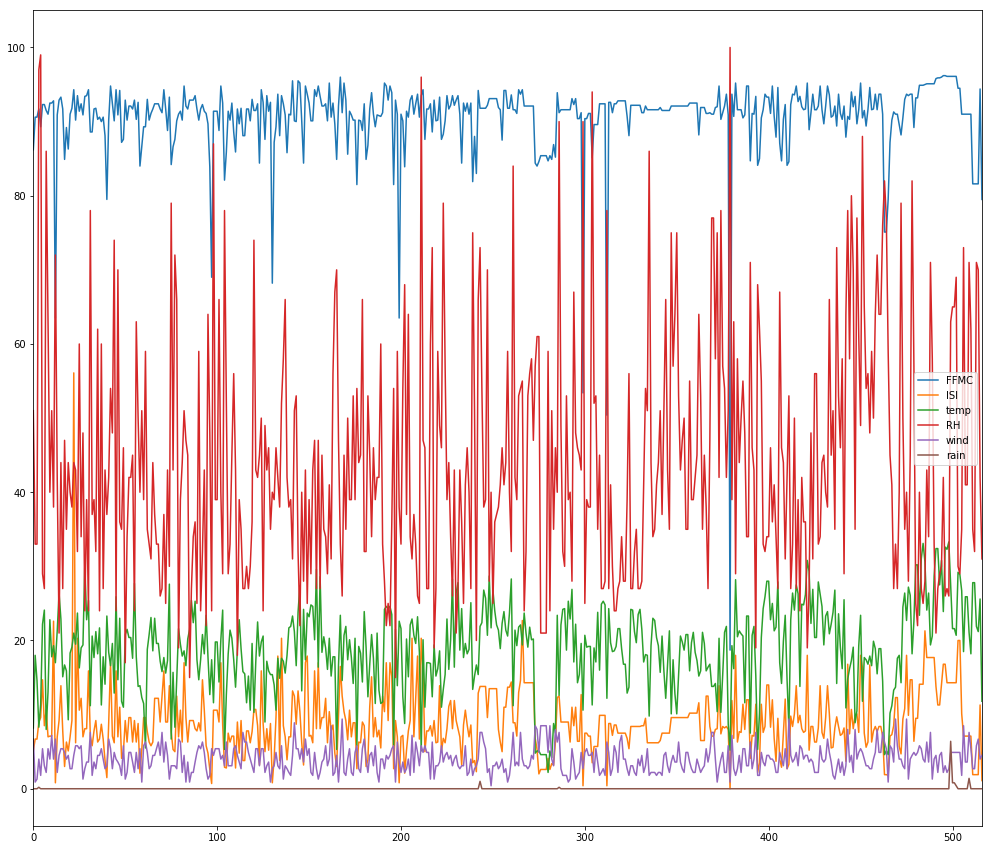

In [127]:
firedb[['FFMC','ISI','temp','RH','wind','rain']].plot(figsize=(17,15))

In [ ]:
firedb['month'].value_counts()

In [ ]:
firedb[['area']].plot(figsize=(17,15))

In [8]:
firedb['area_adjusted'] = np.log(firedb['area']+1)

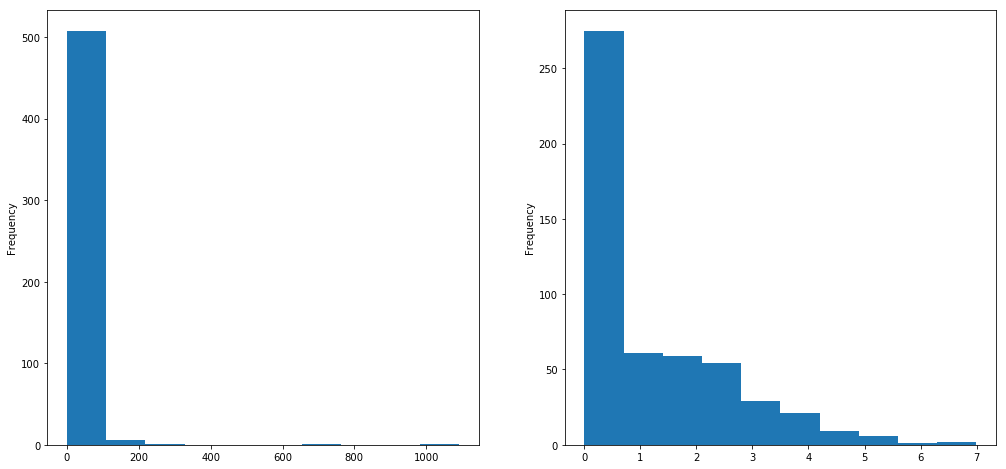

In [32]:
fig, axes = plt.subplots(nrows=1, ncols=2)
firedb['area'].plot.hist(ax=axes[0],figsize=(17,8))
firedb['area_adjusted'].plot.hist(ax=axes[1])

<a id='experiments'></a>

## Experiments
---

This section shows how to use the K-Nearest Neighbors Regressor (KNN) to find the burned area of the forrest. Considering the relative low number of lines in the dataset and the fact there is no right way to decide which parameters to use in the KNN, we decide to test a wide range of combination. The number of K-Nearest was made from 1 to 19 and we use nine different numbers of folds for the cross-validation, in a range from 3 to 23. 

We also test 20 different combinations of columns to use as the features of the model. We test all four FWI index alone and all four weather conditions alone. We test the combinations used in [1](#references), which is the four FWI index together and the four FWI index plus the spatial variables (X and Y); and the same logic with the four weather conditions.
We also also analysed the weather conditions used in each index and made some combinations with the conditions that weren't used to calculate the index. At last, we choose some combinations according to the correlation analysis of the data.

Then, with all these parameters sets, we just test the KNN model with every combination, which resulted in 6840 combinations. For every combination we used two different scores metric: mean absolute error and root mean square error.
The elapsed time to run all of these experiment was about 11 minutes. A very short time to make all of these tests.

The results was saved in a .csv file in order to re-use it in the future.

In [3]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import cross_val_score, cross_val_predict, KFold
from sklearn import preprocessing, metrics

In [ ]:
firedb.head()

In [210]:
hyper_params = range(1,20)
features_list = [ ['FFMC'], ['DMC'], ['DC'], ['ISI'], ['temp'], ['RH'], ['wind'], ['rain'],
                  ['X', 'Y', 'FFMC', 'DMC','DC','ISI'], ['X', 'Y', 'temp','RH','wind','rain'],
                  ['FFMC', 'DMC','DC','ISI'], ['temp','RH','wind','rain'],
                  ['DMC', 'wind'], ['DC','RH','wind'], ['FFMC', 'DMC'], ['DC', 'DMC'],
                  ['X', 'Y', 'DMC', 'wind'], ['X', 'Y', 'DC','RH','wind'], 
                  ['FFMC', 'DMC','DC','ISI', 'temp','RH','wind','rain'],
                  ['X', 'Y', 'FFMC', 'DMC','DC','ISI', 'temp','RH','wind','rain']  ]

num_folds = [3, 5, 7, 9, 10, 11, 15, 19, 23]

outputs = ['area', 'area_adjusted']

In [211]:
import csv

# initializing our file that will act like our database for the results

#open the file in the 'write' mode
file = open('results_db.csv','w')
writer = csv.writer(file) 

db_row = ['HYPER_PARAM', 'FEATURES', 'K_FOLDS', 'OUTPUT', 
          'AVG_RMSE', 'AVG_RMSE_%_AREA', 'STD_RMSE', 'CV_RMSE',
          'AVG_MAE', 'AVG_MAE_%_AREA', 'STD_MAE', 'CV_MAE']

#write the row mounted
writer.writerow(db_row)

#close the file
file.close()

In [212]:
from IPython.core.display import clear_output
from time import time

start_time = time()

k = 0
k_total = len(hyper_params) * len(features_list) * len(num_folds) * len(outputs)

for hp in hyper_params:
    for features in features_list:
        for fold in num_folds:
            for output in outputs:
                k += 1
                
                kf = KFold(fold, shuffle=True, random_state=1)
                model = KNeighborsRegressor(n_neighbors = hp, algorithm='auto')
                
                mses = cross_val_score(model, firedb[features],
                                       firedb[output], scoring="neg_mean_squared_error", cv=kf)
                
                rmses = np.sqrt(np.absolute(mses))
                
                avg_rmse = np.mean(rmses)
                avg_rmse_per_area = avg_rmse / np.mean(firedb[output])
                
                std_rmse = np.std(rmses)
                cv_rmse = std_rmse / np.mean(firedb[output])
                                
                maes = cross_val_score(model, firedb[features],
                                       firedb[output], scoring="neg_mean_absolute_error", cv=kf)
                
                maes = np.absolute(maes)
                
                avg_mae = np.mean(maes)
                avg_mae_per_area = avg_mae / np.mean(firedb[output])
                
                std_mae = np.std(maes)
                cv_mae = std_mae / np.mean(firedb[output])
                
                
                db_row = [ hp, ', '.join(features), fold, output, 
                           avg_rmse, avg_rmse_per_area, std_rmse, cv_rmse,
                           avg_mae, avg_mae_per_area, std_mae, cv_mae ]
                
                print('ITERATION %d OF %d' % (k, k_total) )
                print( 'HP: ', hp )
                print('FEATURES: ', ', '.join(features) )
                print('FOLDS: ', fold)
                print('OUTPUT: ', output)
                print('AVG_RMSE: ', avg_rmse)
                print('AVG_RMSE_PER_AREA: ', avg_rmse_per_area)
                print('STD_RMSE: ', std_rmse)
                print('CV_RMSE: ', cv_rmse)
                print('AVG_MAE: ', avg_mae)
                print('AVG_MAE_PER_AREA: ', avg_mae_per_area)
                print('STD_MAE: ', std_mae)
                print('CV_MAE: ', cv_mae)
                print('\n\n')
                
                #clear_output(wait = True)
                
                #open the file that will act like a database in the 'append' mode
                #which allow us to append a row each time we open it
                file = open('results_db.csv','a')
                writer = csv.writer(file)                        
                #write the row mounted
                writer.writerow(db_row)

                #close the file
                file.close()

end_time = time()
elapsed_time = end_time - start_time
print('Elapsed time: ', elapsed_time)

ITERATION 1 OF 6840
HP:  1
FEATURES:  FFMC
FOLDS:  3
OUTPUT:  area
AVG_RMSE:  64.2344744801
AVG_RMSE_PER_AREA:  4.99984542517
STD_RMSE:  33.7842098477
CV_RMSE:  2.62967555066
AVG_MAE:  22.5848148273
AVG_MAE_PER_AREA:  1.75794359658
STD_MAE:  6.8385228582
CV_MAE:  0.532292939332



ITERATION 2 OF 6840
HP:  1
FEATURES:  FFMC
FOLDS:  3
OUTPUT:  area_adjusted
AVG_RMSE:  2.11825422912
AVG_RMSE_PER_AREA:  1.9065752526
STD_RMSE:  0.170288076846
CV_RMSE:  0.153271042099
AVG_MAE:  1.57709168948
AVG_MAE_PER_AREA:  1.41949155343
STD_MAE:  0.144545560804
CV_MAE:  0.130100997942



ITERATION 3 OF 6840
HP:  1
FEATURES:  FFMC
FOLDS:  5
OUTPUT:  area
AVG_RMSE:  74.6011998669
AVG_RMSE_PER_AREA:  5.8067645277
STD_RMSE:  66.2672266763
CV_RMSE:  5.15806960075
AVG_MAE:  25.3803117999
AVG_MAE_PER_AREA:  1.9755378536
STD_MAE:  20.7315633029
CV_MAE:  1.61369128923



ITERATION 4 OF 6840
HP:  1
FEATURES:  FFMC
FOLDS:  5
OUTPUT:  area_adjusted
AVG_RMSE:  2.06872145433
AVG_RMSE_PER_AREA:  1.86199233083
STD_RMSE:

ITERATION 30 OF 6840
HP:  1
FEATURES:  DMC
FOLDS:  11
OUTPUT:  area_adjusted
AVG_RMSE:  1.83478539179
AVG_RMSE_PER_AREA:  1.65143370127
STD_RMSE:  0.182038691695
CV_RMSE:  0.163847407847
AVG_MAE:  1.30060518219
AVG_MAE_PER_AREA:  1.17063458186
STD_MAE:  0.164453388713
CV_MAE:  0.148019419396



ITERATION 31 OF 6840
HP:  1
FEATURES:  DMC
FOLDS:  15
OUTPUT:  area
AVG_RMSE:  59.0802855104
AVG_RMSE_PER_AREA:  4.59865668113
STD_RMSE:  51.8089371616
CV_RMSE:  4.03267372461
AVG_MAE:  19.8789568627
AVG_MAE_PER_AREA:  1.54732660821
STD_MAE:  11.0582149376
CV_MAE:  0.860742861426



ITERATION 32 OF 6840
HP:  1
FEATURES:  DMC
FOLDS:  15
OUTPUT:  area_adjusted
AVG_RMSE:  1.95263524691
AVG_RMSE_PER_AREA:  1.75750671847
STD_RMSE:  0.186334684889
CV_RMSE:  0.167714098727
AVG_MAE:  1.41555622743
AVG_MAE_PER_AREA:  1.27409846977
STD_MAE:  0.173430374765
CV_MAE:  0.156099327471



ITERATION 33 OF 6840
HP:  1
FEATURES:  DMC
FOLDS:  19
OUTPUT:  area
AVG_RMSE:  58.0730063364
AVG_RMSE_PER_AREA:  4.520252674

CV_MAE:  0.574268456678



ITERATION 60 OF 6840
HP:  1
FEATURES:  ISI
FOLDS:  7
OUTPUT:  area_adjusted
AVG_RMSE:  1.94425876466
AVG_RMSE_PER_AREA:  1.74996730535
STD_RMSE:  0.142949919549
CV_RMSE:  0.128664810497
AVG_MAE:  1.35675523592
AVG_MAE_PER_AREA:  1.22117351217
STD_MAE:  0.11307872444
CV_MAE:  0.101778669742



ITERATION 61 OF 6840
HP:  1
FEATURES:  ISI
FOLDS:  9
OUTPUT:  area
AVG_RMSE:  58.1138148384
AVG_RMSE_PER_AREA:  4.52342910268
STD_RMSE:  37.2073551777
CV_RMSE:  2.89612433313
AVG_MAE:  18.1913688916
AVG_MAE_PER_AREA:  1.41596912353
STD_MAE:  6.28151068208
CV_MAE:  0.488936551612



ITERATION 62 OF 6840
HP:  1
FEATURES:  ISI
FOLDS:  9
OUTPUT:  area_adjusted
AVG_RMSE:  1.94386295757
AVG_RMSE_PER_AREA:  1.7496110516
STD_RMSE:  0.234506822638
CV_RMSE:  0.211072353102
AVG_MAE:  1.4079997372
AVG_MAE_PER_AREA:  1.26729710613
STD_MAE:  0.241293335932
CV_MAE:  0.217180684255



ITERATION 63 OF 6840
HP:  1
FEATURES:  ISI
FOLDS:  10
OUTPUT:  area
AVG_RMSE:  56.8768910581
AVG_RMSE_P

ITERATION 89 OF 6840
HP:  1
FEATURES:  temp
FOLDS:  23
OUTPUT:  area
AVG_RMSE:  55.0563514026
AVG_RMSE_PER_AREA:  4.28544405344
STD_RMSE:  52.0222291085
CV_RMSE:  4.04927581833
AVG_MAE:  21.0248247121
AVG_MAE_PER_AREA:  1.63651799914
STD_MAE:  13.6786952807
CV_MAE:  1.06471427648



ITERATION 90 OF 6840
HP:  1
FEATURES:  temp
FOLDS:  23
OUTPUT:  area_adjusted
AVG_RMSE:  1.85259402318
AVG_RMSE_PER_AREA:  1.66746270073
STD_RMSE:  0.307863911466
CV_RMSE:  0.277098804621
AVG_MAE:  1.37867796748
AVG_MAE_PER_AREA:  1.24090548621
STD_MAE:  0.287017924576
CV_MAE:  0.258335975223



ITERATION 91 OF 6840
HP:  1
FEATURES:  RH
FOLDS:  3
OUTPUT:  area
AVG_RMSE:  59.3894932002
AVG_RMSE_PER_AREA:  4.62272460829
STD_RMSE:  26.2896317855
CV_RMSE:  2.04631697038
AVG_MAE:  19.1971190124
AVG_MAE_PER_AREA:  1.49425411272
STD_MAE:  4.36989023286
CV_MAE:  0.340140958046



ITERATION 92 OF 6840
HP:  1
FEATURES:  RH
FOLDS:  3
OUTPUT:  area_adjusted
AVG_RMSE:  1.95387369777
AVG_RMSE_PER_AREA:  1.75862140987
STD

ITERATION 119 OF 6840
HP:  1
FEATURES:  wind
FOLDS:  11
OUTPUT:  area
AVG_RMSE:  50.579333122
AVG_RMSE_PER_AREA:  3.93696452512
STD_RMSE:  43.8733440352
CV_RMSE:  3.41498767191
AVG_MAE:  16.3434622824
AVG_MAE_PER_AREA:  1.27213285055
STD_MAE:  7.89883260941
CV_MAE:  0.614824709098



ITERATION 120 OF 6840
HP:  1
FEATURES:  wind
FOLDS:  11
OUTPUT:  area_adjusted
AVG_RMSE:  1.80623875222
AVG_RMSE_PER_AREA:  1.62573975207
STD_RMSE:  0.173770678127
CV_RMSE:  0.156405624024
AVG_MAE:  1.30320690701
AVG_MAE_PER_AREA:  1.17297631406
STD_MAE:  0.153489221918
CV_MAE:  0.138150911268



ITERATION 121 OF 6840
HP:  1
FEATURES:  wind
FOLDS:  15
OUTPUT:  area
AVG_RMSE:  72.9467637708
AVG_RMSE_PER_AREA:  5.67798749927
STD_RMSE:  103.45262315
CV_RMSE:  8.05248472516
AVG_MAE:  27.4646554622
AVG_MAE_PER_AREA:  2.13777777553
STD_MAE:  43.2109618644
CV_MAE:  3.36342955622



ITERATION 122 OF 6840
HP:  1
FEATURES:  wind
FOLDS:  15
OUTPUT:  area_adjusted
AVG_RMSE:  1.96699699621
AVG_RMSE_PER_AREA:  1.7704332

ITERATION 149 OF 6840
HP:  1
FEATURES:  X, Y, FFMC, DMC, DC, ISI
FOLDS:  7
OUTPUT:  area
AVG_RMSE:  88.6642498945
AVG_RMSE_PER_AREA:  6.90139598399
STD_RMSE:  47.1540191331
CV_RMSE:  3.67034693984
AVG_MAE:  23.8914785529
AVG_MAE_PER_AREA:  1.85965092281
STD_MAE:  10.0888366423
CV_MAE:  0.785288961096



ITERATION 150 OF 6840
HP:  1
FEATURES:  X, Y, FFMC, DMC, DC, ISI
FOLDS:  7
OUTPUT:  area_adjusted
AVG_RMSE:  1.91587451604
AVG_RMSE_PER_AREA:  1.72441951923
STD_RMSE:  0.0636558629547
CV_RMSE:  0.0572946775341
AVG_MAE:  1.31351522112
AVG_MAE_PER_AREA:  1.18225450944
STD_MAE:  0.115190342302
CV_MAE:  0.103679271805



ITERATION 151 OF 6840
HP:  1
FEATURES:  X, Y, FFMC, DMC, DC, ISI
FOLDS:  9
OUTPUT:  area
AVG_RMSE:  83.9553332494
AVG_RMSE_PER_AREA:  6.53486608651
STD_RMSE:  54.9363385456
CV_RMSE:  4.27610256293
AVG_MAE:  23.8045580426
AVG_MAE_PER_AREA:  1.85288525501
STD_MAE:  13.2424427121
CV_MAE:  1.03075750441



ITERATION 152 OF 6840
HP:  1
FEATURES:  X, Y, FFMC, DMC, DC, ISI
FOLDS: 

ITERATION 177 OF 6840
HP:  1
FEATURES:  X, Y, temp, RH, wind, rain
FOLDS:  19
OUTPUT:  area
AVG_RMSE:  72.5830090329
AVG_RMSE_PER_AREA:  5.6496737709
STD_RMSE:  67.1511517298
CV_RMSE:  5.22687204166
AVG_MAE:  22.3551225285
AVG_MAE_PER_AREA:  1.74006494189
STD_MAE:  14.2278864955
CV_MAE:  1.10746190079



ITERATION 178 OF 6840
HP:  1
FEATURES:  X, Y, temp, RH, wind, rain
FOLDS:  19
OUTPUT:  area_adjusted
AVG_RMSE:  1.83389255766
AVG_RMSE_PER_AREA:  1.65063008883
STD_RMSE:  0.240468822563
CV_RMSE:  0.21643856522
AVG_MAE:  1.31318756847
AVG_MAE_PER_AREA:  1.1819595994
STD_MAE:  0.181168528964
CV_MAE:  0.16306420123



ITERATION 179 OF 6840
HP:  1
FEATURES:  X, Y, temp, RH, wind, rain
FOLDS:  23
OUTPUT:  area
AVG_RMSE:  60.5691537324
AVG_RMSE_PER_AREA:  4.71454633429
STD_RMSE:  77.3786010197
CV_RMSE:  6.02295025288
AVG_MAE:  21.9045592026
AVG_MAE_PER_AREA:  1.70499425746
STD_MAE:  22.2682780029
CV_MAE:  1.73330518853



ITERATION 180 OF 6840
HP:  1
FEATURES:  X, Y, temp, RH, wind, rain
FOL

ITERATION 206 OF 6840
HP:  1
FEATURES:  temp, RH, wind, rain
FOLDS:  9
OUTPUT:  area_adjusted
AVG_RMSE:  1.91251514959
AVG_RMSE_PER_AREA:  1.72139585717
STD_RMSE:  0.123682558432
CV_RMSE:  0.111322853434
AVG_MAE:  1.37913585884
AVG_MAE_PER_AREA:  1.24131762009
STD_MAE:  0.0975300260433
CV_MAE:  0.0877837662183



ITERATION 207 OF 6840
HP:  1
FEATURES:  temp, RH, wind, rain
FOLDS:  10
OUTPUT:  area
AVG_RMSE:  58.8543431976
AVG_RMSE_PER_AREA:  4.58106991564
STD_RMSE:  44.7271915771
CV_RMSE:  3.48144895708
AVG_MAE:  19.8564276018
AVG_MAE_PER_AREA:  1.54557298878
STD_MAE:  9.38703611626
CV_MAE:  0.73066262255



ITERATION 208 OF 6840
HP:  1
FEATURES:  temp, RH, wind, rain
FOLDS:  10
OUTPUT:  area_adjusted
AVG_RMSE:  1.90761434267
AVG_RMSE_PER_AREA:  1.71698479212
STD_RMSE:  0.146208043556
CV_RMSE:  0.131597347355
AVG_MAE:  1.39828167283
AVG_MAE_PER_AREA:  1.25855017634
STD_MAE:  0.104174960027
CV_MAE:  0.0937646662037



ITERATION 209 OF 6840
HP:  1
FEATURES:  temp, RH, wind, rain
FOLDS:  

ITERATION 234 OF 6840
HP:  1
FEATURES:  DMC, wind
FOLDS:  23
OUTPUT:  area_adjusted
AVG_RMSE:  1.93777866882
AVG_RMSE_PER_AREA:  1.74413477109
STD_RMSE:  0.315725775932
CV_RMSE:  0.284175026173
AVG_MAE:  1.40214820484
AVG_MAE_PER_AREA:  1.26203032246
STD_MAE:  0.256079971784
CV_MAE:  0.230489678802



ITERATION 235 OF 6840
HP:  1
FEATURES:  DC, RH, wind
FOLDS:  3
OUTPUT:  area
AVG_RMSE:  97.050760562
AVG_RMSE_PER_AREA:  7.55418029231
STD_RMSE:  14.5103192999
CV_RMSE:  1.1294457401
AVG_MAE:  22.4610714926
AVG_MAE_PER_AREA:  1.74831173533
STD_MAE:  3.70622370269
CV_MAE:  0.288482871145



ITERATION 236 OF 6840
HP:  1
FEATURES:  DC, RH, wind
FOLDS:  3
OUTPUT:  area_adjusted
AVG_RMSE:  1.9222021753
AVG_RMSE_PER_AREA:  1.73011485003
STD_RMSE:  0.0792104794698
CV_RMSE:  0.0712949077726
AVG_MAE:  1.3861649228
AVG_MAE_PER_AREA:  1.24764426361
STD_MAE:  0.0634347402364
CV_MAE:  0.0570956518002



ITERATION 237 OF 6840
HP:  1
FEATURES:  DC, RH, wind
FOLDS:  5
OUTPUT:  area
AVG_RMSE:  86.59744256

ITERATION 263 OF 6840
HP:  1
FEATURES:  FFMC, DMC
FOLDS:  11
OUTPUT:  area
AVG_RMSE:  52.8389704922
AVG_RMSE_PER_AREA:  4.11284885607
STD_RMSE:  41.7666186297
CV_RMSE:  3.25100561296
AVG_MAE:  17.9265764023
AVG_MAE_PER_AREA:  1.39535836075
STD_MAE:  7.49951432942
CV_MAE:  0.58374280656



ITERATION 264 OF 6840
HP:  1
FEATURES:  FFMC, DMC
FOLDS:  11
OUTPUT:  area_adjusted
AVG_RMSE:  1.89962564055
AVG_RMSE_PER_AREA:  1.70979440791
STD_RMSE:  0.188322100112
CV_RMSE:  0.169502909828
AVG_MAE:  1.34816358099
AVG_MAE_PER_AREA:  1.21344042874
STD_MAE:  0.181669831583
CV_MAE:  0.163515408245



ITERATION 265 OF 6840
HP:  1
FEATURES:  FFMC, DMC
FOLDS:  15
OUTPUT:  area
AVG_RMSE:  58.0268243913
AVG_RMSE_PER_AREA:  4.51665799118
STD_RMSE:  51.760751699
CV_RMSE:  4.02892309278
AVG_MAE:  19.4085994398
AVG_MAE_PER_AREA:  1.51071520244
STD_MAE:  10.8454859555
CV_MAE:  0.844184587435



ITERATION 266 OF 6840
HP:  1
FEATURES:  FFMC, DMC
FOLDS:  15
OUTPUT:  area_adjusted
AVG_RMSE:  1.97866142002
AVG_RMSE

ITERATION 293 OF 6840
HP:  1
FEATURES:  X, Y, DMC, wind
FOLDS:  7
OUTPUT:  area
AVG_RMSE:  90.3618464566
AVG_RMSE_PER_AREA:  7.03353251151
STD_RMSE:  51.4478266097
CV_RMSE:  4.00456581284
AVG_MAE:  24.4938081134
AVG_MAE_PER_AREA:  1.90653469857
STD_MAE:  10.9502543511
CV_MAE:  0.852339488487



ITERATION 294 OF 6840
HP:  1
FEATURES:  X, Y, DMC, wind
FOLDS:  7
OUTPUT:  area_adjusted
AVG_RMSE:  1.93678798983
AVG_RMSE_PER_AREA:  1.7432430915
STD_RMSE:  0.167783544413
CV_RMSE:  0.151016789758
AVG_MAE:  1.37901990434
AVG_MAE_PER_AREA:  1.24121325303
STD_MAE:  0.135663549927
CV_MAE:  0.122106574091



ITERATION 295 OF 6840
HP:  1
FEATURES:  X, Y, DMC, wind
FOLDS:  9
OUTPUT:  area
AVG_RMSE:  85.1411287069
AVG_RMSE_PER_AREA:  6.62716533924
STD_RMSE:  59.4230857146
CV_RMSE:  4.62533936276
AVG_MAE:  24.6524712644
AVG_MAE_PER_AREA:  1.91888462804
STD_MAE:  13.7767214556
CV_MAE:  1.07234438051



ITERATION 296 OF 6840
HP:  1
FEATURES:  X, Y, DMC, wind
FOLDS:  9
OUTPUT:  area_adjusted
AVG_RMSE:  1.

ITERATION 321 OF 6840
HP:  1
FEATURES:  X, Y, DC, RH, wind
FOLDS:  19
OUTPUT:  area
AVG_RMSE:  53.6681190749
AVG_RMSE_PER_AREA:  4.17738763811
STD_RMSE:  53.2177335541
CV_RMSE:  4.14233079357
AVG_MAE:  19.2979915065
AVG_MAE_PER_AREA:  1.50210576688
STD_MAE:  12.6012852126
CV_MAE:  0.98085146226



ITERATION 322 OF 6840
HP:  1
FEATURES:  X, Y, DC, RH, wind
FOLDS:  19
OUTPUT:  area_adjusted
AVG_RMSE:  1.89485081405
AVG_RMSE_PER_AREA:  1.70549673396
STD_RMSE:  0.257484820291
CV_RMSE:  0.231754139584
AVG_MAE:  1.40358684226
AVG_MAE_PER_AREA:  1.2633251956
STD_MAE:  0.270604153493
CV_MAE:  0.243562446476



ITERATION 323 OF 6840
HP:  1
FEATURES:  X, Y, DC, RH, wind
FOLDS:  23
OUTPUT:  area
AVG_RMSE:  51.8289649089
AVG_RMSE_PER_AREA:  4.03423263268
STD_RMSE:  55.0174968692
CV_RMSE:  4.28241971701
AVG_MAE:  19.4613937103
AVG_MAE_PER_AREA:  1.51482457196
STD_MAE:  14.3870871834
CV_MAE:  1.11985367075



ITERATION 324 OF 6840
HP:  1
FEATURES:  X, Y, DC, RH, wind
FOLDS:  23
OUTPUT:  area_adjuste

ITERATION 347 OF 6840
HP:  1
FEATURES:  X, Y, FFMC, DMC, DC, ISI, temp, RH, wind, rain
FOLDS:  7
OUTPUT:  area
AVG_RMSE:  83.3054538202
AVG_RMSE_PER_AREA:  6.48428115191
STD_RMSE:  55.9294174235
CV_RMSE:  4.35340125533
AVG_MAE:  24.7313439467
AVG_MAE_PER_AREA:  1.92502387372
STD_MAE:  12.0266389835
CV_MAE:  0.936122485447



ITERATION 348 OF 6840
HP:  1
FEATURES:  X, Y, FFMC, DMC, DC, ISI, temp, RH, wind, rain
FOLDS:  7
OUTPUT:  area_adjusted
AVG_RMSE:  1.9597516622
AVG_RMSE_PER_AREA:  1.76391198424
STD_RMSE:  0.161130259483
CV_RMSE:  0.145028373343
AVG_MAE:  1.38318815041
AVG_MAE_PER_AREA:  1.24496496266
STD_MAE:  0.179431969744
CV_MAE:  0.161501177874



ITERATION 349 OF 6840
HP:  1
FEATURES:  X, Y, FFMC, DMC, DC, ISI, temp, RH, wind, rain
FOLDS:  9
OUTPUT:  area
AVG_RMSE:  86.7275452698
AVG_RMSE_PER_AREA:  6.75064790305
STD_RMSE:  50.4700579218
CV_RMSE:  3.92845882605
AVG_MAE:  24.6285726289
AVG_MAE_PER_AREA:  1.91702442004
STD_MAE:  10.0622300719
CV_MAE:  0.783217974449



ITERATIO

ITERATION 375 OF 6840
HP:  2
FEATURES:  FFMC
FOLDS:  19
OUTPUT:  area
AVG_RMSE:  51.981854636
AVG_RMSE_PER_AREA:  4.04613317377
STD_RMSE:  49.383429347
CV_RMSE:  3.8438784671
AVG_MAE:  19.0219343498
AVG_MAE_PER_AREA:  1.4806181915
STD_MAE:  10.6721101279
CV_MAE:  0.830689461253



ITERATION 376 OF 6840
HP:  2
FEATURES:  FFMC
FOLDS:  19
OUTPUT:  area_adjusted
AVG_RMSE:  1.65534433656
AVG_RMSE_PER_AREA:  1.48992434583
STD_RMSE:  0.22697149666
CV_RMSE:  0.204290038764
AVG_MAE:  1.26580932421
AVG_MAE_PER_AREA:  1.13931590405
STD_MAE:  0.177126679263
CV_MAE:  0.159426257064



ITERATION 377 OF 6840
HP:  2
FEATURES:  FFMC
FOLDS:  23
OUTPUT:  area
AVG_RMSE:  55.3593558412
AVG_RMSE_PER_AREA:  4.30902913557
STD_RMSE:  56.5034929201
CV_RMSE:  4.3980858078
AVG_MAE:  21.6474084894
AVG_MAE_PER_AREA:  1.68497831077
STD_MAE:  15.3615978022
CV_MAE:  1.19570705787



ITERATION 378 OF 6840
HP:  2
FEATURES:  FFMC
FOLDS:  23
OUTPUT:  area_adjusted
AVG_RMSE:  1.66982091907
AVG_RMSE_PER_AREA:  1.50295427094

ITERATION 405 OF 6840
HP:  2
FEATURES:  DC
FOLDS:  10
OUTPUT:  area
AVG_RMSE:  55.5602570058
AVG_RMSE_PER_AREA:  4.32466676282
STD_RMSE:  41.6580821144
CV_RMSE:  3.24255741121
AVG_MAE:  18.2717254902
AVG_MAE_PER_AREA:  1.42222387342
STD_MAE:  7.52677214774
CV_MAE:  0.585864484667



ITERATION 406 OF 6840
HP:  2
FEATURES:  DC
FOLDS:  10
OUTPUT:  area_adjusted
AVG_RMSE:  1.70411717983
AVG_RMSE_PER_AREA:  1.5338232767
STD_RMSE:  0.167594166112
CV_RMSE:  0.150846336194
AVG_MAE:  1.27292972567
AVG_MAE_PER_AREA:  1.14572475764
STD_MAE:  0.124431609517
CV_MAE:  0.111997051197



ITERATION 407 OF 6840
HP:  2
FEATURES:  DC
FOLDS:  11
OUTPUT:  area
AVG_RMSE:  55.6810580617
AVG_RMSE_PER_AREA:  4.3340696047
STD_RMSE:  46.8096820361
CV_RMSE:  3.64354463045
AVG_MAE:  20.6370599613
AVG_MAE_PER_AREA:  1.60633539344
STD_MAE:  11.8671733688
CV_MAE:  0.923710094277



ITERATION 408 OF 6840
HP:  2
FEATURES:  DC
FOLDS:  11
OUTPUT:  area_adjusted
AVG_RMSE:  1.73308823497
AVG_RMSE_PER_AREA:  1.55989922926
ST

AVG_MAE_PER_AREA:  1.63527033075
STD_MAE:  5.47681387193
CV_MAE:  0.42630103233



ITERATION 438 OF 6840
HP:  2
FEATURES:  temp
FOLDS:  7
OUTPUT:  area_adjusted
AVG_RMSE:  1.66469002281
AVG_RMSE_PER_AREA:  1.49833610958
STD_RMSE:  0.156439009212
CV_RMSE:  0.140805923767
AVG_MAE:  1.24975086535
AVG_MAE_PER_AREA:  1.12486218086
STD_MAE:  0.108981024944
CV_MAE:  0.0980904568984



ITERATION 439 OF 6840
HP:  2
FEATURES:  temp
FOLDS:  9
OUTPUT:  area
AVG_RMSE:  55.456504583
AVG_RMSE_PER_AREA:  4.31659094247
STD_RMSE:  38.6725906796
CV_RMSE:  3.01017447646
AVG_MAE:  18.3560104524
AVG_MAE_PER_AREA:  1.42878439697
STD_MAE:  6.45932789751
CV_MAE:  0.502777383942



ITERATION 440 OF 6840
HP:  2
FEATURES:  temp
FOLDS:  9
OUTPUT:  area_adjusted
AVG_RMSE:  1.61436691425
AVG_RMSE_PER_AREA:  1.45304183276
STD_RMSE:  0.13998682168
CV_RMSE:  0.12599781756
AVG_MAE:  1.21650333081
AVG_MAE_PER_AREA:  1.0949371012
STD_MAE:  0.107402582146
CV_MAE:  0.0966697492537



ITERATION 441 OF 6840
HP:  2
FEATURES:  

ITERATION 467 OF 6840
HP:  2
FEATURES:  RH
FOLDS:  23
OUTPUT:  area
AVG_RMSE:  47.6749307971
AVG_RMSE_PER_AREA:  3.71089335703
STD_RMSE:  51.1469638468
CV_RMSE:  3.98114743321
AVG_MAE:  18.3770647878
AVG_MAE_PER_AREA:  1.430423212
STD_MAE:  12.8997430285
CV_MAE:  1.00408264704



ITERATION 468 OF 6840
HP:  2
FEATURES:  RH
FOLDS:  23
OUTPUT:  area_adjusted
AVG_RMSE:  1.66562257241
AVG_RMSE_PER_AREA:  1.49917546868
STD_RMSE:  0.261536230066
CV_RMSE:  0.235400688477
AVG_MAE:  1.25780821029
AVG_MAE_PER_AREA:  1.13211434836
STD_MAE:  0.215692668682
CV_MAE:  0.194138313817



ITERATION 469 OF 6840
HP:  2
FEATURES:  wind
FOLDS:  3
OUTPUT:  area
AVG_RMSE:  60.2009488251
AVG_RMSE_PER_AREA:  4.68588621624
STD_RMSE:  31.7976702003
CV_RMSE:  2.4750484404
AVG_MAE:  18.6571010328
AVG_MAE_PER_AREA:  1.45222050933
STD_MAE:  6.12279479987
CV_MAE:  0.476582517676



ITERATION 470 OF 6840
HP:  2
FEATURES:  wind
FOLDS:  3
OUTPUT:  area_adjusted
AVG_RMSE:  1.69585744247
AVG_RMSE_PER_AREA:  1.52638894204
ST

ITERATION 497 OF 6840
HP:  2
FEATURES:  rain
FOLDS:  11
OUTPUT:  area
AVG_RMSE:  46.7560884455
AVG_RMSE_PER_AREA:  3.63937304392
STD_RMSE:  44.5453669046
CV_RMSE:  3.46729619465
AVG_MAE:  13.2758510638
AVG_MAE_PER_AREA:  1.03335792413
STD_MAE:  7.60217893208
CV_MAE:  0.591733953807



ITERATION 498 OF 6840
HP:  2
FEATURES:  rain
FOLDS:  11
OUTPUT:  area_adjusted
AVG_RMSE:  1.50617992797
AVG_RMSE_PER_AREA:  1.35566606556
STD_RMSE:  0.224341010465
CV_RMSE:  0.201922419329
AVG_MAE:  1.14931499039
AVG_MAE_PER_AREA:  1.03446294973
STD_MAE:  0.0696330247604
CV_MAE:  0.0626745363928



ITERATION 499 OF 6840
HP:  2
FEATURES:  rain
FOLDS:  15
OUTPUT:  area
AVG_RMSE:  44.0090288391
AVG_RMSE_PER_AREA:  3.42554902625
STD_RMSE:  47.1563422714
CV_RMSE:  3.67052776692
AVG_MAE:  12.8056053221
AVG_MAE_PER_AREA:  0.996755211349
STD_MAE:  9.00348075155
CV_MAE:  0.700807664584



ITERATION 500 OF 6840
HP:  2
FEATURES:  rain
FOLDS:  15
OUTPUT:  area_adjusted
AVG_RMSE:  1.77057235492
AVG_RMSE_PER_AREA:  1.5

ITERATION 527 OF 6840
HP:  2
FEATURES:  X, Y, temp, RH, wind, rain
FOLDS:  7
OUTPUT:  area
AVG_RMSE:  73.863195444
AVG_RMSE_PER_AREA:  5.74932017141
STD_RMSE:  38.3431283117
CV_RMSE:  2.98452997752
AVG_MAE:  22.7150544772
AVG_MAE_PER_AREA:  1.76808111422
STD_MAE:  8.3808696131
CV_MAE:  0.652345223233



ITERATION 528 OF 6840
HP:  2
FEATURES:  X, Y, temp, RH, wind, rain
FOLDS:  7
OUTPUT:  area_adjusted
AVG_RMSE:  1.64889574496
AVG_RMSE_PER_AREA:  1.48412016756
STD_RMSE:  0.170057101545
CV_RMSE:  0.15306314836
AVG_MAE:  1.24923118317
AVG_MAE_PER_AREA:  1.12439443098
STD_MAE:  0.125830256944
CV_MAE:  0.113255930578



ITERATION 529 OF 6840
HP:  2
FEATURES:  X, Y, temp, RH, wind, rain
FOLDS:  9
OUTPUT:  area
AVG_RMSE:  75.3337226651
AVG_RMSE_PER_AREA:  5.86378220849
STD_RMSE:  41.7999400182
CV_RMSE:  3.25359926369
AVG_MAE:  23.3422195335
AVG_MAE_PER_AREA:  1.81689802077
STD_MAE:  9.32619199458
CV_MAE:  0.725926673421



ITERATION 530 OF 6840
HP:  2
FEATURES:  X, Y, temp, RH, wind, rain
FOL

ITERATION 554 OF 6840
HP:  2
FEATURES:  FFMC, DMC, DC, ISI
FOLDS:  15
OUTPUT:  area_adjusted
AVG_RMSE:  1.73088079773
AVG_RMSE_PER_AREA:  1.55791238313
STD_RMSE:  0.197433469202
CV_RMSE:  0.177703771927
AVG_MAE:  1.30348012156
AVG_MAE_PER_AREA:  1.17322222605
STD_MAE:  0.149023325002
CV_MAE:  0.134131295292



ITERATION 555 OF 6840
HP:  2
FEATURES:  FFMC, DMC, DC, ISI
FOLDS:  19
OUTPUT:  area
AVG_RMSE:  59.1883331049
AVG_RMSE_PER_AREA:  4.60706682654
STD_RMSE:  53.332691272
CV_RMSE:  4.15127880513
AVG_MAE:  22.6934816207
AVG_MAE_PER_AREA:  1.76640193885
STD_MAE:  16.1351778204
CV_MAE:  1.25592052651



ITERATION 556 OF 6840
HP:  2
FEATURES:  FFMC, DMC, DC, ISI
FOLDS:  19
OUTPUT:  area_adjusted
AVG_RMSE:  1.66783932501
AVG_RMSE_PER_AREA:  1.50117069928
STD_RMSE:  0.281984387928
CV_RMSE:  0.253805444245
AVG_MAE:  1.25838782957
AVG_MAE_PER_AREA:  1.13263604579
STD_MAE:  0.239787749873
CV_MAE:  0.215825552713



ITERATION 557 OF 6840
HP:  2
FEATURES:  FFMC, DMC, DC, ISI
FOLDS:  23
OUTPUT: 

ITERATION 582 OF 6840
HP:  2
FEATURES:  DMC, wind
FOLDS:  7
OUTPUT:  area_adjusted
AVG_RMSE:  1.62482821191
AVG_RMSE_PER_AREA:  1.4624577239
STD_RMSE:  0.0840498928831
CV_RMSE:  0.0756507144194
AVG_MAE:  1.23540186784
AVG_MAE_PER_AREA:  1.11194709109
STD_MAE:  0.0656993540518
CV_MAE:  0.0591339607991



ITERATION 583 OF 6840
HP:  2
FEATURES:  DMC, wind
FOLDS:  9
OUTPUT:  area
AVG_RMSE:  63.633381182
AVG_RMSE_PER_AREA:  4.95305787687
STD_RMSE:  39.837018631
CV_RMSE:  3.10081053774
AVG_MAE:  20.2660581771
AVG_MAE_PER_AREA:  1.57745757372
STD_MAE:  8.98059252217
CV_MAE:  0.699026103983



ITERATION 584 OF 6840
HP:  2
FEATURES:  DMC, wind
FOLDS:  9
OUTPUT:  area_adjusted
AVG_RMSE:  1.67190233496
AVG_RMSE_PER_AREA:  1.50482768914
STD_RMSE:  0.0999261781646
CV_RMSE:  0.0899404687865
AVG_MAE:  1.27964352309
AVG_MAE_PER_AREA:  1.15176763947
STD_MAE:  0.0663497033279
CV_MAE:  0.0597193201097



ITERATION 585 OF 6840
HP:  2
FEATURES:  DMC, wind
FOLDS:  10
OUTPUT:  area
AVG_RMSE:  65.465298891
AV

ITERATION 611 OF 6840
HP:  2
FEATURES:  DC, RH, wind
FOLDS:  23
OUTPUT:  area
AVG_RMSE:  48.7364519199
AVG_RMSE_PER_AREA:  3.79351941683
STD_RMSE:  51.8515714252
CV_RMSE:  4.03599226546
AVG_MAE:  20.0263898436
AVG_MAE_PER_AREA:  1.55880241027
STD_MAE:  14.9961957485
CV_MAE:  1.1672651067



ITERATION 612 OF 6840
HP:  2
FEATURES:  DC, RH, wind
FOLDS:  23
OUTPUT:  area_adjusted
AVG_RMSE:  1.71272644763
AVG_RMSE_PER_AREA:  1.54157221293
STD_RMSE:  0.235661423839
CV_RMSE:  0.212111574007
AVG_MAE:  1.33565511754
AVG_MAE_PER_AREA:  1.20218194686
STD_MAE:  0.207716695326
CV_MAE:  0.186959386375



ITERATION 613 OF 6840
HP:  2
FEATURES:  FFMC, DMC
FOLDS:  3
OUTPUT:  area
AVG_RMSE:  76.6286448734
AVG_RMSE_PER_AREA:  5.96457560535
STD_RMSE:  28.7060438935
CV_RMSE:  2.2344042416
AVG_MAE:  22.9179489851
AVG_MAE_PER_AREA:  1.78387389816
STD_MAE:  6.04201285707
CV_MAE:  0.470294660098



ITERATION 614 OF 6840
HP:  2
FEATURES:  FFMC, DMC
FOLDS:  3
OUTPUT:  area_adjusted
AVG_RMSE:  1.72546606542
AVG_R

ITERATION 641 OF 6840
HP:  2
FEATURES:  DC, DMC
FOLDS:  11
OUTPUT:  area
AVG_RMSE:  61.6573460422
AVG_RMSE_PER_AREA:  4.79924841032
STD_RMSE:  43.8975579897
CV_RMSE:  3.41687242353
AVG_MAE:  20.5919052224
AVG_MAE_PER_AREA:  1.60282066531
STD_MAE:  11.1087748013
CV_MAE:  0.864678310504



ITERATION 642 OF 6840
HP:  2
FEATURES:  DC, DMC
FOLDS:  11
OUTPUT:  area_adjusted
AVG_RMSE:  1.69530371669
AVG_RMSE_PER_AREA:  1.52589055056
STD_RMSE:  0.136041653527
CV_RMSE:  0.122446893471
AVG_MAE:  1.26286337881
AVG_MAE_PER_AREA:  1.13666434952
STD_MAE:  0.121220748607
CV_MAE:  0.109107054393



ITERATION 643 OF 6840
HP:  2
FEATURES:  DC, DMC
FOLDS:  15
OUTPUT:  area
AVG_RMSE:  58.6261388102
AVG_RMSE_PER_AREA:  4.56330707611
STD_RMSE:  51.2307000543
CV_RMSE:  3.98766524312
AVG_MAE:  21.1350943978
AVG_MAE_PER_AREA:  1.64510110638
STD_MAE:  14.0249853263
CV_MAE:  1.09166859835



ITERATION 644 OF 6840
HP:  2
FEATURES:  DC, DMC
FOLDS:  15
OUTPUT:  area_adjusted
AVG_RMSE:  1.71821037499
AVG_RMSE_PER_AR

ITERATION 671 OF 6840
HP:  2
FEATURES:  X, Y, DC, RH, wind
FOLDS:  7
OUTPUT:  area
AVG_RMSE:  64.5582965872
AVG_RMSE_PER_AREA:  5.02505090079
STD_RMSE:  37.428988768
CV_RMSE:  2.9133757188
AVG_MAE:  20.486917676
AVG_MAE_PER_AREA:  1.59464870612
STD_MAE:  6.97172095261
CV_MAE:  0.542660734638



ITERATION 672 OF 6840
HP:  2
FEATURES:  X, Y, DC, RH, wind
FOLDS:  7
OUTPUT:  area_adjusted
AVG_RMSE:  1.71749202767
AVG_RMSE_PER_AREA:  1.54586156444
STD_RMSE:  0.126986846581
CV_RMSE:  0.114296941212
AVG_MAE:  1.32717497252
AVG_MAE_PER_AREA:  1.19454923007
STD_MAE:  0.121393984391
CV_MAE:  0.109262978576



ITERATION 673 OF 6840
HP:  2
FEATURES:  X, Y, DC, RH, wind
FOLDS:  9
OUTPUT:  area
AVG_RMSE:  65.0679408672
AVG_RMSE_PER_AREA:  5.06472029394
STD_RMSE:  33.2310256503
CV_RMSE:  2.5866171229
AVG_MAE:  19.7773180077
AVG_MAE_PER_AREA:  1.5394153025
STD_MAE:  5.80716587993
CV_MAE:  0.452014778558



ITERATION 674 OF 6840
HP:  2
FEATURES:  X, Y, DC, RH, wind
FOLDS:  9
OUTPUT:  area_adjusted
AVG_

ITERATION 698 OF 6840
HP:  2
FEATURES:  FFMC, DMC, DC, ISI, temp, RH, wind, rain
FOLDS:  15
OUTPUT:  area_adjusted
AVG_RMSE:  1.73661328066
AVG_RMSE_PER_AREA:  1.56307201408
STD_RMSE:  0.151849996437
CV_RMSE:  0.136675495006
AVG_MAE:  1.315516568
AVG_MAE_PER_AREA:  1.18405585999
STD_MAE:  0.126457879936
CV_MAE:  0.113820834661



ITERATION 699 OF 6840
HP:  2
FEATURES:  FFMC, DMC, DC, ISI, temp, RH, wind, rain
FOLDS:  19
OUTPUT:  area
AVG_RMSE:  64.6472626523
AVG_RMSE_PER_AREA:  5.03197578929
STD_RMSE:  48.8820005877
CV_RMSE:  3.80484854884
AVG_MAE:  23.2706356168
AVG_MAE_PER_AREA:  1.81132611376
STD_MAE:  12.6409680535
CV_MAE:  0.983940272004



ITERATION 700 OF 6840
HP:  2
FEATURES:  FFMC, DMC, DC, ISI, temp, RH, wind, rain
FOLDS:  19
OUTPUT:  area_adjusted
AVG_RMSE:  1.69526858862
AVG_RMSE_PER_AREA:  1.52585893286
STD_RMSE:  0.203903128035
CV_RMSE:  0.18352691216
AVG_MAE:  1.28729464779
AVG_MAE_PER_AREA:  1.15865418067
STD_MAE:  0.183530661482
CV_MAE:  0.165190283803



ITERATION 701

ITERATION 725 OF 6840
HP:  3
FEATURES:  FFMC
FOLDS:  7
OUTPUT:  area
AVG_RMSE:  61.5786930397
AVG_RMSE_PER_AREA:  4.79312626396
STD_RMSE:  32.2450960674
CV_RMSE:  2.50987491314
AVG_MAE:  20.5473659667
AVG_MAE_PER_AREA:  1.59935384479
STD_MAE:  5.26537561351
CV_MAE:  0.409843224936



ITERATION 726 OF 6840
HP:  3
FEATURES:  FFMC
FOLDS:  7
OUTPUT:  area_adjusted
AVG_RMSE:  1.64396796281
AVG_RMSE_PER_AREA:  1.47968482294
STD_RMSE:  0.141609554732
CV_RMSE:  0.127458389495
AVG_MAE:  1.26305534154
AVG_MAE_PER_AREA:  1.13683712925
STD_MAE:  0.136653097663
CV_MAE:  0.122997235466



ITERATION 727 OF 6840
HP:  3
FEATURES:  FFMC
FOLDS:  9
OUTPUT:  area
AVG_RMSE:  63.6148381481
AVG_RMSE_PER_AREA:  4.95161453506
STD_RMSE:  38.6881924926
CV_RMSE:  3.01138888125
AVG_MAE:  21.387481123
AVG_MAE_PER_AREA:  1.66474623657
STD_MAE:  9.01617445961
CV_MAE:  0.701795710002



ITERATION 728 OF 6840
HP:  3
FEATURES:  FFMC
FOLDS:  9
OUTPUT:  area_adjusted
AVG_RMSE:  1.60075219907
AVG_RMSE_PER_AREA:  1.440787647

ITERATION 754 OF 6840
HP:  3
FEATURES:  DMC
FOLDS:  19
OUTPUT:  area_adjusted
AVG_RMSE:  1.51843213681
AVG_RMSE_PER_AREA:  1.36669390057
STD_RMSE:  0.248952161761
CV_RMSE:  0.224074156997
AVG_MAE:  1.17795893775
AVG_MAE_PER_AREA:  1.06024448266
STD_MAE:  0.184821817384
CV_MAE:  0.16635241338



ITERATION 755 OF 6840
HP:  3
FEATURES:  DMC
FOLDS:  23
OUTPUT:  area
AVG_RMSE:  50.4788442111
AVG_RMSE_PER_AREA:  3.92914272809
STD_RMSE:  49.9144142843
CV_RMSE:  3.88520896184
AVG_MAE:  20.3554279086
AVG_MAE_PER_AREA:  1.58441388257
STD_MAE:  13.139028108
CV_MAE:  1.02270797899



ITERATION 756 OF 6840
HP:  3
FEATURES:  DMC
FOLDS:  23
OUTPUT:  area_adjusted
AVG_RMSE:  1.54064945318
AVG_RMSE_PER_AREA:  1.38669102131
STD_RMSE:  0.282896754909
CV_RMSE:  0.254626637604
AVG_MAE:  1.19574678323
AVG_MAE_PER_AREA:  1.07625477337
STD_MAE:  0.196276062808
CV_MAE:  0.176662026155



ITERATION 757 OF 6840
HP:  3
FEATURES:  DC
FOLDS:  3
OUTPUT:  area
AVG_RMSE:  65.0574544098
AVG_RMSE_PER_AREA:  5.0639040552

ITERATION 783 OF 6840
HP:  3
FEATURES:  ISI
FOLDS:  10
OUTPUT:  area
AVG_RMSE:  60.2190612374
AVG_RMSE_PER_AREA:  4.68729603959
STD_RMSE:  37.2427324829
CV_RMSE:  2.8988780111
AVG_MAE:  20.8848973102
AVG_MAE_PER_AREA:  1.62562641193
STD_MAE:  6.48697944703
CV_MAE:  0.504929709068



ITERATION 784 OF 6840
HP:  3
FEATURES:  ISI
FOLDS:  10
OUTPUT:  area_adjusted
AVG_RMSE:  1.59069432371
AVG_RMSE_PER_AREA:  1.43173486466
STD_RMSE:  0.157606768284
CV_RMSE:  0.141856987666
AVG_MAE:  1.24877517791
AVG_MAE_PER_AREA:  1.12398399471
STD_MAE:  0.111701399109
CV_MAE:  0.100538981721



ITERATION 785 OF 6840
HP:  3
FEATURES:  ISI
FOLDS:  11
OUTPUT:  area
AVG_RMSE:  52.6413084273
AVG_RMSE_PER_AREA:  4.09746335197
STD_RMSE:  43.3283149712
CV_RMSE:  3.37256401866
AVG_MAE:  19.4590651193
AVG_MAE_PER_AREA:  1.51464332046
STD_MAE:  10.6358764813
CV_MAE:  0.827869127881



ITERATION 786 OF 6840
HP:  3
FEATURES:  ISI
FOLDS:  11
OUTPUT:  area_adjusted
AVG_RMSE:  1.63187333145
AVG_RMSE_PER_AREA:  1.468798818

ITERATION 815 OF 6840
HP:  3
FEATURES:  RH
FOLDS:  7
OUTPUT:  area
AVG_RMSE:  54.9055012089
AVG_RMSE_PER_AREA:  4.27370226436
STD_RMSE:  37.3106597985
CV_RMSE:  2.90416529773
AVG_MAE:  19.6524361348
AVG_MAE_PER_AREA:  1.52969482038
STD_MAE:  5.91544923734
CV_MAE:  0.460443275149



ITERATION 816 OF 6840
HP:  3
FEATURES:  RH
FOLDS:  7
OUTPUT:  area_adjusted
AVG_RMSE:  1.61267912598
AVG_RMSE_PER_AREA:  1.45152270663
STD_RMSE:  0.0911584889677
CV_RMSE:  0.0820489423514
AVG_MAE:  1.24885841396
AVG_MAE_PER_AREA:  1.12405891291
STD_MAE:  0.0872005883828
CV_MAE:  0.0784865581938



ITERATION 817 OF 6840
HP:  3
FEATURES:  RH
FOLDS:  9
OUTPUT:  area
AVG_RMSE:  69.8453370615
AVG_RMSE_PER_AREA:  5.43658046247
STD_RMSE:  41.8351223135
CV_RMSE:  3.2563377626
AVG_MAE:  24.8258341736
AVG_MAE_PER_AREA:  1.93237874869
STD_MAE:  11.5848747013
CV_MAE:  0.901736695835



ITERATION 818 OF 6840
HP:  3
FEATURES:  RH
FOLDS:  9
OUTPUT:  area_adjusted
AVG_RMSE:  1.61764368078
AVG_RMSE_PER_AREA:  1.45599114918
S

ITERATION 845 OF 6840
HP:  3
FEATURES:  wind
FOLDS:  23
OUTPUT:  area
AVG_RMSE:  51.5552509292
AVG_RMSE_PER_AREA:  4.01292744415
STD_RMSE:  59.9048595525
CV_RMSE:  4.66283939275
AVG_MAE:  20.0456009051
AVG_MAE_PER_AREA:  1.56029774963
STD_MAE:  19.4313571692
CV_MAE:  1.51248660526



ITERATION 846 OF 6840
HP:  3
FEATURES:  wind
FOLDS:  23
OUTPUT:  area_adjusted
AVG_RMSE:  1.55915849422
AVG_RMSE_PER_AREA:  1.40335043788
STD_RMSE:  0.334958845504
CV_RMSE:  0.301486118475
AVG_MAE:  1.19334267839
AVG_MAE_PER_AREA:  1.0740909128
STD_MAE:  0.272711942573
CV_MAE:  0.245459602371



ITERATION 847 OF 6840
HP:  3
FEATURES:  rain
FOLDS:  3
OUTPUT:  area
AVG_RMSE:  54.5598333782
AVG_RMSE_PER_AREA:  4.24679637409
STD_RMSE:  34.6110127806
CV_RMSE:  2.69403175339
AVG_MAE:  13.060999761
AVG_MAE_PER_AREA:  1.01663445419
STD_MAE:  4.0587953886
CV_MAE:  0.315926139657



ITERATION 848 OF 6840
HP:  3
FEATURES:  rain
FOLDS:  3
OUTPUT:  area_adjusted
AVG_RMSE:  1.6055307128
AVG_RMSE_PER_AREA:  1.44508864057

ITERATION 873 OF 6840
HP:  3
FEATURES:  X, Y, FFMC, DMC, DC, ISI
FOLDS:  10
OUTPUT:  area
AVG_RMSE:  64.0021927811
AVG_RMSE_PER_AREA:  4.98176521824
STD_RMSE:  35.4097819159
CV_RMSE:  2.75620587778
AVG_MAE:  20.7683716692
AVG_MAE_PER_AREA:  1.61655635729
STD_MAE:  6.68910235614
CV_MAE:  0.520662433756



ITERATION 874 OF 6840
HP:  3
FEATURES:  X, Y, FFMC, DMC, DC, ISI
FOLDS:  10
OUTPUT:  area_adjusted
AVG_RMSE:  1.63158772024
AVG_RMSE_PER_AREA:  1.46854174872
STD_RMSE:  0.096947385516
CV_RMSE:  0.0872593494626
AVG_MAE:  1.23578740269
AVG_MAE_PER_AREA:  1.1122940991
STD_MAE:  0.040735269507
CV_MAE:  0.0366645588063



ITERATION 875 OF 6840
HP:  3
FEATURES:  X, Y, FFMC, DMC, DC, ISI
FOLDS:  11
OUTPUT:  area
AVG_RMSE:  62.6911032958
AVG_RMSE_PER_AREA:  4.87971340232
STD_RMSE:  42.0465306424
CV_RMSE:  3.27279324036
AVG_MAE:  22.2094132818
AVG_MAE_PER_AREA:  1.72872331083
STD_MAE:  11.3217954918
CV_MAE:  0.881259290319



ITERATION 876 OF 6840
HP:  3
FEATURES:  X, Y, FFMC, DMC, DC, ISI
FOLD

ITERATION 901 OF 6840
HP:  3
FEATURES:  FFMC, DMC, DC, ISI
FOLDS:  3
OUTPUT:  area
AVG_RMSE:  66.1700477917
AVG_RMSE_PER_AREA:  5.15050544761
STD_RMSE:  24.4536111822
CV_RMSE:  1.90340587337
AVG_MAE:  21.5467399292
AVG_MAE_PER_AREA:  1.6771425303
STD_MAE:  3.92333292942
CV_MAE:  0.305382092052



ITERATION 902 OF 6840
HP:  3
FEATURES:  FFMC, DMC, DC, ISI
FOLDS:  3
OUTPUT:  area_adjusted
AVG_RMSE:  1.62442870383
AVG_RMSE_PER_AREA:  1.462098139
STD_RMSE:  0.0416916814752
CV_RMSE:  0.0375253956996
AVG_MAE:  1.24956651103
AVG_MAE_PER_AREA:  1.12469624923
STD_MAE:  0.0658834171575
CV_MAE:  0.0592996303195



ITERATION 903 OF 6840
HP:  3
FEATURES:  FFMC, DMC, DC, ISI
FOLDS:  5
OUTPUT:  area
AVG_RMSE:  68.4845728284
AVG_RMSE_PER_AREA:  5.33066209262
STD_RMSE:  26.5613206509
CV_RMSE:  2.06746452925
AVG_MAE:  22.0857625093
AVG_MAE_PER_AREA:  1.71909865438
STD_MAE:  4.20307259762
CV_MAE:  0.3271563046



ITERATION 904 OF 6840
HP:  3
FEATURES:  FFMC, DMC, DC, ISI
FOLDS:  5
OUTPUT:  area_adjusted


ITERATION 929 OF 6840
HP:  3
FEATURES:  temp, RH, wind, rain
FOLDS:  11
OUTPUT:  area
AVG_RMSE:  52.4341701496
AVG_RMSE_PER_AREA:  4.08134024395
STD_RMSE:  42.5702471973
CV_RMSE:  3.313557983
AVG_MAE:  19.1190973565
AVG_MAE_PER_AREA:  1.48818110874
STD_MAE:  8.73988939901
CV_MAE:  0.680290395178



ITERATION 930 OF 6840
HP:  3
FEATURES:  temp, RH, wind, rain
FOLDS:  11
OUTPUT:  area_adjusted
AVG_RMSE:  1.54223031048
AVG_RMSE_PER_AREA:  1.38811390218
STD_RMSE:  0.134981866454
CV_RMSE:  0.121493011836
AVG_MAE:  1.21754123814
AVG_MAE_PER_AREA:  1.09587128955
STD_MAE:  0.11733480566
CV_MAE:  0.105609437085



ITERATION 931 OF 6840
HP:  3
FEATURES:  temp, RH, wind, rain
FOLDS:  15
OUTPUT:  area
AVG_RMSE:  51.1965037627
AVG_RMSE_PER_AREA:  3.98500349219
STD_RMSE:  43.7130124249
CV_RMSE:  3.40250787388
AVG_MAE:  19.3663202614
AVG_MAE_PER_AREA:  1.5074243005
STD_MAE:  9.60101702691
CV_MAE:  0.74731834342



ITERATION 932 OF 6840
HP:  3
FEATURES:  temp, RH, wind, rain
FOLDS:  15
OUTPUT:  area_a

ITERATION 960 OF 6840
HP:  3
FEATURES:  DC, RH, wind
FOLDS:  7
OUTPUT:  area_adjusted
AVG_RMSE:  1.63017583544
AVG_RMSE_PER_AREA:  1.46727095479
STD_RMSE:  0.102236618555
CV_RMSE:  0.0920200248707
AVG_MAE:  1.2853063372
AVG_MAE_PER_AREA:  1.15686456368
STD_MAE:  0.0731283795368
CV_MAE:  0.0658205973444



ITERATION 961 OF 6840
HP:  3
FEATURES:  DC, RH, wind
FOLDS:  9
OUTPUT:  area
AVG_RMSE:  56.7839878039
AVG_RMSE_PER_AREA:  4.41991880438
STD_RMSE:  35.6486554028
CV_RMSE:  2.77479917243
AVG_MAE:  19.1109379131
AVG_MAE_PER_AREA:  1.48754599876
STD_MAE:  5.63822043449
CV_MAE:  0.438864501868



ITERATION 962 OF 6840
HP:  3
FEATURES:  DC, RH, wind
FOLDS:  9
OUTPUT:  area_adjusted
AVG_RMSE:  1.62146412697
AVG_RMSE_PER_AREA:  1.45942981487
STD_RMSE:  0.0918941964564
CV_RMSE:  0.0827111299547
AVG_MAE:  1.278257314
AVG_MAE_PER_AREA:  1.15051995545
STD_MAE:  0.0816926988805
CV_MAE:  0.0735290768515



ITERATION 963 OF 6840
HP:  3
FEATURES:  DC, RH, wind
FOLDS:  10
OUTPUT:  area
AVG_RMSE:  57.8

ITERATION 988 OF 6840
HP:  3
FEATURES:  FFMC, DMC
FOLDS:  19
OUTPUT:  area_adjusted
AVG_RMSE:  1.57355055268
AVG_RMSE_PER_AREA:  1.41630428549
STD_RMSE:  0.241899363093
CV_RMSE:  0.217726150598
AVG_MAE:  1.22348606099
AVG_MAE_PER_AREA:  1.10122204112
STD_MAE:  0.183853155653
CV_MAE:  0.165480550853



ITERATION 989 OF 6840
HP:  3
FEATURES:  FFMC, DMC
FOLDS:  23
OUTPUT:  area
AVG_RMSE:  50.3213958363
AVG_RMSE_PER_AREA:  3.91688735366
STD_RMSE:  49.7232568006
CV_RMSE:  3.87032975752
AVG_MAE:  20.1600770465
AVG_MAE_PER_AREA:  1.56920827651
STD_MAE:  13.1412025443
CV_MAE:  1.02287723149



ITERATION 990 OF 6840
HP:  3
FEATURES:  FFMC, DMC
FOLDS:  23
OUTPUT:  area_adjusted
AVG_RMSE:  1.56574396365
AVG_RMSE_PER_AREA:  1.40927781565
STD_RMSE:  0.272933603809
CV_RMSE:  0.245659112807
AVG_MAE:  1.20732614133
AVG_MAE_PER_AREA:  1.0866769962
STD_MAE:  0.186802705953
CV_MAE:  0.168135350041



ITERATION 991 OF 6840
HP:  3
FEATURES:  DC, DMC
FOLDS:  3
OUTPUT:  area
AVG_RMSE:  66.0912546585
AVG_RMSE

ITERATION 1017 OF 6840
HP:  3
FEATURES:  X, Y, DMC, wind
FOLDS:  10
OUTPUT:  area
AVG_RMSE:  68.7517411673
AVG_RMSE_PER_AREA:  5.35145778539
STD_RMSE:  35.8565625843
CV_RMSE:  2.79098212992
AVG_MAE:  22.7860258924
AVG_MAE_PER_AREA:  1.7736053457
STD_MAE:  7.94244573485
CV_MAE:  0.618219442027



ITERATION 1018 OF 6840
HP:  3
FEATURES:  X, Y, DMC, wind
FOLDS:  10
OUTPUT:  area_adjusted
AVG_RMSE:  1.59692772443
AVG_RMSE_PER_AREA:  1.43734535626
STD_RMSE:  0.126008013015
CV_RMSE:  0.11341592333
AVG_MAE:  1.21527991563
AVG_MAE_PER_AREA:  1.09383594295
STD_MAE:  0.102020890246
CV_MAE:  0.0918258544783



ITERATION 1019 OF 6840
HP:  3
FEATURES:  X, Y, DMC, wind
FOLDS:  11
OUTPUT:  area
AVG_RMSE:  67.3403202064
AVG_RMSE_PER_AREA:  5.24159642681
STD_RMSE:  40.1728742176
CV_RMSE:  3.1269526683
AVG_MAE:  22.9331463572
AVG_MAE_PER_AREA:  1.78505682232
STD_MAE:  10.9950757312
CV_MAE:  0.855828268838



ITERATION 1020 OF 6840
HP:  3
FEATURES:  X, Y, DMC, wind
FOLDS:  11
OUTPUT:  area_adjusted
AVG_R

ITERATION 1045 OF 6840
HP:  3
FEATURES:  FFMC, DMC, DC, ISI, temp, RH, wind, rain
FOLDS:  3
OUTPUT:  area
AVG_RMSE:  64.4519414885
AVG_RMSE_PER_AREA:  5.01677249487
STD_RMSE:  26.4232749507
CV_RMSE:  2.05671940885
AVG_MAE:  20.5503337889
AVG_MAE_PER_AREA:  1.5995848524
STD_MAE:  4.50115192288
CV_MAE:  0.35035802864



ITERATION 1046 OF 6840
HP:  3
FEATURES:  FFMC, DMC, DC, ISI, temp, RH, wind, rain
FOLDS:  3
OUTPUT:  area_adjusted
AVG_RMSE:  1.62778425129
AVG_RMSE_PER_AREA:  1.46511836371
STD_RMSE:  0.0515662874756
CV_RMSE:  0.046413223785
AVG_MAE:  1.25247734304
AVG_MAE_PER_AREA:  1.12731619928
STD_MAE:  0.0575777942002
CV_MAE:  0.0518239954452



ITERATION 1047 OF 6840
HP:  3
FEATURES:  FFMC, DMC, DC, ISI, temp, RH, wind, rain
FOLDS:  5
OUTPUT:  area
AVG_RMSE:  64.617629649
AVG_RMSE_PER_AREA:  5.02966923292
STD_RMSE:  25.4060887491
CV_RMSE:  1.97754426469
AVG_MAE:  20.5276016928
AVG_MAE_PER_AREA:  1.59781544481
STD_MAE:  3.38622552273
CV_MAE:  0.263575040123



ITERATION 1048 OF 6840

ITERATION 1070 OF 6840
HP:  3
FEATURES:  X, Y, FFMC, DMC, DC, ISI, temp, RH, wind, rain
FOLDS:  9
OUTPUT:  area_adjusted
AVG_RMSE:  1.66087562277
AVG_RMSE_PER_AREA:  1.49490288583
STD_RMSE:  0.0772133741639
CV_RMSE:  0.0694973749266
AVG_MAE:  1.28678258156
AVG_MAE_PER_AREA:  1.15819328566
STD_MAE:  0.0935069413641
CV_MAE:  0.0841627118694



ITERATION 1071 OF 6840
HP:  3
FEATURES:  X, Y, FFMC, DMC, DC, ISI, temp, RH, wind, rain
FOLDS:  10
OUTPUT:  area
AVG_RMSE:  59.1130074528
AVG_RMSE_PER_AREA:  4.60120367253
STD_RMSE:  37.0866219846
CV_RMSE:  2.88672677352
AVG_MAE:  20.5347244847
AVG_MAE_PER_AREA:  1.59836986451
STD_MAE:  6.68621345289
CV_MAE:  0.520437568995



ITERATION 1072 OF 6840
HP:  3
FEATURES:  X, Y, FFMC, DMC, DC, ISI, temp, RH, wind, rain
FOLDS:  10
OUTPUT:  area_adjusted
AVG_RMSE:  1.6353601937
AVG_RMSE_PER_AREA:  1.47193723565
STD_RMSE:  0.124023933604
CV_RMSE:  0.11163011469
AVG_MAE:  1.26405805785
AVG_MAE_PER_AREA:  1.13773964325
STD_MAE:  0.106896139123
CV_MAE:  0.0962

ITERATION 1097 OF 6840
HP:  4
FEATURES:  FFMC
FOLDS:  23
OUTPUT:  area
AVG_RMSE:  45.8778897214
AVG_RMSE_PER_AREA:  3.57101632568
STD_RMSE:  50.8743179501
CV_RMSE:  3.9599253815
AVG_MAE:  19.6240262502
AVG_MAE_PER_AREA:  1.52748346841
STD_MAE:  13.7919149143
CV_MAE:  1.07352700006



ITERATION 1098 OF 6840
HP:  4
FEATURES:  FFMC
FOLDS:  23
OUTPUT:  area_adjusted
AVG_RMSE:  1.57985827046
AVG_RMSE_PER_AREA:  1.42198166758
STD_RMSE:  0.307328822742
CV_RMSE:  0.276617187775
AVG_MAE:  1.27882042908
AVG_MAE_PER_AREA:  1.15102679796
STD_MAE:  0.225025756859
CV_MAE:  0.202538738423



ITERATION 1099 OF 6840
HP:  4
FEATURES:  DMC
FOLDS:  3
OUTPUT:  area
AVG_RMSE:  63.3091718825
AVG_RMSE_PER_AREA:  4.9278222632
STD_RMSE:  24.1583782137
CV_RMSE:  1.88042570238
AVG_MAE:  19.7895558599
AVG_MAE_PER_AREA:  1.54036786528
STD_MAE:  2.36590378537
CV_MAE:  0.184155833972



ITERATION 1100 OF 6840
HP:  4
FEATURES:  DMC
FOLDS:  3
OUTPUT:  area_adjusted
AVG_RMSE:  1.5258149126
AVG_RMSE_PER_AREA:  1.37333890

ITERATION 1127 OF 6840
HP:  4
FEATURES:  DC
FOLDS:  11
OUTPUT:  area
AVG_RMSE:  56.5835261647
AVG_RMSE_PER_AREA:  4.40431538865
STD_RMSE:  39.2994699035
CV_RMSE:  3.05896913454
AVG_MAE:  20.6603529981
AVG_MAE_PER_AREA:  1.6081484632
STD_MAE:  8.78694875053
CV_MAE:  0.683953373435



ITERATION 1128 OF 6840
HP:  4
FEATURES:  DC
FOLDS:  11
OUTPUT:  area_adjusted
AVG_RMSE:  1.56888060283
AVG_RMSE_PER_AREA:  1.41210100777
STD_RMSE:  0.213914091323
CV_RMSE:  0.192537471232
AVG_MAE:  1.24871278862
AVG_MAE_PER_AREA:  1.12392784004
STD_MAE:  0.172250258461
CV_MAE:  0.155037141209



ITERATION 1129 OF 6840
HP:  4
FEATURES:  DC
FOLDS:  15
OUTPUT:  area
AVG_RMSE:  58.351374515
AVG_RMSE_PER_AREA:  4.54192013373
STD_RMSE:  41.1673777908
CV_RMSE:  3.20436225531
AVG_MAE:  22.2205845938
AVG_MAE_PER_AREA:  1.72959285688
STD_MAE:  10.2531582916
CV_MAE:  0.798079333451



ITERATION 1130 OF 6840
HP:  4
FEATURES:  DC
FOLDS:  15
OUTPUT:  area_adjusted
AVG_RMSE:  1.56023335874
AVG_RMSE_PER_AREA:  1.4043178902

ITERATION 1157 OF 6840
HP:  4
FEATURES:  temp
FOLDS:  7
OUTPUT:  area
AVG_RMSE:  59.5405885248
AVG_RMSE_PER_AREA:  4.63448547772
STD_RMSE:  34.2136283509
CV_RMSE:  2.66310037675
AVG_MAE:  19.8778256069
AVG_MAE_PER_AREA:  1.54723855418
STD_MAE:  4.66302163705
CV_MAE:  0.362957548702



ITERATION 1158 OF 6840
HP:  4
FEATURES:  temp
FOLDS:  7
OUTPUT:  area_adjusted
AVG_RMSE:  1.52316275792
AVG_RMSE_PER_AREA:  1.37095178662
STD_RMSE:  0.109848823621
CV_RMSE:  0.0988715357035
AVG_MAE:  1.20472407501
AVG_MAE_PER_AREA:  1.08433495661
STD_MAE:  0.0829094466984
CV_MAE:  0.074624234008



ITERATION 1159 OF 6840
HP:  4
FEATURES:  temp
FOLDS:  9
OUTPUT:  area
AVG_RMSE:  57.6989618355
AVG_RMSE_PER_AREA:  4.49113801747
STD_RMSE:  36.9475545429
CV_RMSE:  2.87590212339
AVG_MAE:  19.5837003428
AVG_MAE_PER_AREA:  1.52434460404
STD_MAE:  6.04017296627
CV_MAE:  0.470151447755



ITERATION 1160 OF 6840
HP:  4
FEATURES:  temp
FOLDS:  9
OUTPUT:  area_adjusted
AVG_RMSE:  1.51263623097
AVG_RMSE_PER_AREA:  1.36

ITERATION 1186 OF 6840
HP:  4
FEATURES:  RH
FOLDS:  19
OUTPUT:  area_adjusted
AVG_RMSE:  1.52753490605
AVG_RMSE_PER_AREA:  1.37488702222
STD_RMSE:  0.261011530024
CV_RMSE:  0.234928422164
AVG_MAE:  1.20416880848
AVG_MAE_PER_AREA:  1.08383517835
STD_MAE:  0.205897916214
CV_MAE:  0.185322359431



ITERATION 1187 OF 6840
HP:  4
FEATURES:  RH
FOLDS:  23
OUTPUT:  area
AVG_RMSE:  43.084571175
AVG_RMSE_PER_AREA:  3.35359163172
STD_RMSE:  49.8274810843
CV_RMSE:  3.87844230631
AVG_MAE:  17.3556504554
AVG_MAE_PER_AREA:  1.35091896108
STD_MAE:  12.1160484002
CV_MAE:  0.94308188329



ITERATION 1188 OF 6840
HP:  4
FEATURES:  RH
FOLDS:  23
OUTPUT:  area_adjusted
AVG_RMSE:  1.51978480102
AVG_RMSE_PER_AREA:  1.36791139188
STD_RMSE:  0.283073782313
CV_RMSE:  0.254785974507
AVG_MAE:  1.18896057011
AVG_MAE_PER_AREA:  1.07014671239
STD_MAE:  0.206706092445
CV_MAE:  0.186049773914



ITERATION 1189 OF 6840
HP:  4
FEATURES:  wind
FOLDS:  3
OUTPUT:  area
AVG_RMSE:  55.7011943531
AVG_RMSE_PER_AREA:  4.335636

ITERATION 1217 OF 6840
HP:  4
FEATURES:  rain
FOLDS:  11
OUTPUT:  area
AVG_RMSE:  47.0088212959
AVG_RMSE_PER_AREA:  3.65904511559
STD_RMSE:  44.4750116375
CV_RMSE:  3.46181992255
AVG_MAE:  12.9724419729
AVG_MAE_PER_AREA:  1.00974134492
STD_MAE:  7.71864170519
CV_MAE:  0.600799114969



ITERATION 1218 OF 6840
HP:  4
FEATURES:  rain
FOLDS:  11
OUTPUT:  area_adjusted
AVG_RMSE:  1.5917517199
AVG_RMSE_PER_AREA:  1.43268659434
STD_RMSE:  0.235325020706
CV_RMSE:  0.211808787929
AVG_MAE:  1.11451144615
AVG_MAE_PER_AREA:  1.00313735375
STD_MAE:  0.122491957604
CV_MAE:  0.110251230376



ITERATION 1219 OF 6840
HP:  4
FEATURES:  rain
FOLDS:  15
OUTPUT:  area
AVG_RMSE:  43.7496255731
AVG_RMSE_PER_AREA:  3.40535774667
STD_RMSE:  47.180957016
CV_RMSE:  3.67244371501
AVG_MAE:  12.8485669468
AVG_MAE_PER_AREA:  1.00009923314
STD_MAE:  8.94238733787
CV_MAE:  0.696052311211



ITERATION 1220 OF 6840
HP:  4
FEATURES:  rain
FOLDS:  15
OUTPUT:  area_adjusted
AVG_RMSE:  1.63048207126
AVG_RMSE_PER_AREA:  1.46

ITERATION 1247 OF 6840
HP:  4
FEATURES:  X, Y, temp, RH, wind, rain
FOLDS:  7
OUTPUT:  area
AVG_RMSE:  64.4088430636
AVG_RMSE_PER_AREA:  5.0134178249
STD_RMSE:  35.4660668526
CV_RMSE:  2.76058695174
AVG_MAE:  21.6248218252
AVG_MAE_PER_AREA:  1.68322022322
STD_MAE:  5.90134194742
CV_MAE:  0.459345200174



ITERATION 1248 OF 6840
HP:  4
FEATURES:  X, Y, temp, RH, wind, rain
FOLDS:  7
OUTPUT:  area_adjusted
AVG_RMSE:  1.51402414324
AVG_RMSE_PER_AREA:  1.36272640162
STD_RMSE:  0.142883028293
CV_RMSE:  0.128604603742
AVG_MAE:  1.19584300113
AVG_MAE_PER_AREA:  1.07634137612
STD_MAE:  0.111900006589
CV_MAE:  0.100717742184



ITERATION 1249 OF 6840
HP:  4
FEATURES:  X, Y, temp, RH, wind, rain
FOLDS:  9
OUTPUT:  area
AVG_RMSE:  64.5605164261
AVG_RMSE_PER_AREA:  5.02522368731
STD_RMSE:  37.3755747667
CV_RMSE:  2.90921811103
AVG_MAE:  21.4682976238
AVG_MAE_PER_AREA:  1.67103678405
STD_MAE:  6.91962362974
CV_MAE:  0.538605613715



ITERATION 1250 OF 6840
HP:  4
FEATURES:  X, Y, temp, RH, wind, ra

ITERATION 1275 OF 6840
HP:  4
FEATURES:  FFMC, DMC, DC, ISI
FOLDS:  19
OUTPUT:  area
AVG_RMSE:  52.1844422889
AVG_RMSE_PER_AREA:  4.06190207291
STD_RMSE:  47.1308291822
CV_RMSE:  3.66854189403
AVG_MAE:  21.354069897
AVG_MAE_PER_AREA:  1.66214559311
STD_MAE:  14.1056109975
CV_MAE:  1.09794429215



ITERATION 1276 OF 6840
HP:  4
FEATURES:  FFMC, DMC, DC, ISI
FOLDS:  19
OUTPUT:  area_adjusted
AVG_RMSE:  1.53012727604
AVG_RMSE_PER_AREA:  1.37722033443
STD_RMSE:  0.240952424486
CV_RMSE:  0.216873840385
AVG_MAE:  1.19450733838
AVG_MAE_PER_AREA:  1.07513918731
STD_MAE:  0.186039314672
CV_MAE:  0.167448245111



ITERATION 1277 OF 6840
HP:  4
FEATURES:  FFMC, DMC, DC, ISI
FOLDS:  23
OUTPUT:  area
AVG_RMSE:  49.798163322
AVG_RMSE_PER_AREA:  3.87616028749
STD_RMSE:  47.8308497343
CV_RMSE:  3.723029684
AVG_MAE:  20.6922918457
AVG_MAE_PER_AREA:  1.61063450053
STD_MAE:  13.0351203177
CV_MAE:  1.01462006523



ITERATION 1278 OF 6840
HP:  4
FEATURES:  FFMC, DMC, DC, ISI
FOLDS:  23
OUTPUT:  area_adjust

ITERATION 1302 OF 6840
HP:  4
FEATURES:  DMC, wind
FOLDS:  7
OUTPUT:  area_adjusted
AVG_RMSE:  1.54712303453
AVG_RMSE_PER_AREA:  1.39251769208
STD_RMSE:  0.0801209598633
CV_RMSE:  0.0721144030732
AVG_MAE:  1.21403108947
AVG_MAE_PER_AREA:  1.09271191308
STD_MAE:  0.0659800871509
CV_MAE:  0.0593866399969



ITERATION 1303 OF 6840
HP:  4
FEATURES:  DMC, wind
FOLDS:  9
OUTPUT:  area
AVG_RMSE:  65.3738516802
AVG_RMSE_PER_AREA:  5.08853160074
STD_RMSE:  32.0121704558
CV_RMSE:  2.49174458573
AVG_MAE:  21.9163336022
AVG_MAE_PER_AREA:  1.70591074628
STD_MAE:  5.27272208826
CV_MAE:  0.410415055537



ITERATION 1304 OF 6840
HP:  4
FEATURES:  DMC, wind
FOLDS:  9
OUTPUT:  area_adjusted
AVG_RMSE:  1.55690484458
AVG_RMSE_PER_AREA:  1.40132199739
STD_RMSE:  0.0975270584836
CV_RMSE:  0.0877810952095
AVG_MAE:  1.22610439606
AVG_MAE_PER_AREA:  1.1035787237
STD_MAE:  0.071351019566
CV_MAE:  0.0642208504922



ITERATION 1305 OF 6840
HP:  4
FEATURES:  DMC, wind
FOLDS:  10
OUTPUT:  area
AVG_RMSE:  62.0555760

ITERATION 1330 OF 6840
HP:  4
FEATURES:  DC, RH, wind
FOLDS:  19
OUTPUT:  area_adjusted
AVG_RMSE:  1.57122550911
AVG_RMSE_PER_AREA:  1.41421158554
STD_RMSE:  0.204946099187
CV_RMSE:  0.184465658303
AVG_MAE:  1.27291285911
AVG_MAE_PER_AREA:  1.14570957657
STD_MAE:  0.146517084042
CV_MAE:  0.131875505158



ITERATION 1331 OF 6840
HP:  4
FEATURES:  DC, RH, wind
FOLDS:  23
OUTPUT:  area
AVG_RMSE:  47.4558325526
AVG_RMSE_PER_AREA:  3.69383931613
STD_RMSE:  49.6059920242
CV_RMSE:  3.86120217049
AVG_MAE:  20.5475646589
AVG_MAE_PER_AREA:  1.59936931047
STD_MAE:  13.683848982
CV_MAE:  1.06511542727



ITERATION 1332 OF 6840
HP:  4
FEATURES:  DC, RH, wind
FOLDS:  23
OUTPUT:  area_adjusted
AVG_RMSE:  1.56950296017
AVG_RMSE_PER_AREA:  1.4126611724
STD_RMSE:  0.242505835722
CV_RMSE:  0.218272017892
AVG_MAE:  1.27486101296
AVG_MAE_PER_AREA:  1.14746304972
STD_MAE:  0.182999852029
CV_MAE:  0.164712518598



ITERATION 1333 OF 6840
HP:  4
FEATURES:  FFMC, DMC
FOLDS:  3
OUTPUT:  area
AVG_RMSE:  63.14506

ITERATION 1358 OF 6840
HP:  4
FEATURES:  DC, DMC
FOLDS:  9
OUTPUT:  area_adjusted
AVG_RMSE:  1.56556145738
AVG_RMSE_PER_AREA:  1.40911354739
STD_RMSE:  0.124956069481
CV_RMSE:  0.112469101423
AVG_MAE:  1.21141429277
AVG_MAE_PER_AREA:  1.09035661513
STD_MAE:  0.100199610117
CV_MAE:  0.0901865764472



ITERATION 1359 OF 6840
HP:  4
FEATURES:  DC, DMC
FOLDS:  10
OUTPUT:  area
AVG_RMSE:  61.2361745937
AVG_RMSE_PER_AREA:  4.76646551365
STD_RMSE:  35.846307083
CV_RMSE:  2.79018386822
AVG_MAE:  20.7960467572
AVG_MAE_PER_AREA:  1.61871051459
STD_MAE:  6.64077040123
CV_MAE:  0.51690039934



ITERATION 1360 OF 6840
HP:  4
FEATURES:  DC, DMC
FOLDS:  10
OUTPUT:  area_adjusted
AVG_RMSE:  1.5656938186
AVG_RMSE_PER_AREA:  1.40923268164
STD_RMSE:  0.105556456503
CV_RMSE:  0.0950081085426
AVG_MAE:  1.21602065846
AVG_MAE_PER_AREA:  1.09450266271
STD_MAE:  0.0921439322744
CV_MAE:  0.0829359094565



ITERATION 1361 OF 6840
HP:  4
FEATURES:  DC, DMC
FOLDS:  11
OUTPUT:  area
AVG_RMSE:  57.7795285303
AVG_RMS

FOLDS:  23
OUTPUT:  area_adjusted
AVG_RMSE:  1.51345274903
AVG_RMSE_PER_AREA:  1.36221210732
STD_RMSE:  0.266147417596
CV_RMSE:  0.23955107605
AVG_MAE:  1.18879771007
AVG_MAE_PER_AREA:  1.07000012709
STD_MAE:  0.211900158735
CV_MAE:  0.190724792668



ITERATION 1387 OF 6840
HP:  4
FEATURES:  X, Y, DC, RH, wind
FOLDS:  3
OUTPUT:  area
AVG_RMSE:  65.6573038884
AVG_RMSE_PER_AREA:  5.1105947878
STD_RMSE:  24.4191335808
CV_RMSE:  1.90072222601
AVG_MAE:  20.6444272024
AVG_MAE_PER_AREA:  1.60690884044
STD_MAE:  2.78570215108
CV_MAE:  0.216831853435



ITERATION 1388 OF 6840
HP:  4
FEATURES:  X, Y, DC, RH, wind
FOLDS:  3
OUTPUT:  area_adjusted
AVG_RMSE:  1.57124109269
AVG_RMSE_PER_AREA:  1.41422561183
STD_RMSE:  0.0433975752828
CV_RMSE:  0.0390608180642
AVG_MAE:  1.26588257212
AVG_MAE_PER_AREA:  1.13938183223
STD_MAE:  0.0244082096536
CV_MAE:  0.0219690761601



ITERATION 1389 OF 6840
HP:  4
FEATURES:  X, Y, DC, RH, wind
FOLDS:  5
OUTPUT:  area
AVG_RMSE:  65.6241102131
AVG_RMSE_PER_AREA:  5.10

ITERATION 1415 OF 6840
HP:  4
FEATURES:  FFMC, DMC, DC, ISI, temp, RH, wind, rain
FOLDS:  11
OUTPUT:  area
AVG_RMSE:  53.5914081925
AVG_RMSE_PER_AREA:  4.17141666135
STD_RMSE:  41.8780415087
CV_RMSE:  3.25967848179
AVG_MAE:  20.196803675
AVG_MAE_PER_AREA:  1.57206698233
STD_MAE:  9.86407418978
CV_MAE:  0.767794032884



ITERATION 1416 OF 6840
HP:  4
FEATURES:  FFMC, DMC, DC, ISI, temp, RH, wind, rain
FOLDS:  11
OUTPUT:  area_adjusted
AVG_RMSE:  1.59278544028
AVG_RMSE_PER_AREA:  1.43361701415
STD_RMSE:  0.181136416641
CV_RMSE:  0.163035297919
AVG_MAE:  1.24881086117
AVG_MAE_PER_AREA:  1.12401611212
STD_MAE:  0.146358734914
CV_MAE:  0.131732979996



ITERATION 1417 OF 6840
HP:  4
FEATURES:  FFMC, DMC, DC, ISI, temp, RH, wind, rain
FOLDS:  15
OUTPUT:  area
AVG_RMSE:  50.5564584157
AVG_RMSE_PER_AREA:  3.93518401712
STD_RMSE:  44.7621835599
CV_RMSE:  3.48417264255
AVG_MAE:  19.9599529412
AVG_MAE_PER_AREA:  1.55363113355
STD_MAE:  11.11157331
CV_MAE:  0.864896139183



ITERATION 1418 OF 6840

ITERATION 1440 OF 6840
HP:  4
FEATURES:  X, Y, FFMC, DMC, DC, ISI, temp, RH, wind, rain
FOLDS:  23
OUTPUT:  area_adjusted
AVG_RMSE:  1.54772702357
AVG_RMSE_PER_AREA:  1.39306132397
STD_RMSE:  0.271633800716
CV_RMSE:  0.244489200161
AVG_MAE:  1.23577267225
AVG_MAE_PER_AREA:  1.11228084068
STD_MAE:  0.210555757109
CV_MAE:  0.189514738259



ITERATION 1441 OF 6840
HP:  5
FEATURES:  FFMC
FOLDS:  3
OUTPUT:  area
AVG_RMSE:  72.0193188678
AVG_RMSE_PER_AREA:  5.60579758579
STD_RMSE:  25.1900786667
CV_RMSE:  1.96073059834
AVG_MAE:  24.806675494
AVG_MAE_PER_AREA:  1.93088748661
STD_MAE:  5.22866110933
CV_MAE:  0.40698546285



ITERATION 1442 OF 6840
HP:  5
FEATURES:  FFMC
FOLDS:  3
OUTPUT:  area_adjusted
AVG_RMSE:  1.59076597649
AVG_RMSE_PER_AREA:  1.43179935712
STD_RMSE:  0.0738913809848
CV_RMSE:  0.066507351398
AVG_MAE:  1.28762491352
AVG_MAE_PER_AREA:  1.15895144265
STD_MAE:  0.0657703957306
CV_MAE:  0.0591979032215



ITERATION 1443 OF 6840
HP:  5
FEATURES:  FFMC
FOLDS:  5
OUTPUT:  area
AVG_

ITERATION 1469 OF 6840
HP:  5
FEATURES:  DMC
FOLDS:  11
OUTPUT:  area
AVG_RMSE:  53.7259724815
AVG_RMSE_PER_AREA:  4.18189079771
STD_RMSE:  41.0188608253
CV_RMSE:  3.19280207868
AVG_MAE:  19.9181856867
AVG_MAE_PER_AREA:  1.55038007844
STD_MAE:  9.30304097998
CV_MAE:  0.724124658298



ITERATION 1470 OF 6840
HP:  5
FEATURES:  DMC
FOLDS:  11
OUTPUT:  area_adjusted
AVG_RMSE:  1.49787556105
AVG_RMSE_PER_AREA:  1.3481915612
STD_RMSE:  0.159897801655
CV_RMSE:  0.143919076091
AVG_MAE:  1.19602982219
AVG_MAE_PER_AREA:  1.07650952799
STD_MAE:  0.11520317071
CV_MAE:  0.103690818258



ITERATION 1471 OF 6840
HP:  5
FEATURES:  DMC
FOLDS:  15
OUTPUT:  area
AVG_RMSE:  50.3931363052
AVG_RMSE_PER_AREA:  3.92247144629
STD_RMSE:  44.8467581705
CV_RMSE:  3.49075571159
AVG_MAE:  19.9069766947
AVG_MAE_PER_AREA:  1.54950759948
STD_MAE:  11.308746564
CV_MAE:  0.880243595518



ITERATION 1472 OF 6840
HP:  5
FEATURES:  DMC
FOLDS:  15
OUTPUT:  area_adjusted
AVG_RMSE:  1.52674090699
AVG_RMSE_PER_AREA:  1.3741723

ITERATION 1499 OF 6840
HP:  5
FEATURES:  ISI
FOLDS:  7
OUTPUT:  area
AVG_RMSE:  62.7646557024
AVG_RMSE_PER_AREA:  4.8854385315
STD_RMSE:  34.9355586565
CV_RMSE:  2.7192935653
AVG_MAE:  21.7186566351
AVG_MAE_PER_AREA:  1.69052408223
STD_MAE:  7.3183396899
CV_MAE:  0.569640641019



ITERATION 1500 OF 6840
HP:  5
FEATURES:  ISI
FOLDS:  7
OUTPUT:  area_adjusted
AVG_RMSE:  1.58894019363
AVG_RMSE_PER_AREA:  1.43015602632
STD_RMSE:  0.0757476180167
CV_RMSE:  0.0681780930585
AVG_MAE:  1.24634027361
AVG_MAE_PER_AREA:  1.12179241251
STD_MAE:  0.0663861780898
CV_MAE:  0.0597521499172



ITERATION 1501 OF 6840
HP:  5
FEATURES:  ISI
FOLDS:  9
OUTPUT:  area
AVG_RMSE:  57.6589332776
AVG_RMSE_PER_AREA:  4.48802229801
STD_RMSE:  38.0424533677
CV_RMSE:  2.96112621722
AVG_MAE:  21.057971298
AVG_MAE_PER_AREA:  1.63909804368
STD_MAE:  7.03284985982
CV_MAE:  0.547418850736



ITERATION 1502 OF 6840
HP:  5
FEATURES:  ISI
FOLDS:  9
OUTPUT:  area_adjusted
AVG_RMSE:  1.56155969689
AVG_RMSE_PER_AREA:  1.40551168

ITERATION 1529 OF 6840
HP:  5
FEATURES:  temp
FOLDS:  23
OUTPUT:  area
AVG_RMSE:  48.9444914717
AVG_RMSE_PER_AREA:  3.80971267769
STD_RMSE:  49.4666939356
CV_RMSE:  3.85035956741
AVG_MAE:  20.4550293865
AVG_MAE_PER_AREA:  1.59216660411
STD_MAE:  13.4629099718
CV_MAE:  1.04791810592



ITERATION 1530 OF 6840
HP:  5
FEATURES:  temp
FOLDS:  23
OUTPUT:  area_adjusted
AVG_RMSE:  1.48809092815
AVG_RMSE_PER_AREA:  1.33938471513
STD_RMSE:  0.282200712415
CV_RMSE:  0.254000151238
AVG_MAE:  1.19500284514
AVG_MAE_PER_AREA:  1.07558517765
STD_MAE:  0.203958257762
CV_MAE:  0.183576532726



ITERATION 1531 OF 6840
HP:  5
FEATURES:  RH
FOLDS:  3
OUTPUT:  area
AVG_RMSE:  75.2825085309
AVG_RMSE_PER_AREA:  5.85979583268
STD_RMSE:  18.4342416704
CV_RMSE:  1.43487371272
AVG_MAE:  26.463432473
AVG_MAE_PER_AREA:  2.05984516656
STD_MAE:  1.96332990571
CV_MAE:  0.152820523973



ITERATION 1532 OF 6840
HP:  5
FEATURES:  RH
FOLDS:  3
OUTPUT:  area_adjusted
AVG_RMSE:  1.51825272606
AVG_RMSE_PER_AREA:  1.36653241

ITERATION 1559 OF 6840
HP:  5
FEATURES:  wind
FOLDS:  11
OUTPUT:  area
AVG_RMSE:  55.0636115997
AVG_RMSE_PER_AREA:  4.28600916841
STD_RMSE:  43.2548931249
CV_RMSE:  3.36684905196
AVG_MAE:  18.2680464217
AVG_MAE_PER_AREA:  1.42193750423
STD_MAE:  10.4746273784
CV_MAE:  0.815317914597



ITERATION 1560 OF 6840
HP:  5
FEATURES:  wind
FOLDS:  11
OUTPUT:  area_adjusted
AVG_RMSE:  1.51409907541
AVG_RMSE_PER_AREA:  1.36279384574
STD_RMSE:  0.120052943356
CV_RMSE:  0.108055948931
AVG_MAE:  1.14478602769
AVG_MAE_PER_AREA:  1.03038657018
STD_MAE:  0.0922154909549
CV_MAE:  0.0830003172162



ITERATION 1561 OF 6840
HP:  5
FEATURES:  wind
FOLDS:  15
OUTPUT:  area
AVG_RMSE:  50.5993036674
AVG_RMSE_PER_AREA:  3.93851898074
STD_RMSE:  46.7501493893
CV_RMSE:  3.63891076313
AVG_MAE:  17.6469626891
AVG_MAE_PER_AREA:  1.37359395221
STD_MAE:  11.3943184281
CV_MAE:  0.886904288187



ITERATION 1562 OF 6840
HP:  5
FEATURES:  wind
FOLDS:  15
OUTPUT:  area_adjusted
AVG_RMSE:  1.50269734934
AVG_RMSE_PER_AREA:  

ITERATION 1589 OF 6840
HP:  5
FEATURES:  X, Y, FFMC, DMC, DC, ISI
FOLDS:  7
OUTPUT:  area
AVG_RMSE:  61.7958524163
AVG_RMSE_PER_AREA:  4.8100293884
STD_RMSE:  33.0394801352
CV_RMSE:  2.57170771522
AVG_MAE:  21.4317777543
AVG_MAE_PER_AREA:  1.66819417182
STD_MAE:  5.66159044462
CV_MAE:  0.440683563036



ITERATION 1590 OF 6840
HP:  5
FEATURES:  X, Y, FFMC, DMC, DC, ISI
FOLDS:  7
OUTPUT:  area_adjusted
AVG_RMSE:  1.52263757453
AVG_RMSE_PER_AREA:  1.37047908526
STD_RMSE:  0.0902203396477
CV_RMSE:  0.0812045431041
AVG_MAE:  1.19892592239
AVG_MAE_PER_AREA:  1.0791162184
STD_MAE:  0.0684004077006
CV_MAE:  0.0615650958215



ITERATION 1591 OF 6840
HP:  5
FEATURES:  X, Y, FFMC, DMC, DC, ISI
FOLDS:  9
OUTPUT:  area
AVG_RMSE:  57.3630822607
AVG_RMSE_PER_AREA:  4.46499401973
STD_RMSE:  36.300405477
CV_RMSE:  2.82552971321
AVG_MAE:  20.8480161323
AVG_MAE_PER_AREA:  1.62275567639
STD_MAE:  7.99732863736
CV_MAE:  0.622491385267



ITERATION 1592 OF 6840
HP:  5
FEATURES:  X, Y, FFMC, DMC, DC, ISI
FOL

ITERATION 1617 OF 6840
HP:  5
FEATURES:  X, Y, temp, RH, wind, rain
FOLDS:  19
OUTPUT:  area
AVG_RMSE:  55.2114902944
AVG_RMSE_PER_AREA:  4.29751966369
STD_RMSE:  41.8841670707
CV_RMSE:  3.2601552797
AVG_MAE:  21.3684157616
AVG_MAE_PER_AREA:  1.66326223813
STD_MAE:  9.36070574795
CV_MAE:  0.728613134754



ITERATION 1618 OF 6840
HP:  5
FEATURES:  X, Y, temp, RH, wind, rain
FOLDS:  19
OUTPUT:  area_adjusted
AVG_RMSE:  1.47148082237
AVG_RMSE_PER_AREA:  1.32443447158
STD_RMSE:  0.209515247306
CV_RMSE:  0.1885782075
AVG_MAE:  1.18809927576
AVG_MAE_PER_AREA:  1.06937148793
STD_MAE:  0.169481686947
CV_MAE:  0.15254523544



ITERATION 1619 OF 6840
HP:  5
FEATURES:  X, Y, temp, RH, wind, rain
FOLDS:  23
OUTPUT:  area
AVG_RMSE:  51.8798346104
AVG_RMSE_PER_AREA:  4.03819219873
STD_RMSE:  45.5577819443
CV_RMSE:  3.54609996389
AVG_MAE:  21.514086441
AVG_MAE_PER_AREA:  1.6746008672
STD_MAE:  12.3081231504
CV_MAE:  0.958032485269



ITERATION 1620 OF 6840
HP:  5
FEATURES:  X, Y, temp, RH, wind, rain

ITERATION 1646 OF 6840
HP:  5
FEATURES:  temp, RH, wind, rain
FOLDS:  9
OUTPUT:  area_adjusted
AVG_RMSE:  1.471107221
AVG_RMSE_PER_AREA:  1.32409820452
STD_RMSE:  0.110712360925
CV_RMSE:  0.0996487789784
AVG_MAE:  1.18525047403
AVG_MAE_PER_AREA:  1.06680736942
STD_MAE:  0.098381345158
CV_MAE:  0.0885500122778



ITERATION 1647 OF 6840
HP:  5
FEATURES:  temp, RH, wind, rain
FOLDS:  10
OUTPUT:  area
AVG_RMSE:  51.156906895
AVG_RMSE_PER_AREA:  3.98192137438
STD_RMSE:  41.1041869117
CV_RMSE:  3.19944364064
AVG_MAE:  18.5061060332
AVG_MAE_PER_AREA:  1.44046744893
STD_MAE:  7.73641375276
CV_MAE:  0.602182445205



ITERATION 1648 OF 6840
HP:  5
FEATURES:  temp, RH, wind, rain
FOLDS:  10
OUTPUT:  area_adjusted
AVG_RMSE:  1.46449954669
AVG_RMSE_PER_AREA:  1.31815084081
STD_RMSE:  0.125459965166
CV_RMSE:  0.112922642376
AVG_MAE:  1.17726042929
AVG_MAE_PER_AREA:  1.05961577675
STD_MAE:  0.101601392545
CV_MAE:  0.0914482775454



ITERATION 1649 OF 6840
HP:  5
FEATURES:  temp, RH, wind, rain
FOLDS:

ITERATION 1674 OF 6840
HP:  5
FEATURES:  DMC, wind
FOLDS:  23
OUTPUT:  area_adjusted
AVG_RMSE:  1.51380315736
AVG_RMSE_PER_AREA:  1.36252749904
STD_RMSE:  0.260765802763
CV_RMSE:  0.23470725064
AVG_MAE:  1.21922333485
AVG_MAE_PER_AREA:  1.09738529289
STD_MAE:  0.179163047981
CV_MAE:  0.161259129695



ITERATION 1675 OF 6840
HP:  5
FEATURES:  DC, RH, wind
FOLDS:  3
OUTPUT:  area
AVG_RMSE:  63.9975811157
AVG_RMSE_PER_AREA:  4.98140625813
STD_RMSE:  25.7467578207
CV_RMSE:  2.00406106448
AVG_MAE:  21.1078340503
AVG_MAE_PER_AREA:  1.64297923141
STD_MAE:  2.65048207244
CV_MAE:  0.206306672105



ITERATION 1676 OF 6840
HP:  5
FEATURES:  DC, RH, wind
FOLDS:  3
OUTPUT:  area_adjusted
AVG_RMSE:  1.54923633282
AVG_RMSE_PER_AREA:  1.39441980665
STD_RMSE:  0.029941030601
CV_RMSE:  0.0269489975267
AVG_MAE:  1.26044405148
AVG_MAE_PER_AREA:  1.13448678766
STD_MAE:  0.0217114141701
CV_MAE:  0.0195417737809



ITERATION 1677 OF 6840
HP:  5
FEATURES:  DC, RH, wind
FOLDS:  5
OUTPUT:  area
AVG_RMSE:  64.42

ITERATION 1703 OF 6840
HP:  5
FEATURES:  FFMC, DMC
FOLDS:  11
OUTPUT:  area
AVG_RMSE:  58.3943030203
AVG_RMSE_PER_AREA:  4.5452615776
STD_RMSE:  37.7055635859
CV_RMSE:  2.93490358758
AVG_MAE:  20.9914003868
AVG_MAE_PER_AREA:  1.63391633607
STD_MAE:  7.73125155975
CV_MAE:  0.601780633447



ITERATION 1704 OF 6840
HP:  5
FEATURES:  FFMC, DMC
FOLDS:  11
OUTPUT:  area_adjusted
AVG_RMSE:  1.53965144315
AVG_RMSE_PER_AREA:  1.38579274329
STD_RMSE:  0.134308621242
CV_RMSE:  0.1208870446
AVG_MAE:  1.21987512075
AVG_MAE_PER_AREA:  1.09797194525
STD_MAE:  0.091700078712
CV_MAE:  0.0825364105643



ITERATION 1705 OF 6840
HP:  5
FEATURES:  FFMC, DMC
FOLDS:  15
OUTPUT:  area
AVG_RMSE:  52.246589407
AVG_RMSE_PER_AREA:  4.06673944391
STD_RMSE:  43.6766363689
CV_RMSE:  3.39967645572
AVG_MAE:  20.6540565826
AVG_MAE_PER_AREA:  1.6076583665
STD_MAE:  10.5796524729
CV_MAE:  0.823492796422



ITERATION 1706 OF 6840
HP:  5
FEATURES:  FFMC, DMC
FOLDS:  15
OUTPUT:  area_adjusted
AVG_RMSE:  1.55846673611
AVG_RM

ITERATION 1733 OF 6840
HP:  5
FEATURES:  X, Y, DMC, wind
FOLDS:  7
OUTPUT:  area
AVG_RMSE:  64.46824166
AVG_RMSE_PER_AREA:  5.01804125808
STD_RMSE:  32.8843884641
CV_RMSE:  2.55963578051
AVG_MAE:  22.1609933358
AVG_MAE_PER_AREA:  1.72495442741
STD_MAE:  5.80231844969
CV_MAE:  0.451637467121



ITERATION 1734 OF 6840
HP:  5
FEATURES:  X, Y, DMC, wind
FOLDS:  7
OUTPUT:  area_adjusted
AVG_RMSE:  1.50705105774
AVG_RMSE_PER_AREA:  1.35645014258
STD_RMSE:  0.0634557422772
CV_RMSE:  0.0571145550889
AVG_MAE:  1.18418887287
AVG_MAE_PER_AREA:  1.06585185498
STD_MAE:  0.0537783755363
CV_MAE:  0.0484042559732



ITERATION 1735 OF 6840
HP:  5
FEATURES:  X, Y, DMC, wind
FOLDS:  9
OUTPUT:  area
AVG_RMSE:  60.4884495406
AVG_RMSE_PER_AREA:  4.70826452864
STD_RMSE:  36.7312382097
CV_RMSE:  2.85906461927
AVG_MAE:  21.2255363312
AVG_MAE_PER_AREA:  1.65214087266
STD_MAE:  7.35576230156
CV_MAE:  0.57255352036



ITERATION 1736 OF 6840
HP:  5
FEATURES:  X, Y, DMC, wind
FOLDS:  9
OUTPUT:  area_adjusted
AVG_RM

ITERATION 1761 OF 6840
HP:  5
FEATURES:  X, Y, DC, RH, wind
FOLDS:  19
OUTPUT:  area
AVG_RMSE:  49.3707886817
AVG_RMSE_PER_AREA:  3.8428945504
STD_RMSE:  46.858181884
CV_RMSE:  3.64731973322
AVG_MAE:  19.9404154832
AVG_MAE_PER_AREA:  1.55211038833
STD_MAE:  11.7992414363
CV_MAE:  0.918422448278



ITERATION 1762 OF 6840
HP:  5
FEATURES:  X, Y, DC, RH, wind
FOLDS:  19
OUTPUT:  area_adjusted
AVG_RMSE:  1.52141357444
AVG_RMSE_PER_AREA:  1.36937740057
STD_RMSE:  0.229993545887
CV_RMSE:  0.207010091999
AVG_MAE:  1.24605044043
AVG_MAE_PER_AREA:  1.12153154261
STD_MAE:  0.169564430071
CV_MAE:  0.152619709972



ITERATION 1763 OF 6840
HP:  5
FEATURES:  X, Y, DC, RH, wind
FOLDS:  23
OUTPUT:  area
AVG_RMSE:  46.2423813546
AVG_RMSE_PER_AREA:  3.59938741207
STD_RMSE:  49.4879759279
CV_RMSE:  3.85201610267
AVG_MAE:  19.9058308988
AVG_MAE_PER_AREA:  1.54941841369
STD_MAE:  13.6644440888
CV_MAE:  1.06360500055



ITERATION 1764 OF 6840
HP:  5
FEATURES:  X, Y, DC, RH, wind
FOLDS:  23
OUTPUT:  area_adj

ITERATION 1787 OF 6840
HP:  5
FEATURES:  X, Y, FFMC, DMC, DC, ISI, temp, RH, wind, rain
FOLDS:  7
OUTPUT:  area
AVG_RMSE:  55.9447178074
AVG_RMSE_PER_AREA:  4.35459219766
STD_RMSE:  36.8641244316
CV_RMSE:  2.86940813922
AVG_MAE:  19.9090693923
AVG_MAE_PER_AREA:  1.54967048966
STD_MAE:  6.69699888127
CV_MAE:  0.521277078856



ITERATION 1788 OF 6840
HP:  5
FEATURES:  X, Y, FFMC, DMC, DC, ISI, temp, RH, wind, rain
FOLDS:  7
OUTPUT:  area_adjusted
AVG_RMSE:  1.52859149687
AVG_RMSE_PER_AREA:  1.375838027
STD_RMSE:  0.083074283887
CV_RMSE:  0.0747725988738
AVG_MAE:  1.2115089032
AVG_MAE_PER_AREA:  1.09044177106
STD_MAE:  0.0691123159079
CV_MAE:  0.0622058624262



ITERATION 1789 OF 6840
HP:  5
FEATURES:  X, Y, FFMC, DMC, DC, ISI, temp, RH, wind, rain
FOLDS:  9
OUTPUT:  area
AVG_RMSE:  55.5893558893
AVG_RMSE_PER_AREA:  4.32693174468
STD_RMSE:  37.1673849352
CV_RMSE:  2.89301315279
AVG_MAE:  20.0613181421
AVG_MAE_PER_AREA:  1.56152113872
STD_MAE:  7.37128100967
CV_MAE:  0.573761456478



ITER

ITERATION 1814 OF 6840
HP:  6
FEATURES:  FFMC
FOLDS:  15
OUTPUT:  area_adjusted
AVG_RMSE:  1.50759905253
AVG_RMSE_PER_AREA:  1.35694337577
STD_RMSE:  0.187526803564
CV_RMSE:  0.168787087952
AVG_MAE:  1.2259660853
AVG_MAE_PER_AREA:  1.10345423445
STD_MAE:  0.128389523892
CV_MAE:  0.115559447766



ITERATION 1815 OF 6840
HP:  6
FEATURES:  FFMC
FOLDS:  19
OUTPUT:  area
AVG_RMSE:  47.2422736721
AVG_RMSE_PER_AREA:  3.67721644499
STD_RMSE:  49.2189267564
CV_RMSE:  3.83107401074
AVG_MAE:  19.7918134457
AVG_MAE_PER_AREA:  1.54054358992
STD_MAE:  13.0188536185
CV_MAE:  1.01335390742



ITERATION 1816 OF 6840
HP:  6
FEATURES:  FFMC
FOLDS:  19
OUTPUT:  area_adjusted
AVG_RMSE:  1.51960609215
AVG_RMSE_PER_AREA:  1.36775054154
STD_RMSE:  0.236019109443
CV_RMSE:  0.212433515779
AVG_MAE:  1.24438494024
AVG_MAE_PER_AREA:  1.12003247729
STD_MAE:  0.158279377245
CV_MAE:  0.142462382232



ITERATION 1817 OF 6840
HP:  6
FEATURES:  FFMC
FOLDS:  23
OUTPUT:  area
AVG_RMSE:  47.1032241337
AVG_RMSE_PER_AREA:  3

ITERATION 1843 OF 6840
HP:  6
FEATURES:  DC
FOLDS:  9
OUTPUT:  area
AVG_RMSE:  57.88347901
AVG_RMSE_PER_AREA:  4.5055003573
STD_RMSE:  34.8737678355
CV_RMSE:  2.71448392755
AVG_MAE:  20.5801927472
AVG_MAE_PER_AREA:  1.60190899651
STD_MAE:  5.44365532937
CV_MAE:  0.423720057103



ITERATION 1844 OF 6840
HP:  6
FEATURES:  DC
FOLDS:  9
OUTPUT:  area_adjusted
AVG_RMSE:  1.53622139088
AVG_RMSE_PER_AREA:  1.38270545911
STD_RMSE:  0.118013501639
CV_RMSE:  0.106220310388
AVG_MAE:  1.22885515573
AVG_MAE_PER_AREA:  1.10605459757
STD_MAE:  0.091660616229
CV_MAE:  0.0825008916013



ITERATION 1845 OF 6840
HP:  6
FEATURES:  DC
FOLDS:  10
OUTPUT:  area
AVG_RMSE:  57.0731173954
AVG_RMSE_PER_AREA:  4.44242390428
STD_RMSE:  39.0503092641
CV_RMSE:  3.03957511454
AVG_MAE:  21.2090575038
AVG_MAE_PER_AREA:  1.65085820333
STD_MAE:  7.68886404104
CV_MAE:  0.598481298577



ITERATION 1846 OF 6840
HP:  6
FEATURES:  DC
FOLDS:  10
OUTPUT:  area_adjusted
AVG_RMSE:  1.53380394492
AVG_RMSE_PER_AREA:  1.38052959061


ITERATION 1874 OF 6840
HP:  6
FEATURES:  temp
FOLDS:  3
OUTPUT:  area_adjusted
AVG_RMSE:  1.47223764691
AVG_RMSE_PER_AREA:  1.32511566599
STD_RMSE:  0.0311451563204
CV_RMSE:  0.0280327939219
AVG_MAE:  1.18178345838
AVG_MAE_PER_AREA:  1.06368681563
STD_MAE:  0.0185206975517
CV_MAE:  0.0166699082328



ITERATION 1875 OF 6840
HP:  6
FEATURES:  temp
FOLDS:  5
OUTPUT:  area
AVG_RMSE:  64.8516608357
AVG_RMSE_PER_AREA:  5.04788561544
STD_RMSE:  27.1234057284
CV_RMSE:  2.1112157785
AVG_MAE:  21.2991978467
AVG_MAE_PER_AREA:  1.65787449458
STD_MAE:  3.51387334485
CV_MAE:  0.273510816583



ITERATION 1876 OF 6840
HP:  6
FEATURES:  temp
FOLDS:  5
OUTPUT:  area_adjusted
AVG_RMSE:  1.49302001352
AVG_RMSE_PER_AREA:  1.34382123273
STD_RMSE:  0.0818775389497
CV_RMSE:  0.0736954456928
AVG_MAE:  1.19334268828
AVG_MAE_PER_AREA:  1.0740909217
STD_MAE:  0.0764361898165
CV_MAE:  0.0687978552829



ITERATION 1877 OF 6840
HP:  6
FEATURES:  temp
FOLDS:  7
OUTPUT:  area
AVG_RMSE:  59.9443444021
AVG_RMSE_PER_AREA

ITERATION 1904 OF 6840
HP:  6
FEATURES:  RH
FOLDS:  15
OUTPUT:  area_adjusted
AVG_RMSE:  1.4448494068
AVG_RMSE_PER_AREA:  1.30046435639
STD_RMSE:  0.193302131405
CV_RMSE:  0.173985282289
AVG_MAE:  1.14708053717
AVG_MAE_PER_AREA:  1.03245178735
STD_MAE:  0.142599062222
CV_MAE:  0.128349014646



ITERATION 1905 OF 6840
HP:  6
FEATURES:  RH
FOLDS:  19
OUTPUT:  area
AVG_RMSE:  49.2798250126
AVG_RMSE_PER_AREA:  3.83581417356
STD_RMSE:  46.1547625665
CV_RMSE:  3.59256739213
AVG_MAE:  20.9187866657
AVG_MAE_PER_AREA:  1.62826427175
STD_MAE:  12.3655321062
CV_MAE:  0.96250104996



ITERATION 1906 OF 6840
HP:  6
FEATURES:  RH
FOLDS:  19
OUTPUT:  area_adjusted
AVG_RMSE:  1.46231960304
AVG_RMSE_PER_AREA:  1.31618874082
STD_RMSE:  0.256198971663
CV_RMSE:  0.230596786921
AVG_MAE:  1.16447842684
AVG_MAE_PER_AREA:  1.04811109086
STD_MAE:  0.190950769063
CV_MAE:  0.171868893618



ITERATION 1907 OF 6840
HP:  6
FEATURES:  RH
FOLDS:  23
OUTPUT:  area
AVG_RMSE:  46.0713030938
AVG_RMSE_PER_AREA:  3.5860711

ITERATION 1934 OF 6840
HP:  6
FEATURES:  rain
FOLDS:  9
OUTPUT:  area_adjusted
AVG_RMSE:  1.65716274489
AVG_RMSE_PER_AREA:  1.49156103904
STD_RMSE:  0.131077962625
CV_RMSE:  0.117979228493
AVG_MAE:  1.08701942062
AVG_MAE_PER_AREA:  0.978392630105
STD_MAE:  0.123277870295
CV_MAE:  0.110958606133



ITERATION 1935 OF 6840
HP:  6
FEATURES:  rain
FOLDS:  10
OUTPUT:  area
AVG_RMSE:  47.7367279795
AVG_RMSE_PER_AREA:  3.71570348995
STD_RMSE:  43.5876165593
CV_RMSE:  3.39274738389
AVG_MAE:  12.8618873806
AVG_MAE_PER_AREA:  1.00113606127
STD_MAE:  7.9666025525
CV_MAE:  0.620099746259



ITERATION 1936 OF 6840
HP:  6
FEATURES:  rain
FOLDS:  10
OUTPUT:  area_adjusted
AVG_RMSE:  1.65223828999
AVG_RMSE_PER_AREA:  1.48712868918
STD_RMSE:  0.203071539835
CV_RMSE:  0.182778425288
AVG_MAE:  1.0928595087
AVG_MAE_PER_AREA:  0.983649113133
STD_MAE:  0.184436843065
CV_MAE:  0.166005909877



ITERATION 1937 OF 6840
HP:  6
FEATURES:  rain
FOLDS:  11
OUTPUT:  area
AVG_RMSE:  47.0942112622
AVG_RMSE_PER_AREA:  

ITERATION 1961 OF 6840
HP:  6
FEATURES:  X, Y, FFMC, DMC, DC, ISI
FOLDS:  23
OUTPUT:  area
AVG_RMSE:  48.1051789319
AVG_RMSE_PER_AREA:  3.74438275951
STD_RMSE:  46.568462225
CV_RMSE:  3.62476870399
AVG_MAE:  20.7999311165
AVG_MAE_PER_AREA:  1.61901286308
STD_MAE:  12.0253007198
CV_MAE:  0.936018318465



ITERATION 1962 OF 6840
HP:  6
FEATURES:  X, Y, FFMC, DMC, DC, ISI
FOLDS:  23
OUTPUT:  area_adjusted
AVG_RMSE:  1.46906100618
AVG_RMSE_PER_AREA:  1.32225646972
STD_RMSE:  0.247975052272
CV_RMSE:  0.223194690904
AVG_MAE:  1.18874792547
AVG_MAE_PER_AREA:  1.06995531751
STD_MAE:  0.173979832507
CV_MAE:  0.156593877425



ITERATION 1963 OF 6840
HP:  6
FEATURES:  X, Y, temp, RH, wind, rain
FOLDS:  3
OUTPUT:  area
AVG_RMSE:  63.0775850581
AVG_RMSE_PER_AREA:  4.90979614352
STD_RMSE:  28.3623968187
CV_RMSE:  2.20765564175
AVG_MAE:  19.7316497887
AVG_MAE_PER_AREA:  1.5358606064
STD_MAE:  1.75196150209
CV_MAE:  0.136368153895



ITERATION 1964 OF 6840
HP:  6
FEATURES:  X, Y, temp, RH, wind, rain


ITERATION 1988 OF 6840
HP:  6
FEATURES:  FFMC, DMC, DC, ISI
FOLDS:  9
OUTPUT:  area_adjusted
AVG_RMSE:  1.50370425773
AVG_RMSE_PER_AREA:  1.35343779118
STD_RMSE:  0.112618115502
CV_RMSE:  0.101364089852
AVG_MAE:  1.1985892708
AVG_MAE_PER_AREA:  1.0788132087
STD_MAE:  0.0933766214688
CV_MAE:  0.0840454149539



ITERATION 1989 OF 6840
HP:  6
FEATURES:  FFMC, DMC, DC, ISI
FOLDS:  10
OUTPUT:  area
AVG_RMSE:  55.5795123394
AVG_RMSE_PER_AREA:  4.32616554821
STD_RMSE:  38.1064238402
CV_RMSE:  2.96610551341
AVG_MAE:  20.2856955757
AVG_MAE_PER_AREA:  1.57898609806
STD_MAE:  6.64220449698
CV_MAE:  0.517012025645



ITERATION 1990 OF 6840
HP:  6
FEATURES:  FFMC, DMC, DC, ISI
FOLDS:  10
OUTPUT:  area_adjusted
AVG_RMSE:  1.49841067695
AVG_RMSE_PER_AREA:  1.34867320251
STD_RMSE:  0.11341585452
CV_RMSE:  0.102082110121
AVG_MAE:  1.18705394919
AVG_MAE_PER_AREA:  1.06843062175
STD_MAE:  0.0678931283008
CV_MAE:  0.0611085092907



ITERATION 1991 OF 6840
HP:  6
FEATURES:  FFMC, DMC, DC, ISI
FOLDS:  11
OU

ITERATION 2016 OF 6840
HP:  6
FEATURES:  temp, RH, wind, rain
FOLDS:  23
OUTPUT:  area_adjusted
AVG_RMSE:  1.44657483186
AVG_RMSE_PER_AREA:  1.30201735823
STD_RMSE:  0.232210318892
CV_RMSE:  0.209005340961
AVG_MAE:  1.17387077226
AVG_MAE_PER_AREA:  1.05656485108
STD_MAE:  0.151383329814
CV_MAE:  0.136255462782



ITERATION 2017 OF 6840
HP:  6
FEATURES:  DMC, wind
FOLDS:  3
OUTPUT:  area
AVG_RMSE:  60.8366160787
AVG_RMSE_PER_AREA:  4.73536491184
STD_RMSE:  28.9828416855
CV_RMSE:  2.25594946611
AVG_MAE:  19.3640319599
AVG_MAE_PER_AREA:  1.50724618503
STD_MAE:  3.5971218979
CV_MAE:  0.279990668726



ITERATION 2018 OF 6840
HP:  6
FEATURES:  DMC, wind
FOLDS:  3
OUTPUT:  area_adjusted
AVG_RMSE:  1.47750180618
AVG_RMSE_PER_AREA:  1.32985377327
STD_RMSE:  0.0359125303673
CV_RMSE:  0.0323237601585
AVG_MAE:  1.19556010341
AVG_MAE_PER_AREA:  1.07608674862
STD_MAE:  0.0278234872729
CV_MAE:  0.0250430621341



ITERATION 2019 OF 6840
HP:  6
FEATURES:  DMC, wind
FOLDS:  5
OUTPUT:  area
AVG_RMSE:  62

ITERATION 2045 OF 6840
HP:  6
FEATURES:  DC, RH, wind
FOLDS:  11
OUTPUT:  area
AVG_RMSE:  54.0057846684
AVG_RMSE_PER_AREA:  4.20367065493
STD_RMSE:  41.0726751719
CV_RMSE:  3.19699084829
AVG_MAE:  20.5812088975
AVG_MAE_PER_AREA:  1.60198809103
STD_MAE:  8.53685382749
CV_MAE:  0.664486631208



ITERATION 2046 OF 6840
HP:  6
FEATURES:  DC, RH, wind
FOLDS:  11
OUTPUT:  area_adjusted
AVG_RMSE:  1.5151859133
AVG_RMSE_PER_AREA:  1.36377207499
STD_RMSE:  0.158915633756
CV_RMSE:  0.143035057079
AVG_MAE:  1.23691286829
AVG_MAE_PER_AREA:  1.11330709596
STD_MAE:  0.124355107033
CV_MAE:  0.111928193672



ITERATION 2047 OF 6840
HP:  6
FEATURES:  DC, RH, wind
FOLDS:  15
OUTPUT:  area
AVG_RMSE:  51.8729338075
AVG_RMSE_PER_AREA:  4.03765505808
STD_RMSE:  43.0885679829
CV_RMSE:  3.35390273291
AVG_MAE:  20.4471391223
AVG_MAE_PER_AREA:  1.59155244634
STD_MAE:  9.35767593287
CV_MAE:  0.728377301781



ITERATION 2048 OF 6840
HP:  6
FEATURES:  DC, RH, wind
FOLDS:  15
OUTPUT:  area_adjusted
AVG_RMSE:  1.521

ITERATION 2075 OF 6840
HP:  6
FEATURES:  DC, DMC
FOLDS:  7
OUTPUT:  area
AVG_RMSE:  59.4164152051
AVG_RMSE_PER_AREA:  4.62482014755
STD_RMSE:  36.2726260128
CV_RMSE:  2.82336743153
AVG_MAE:  21.3346157067
AVG_MAE_PER_AREA:  1.66063132924
STD_MAE:  7.18235617902
CV_MAE:  0.559056036097



ITERATION 2076 OF 6840
HP:  6
FEATURES:  DC, DMC
FOLDS:  7
OUTPUT:  area_adjusted
AVG_RMSE:  1.50443012852
AVG_RMSE_PER_AREA:  1.35409112508
STD_RMSE:  0.101914581578
CV_RMSE:  0.0917301693273
AVG_MAE:  1.1901850519
AVG_MAE_PER_AREA:  1.07124883065
STD_MAE:  0.0813174947952
CV_MAE:  0.0731913672349



ITERATION 2077 OF 6840
HP:  6
FEATURES:  DC, DMC
FOLDS:  9
OUTPUT:  area
AVG_RMSE:  55.5099938319
AVG_RMSE_PER_AREA:  4.32075440731
STD_RMSE:  37.7217370609
CV_RMSE:  2.93616248906
AVG_MAE:  20.571634178
AVG_MAE_PER_AREA:  1.60124281962
STD_MAE:  8.13469881421
CV_MAE:  0.633183924684



ITERATION 2078 OF 6840
HP:  6
FEATURES:  DC, DMC
FOLDS:  9
OUTPUT:  area_adjusted
AVG_RMSE:  1.50450791997
AVG_RMSE_PER_

ITERATION 2103 OF 6840
HP:  6
FEATURES:  X, Y, DMC, wind
FOLDS:  19
OUTPUT:  area
AVG_RMSE:  53.1011419432
AVG_RMSE_PER_AREA:  4.13325560402
STD_RMSE:  45.7902853544
CV_RMSE:  3.56419742824
AVG_MAE:  21.3484910192
AVG_MAE_PER_AREA:  1.66171134769
STD_MAE:  12.5755889362
CV_MAE:  0.978851330542



ITERATION 2104 OF 6840
HP:  6
FEATURES:  X, Y, DMC, wind
FOLDS:  19
OUTPUT:  area_adjusted
AVG_RMSE:  1.47125139058
AVG_RMSE_PER_AREA:  1.3242279671
STD_RMSE:  0.26449118433
CV_RMSE:  0.238060351606
AVG_MAE:  1.19304541697
AVG_MAE_PER_AREA:  1.07382335697
STD_MAE:  0.205451744689
CV_MAE:  0.184920774213



ITERATION 2105 OF 6840
HP:  6
FEATURES:  X, Y, DMC, wind
FOLDS:  23
OUTPUT:  area
AVG_RMSE:  49.7907434669
AVG_RMSE_PER_AREA:  3.87558274514
STD_RMSE:  48.3276161216
CV_RMSE:  3.76169669527
AVG_MAE:  21.1130424758
AVG_MAE_PER_AREA:  1.64338464179
STD_MAE:  13.0933788737
CV_MAE:  1.01915476061



ITERATION 2106 OF 6840
HP:  6
FEATURES:  X, Y, DMC, wind
FOLDS:  23
OUTPUT:  area_adjusted
AVG_RM

ITERATION 2132 OF 6840
HP:  6
FEATURES:  FFMC, DMC, DC, ISI, temp, RH, wind, rain
FOLDS:  9
OUTPUT:  area_adjusted
AVG_RMSE:  1.51985791224
AVG_RMSE_PER_AREA:  1.36797719703
STD_RMSE:  0.105195666631
CV_RMSE:  0.0946833727145
AVG_MAE:  1.2038615318
AVG_MAE_PER_AREA:  1.08355860809
STD_MAE:  0.0974077924042
CV_MAE:  0.0876737474925



ITERATION 2133 OF 6840
HP:  6
FEATURES:  FFMC, DMC, DC, ISI, temp, RH, wind, rain
FOLDS:  10
OUTPUT:  area
AVG_RMSE:  53.6883884633
AVG_RMSE_PER_AREA:  4.1789653549
STD_RMSE:  39.665030862
CV_RMSE:  3.08742345445
AVG_MAE:  19.8456629588
AVG_MAE_PER_AREA:  1.5447350968
STD_MAE:  7.34887286259
CV_MAE:  0.572017264242



ITERATION 2134 OF 6840
HP:  6
FEATURES:  FFMC, DMC, DC, ISI, temp, RH, wind, rain
FOLDS:  10
OUTPUT:  area_adjusted
AVG_RMSE:  1.50243972235
AVG_RMSE_PER_AREA:  1.35229962192
STD_RMSE:  0.114279247175
CV_RMSE:  0.102859223201
AVG_MAE:  1.19310744236
AVG_MAE_PER_AREA:  1.07387918411
STD_MAE:  0.0867922493163
CV_MAE:  0.0781190248033



ITERATI

ITERATION 2158 OF 6840
HP:  6
FEATURES:  X, Y, FFMC, DMC, DC, ISI, temp, RH, wind, rain
FOLDS:  19
OUTPUT:  area_adjusted
AVG_RMSE:  1.48530610288
AVG_RMSE_PER_AREA:  1.33687817986
STD_RMSE:  0.238599277685
CV_RMSE:  0.214755845578
AVG_MAE:  1.19865208683
AVG_MAE_PER_AREA:  1.07886974746
STD_MAE:  0.186630105042
CV_MAE:  0.167979997288



ITERATION 2159 OF 6840
HP:  6
FEATURES:  X, Y, FFMC, DMC, DC, ISI, temp, RH, wind, rain
FOLDS:  23
OUTPUT:  area
AVG_RMSE:  44.160608188
AVG_RMSE_PER_AREA:  3.43734757088
STD_RMSE:  48.6142401361
CV_RMSE:  3.78400676754
AVG_MAE:  19.3251853125
AVG_MAE_PER_AREA:  1.50422246243
STD_MAE:  12.5860667505
CV_MAE:  0.979666896513



ITERATION 2160 OF 6840
HP:  6
FEATURES:  X, Y, FFMC, DMC, DC, ISI, temp, RH, wind, rain
FOLDS:  23
OUTPUT:  area_adjusted
AVG_RMSE:  1.4776546618
AVG_RMSE_PER_AREA:  1.3299913539
STD_RMSE:  0.249250213409
CV_RMSE:  0.224342424086
AVG_MAE:  1.19603654232
AVG_MAE_PER_AREA:  1.07651557657
STD_MAE:  0.176548270077
CV_MAE:  0.15890564

ITERATION 2186 OF 6840
HP:  7
FEATURES:  DMC
FOLDS:  9
OUTPUT:  area_adjusted
AVG_RMSE:  1.47344176461
AVG_RMSE_PER_AREA:  1.32619945516
STD_RMSE:  0.0912233593772
CV_RMSE:  0.0821073302048
AVG_MAE:  1.19234375994
AVG_MAE_PER_AREA:  1.07319181714
STD_MAE:  0.0963824230306
CV_MAE:  0.0867508441669



ITERATION 2187 OF 6840
HP:  7
FEATURES:  DMC
FOLDS:  10
OUTPUT:  area
AVG_RMSE:  53.6295600369
AVG_RMSE_PER_AREA:  4.17438630228
STD_RMSE:  39.3873026923
CV_RMSE:  3.06580581175
AVG_MAE:  18.7022781728
AVG_MAE_PER_AREA:  1.4557369811
STD_MAE:  6.83675058486
CV_MAE:  0.532154990157



ITERATION 2188 OF 6840
HP:  7
FEATURES:  DMC
FOLDS:  10
OUTPUT:  area_adjusted
AVG_RMSE:  1.48890144398
AVG_RMSE_PER_AREA:  1.34011423541
STD_RMSE:  0.105189648927
CV_RMSE:  0.0946779563653
AVG_MAE:  1.20018272574
AVG_MAE_PER_AREA:  1.0802474283
STD_MAE:  0.0766119832493
CV_MAE:  0.068956081526



ITERATION 2189 OF 6840
HP:  7
FEATURES:  DMC
FOLDS:  11
OUTPUT:  area
AVG_RMSE:  51.561353024
AVG_RMSE_PER_AREA:  4

FEATURES:  ISI
FOLDS:  7
OUTPUT:  area
AVG_RMSE:  58.938434665
AVG_RMSE_PER_AREA:  4.58761537805
STD_RMSE:  35.1470844265
CV_RMSE:  2.73575818437
AVG_MAE:  20.7901836055
AVG_MAE_PER_AREA:  1.61825414202
STD_MAE:  6.27069913926
CV_MAE:  0.488095009071



ITERATION 2220 OF 6840
HP:  7
FEATURES:  ISI
FOLDS:  7
OUTPUT:  area_adjusted
AVG_RMSE:  1.52396207739
AVG_RMSE_PER_AREA:  1.37167122941
STD_RMSE:  0.093242756823
CV_RMSE:  0.0839249275179
AVG_MAE:  1.22132046442
AVG_MAE_PER_AREA:  1.09927285449
STD_MAE:  0.0764758271892
CV_MAE:  0.0688335316588



ITERATION 2221 OF 6840
HP:  7
FEATURES:  ISI
FOLDS:  9
OUTPUT:  area
AVG_RMSE:  56.6654800073
AVG_RMSE_PER_AREA:  4.41069446387
STD_RMSE:  36.7416889553
CV_RMSE:  2.85987807829
AVG_MAE:  20.9463266884
AVG_MAE_PER_AREA:  1.63040791591
STD_MAE:  7.01244125204
CV_MAE:  0.545830297469



ITERATION 2222 OF 6840
HP:  7
FEATURES:  ISI
FOLDS:  9
OUTPUT:  area_adjusted
AVG_RMSE:  1.51632446921
AVG_RMSE_PER_AREA:  1.36479685402
STD_RMSE:  0.15258871795

ITERATION 2249 OF 6840
HP:  7
FEATURES:  temp
FOLDS:  23
OUTPUT:  area
AVG_RMSE:  48.1692477489
AVG_RMSE_PER_AREA:  3.74936971058
STD_RMSE:  48.3606334333
CV_RMSE:  3.76426667746
AVG_MAE:  20.6810809417
AVG_MAE_PER_AREA:  1.60976187275
STD_MAE:  12.74071539
CV_MAE:  0.991704346797



ITERATION 2250 OF 6840
HP:  7
FEATURES:  temp
FOLDS:  23
OUTPUT:  area_adjusted
AVG_RMSE:  1.4357198366
AVG_RMSE_PER_AREA:  1.29224711204
STD_RMSE:  0.269743422953
CV_RMSE:  0.242787729483
AVG_MAE:  1.17187986619
AVG_MAE_PER_AREA:  1.05477289798
STD_MAE:  0.180098130558
CV_MAE:  0.162100768662



ITERATION 2251 OF 6840
HP:  7
FEATURES:  RH
FOLDS:  3
OUTPUT:  area
AVG_RMSE:  66.905949946
AVG_RMSE_PER_AREA:  5.20778616874
STD_RMSE:  25.0955322827
CV_RMSE:  1.95337135224
AVG_MAE:  23.8788965171
AVG_MAE_PER_AREA:  1.85867156967
STD_MAE:  1.40503507805
CV_MAE:  0.109364297973



ITERATION 2252 OF 6840
HP:  7
FEATURES:  RH
FOLDS:  3
OUTPUT:  area_adjusted
AVG_RMSE:  1.50172751606
AVG_RMSE_PER_AREA:  1.3516585870

ITERATION 2279 OF 6840
HP:  7
FEATURES:  wind
FOLDS:  11
OUTPUT:  area
AVG_RMSE:  56.1644890697
AVG_RMSE_PER_AREA:  4.37169862452
STD_RMSE:  40.3118304485
CV_RMSE:  3.13776866207
AVG_MAE:  19.6075407571
AVG_MAE_PER_AREA:  1.52620028025
STD_MAE:  8.20242795465
CV_MAE:  0.638455785873



ITERATION 2280 OF 6840
HP:  7
FEATURES:  wind
FOLDS:  11
OUTPUT:  area_adjusted
AVG_RMSE:  1.48830223087
AVG_RMSE_PER_AREA:  1.33957490218
STD_RMSE:  0.112703722377
CV_RMSE:  0.101441141959
AVG_MAE:  1.15335951167
AVG_MAE_PER_AREA:  1.0381032985
STD_MAE:  0.0985717424503
CV_MAE:  0.0887213830042



ITERATION 2281 OF 6840
HP:  7
FEATURES:  wind
FOLDS:  15
OUTPUT:  area
AVG_RMSE:  49.2694348055
AVG_RMSE_PER_AREA:  3.8350054267
STD_RMSE:  45.3369260208
CV_RMSE:  3.5289091098
AVG_MAE:  17.3863615046
AVG_MAE_PER_AREA:  1.35330942975
STD_MAE:  9.60034396553
CV_MAE:  0.747265954062



ITERATION 2282 OF 6840
HP:  7
FEATURES:  wind
FOLDS:  15
OUTPUT:  area_adjusted
AVG_RMSE:  1.48938632352
AVG_RMSE_PER_AREA:  1.3

ITERATION 2309 OF 6840
HP:  7
FEATURES:  X, Y, FFMC, DMC, DC, ISI
FOLDS:  7
OUTPUT:  area
AVG_RMSE:  57.8686477931
AVG_RMSE_PER_AREA:  4.50434593372
STD_RMSE:  36.4404620839
CV_RMSE:  2.83643135739
AVG_MAE:  20.9208130398
AVG_MAE_PER_AREA:  1.62842199947
STD_MAE:  6.80468887196
CV_MAE:  0.529659389315



ITERATION 2310 OF 6840
HP:  7
FEATURES:  X, Y, FFMC, DMC, DC, ISI
FOLDS:  7
OUTPUT:  area_adjusted
AVG_RMSE:  1.49748590717
AVG_RMSE_PER_AREA:  1.34784084577
STD_RMSE:  0.0965863078875
CV_RMSE:  0.0869343546337
AVG_MAE:  1.20349915843
AVG_MAE_PER_AREA:  1.083232447
STD_MAE:  0.0661073360162
CV_MAE:  0.059501172773



ITERATION 2311 OF 6840
HP:  7
FEATURES:  X, Y, FFMC, DMC, DC, ISI
FOLDS:  9
OUTPUT:  area
AVG_RMSE:  55.0232449862
AVG_RMSE_PER_AREA:  4.28286713558
STD_RMSE:  36.726376165
CV_RMSE:  2.85868617028
AVG_MAE:  20.3994523185
AVG_MAE_PER_AREA:  1.58784062882
STD_MAE:  7.38238608893
CV_MAE:  0.574625847137



ITERATION 2312 OF 6840
HP:  7
FEATURES:  X, Y, FFMC, DMC, DC, ISI
FOLD

ITERATION 2336 OF 6840
HP:  7
FEATURES:  X, Y, temp, RH, wind, rain
FOLDS:  15
OUTPUT:  area_adjusted
AVG_RMSE:  1.44829502864
AVG_RMSE_PER_AREA:  1.30356565426
STD_RMSE:  0.196671965626
CV_RMSE:  0.177018366062
AVG_MAE:  1.17984906547
AVG_MAE_PER_AREA:  1.06194572828
STD_MAE:  0.145917353559
CV_MAE:  0.131335706261



ITERATION 2337 OF 6840
HP:  7
FEATURES:  X, Y, temp, RH, wind, rain
FOLDS:  19
OUTPUT:  area
AVG_RMSE:  52.6966690455
AVG_RMSE_PER_AREA:  4.10177247936
STD_RMSE:  42.0522825635
CV_RMSE:  3.27324095503
AVG_MAE:  21.3211035525
AVG_MAE_PER_AREA:  1.65957957809
STD_MAE:  9.13559740235
CV_MAE:  0.711091283115



ITERATION 2338 OF 6840
HP:  7
FEATURES:  X, Y, temp, RH, wind, rain
FOLDS:  19
OUTPUT:  area_adjusted
AVG_RMSE:  1.43444959919
AVG_RMSE_PER_AREA:  1.29110381054
STD_RMSE:  0.234173298685
CV_RMSE:  0.210772158486
AVG_MAE:  1.17356097016
AVG_MAE_PER_AREA:  1.05628600777
STD_MAE:  0.187922974163
CV_MAE:  0.16914366888



ITERATION 2339 OF 6840
HP:  7
FEATURES:  X, Y, tem

ITERATION 2363 OF 6840
HP:  7
FEATURES:  temp, RH, wind, rain
FOLDS:  7
OUTPUT:  area
AVG_RMSE:  52.2515034778
AVG_RMSE_PER_AREA:  4.06712194247
STD_RMSE:  35.8977368542
CV_RMSE:  2.79418702864
AVG_MAE:  19.1395180168
AVG_MAE_PER_AREA:  1.48977060014
STD_MAE:  6.17647503689
CV_MAE:  0.480760848544



ITERATION 2364 OF 6840
HP:  7
FEATURES:  temp, RH, wind, rain
FOLDS:  7
OUTPUT:  area_adjusted
AVG_RMSE:  1.47457824401
AVG_RMSE_PER_AREA:  1.3272223652
STD_RMSE:  0.105954999056
CV_RMSE:  0.095366824394
AVG_MAE:  1.20409666721
AVG_MAE_PER_AREA:  1.08377024622
STD_MAE:  0.0878912994155
CV_MAE:  0.0791082458759



ITERATION 2365 OF 6840
HP:  7
FEATURES:  temp, RH, wind, rain
FOLDS:  9
OUTPUT:  area
AVG_RMSE:  52.9789770685
AVG_RMSE_PER_AREA:  4.12374660601
STD_RMSE:  35.3440706147
CV_RMSE:  2.75109107999
AVG_MAE:  19.3487533009
AVG_MAE_PER_AREA:  1.50605693371
STD_MAE:  5.36670473268
CV_MAE:  0.417730421601



ITERATION 2366 OF 6840
HP:  7
FEATURES:  temp, RH, wind, rain
FOLDS:  9
OUTPUT:  

ITERATION 2392 OF 6840
HP:  7
FEATURES:  DMC, wind
FOLDS:  19
OUTPUT:  area_adjusted
AVG_RMSE:  1.4607819131
AVG_RMSE_PER_AREA:  1.31480471357
STD_RMSE:  0.242578717567
CV_RMSE:  0.218337616592
AVG_MAE:  1.1904731846
AVG_MAE_PER_AREA:  1.07150817001
STD_MAE:  0.192666310915
CV_MAE:  0.17341299989



ITERATION 2393 OF 6840
HP:  7
FEATURES:  DMC, wind
FOLDS:  23
OUTPUT:  area
AVG_RMSE:  46.2976550715
AVG_RMSE_PER_AREA:  3.60368977529
STD_RMSE:  48.5431320233
CV_RMSE:  3.77847189589
AVG_MAE:  19.7828904083
AVG_MAE_PER_AREA:  1.53984904376
STD_MAE:  12.1132633864
CV_MAE:  0.942865105016



ITERATION 2394 OF 6840
HP:  7
FEATURES:  DMC, wind
FOLDS:  23
OUTPUT:  area_adjusted
AVG_RMSE:  1.46635754266
AVG_RMSE_PER_AREA:  1.31982316564
STD_RMSE:  0.250324468467
CV_RMSE:  0.225309327908
AVG_MAE:  1.19859100799
AVG_MAE_PER_AREA:  1.07881477229
STD_MAE:  0.17656528215
CV_MAE:  0.15892096085



ITERATION 2395 OF 6840
HP:  7
FEATURES:  DC, RH, wind
FOLDS:  3
OUTPUT:  area
AVG_RMSE:  60.6968054883
AV

ITERATION 2421 OF 6840
HP:  7
FEATURES:  FFMC, DMC
FOLDS:  10
OUTPUT:  area
AVG_RMSE:  57.2316073866
AVG_RMSE_PER_AREA:  4.45476035544
STD_RMSE:  38.1228669999
CV_RMSE:  2.96738540645
AVG_MAE:  20.6377070674
AVG_MAE_PER_AREA:  1.60638576251
STD_MAE:  6.68423217551
CV_MAE:  0.520283351486



ITERATION 2422 OF 6840
HP:  7
FEATURES:  FFMC, DMC
FOLDS:  10
OUTPUT:  area_adjusted
AVG_RMSE:  1.52641289299
AVG_RMSE_PER_AREA:  1.37387713289
STD_RMSE:  0.123386016843
CV_RMSE:  0.111055945503
AVG_MAE:  1.21804526584
AVG_MAE_PER_AREA:  1.09632494933
STD_MAE:  0.105447016005
CV_MAE:  0.0949096045285



ITERATION 2423 OF 6840
HP:  7
FEATURES:  FFMC, DMC
FOLDS:  11
OUTPUT:  area
AVG_RMSE:  54.4839297124
AVG_RMSE_PER_AREA:  4.24088822898
STD_RMSE:  39.1770425465
CV_RMSE:  3.04943970559
AVG_MAE:  20.2830256977
AVG_MAE_PER_AREA:  1.57877828166
STD_MAE:  7.46486308153
CV_MAE:  0.58104564301



ITERATION 2424 OF 6840
HP:  7
FEATURES:  FFMC, DMC
FOLDS:  11
OUTPUT:  area_adjusted
AVG_RMSE:  1.49884122072
AV

ITERATION 2453 OF 6840
HP:  7
FEATURES:  X, Y, DMC, wind
FOLDS:  7
OUTPUT:  area
AVG_RMSE:  60.5123548955
AVG_RMSE_PER_AREA:  4.71012525967
STD_RMSE:  34.3385504751
CV_RMSE:  2.67282399193
AVG_MAE:  21.3214012573
AVG_MAE_PER_AREA:  1.65960275066
STD_MAE:  5.38318859313
CV_MAE:  0.419013482682



ITERATION 2454 OF 6840
HP:  7
FEATURES:  X, Y, DMC, wind
FOLDS:  7
OUTPUT:  area_adjusted
AVG_RMSE:  1.4753272427
AVG_RMSE_PER_AREA:  1.3278965158
STD_RMSE:  0.0668444553726
CV_RMSE:  0.0601646311549
AVG_MAE:  1.18808701985
AVG_MAE_PER_AREA:  1.06936045676
STD_MAE:  0.0632490786176
CV_MAE:  0.0569285435075



ITERATION 2455 OF 6840
HP:  7
FEATURES:  X, Y, DMC, wind
FOLDS:  9
OUTPUT:  area
AVG_RMSE:  59.0919653447
AVG_RMSE_PER_AREA:  4.59956580923
STD_RMSE:  36.9352480977
CV_RMSE:  2.87494422151
AVG_MAE:  21.5723355803
AVG_MAE_PER_AREA:  1.67913482961
STD_MAE:  6.73377488048
CV_MAE:  0.524139627556



ITERATION 2456 OF 6840
HP:  7
FEATURES:  X, Y, DMC, wind
FOLDS:  9
OUTPUT:  area_adjusted
AVG_R

ITERATION 2480 OF 6840
HP:  7
FEATURES:  X, Y, DC, RH, wind
FOLDS:  15
OUTPUT:  area_adjusted
AVG_RMSE:  1.51576129412
AVG_RMSE_PER_AREA:  1.3642899575
STD_RMSE:  0.171198226067
CV_RMSE:  0.154090239322
AVG_MAE:  1.24806735355
AVG_MAE_PER_AREA:  1.12334690386
STD_MAE:  0.105710884655
CV_MAE:  0.0951471045564



ITERATION 2481 OF 6840
HP:  7
FEATURES:  X, Y, DC, RH, wind
FOLDS:  19
OUTPUT:  area
AVG_RMSE:  47.8131475584
AVG_RMSE_PER_AREA:  3.7216517924
STD_RMSE:  47.2901631901
CV_RMSE:  3.68094404126
AVG_MAE:  19.8493745276
AVG_MAE_PER_AREA:  1.54502399572
STD_MAE:  11.5683107663
CV_MAE:  0.900447401961



ITERATION 2482 OF 6840
HP:  7
FEATURES:  X, Y, DC, RH, wind
FOLDS:  19
OUTPUT:  area_adjusted
AVG_RMSE:  1.49798329666
AVG_RMSE_PER_AREA:  1.3482885307
STD_RMSE:  0.222698460637
CV_RMSE:  0.200444010925
AVG_MAE:  1.23782049306
AVG_MAE_PER_AREA:  1.11412402099
STD_MAE:  0.167533622388
CV_MAE:  0.150791842657



ITERATION 2483 OF 6840
HP:  7
FEATURES:  X, Y, DC, RH, wind
FOLDS:  23
OUTP

ITERATION 2506 OF 6840
HP:  7
FEATURES:  X, Y, FFMC, DMC, DC, ISI, temp, RH, wind, rain
FOLDS:  5
OUTPUT:  area_adjusted
AVG_RMSE:  1.52449726252
AVG_RMSE_PER_AREA:  1.37215293303
STD_RMSE:  0.100031318397
CV_RMSE:  0.0900351022646
AVG_MAE:  1.21601736305
AVG_MAE_PER_AREA:  1.09449969662
STD_MAE:  0.0977250122946
CV_MAE:  0.0879592673249



ITERATION 2507 OF 6840
HP:  7
FEATURES:  X, Y, FFMC, DMC, DC, ISI, temp, RH, wind, rain
FOLDS:  7
OUTPUT:  area
AVG_RMSE:  56.5936397107
AVG_RMSE_PER_AREA:  4.40510260092
STD_RMSE:  37.9528114916
CV_RMSE:  2.95414872534
AVG_MAE:  21.1420810131
AVG_MAE_PER_AREA:  1.64564492646
STD_MAE:  7.86828917456
CV_MAE:  0.612447287095



ITERATION 2508 OF 6840
HP:  7
FEATURES:  X, Y, FFMC, DMC, DC, ISI, temp, RH, wind, rain
FOLDS:  7
OUTPUT:  area_adjusted
AVG_RMSE:  1.51551115161
AVG_RMSE_PER_AREA:  1.36406481195
STD_RMSE:  0.0978707851277
CV_RMSE:  0.0880904729528
AVG_MAE:  1.20492647844
AVG_MAE_PER_AREA:  1.08451713369
STD_MAE:  0.0728734415136
CV_MAE:  0.06

ITERATION 2533 OF 6840
HP:  8
FEATURES:  FFMC
FOLDS:  15
OUTPUT:  area
AVG_RMSE:  46.7224517793
AVG_RMSE_PER_AREA:  3.63675485278
STD_RMSE:  45.4145672428
CV_RMSE:  3.53495250179
AVG_MAE:  18.7178316527
AVG_MAE_PER_AREA:  1.45694762376
STD_MAE:  8.39849649545
CV_MAE:  0.653717254183



ITERATION 2534 OF 6840
HP:  8
FEATURES:  FFMC
FOLDS:  15
OUTPUT:  area_adjusted
AVG_RMSE:  1.49773300747
AVG_RMSE_PER_AREA:  1.34806325312
STD_RMSE:  0.165204027742
CV_RMSE:  0.148695046418
AVG_MAE:  1.22515494702
AVG_MAE_PER_AREA:  1.10272415392
STD_MAE:  0.108958345404
CV_MAE:  0.0980700437445



ITERATION 2535 OF 6840
HP:  8
FEATURES:  FFMC
FOLDS:  19
OUTPUT:  area
AVG_RMSE:  48.5048822604
AVG_RMSE_PER_AREA:  3.77549463323
STD_RMSE:  47.6492018139
CV_RMSE:  3.7088906795
AVG_MAE:  20.4509178328
AVG_MAE_PER_AREA:  1.5918465714
STD_MAE:  11.9812235641
CV_MAE:  0.932587466619



ITERATION 2536 OF 6840
HP:  8
FEATURES:  FFMC
FOLDS:  19
OUTPUT:  area_adjusted
AVG_RMSE:  1.4923695821
AVG_RMSE_PER_AREA:  1.34

ITERATION 2564 OF 6840
HP:  8
FEATURES:  DC
FOLDS:  9
OUTPUT:  area_adjusted
AVG_RMSE:  1.50403753711
AVG_RMSE_PER_AREA:  1.35373776567
STD_RMSE:  0.113304966329
CV_RMSE:  0.101982303083
AVG_MAE:  1.21656027262
AVG_MAE_PER_AREA:  1.09498835277
STD_MAE:  0.0862834562194
CV_MAE:  0.0776610758405



ITERATION 2565 OF 6840
HP:  8
FEATURES:  DC
FOLDS:  10
OUTPUT:  area
AVG_RMSE:  54.2145455447
AVG_RMSE_PER_AREA:  4.21992006182
STD_RMSE:  39.5861860421
CV_RMSE:  3.08128637751
AVG_MAE:  20.3278851339
AVG_MAE_PER_AREA:  1.5822700242
STD_MAE:  7.06681156613
CV_MAE:  0.550062342152



ITERATION 2566 OF 6840
HP:  8
FEATURES:  DC
FOLDS:  10
OUTPUT:  area_adjusted
AVG_RMSE:  1.50376748969
AVG_RMSE_PER_AREA:  1.35349470432
STD_RMSE:  0.149611437523
CV_RMSE:  0.13466063722
AVG_MAE:  1.21239507761
AVG_MAE_PER_AREA:  1.09123938929
STD_MAE:  0.0926168954331
CV_MAE:  0.0833616089978



ITERATION 2567 OF 6840
HP:  8
FEATURES:  DC
FOLDS:  11
OUTPUT:  area
AVG_RMSE:  51.692984937
AVG_RMSE_PER_AREA:  4.02364

HP:  8
FEATURES:  temp
FOLDS:  7
OUTPUT:  area
AVG_RMSE:  56.8927657014
AVG_RMSE_PER_AREA:  4.42838579469
STD_RMSE:  35.9157391402
CV_RMSE:  2.79558828004
AVG_MAE:  19.7555934641
AVG_MAE_PER_AREA:  1.53772432019
STD_MAE:  4.91135307399
CV_MAE:  0.38228702573



ITERATION 2598 OF 6840
HP:  8
FEATURES:  temp
FOLDS:  7
OUTPUT:  area_adjusted
AVG_RMSE:  1.43871120484
AVG_RMSE_PER_AREA:  1.29493955026
STD_RMSE:  0.101885420938
CV_RMSE:  0.0917039227354
AVG_MAE:  1.15471579442
AVG_MAE_PER_AREA:  1.03932404674
STD_MAE:  0.0728263713325
CV_MAE:  0.0655487690811



ITERATION 2599 OF 6840
HP:  8
FEATURES:  temp
FOLDS:  9
OUTPUT:  area
AVG_RMSE:  56.3172083674
AVG_RMSE_PER_AREA:  4.38358589982
STD_RMSE:  37.027983728
CV_RMSE:  2.88216252323
AVG_MAE:  19.7308490455
AVG_MAE_PER_AREA:  1.53579827862
STD_MAE:  6.05268605378
CV_MAE:  0.471125434136



ITERATION 2600 OF 6840
HP:  8
FEATURES:  temp
FOLDS:  9
OUTPUT:  area_adjusted
AVG_RMSE:  1.43276763943
AVG_RMSE_PER_AREA:  1.28958993048
STD_RMSE:  0.1

ITERATION 2626 OF 6840
HP:  8
FEATURES:  RH
FOLDS:  19
OUTPUT:  area_adjusted
AVG_RMSE:  1.42675087557
AVG_RMSE_PER_AREA:  1.28417442703
STD_RMSE:  0.238290140664
CV_RMSE:  0.214477600887
AVG_MAE:  1.16009070141
AVG_MAE_PER_AREA:  1.04416183462
STD_MAE:  0.168989892098
CV_MAE:  0.152102586075



ITERATION 2627 OF 6840
HP:  8
FEATURES:  RH
FOLDS:  23
OUTPUT:  area
AVG_RMSE:  43.575785195
AVG_RMSE_PER_AREA:  3.39182646108
STD_RMSE:  49.6666871859
CV_RMSE:  3.86592652496
AVG_MAE:  18.441119823
AVG_MAE_PER_AREA:  1.43540909034
STD_MAE:  12.4316204192
CV_MAE:  0.967645193383



ITERATION 2628 OF 6840
HP:  8
FEATURES:  RH
FOLDS:  23
OUTPUT:  area_adjusted
AVG_RMSE:  1.47103943637
AVG_RMSE_PER_AREA:  1.32403719366
STD_RMSE:  0.284201351379
CV_RMSE:  0.255800864621
AVG_MAE:  1.18914067018
AVG_MAE_PER_AREA:  1.0703088149
STD_MAE:  0.182858786716
CV_MAE:  0.164585550063



ITERATION 2629 OF 6840
HP:  8
FEATURES:  wind
FOLDS:  3
OUTPUT:  area
AVG_RMSE:  54.3290523608
AVG_RMSE_PER_AREA:  4.2288329

ITERATION 2654 OF 6840
HP:  8
FEATURES:  rain
FOLDS:  9
OUTPUT:  area_adjusted
AVG_RMSE:  1.66511282143
AVG_RMSE_PER_AREA:  1.49871665756
STD_RMSE:  0.144356100068
CV_RMSE:  0.129930470181
AVG_MAE:  1.09057838025
AVG_MAE_PER_AREA:  0.981595939818
STD_MAE:  0.130463708327
CV_MAE:  0.117426357158



ITERATION 2655 OF 6840
HP:  8
FEATURES:  rain
FOLDS:  10
OUTPUT:  area
AVG_RMSE:  47.7004831101
AVG_RMSE_PER_AREA:  3.71288228301
STD_RMSE:  43.5422368094
CV_RMSE:  3.38921514148
AVG_MAE:  12.9010225773
AVG_MAE_PER_AREA:  1.0041822438
STD_MAE:  7.94507811379
CV_MAE:  0.618424339598



ITERATION 2656 OF 6840
HP:  8
FEATURES:  rain
FOLDS:  10
OUTPUT:  area_adjusted
AVG_RMSE:  1.64916237841
AVG_RMSE_PER_AREA:  1.48436015611
STD_RMSE:  0.183875711644
CV_RMSE:  0.165500852805
AVG_MAE:  1.09858605079
AVG_MAE_PER_AREA:  0.988803396924
STD_MAE:  0.183058927448
CV_MAE:  0.164765690559



ITERATION 2657 OF 6840
HP:  8
FEATURES:  rain
FOLDS:  11
OUTPUT:  area
AVG_RMSE:  47.1033064922
AVG_RMSE_PER_AREA: 

ITERATION 2681 OF 6840
HP:  8
FEATURES:  X, Y, FFMC, DMC, DC, ISI
FOLDS:  23
OUTPUT:  area
AVG_RMSE:  45.0669732113
AVG_RMSE_PER_AREA:  3.50789668103
STD_RMSE:  48.2471540578
CV_RMSE:  3.75543373625
AVG_MAE:  20.3556895515
AVG_MAE_PER_AREA:  1.58443424818
STD_MAE:  13.5128181918
CV_MAE:  1.05180283274



ITERATION 2682 OF 6840
HP:  8
FEATURES:  X, Y, FFMC, DMC, DC, ISI
FOLDS:  23
OUTPUT:  area_adjusted
AVG_RMSE:  1.44931851606
AVG_RMSE_PER_AREA:  1.3044868637
STD_RMSE:  0.242106613772
CV_RMSE:  0.217912690537
AVG_MAE:  1.18566771148
AVG_MAE_PER_AREA:  1.06718291197
STD_MAE:  0.16218512424
CV_MAE:  0.145977824553



ITERATION 2683 OF 6840
HP:  8
FEATURES:  X, Y, temp, RH, wind, rain
FOLDS:  3
OUTPUT:  area
AVG_RMSE:  63.5078658005
AVG_RMSE_PER_AREA:  4.94328808408
STD_RMSE:  27.6536181372
CV_RMSE:  2.15248614162
AVG_MAE:  20.4313422783
AVG_MAE_PER_AREA:  1.59032286085
STD_MAE:  1.37252119315
CV_MAE:  0.106833501232



ITERATION 2684 OF 6840
HP:  8
FEATURES:  X, Y, temp, RH, wind, rain
F

ITERATION 2709 OF 6840
HP:  8
FEATURES:  FFMC, DMC, DC, ISI
FOLDS:  10
OUTPUT:  area
AVG_RMSE:  54.5610974558
AVG_RMSE_PER_AREA:  4.24689476662
STD_RMSE:  39.4653308811
CV_RMSE:  3.07187932423
AVG_MAE:  20.2777666855
AVG_MAE_PER_AREA:  1.57836893375
STD_MAE:  7.19581550405
CV_MAE:  0.56010367516



ITERATION 2710 OF 6840
HP:  8
FEATURES:  FFMC, DMC, DC, ISI
FOLDS:  10
OUTPUT:  area_adjusted
AVG_RMSE:  1.48209992089
AVG_RMSE_PER_AREA:  1.3339923944
STD_RMSE:  0.130909738507
CV_RMSE:  0.117827815156
AVG_MAE:  1.19517588319
AVG_MAE_PER_AREA:  1.07574092386
STD_MAE:  0.0831513080902
CV_MAE:  0.0748419259818



ITERATION 2711 OF 6840
HP:  8
FEATURES:  FFMC, DMC, DC, ISI
FOLDS:  11
OUTPUT:  area
AVG_RMSE:  50.7010227371
AVG_RMSE_PER_AREA:  3.94643653015
STD_RMSE:  42.3023404753
CV_RMSE:  3.29270481639
AVG_MAE:  20.0684719536
AVG_MAE_PER_AREA:  1.56207797291
STD_MAE:  10.2749607652
CV_MAE:  0.799776381633



ITERATION 2712 OF 6840
HP:  8
FEATURES:  FFMC, DMC, DC, ISI
FOLDS:  11
OUTPUT:  area_

ITERATION 2737 OF 6840
HP:  8
FEATURES:  DMC, wind
FOLDS:  3
OUTPUT:  area
AVG_RMSE:  58.3234377858
AVG_RMSE_PER_AREA:  4.53974561096
STD_RMSE:  30.1745909172
CV_RMSE:  2.34871214522
AVG_MAE:  18.8608363859
AVG_MAE_PER_AREA:  1.46807874249
STD_MAE:  3.25084301819
CV_MAE:  0.253037215981



ITERATION 2738 OF 6840
HP:  8
FEATURES:  DMC, wind
FOLDS:  3
OUTPUT:  area_adjusted
AVG_RMSE:  1.43418009313
AVG_RMSE_PER_AREA:  1.29086123646
STD_RMSE:  0.0246289466983
CV_RMSE:  0.0221677547611
AVG_MAE:  1.17013878606
AVG_MAE_PER_AREA:  1.05320580549
STD_MAE:  0.0237601569218
CV_MAE:  0.0213857838981



ITERATION 2739 OF 6840
HP:  8
FEATURES:  DMC, wind
FOLDS:  5
OUTPUT:  area
AVG_RMSE:  60.9093748897
AVG_RMSE_PER_AREA:  4.74102826958
STD_RMSE:  29.2879675533
CV_RMSE:  2.27969967481
AVG_MAE:  19.9217253547
AVG_MAE_PER_AREA:  1.55065559705
STD_MAE:  3.5370292623
CV_MAE:  0.275313213331



ITERATION 2740 OF 6840
HP:  8
FEATURES:  DMC, wind
FOLDS:  5
OUTPUT:  area_adjusted
AVG_RMSE:  1.47371683312
AVG

ITERATION 2765 OF 6840
HP:  8
FEATURES:  DC, RH, wind
FOLDS:  11
OUTPUT:  area
AVG_RMSE:  53.1997110706
AVG_RMSE_PER_AREA:  4.14092797005
STD_RMSE:  40.9731117352
CV_RMSE:  3.18924108778
AVG_MAE:  20.6026982592
AVG_MAE_PER_AREA:  1.60366076738
STD_MAE:  7.63767853672
CV_MAE:  0.594497151254



ITERATION 2766 OF 6840
HP:  8
FEATURES:  DC, RH, wind
FOLDS:  11
OUTPUT:  area_adjusted
AVG_RMSE:  1.49414262082
AVG_RMSE_PER_AREA:  1.34483165691
STD_RMSE:  0.151670115787
CV_RMSE:  0.136513589985
AVG_MAE:  1.22648645442
AVG_MAE_PER_AREA:  1.10392260264
STD_MAE:  0.101950786066
CV_MAE:  0.0917627558699



ITERATION 2767 OF 6840
HP:  8
FEATURES:  DC, RH, wind
FOLDS:  15
OUTPUT:  area
AVG_RMSE:  50.8323551462
AVG_RMSE_PER_AREA:  3.95665910534
STD_RMSE:  43.0193142849
CV_RMSE:  3.34851220411
AVG_MAE:  20.3986829132
AVG_MAE_PER_AREA:  1.5877807403
STD_MAE:  8.84902087541
CV_MAE:  0.688784907158



ITERATION 2768 OF 6840
HP:  8
FEATURES:  DC, RH, wind
FOLDS:  15
OUTPUT:  area_adjusted
AVG_RMSE:  1.50

FEATURES:  DC, DMC
FOLDS:  7
OUTPUT:  area
AVG_RMSE:  57.1807836201
AVG_RMSE_PER_AREA:  4.45080436486
STD_RMSE:  36.8875766597
CV_RMSE:  2.87123360002
AVG_MAE:  20.6324732242
AVG_MAE_PER_AREA:  1.60597837368
STD_MAE:  7.08646158997
CV_MAE:  0.551591849205



ITERATION 2796 OF 6840
HP:  8
FEATURES:  DC, DMC
FOLDS:  7
OUTPUT:  area_adjusted
AVG_RMSE:  1.49632281191
AVG_RMSE_PER_AREA:  1.34679397963
STD_RMSE:  0.108464831461
CV_RMSE:  0.0976258470765
AVG_MAE:  1.2015950559
AVG_MAE_PER_AREA:  1.08151862309
STD_MAE:  0.081920481091
CV_MAE:  0.0737340965888



ITERATION 2797 OF 6840
HP:  8
FEATURES:  DC, DMC
FOLDS:  9
OUTPUT:  area
AVG_RMSE:  53.528096921
AVG_RMSE_PER_AREA:  4.16648867566
STD_RMSE:  37.9944713285
CV_RMSE:  2.95739141934
AVG_MAE:  19.8900141578
AVG_MAE_PER_AREA:  1.54818727946
STD_MAE:  7.84491092828
CV_MAE:  0.610627584845



ITERATION 2798 OF 6840
HP:  8
FEATURES:  DC, DMC
FOLDS:  9
OUTPUT:  area_adjusted
AVG_RMSE:  1.48607519364
AVG_RMSE_PER_AREA:  1.33757041471
STD_RMSE: 

ITERATION 2823 OF 6840
HP:  8
FEATURES:  X, Y, DMC, wind
FOLDS:  19
OUTPUT:  area
AVG_RMSE:  51.0781934723
AVG_RMSE_PER_AREA:  3.97579452506
STD_RMSE:  45.9572288509
CV_RMSE:  3.5771918784
AVG_MAE:  20.9760076406
AVG_MAE_PER_AREA:  1.6327182045
STD_MAE:  11.6980068255
CV_MAE:  0.910542607899



ITERATION 2824 OF 6840
HP:  8
FEATURES:  X, Y, DMC, wind
FOLDS:  19
OUTPUT:  area_adjusted
AVG_RMSE:  1.44907761088
AVG_RMSE_PER_AREA:  1.30427003239
STD_RMSE:  0.247066704149
CV_RMSE:  0.222377114795
AVG_MAE:  1.17633150248
AVG_MAE_PER_AREA:  1.0587796784
STD_MAE:  0.19118540695
CV_MAE:  0.172080083939



ITERATION 2825 OF 6840
HP:  8
FEATURES:  X, Y, DMC, wind
FOLDS:  23
OUTPUT:  area
AVG_RMSE:  49.1510205716
AVG_RMSE_PER_AREA:  3.82578836888
STD_RMSE:  47.1551745289
CV_RMSE:  3.67043687287
AVG_MAE:  20.8992332231
AVG_MAE_PER_AREA:  1.62674228233
STD_MAE:  12.0014368446
CV_MAE:  0.934160816115



ITERATION 2826 OF 6840
HP:  8
FEATURES:  X, Y, DMC, wind
FOLDS:  23
OUTPUT:  area_adjusted
AVG_RMS

ITERATION 2852 OF 6840
HP:  8
FEATURES:  FFMC, DMC, DC, ISI, temp, RH, wind, rain
FOLDS:  9
OUTPUT:  area_adjusted
AVG_RMSE:  1.51082054922
AVG_RMSE_PER_AREA:  1.35984294551
STD_RMSE:  0.13120291284
CV_RMSE:  0.118091692324
AVG_MAE:  1.20607219645
AVG_MAE_PER_AREA:  1.08554835911
STD_MAE:  0.110716664716
CV_MAE:  0.0996526526873



ITERATION 2853 OF 6840
HP:  8
FEATURES:  FFMC, DMC, DC, ISI, temp, RH, wind, rain
FOLDS:  10
OUTPUT:  area
AVG_RMSE:  55.0528391943
AVG_RMSE_PER_AREA:  4.28517067222
STD_RMSE:  40.3710457795
CV_RMSE:  3.14237783034
AVG_MAE:  21.5560134804
AVG_MAE_PER_AREA:  1.67786435955
STD_MAE:  8.57593908802
CV_MAE:  0.667528926839



ITERATION 2854 OF 6840
HP:  8
FEATURES:  FFMC, DMC, DC, ISI, temp, RH, wind, rain
FOLDS:  10
OUTPUT:  area_adjusted
AVG_RMSE:  1.49560148575
AVG_RMSE_PER_AREA:  1.34614473621
STD_RMSE:  0.149105273317
CV_RMSE:  0.134205054441
AVG_MAE:  1.19531252011
AVG_MAE_PER_AREA:  1.07586390653
STD_MAE:  0.109347334558
CV_MAE:  0.0984201608764



ITERATI

ITERATION 2877 OF 6840
HP:  8
FEATURES:  X, Y, FFMC, DMC, DC, ISI, temp, RH, wind, rain
FOLDS:  19
OUTPUT:  area
AVG_RMSE:  48.486738458
AVG_RMSE_PER_AREA:  3.77408236656
STD_RMSE:  48.1466707622
CV_RMSE:  3.74761237631
AVG_MAE:  21.6371479915
AVG_MAE_PER_AREA:  1.68417966014
STD_MAE:  14.1184111135
CV_MAE:  1.09894062009



ITERATION 2878 OF 6840
HP:  8
FEATURES:  X, Y, FFMC, DMC, DC, ISI, temp, RH, wind, rain
FOLDS:  19
OUTPUT:  area_adjusted
AVG_RMSE:  1.47830241394
AVG_RMSE_PER_AREA:  1.3305743756
STD_RMSE:  0.247734791361
CV_RMSE:  0.222978439474
AVG_MAE:  1.19919962725
AVG_MAE_PER_AREA:  1.07936257169
STD_MAE:  0.190711902427
CV_MAE:  0.171653897132



ITERATION 2879 OF 6840
HP:  8
FEATURES:  X, Y, FFMC, DMC, DC, ISI, temp, RH, wind, rain
FOLDS:  23
OUTPUT:  area
AVG_RMSE:  47.0042258089
AVG_RMSE_PER_AREA:  3.65868741476
STD_RMSE:  48.1781134237
CV_RMSE:  3.75005979179
AVG_MAE:  21.0536166008
AVG_MAE_PER_AREA:  1.63875908531
STD_MAE:  12.7808726641
CV_MAE:  0.99483008519



ITERA

ITERATION 2906 OF 6840
HP:  9
FEATURES:  DMC
FOLDS:  9
OUTPUT:  area_adjusted
AVG_RMSE:  1.46432017934
AVG_RMSE_PER_AREA:  1.3179893978
STD_RMSE:  0.0980918603912
CV_RMSE:  0.0882894559741
AVG_MAE:  1.19426809713
AVG_MAE_PER_AREA:  1.07492385365
STD_MAE:  0.10058138716
CV_MAE:  0.0905302021807



ITERATION 2907 OF 6840
HP:  9
FEATURES:  DMC
FOLDS:  10
OUTPUT:  area
AVG_RMSE:  53.1958090299
AVG_RMSE_PER_AREA:  4.14062424529
STD_RMSE:  39.9900998156
CV_RMSE:  3.11272598139
AVG_MAE:  19.4164937992
AVG_MAE_PER_AREA:  1.51132967897
STD_MAE:  7.08000390653
CV_MAE:  0.551089199822



ITERATION 2908 OF 6840
HP:  9
FEATURES:  DMC
FOLDS:  10
OUTPUT:  area_adjusted
AVG_RMSE:  1.47396039705
AVG_RMSE_PER_AREA:  1.32666626022
STD_RMSE:  0.112747313693
CV_RMSE:  0.101480377157
AVG_MAE:  1.20533891407
AVG_MAE_PER_AREA:  1.08488835427
STD_MAE:  0.0814884864254
CV_MAE:  0.0733452715237



ITERATION 2909 OF 6840
HP:  9
FEATURES:  DMC
FOLDS:  11
OUTPUT:  area
AVG_RMSE:  51.9292144079
AVG_RMSE_PER_AREA:  4

ITERATION 2940 OF 6840
HP:  9
FEATURES:  ISI
FOLDS:  7
OUTPUT:  area_adjusted
AVG_RMSE:  1.49245232403
AVG_RMSE_PER_AREA:  1.34331027294
STD_RMSE:  0.0864557289961
CV_RMSE:  0.0778161332497
AVG_MAE:  1.20637813184
AVG_MAE_PER_AREA:  1.08582372212
STD_MAE:  0.0616176454645
CV_MAE:  0.0554601408799



ITERATION 2941 OF 6840
HP:  9
FEATURES:  ISI
FOLDS:  9
OUTPUT:  area
AVG_RMSE:  54.0414520915
AVG_RMSE_PER_AREA:  4.20644691493
STD_RMSE:  37.8070125701
CV_RMSE:  2.94280011423
AVG_MAE:  19.9710106951
AVG_MAE_PER_AREA:  1.55449184053
STD_MAE:  6.64343641511
CV_MAE:  0.517107914968



ITERATION 2942 OF 6840
HP:  9
FEATURES:  ISI
FOLDS:  9
OUTPUT:  area_adjusted
AVG_RMSE:  1.48680034634
AVG_RMSE_PER_AREA:  1.33822310227
STD_RMSE:  0.127619896197
CV_RMSE:  0.114866729632
AVG_MAE:  1.2075735663
AVG_MAE_PER_AREA:  1.08689969578
STD_MAE:  0.105101344867
CV_MAE:  0.0945984766063



ITERATION 2943 OF 6840
HP:  9
FEATURES:  ISI
FOLDS:  10
OUTPUT:  area
AVG_RMSE:  53.070012514
AVG_RMSE_PER_AREA:  4.1

ITERATION 2970 OF 6840
HP:  9
FEATURES:  temp
FOLDS:  23
OUTPUT:  area_adjusted
AVG_RMSE:  1.40918776214
AVG_RMSE_PER_AREA:  1.26836641072
STD_RMSE:  0.286529243522
CV_RMSE:  0.25789612849
AVG_MAE:  1.15689582601
AVG_MAE_PER_AREA:  1.04128622589
STD_MAE:  0.192599530528
CV_MAE:  0.173352892925



ITERATION 2971 OF 6840
HP:  9
FEATURES:  RH
FOLDS:  3
OUTPUT:  area
AVG_RMSE:  62.5239437129
AVG_RMSE_PER_AREA:  4.86670213256
STD_RMSE:  28.2052631534
CV_RMSE:  2.19542476349
AVG_MAE:  21.982059902
AVG_MAE_PER_AREA:  1.71102671153
STD_MAE:  1.79996309157
CV_MAE:  0.14010447352



ITERATION 2972 OF 6840
HP:  9
FEATURES:  RH
FOLDS:  3
OUTPUT:  area_adjusted
AVG_RMSE:  1.46946589395
AVG_RMSE_PER_AREA:  1.3226208967
STD_RMSE:  0.0770299587362
CV_RMSE:  0.0693322883611
AVG_MAE:  1.20121028454
AVG_MAE_PER_AREA:  1.08117230226
STD_MAE:  0.0401582501221
CV_MAE:  0.0361452014674



ITERATION 2973 OF 6840
HP:  9
FEATURES:  RH
FOLDS:  5
OUTPUT:  area
AVG_RMSE:  58.1404119968
AVG_RMSE_PER_AREA:  4.525499

ITERATION 2999 OF 6840
HP:  9
FEATURES:  wind
FOLDS:  11
OUTPUT:  area
AVG_RMSE:  53.3556193879
AVG_RMSE_PER_AREA:  4.15306347039
STD_RMSE:  40.7091767402
CV_RMSE:  3.16869707014
AVG_MAE:  18.642205029
AVG_MAE_PER_AREA:  1.4510610429
STD_MAE:  7.29454175835
CV_MAE:  0.567788271553



ITERATION 3000 OF 6840
HP:  9
FEATURES:  wind
FOLDS:  11
OUTPUT:  area_adjusted
AVG_RMSE:  1.4529790023
AVG_RMSE_PER_AREA:  1.30778155438
STD_RMSE:  0.0956821400185
CV_RMSE:  0.0861205410417
AVG_MAE:  1.13956165245
AVG_MAE_PER_AREA:  1.02568427128
STD_MAE:  0.0762248237909
CV_MAE:  0.0686076112471



ITERATION 3001 OF 6840
HP:  9
FEATURES:  wind
FOLDS:  15
OUTPUT:  area
AVG_RMSE:  47.5776826852
AVG_RMSE_PER_AREA:  3.70332381542
STD_RMSE:  45.3762010438
CV_RMSE:  3.53196617605
AVG_MAE:  17.1501927793
AVG_MAE_PER_AREA:  1.33492666675
STD_MAE:  8.9611945359
CV_MAE:  0.697516214882



ITERATION 3002 OF 6840
HP:  9
FEATURES:  wind
FOLDS:  15
OUTPUT:  area_adjusted
AVG_RMSE:  1.44329824692
AVG_RMSE_PER_AREA:  1.

ITERATION 3029 OF 6840
HP:  9
FEATURES:  X, Y, FFMC, DMC, DC, ISI
FOLDS:  7
OUTPUT:  area
AVG_RMSE:  55.8154978917
AVG_RMSE_PER_AREA:  4.34453405349
STD_RMSE:  37.404780514
CV_RMSE:  2.9114914109
AVG_MAE:  20.3298459712
AVG_MAE_PER_AREA:  1.58242265071
STD_MAE:  6.97290204174
CV_MAE:  0.542752667562



ITERATION 3030 OF 6840
HP:  9
FEATURES:  X, Y, FFMC, DMC, DC, ISI
FOLDS:  7
OUTPUT:  area_adjusted
AVG_RMSE:  1.47635248055
AVG_RMSE_PER_AREA:  1.32881930074
STD_RMSE:  0.111756726278
CV_RMSE:  0.100588779999
AVG_MAE:  1.19454721157
AVG_MAE_PER_AREA:  1.07517507594
STD_MAE:  0.0792642956492
CV_MAE:  0.0713433460547



ITERATION 3031 OF 6840
HP:  9
FEATURES:  X, Y, FFMC, DMC, DC, ISI
FOLDS:  9
OUTPUT:  area
AVG_RMSE:  54.2092068962
AVG_RMSE_PER_AREA:  4.21950451522
STD_RMSE:  37.9657007958
CV_RMSE:  2.95515199546
AVG_MAE:  20.4938624872
AVG_MAE_PER_AREA:  1.59518927227
STD_MAE:  7.67990082384
CV_MAE:  0.597783624924



ITERATION 3032 OF 6840
HP:  9
FEATURES:  X, Y, FFMC, DMC, DC, ISI
FOLD

ITERATION 3057 OF 6840
HP:  9
FEATURES:  X, Y, temp, RH, wind, rain
FOLDS:  19
OUTPUT:  area
AVG_RMSE:  50.4337246464
AVG_RMSE_PER_AREA:  3.92563073783
STD_RMSE:  43.2021062272
CV_RMSE:  3.36274025632
AVG_MAE:  20.9126541663
AVG_MAE_PER_AREA:  1.62778693385
STD_MAE:  9.65388598847
CV_MAE:  0.751433526704



ITERATION 3058 OF 6840
HP:  9
FEATURES:  X, Y, temp, RH, wind, rain
FOLDS:  19
OUTPUT:  area_adjusted
AVG_RMSE:  1.42912128089
AVG_RMSE_PER_AREA:  1.2863079557
STD_RMSE:  0.239920318569
CV_RMSE:  0.215944873704
AVG_MAE:  1.18059184877
AVG_MAE_PER_AREA:  1.06261428461
STD_MAE:  0.184891666409
CV_MAE:  0.166415282331



ITERATION 3059 OF 6840
HP:  9
FEATURES:  X, Y, temp, RH, wind, rain
FOLDS:  23
OUTPUT:  area
AVG_RMSE:  48.9262704675
AVG_RMSE_PER_AREA:  3.80829440184
STD_RMSE:  44.5503260875
CV_RMSE:  3.46768220463
AVG_MAE:  20.8656861622
AVG_MAE_PER_AREA:  1.62413106584
STD_MAE:  10.9902024618
CV_MAE:  0.855448946145



ITERATION 3060 OF 6840
HP:  9
FEATURES:  X, Y, temp, RH, wind,

ITERATION 3086 OF 6840
HP:  9
FEATURES:  temp, RH, wind, rain
FOLDS:  9
OUTPUT:  area_adjusted
AVG_RMSE:  1.45178208552
AVG_RMSE_PER_AREA:  1.30670424653
STD_RMSE:  0.116123439225
CV_RMSE:  0.104519123546
AVG_MAE:  1.17904603376
AVG_MAE_PER_AREA:  1.06122294423
STD_MAE:  0.0999035938829
CV_MAE:  0.0899201413715



ITERATION 3087 OF 6840
HP:  9
FEATURES:  temp, RH, wind, rain
FOLDS:  10
OUTPUT:  area
AVG_RMSE:  52.1735613294
AVG_RMSE_PER_AREA:  4.06105512716
STD_RMSE:  38.4239803897
CV_RMSE:  2.99082329423
AVG_MAE:  20.200345274
AVG_MAE_PER_AREA:  1.57234265124
STD_MAE:  7.03533616523
CV_MAE:  0.547612378321



ITERATION 3088 OF 6840
HP:  9
FEATURES:  temp, RH, wind, rain
FOLDS:  10
OUTPUT:  area_adjusted
AVG_RMSE:  1.45380817221
AVG_RMSE_PER_AREA:  1.30852786463
STD_RMSE:  0.152237549782
CV_RMSE:  0.13702431981
AVG_MAE:  1.1837948816
AVG_MAE_PER_AREA:  1.0654972356
STD_MAE:  0.113291302512
CV_MAE:  0.101970004703



ITERATION 3089 OF 6840
HP:  9
FEATURES:  temp, RH, wind, rain
FOLDS:  

ITERATION 3114 OF 6840
HP:  9
FEATURES:  DMC, wind
FOLDS:  23
OUTPUT:  area_adjusted
AVG_RMSE:  1.45294761854
AVG_RMSE_PER_AREA:  1.30775330683
STD_RMSE:  0.243097671779
CV_RMSE:  0.218804711261
AVG_MAE:  1.19756514252
AVG_MAE_PER_AREA:  1.07789142244
STD_MAE:  0.177505361544
CV_MAE:  0.159767097297



ITERATION 3115 OF 6840
HP:  9
FEATURES:  DC, RH, wind
FOLDS:  3
OUTPUT:  area
AVG_RMSE:  59.3093836214
AVG_RMSE_PER_AREA:  4.61648908579
STD_RMSE:  30.1342619202
CV_RMSE:  2.34557304037
AVG_MAE:  20.4263190866
AVG_MAE_PER_AREA:  1.58993186859
STD_MAE:  2.30381735821
CV_MAE:  0.179323186997



ITERATION 3116 OF 6840
HP:  9
FEATURES:  DC, RH, wind
FOLDS:  3
OUTPUT:  area_adjusted
AVG_RMSE:  1.49360043281
AVG_RMSE_PER_AREA:  1.34434365022
STD_RMSE:  0.0155943772297
CV_RMSE:  0.0140360176306
AVG_MAE:  1.221925101
AVG_MAE_PER_AREA:  1.09981706921
STD_MAE:  0.0151130995458
CV_MAE:  0.0136028344417



ITERATION 3117 OF 6840
HP:  9
FEATURES:  DC, RH, wind
FOLDS:  5
OUTPUT:  area
AVG_RMSE:  58.98

ITERATION 3144 OF 6840
HP:  9
FEATURES:  FFMC, DMC
FOLDS:  11
OUTPUT:  area_adjusted
AVG_RMSE:  1.47141323795
AVG_RMSE_PER_AREA:  1.32437364093
STD_RMSE:  0.161981194625
CV_RMSE:  0.145794273801
AVG_MAE:  1.20190527052
AVG_MAE_PER_AREA:  1.08179783769
STD_MAE:  0.119649847616
CV_MAE:  0.107693134897



ITERATION 3145 OF 6840
HP:  9
FEATURES:  FFMC, DMC
FOLDS:  15
OUTPUT:  area
AVG_RMSE:  51.0323745384
AVG_RMSE_PER_AREA:  3.9722280977
STD_RMSE:  42.7810143184
CV_RMSE:  3.3299635508
AVG_MAE:  19.882777342
AVG_MAE_PER_AREA:  1.54762398444
STD_MAE:  9.2167221844
CV_MAE:  0.717405826414



ITERATION 3146 OF 6840
HP:  9
FEATURES:  FFMC, DMC
FOLDS:  15
OUTPUT:  area_adjusted
AVG_RMSE:  1.47276090957
AVG_RMSE_PER_AREA:  1.32558663856
STD_RMSE:  0.202976728562
CV_RMSE:  0.182693088587
AVG_MAE:  1.20126819789
AVG_MAE_PER_AREA:  1.08122442828
STD_MAE:  0.156594373953
CV_MAE:  0.140945762776



ITERATION 3147 OF 6840
HP:  9
FEATURES:  FFMC, DMC
FOLDS:  19
OUTPUT:  area
AVG_RMSE:  48.0615287838
AVG

ITERATION 3173 OF 6840
HP:  9
FEATURES:  X, Y, DMC, wind
FOLDS:  7
OUTPUT:  area
AVG_RMSE:  57.6496718122
AVG_RMSE_PER_AREA:  4.48730140949
STD_RMSE:  35.4998825679
CV_RMSE:  2.7632190796
AVG_MAE:  20.438582036
AVG_MAE_PER_AREA:  1.59088638487
STD_MAE:  5.11033532196
CV_MAE:  0.397775289475



ITERATION 3174 OF 6840
HP:  9
FEATURES:  X, Y, DMC, wind
FOLDS:  7
OUTPUT:  area_adjusted
AVG_RMSE:  1.44939971947
AVG_RMSE_PER_AREA:  1.30455995238
STD_RMSE:  0.077910826484
CV_RMSE:  0.0701251302333
AVG_MAE:  1.16709490383
AVG_MAE_PER_AREA:  1.05046610105
STD_MAE:  0.0792953940937
CV_MAE:  0.0713713368047



ITERATION 3175 OF 6840
HP:  9
FEATURES:  X, Y, DMC, wind
FOLDS:  9
OUTPUT:  area
AVG_RMSE:  56.4634912555
AVG_RMSE_PER_AREA:  4.39497218165
STD_RMSE:  37.5106200016
CV_RMSE:  2.91972968298
AVG_MAE:  20.7590464401
AVG_MAE_PER_AREA:  1.61583050557
STD_MAE:  6.24156972501
CV_MAE:  0.485827650775



ITERATION 3176 OF 6840
HP:  9
FEATURES:  X, Y, DMC, wind
FOLDS:  9
OUTPUT:  area_adjusted
AVG_RM

ITERATION 3201 OF 6840
HP:  9
FEATURES:  X, Y, DC, RH, wind
FOLDS:  19
OUTPUT:  area
AVG_RMSE:  47.2243811261
AVG_RMSE_PER_AREA:  3.67582373547
STD_RMSE:  46.753687751
CV_RMSE:  3.63918618006
AVG_MAE:  20.0239660881
AVG_MAE_PER_AREA:  1.55861375141
STD_MAE:  11.3907931246
CV_MAE:  0.886629887674



ITERATION 3202 OF 6840
HP:  9
FEATURES:  X, Y, DC, RH, wind
FOLDS:  19
OUTPUT:  area_adjusted
AVG_RMSE:  1.47261567182
AVG_RMSE_PER_AREA:  1.32545591454
STD_RMSE:  0.207169859236
CV_RMSE:  0.186467196087
AVG_MAE:  1.22315190936
AVG_MAE_PER_AREA:  1.10092128155
STD_MAE:  0.157233089511
CV_MAE:  0.141520650936



ITERATION 3203 OF 6840
HP:  9
FEATURES:  X, Y, DC, RH, wind
FOLDS:  23
OUTPUT:  area
AVG_RMSE:  44.258046142
AVG_RMSE_PER_AREA:  3.44493188931
STD_RMSE:  48.5355034642
CV_RMSE:  3.77787810856
AVG_MAE:  19.5034152489
AVG_MAE_PER_AREA:  1.51809541989
STD_MAE:  12.587322419
CV_MAE:  0.979764634503



ITERATION 3204 OF 6840
HP:  9
FEATURES:  X, Y, DC, RH, wind
FOLDS:  23
OUTPUT:  area_adj

ITERATION 3229 OF 6840
HP:  9
FEATURES:  X, Y, FFMC, DMC, DC, ISI, temp, RH, wind, rain
FOLDS:  9
OUTPUT:  area
AVG_RMSE:  55.3093803868
AVG_RMSE_PER_AREA:  4.3051391754
STD_RMSE:  38.5250548878
CV_RMSE:  2.99869067185
AVG_MAE:  21.0986495933
AVG_MAE_PER_AREA:  1.64226433703
STD_MAE:  7.7403498145
CV_MAE:  0.602488818075



ITERATION 3230 OF 6840
HP:  9
FEATURES:  X, Y, FFMC, DMC, DC, ISI, temp, RH, wind, rain
FOLDS:  9
OUTPUT:  area_adjusted
AVG_RMSE:  1.49913042155
AVG_RMSE_PER_AREA:  1.34932102241
STD_RMSE:  0.13570402574
CV_RMSE:  0.122143005121
AVG_MAE:  1.20212279192
AVG_MAE_PER_AREA:  1.08199362199
STD_MAE:  0.112224691952
CV_MAE:  0.101009981458



ITERATION 3231 OF 6840
HP:  9
FEATURES:  X, Y, FFMC, DMC, DC, ISI, temp, RH, wind, rain
FOLDS:  10
OUTPUT:  area
AVG_RMSE:  53.3853038467
AVG_RMSE_PER_AREA:  4.15537403192
STD_RMSE:  40.921892618
CV_RMSE:  3.18525432412
AVG_MAE:  20.9094001592
AVG_MAE_PER_AREA:  1.62753365035
STD_MAE:  8.36190227378
CV_MAE:  0.650868854577



ITERATI

ITERATION 3257 OF 6840
HP:  10
FEATURES:  FFMC
FOLDS:  23
OUTPUT:  area
AVG_RMSE:  46.9017524018
AVG_RMSE_PER_AREA:  3.65071114968
STD_RMSE:  47.53238777
CV_RMSE:  3.69979817633
AVG_MAE:  21.4568405224
AVG_MAE_PER_AREA:  1.6701449929
STD_MAE:  12.5405771485
CV_MAE:  0.976126103503



ITERATION 3258 OF 6840
HP:  10
FEATURES:  FFMC
FOLDS:  23
OUTPUT:  area_adjusted
AVG_RMSE:  1.48600877879
AVG_RMSE_PER_AREA:  1.33751063675
STD_RMSE:  0.241881339363
CV_RMSE:  0.217709927995
AVG_MAE:  1.24054031428
AVG_MAE_PER_AREA:  1.11657204813
STD_MAE:  0.161200139025
CV_MAE:  0.145091269762



ITERATION 3259 OF 6840
HP:  10
FEATURES:  DMC
FOLDS:  3
OUTPUT:  area
AVG_RMSE:  57.1014024414
AVG_RMSE_PER_AREA:  4.44462553913
STD_RMSE:  30.9098349129
CV_RMSE:  2.40594163699
AVG_MAE:  19.1101648407
AVG_MAE_PER_AREA:  1.4874858248
STD_MAE:  2.77903865074
CV_MAE:  0.216313183796



ITERATION 3260 OF 6840
HP:  10
FEATURES:  DMC
FOLDS:  3
OUTPUT:  area_adjusted
AVG_RMSE:  1.44207022181
AVG_RMSE_PER_AREA:  1.2979

ITERATION 3287 OF 6840
HP:  10
FEATURES:  DC
FOLDS:  11
OUTPUT:  area
AVG_RMSE:  50.5813580304
AVG_RMSE_PER_AREA:  3.93712213875
STD_RMSE:  41.2767078912
CV_RMSE:  3.21287222767
AVG_MAE:  19.8753578337
AVG_MAE_PER_AREA:  1.54704646909
STD_MAE:  7.60920046084
CV_MAE:  0.592280491453



ITERATION 3288 OF 6840
HP:  10
FEATURES:  DC
FOLDS:  11
OUTPUT:  area_adjusted
AVG_RMSE:  1.47242486473
AVG_RMSE_PER_AREA:  1.32528417497
STD_RMSE:  0.166348375702
CV_RMSE:  0.149725038697
AVG_MAE:  1.20662269015
AVG_MAE_PER_AREA:  1.0860438415
STD_MAE:  0.121278863023
CV_MAE:  0.109159361386



ITERATION 3289 OF 6840
HP:  10
FEATURES:  DC
FOLDS:  15
OUTPUT:  area
AVG_RMSE:  47.3651860776
AVG_RMSE_PER_AREA:  3.68678362886
STD_RMSE:  43.9818570362
CV_RMSE:  3.42343404336
AVG_MAE:  19.3738777031
AVG_MAE_PER_AREA:  1.50801255222
STD_MAE:  9.18576070122
CV_MAE:  0.71499586461



ITERATION 3290 OF 6840
HP:  10
FEATURES:  DC
FOLDS:  15
OUTPUT:  area_adjusted
AVG_RMSE:  1.48498641577
AVG_RMSE_PER_AREA:  1.336590

ITERATION 3317 OF 6840
HP:  10
FEATURES:  temp
FOLDS:  7
OUTPUT:  area
AVG_RMSE:  56.0502699265
AVG_RMSE_PER_AREA:  4.36280810171
STD_RMSE:  36.2567240006
CV_RMSE:  2.82212966001
AVG_MAE:  19.9742756122
AVG_MAE_PER_AREA:  1.55474597323
STD_MAE:  4.54975690387
CV_MAE:  0.3541413147



ITERATION 3318 OF 6840
HP:  10
FEATURES:  temp
FOLDS:  7
OUTPUT:  area_adjusted
AVG_RMSE:  1.43509183118
AVG_RMSE_PER_AREA:  1.29168186374
STD_RMSE:  0.103981187719
CV_RMSE:  0.0935902577299
AVG_MAE:  1.15520409505
AVG_MAE_PER_AREA:  1.03976355106
STD_MAE:  0.0688461417005
CV_MAE:  0.0619662872374



ITERATION 3319 OF 6840
HP:  10
FEATURES:  temp
FOLDS:  9
OUTPUT:  area
AVG_RMSE:  55.4301207273
AVG_RMSE_PER_AREA:  4.31453729135
STD_RMSE:  37.3733821163
CV_RMSE:  2.9090474408
AVG_MAE:  19.9586821604
AVG_MAE_PER_AREA:  1.55353221926
STD_MAE:  5.79441900685
CV_MAE:  0.451022594913



ITERATION 3320 OF 6840
HP:  10
FEATURES:  temp
FOLDS:  9
OUTPUT:  area_adjusted
AVG_RMSE:  1.43060425745
AVG_RMSE_PER_AREA:  1.

ITERATION 3346 OF 6840
HP:  10
FEATURES:  RH
FOLDS:  19
OUTPUT:  area_adjusted
AVG_RMSE:  1.41898513887
AVG_RMSE_PER_AREA:  1.27718472712
STD_RMSE:  0.22899599966
CV_RMSE:  0.206112231429
AVG_MAE:  1.16151987479
AVG_MAE_PER_AREA:  1.04544818948
STD_MAE:  0.150755377474
CV_MAE:  0.135690262263



ITERATION 3347 OF 6840
HP:  10
FEATURES:  RH
FOLDS:  23
OUTPUT:  area
AVG_RMSE:  42.4245914203
AVG_RMSE_PER_AREA:  3.30222051389
STD_RMSE:  49.7081782907
CV_RMSE:  3.86915608529
AVG_MAE:  17.9010624678
AVG_MAE_PER_AREA:  1.39337242204
STD_MAE:  11.839229735
CV_MAE:  0.921535034061



ITERATION 3348 OF 6840
HP:  10
FEATURES:  RH
FOLDS:  23
OUTPUT:  area_adjusted
AVG_RMSE:  1.4480960807
AVG_RMSE_PER_AREA:  1.30338658736
STD_RMSE:  0.281052514014
CV_RMSE:  0.252966693297
AVG_MAE:  1.17808460122
AVG_MAE_PER_AREA:  1.06035758847
STD_MAE:  0.175252611176
CV_MAE:  0.157739466221



ITERATION 3349 OF 6840
HP:  10
FEATURES:  wind
FOLDS:  3
OUTPUT:  area
AVG_RMSE:  56.9010087167
AVG_RMSE_PER_AREA:  4.429

ITERATION 3374 OF 6840
HP:  10
FEATURES:  rain
FOLDS:  9
OUTPUT:  area_adjusted
AVG_RMSE:  1.68546680224
AVG_RMSE_PER_AREA:  1.51703664747
STD_RMSE:  0.141044618788
CV_RMSE:  0.126949908088
AVG_MAE:  1.09657850171
AVG_MAE_PER_AREA:  0.986996463956
STD_MAE:  0.135642414072
CV_MAE:  0.12208755036



ITERATION 3375 OF 6840
HP:  10
FEATURES:  rain
FOLDS:  10
OUTPUT:  area
AVG_RMSE:  47.7412998054
AVG_RMSE_PER_AREA:  3.71605934905
STD_RMSE:  43.5465168374
CV_RMSE:  3.38954828779
AVG_MAE:  12.9080392534
AVG_MAE_PER_AREA:  1.00472840373
STD_MAE:  7.98400928622
CV_MAE:  0.62145464141



ITERATION 3376 OF 6840
HP:  10
FEATURES:  rain
FOLDS:  10
OUTPUT:  area_adjusted
AVG_RMSE:  1.67001549935
AVG_RMSE_PER_AREA:  1.50312940664
STD_RMSE:  0.188062063588
CV_RMSE:  0.169268858979
AVG_MAE:  1.10140255617
AVG_MAE_PER_AREA:  0.991338446478
STD_MAE:  0.189041641751
CV_MAE:  0.170150547049



ITERATION 3377 OF 6840
HP:  10
FEATURES:  rain
FOLDS:  11
OUTPUT:  area
AVG_RMSE:  47.1413586436
AVG_RMSE_PER_ARE

ITERATION 3401 OF 6840
HP:  10
FEATURES:  X, Y, FFMC, DMC, DC, ISI
FOLDS:  23
OUTPUT:  area
AVG_RMSE:  43.9730073651
AVG_RMSE_PER_AREA:  3.42274520785
STD_RMSE:  48.2957135596
CV_RMSE:  3.75921348233
AVG_MAE:  19.8007040729
AVG_MAE_PER_AREA:  1.54123561335
STD_MAE:  13.0154202515
CV_MAE:  1.013086663



ITERATION 3402 OF 6840
HP:  10
FEATURES:  X, Y, FFMC, DMC, DC, ISI
FOLDS:  23
OUTPUT:  area_adjusted
AVG_RMSE:  1.42816004705
AVG_RMSE_PER_AREA:  1.28544277879
STD_RMSE:  0.248266676018
CV_RMSE:  0.223457172437
AVG_MAE:  1.17369571416
AVG_MAE_PER_AREA:  1.05640728669
STD_MAE:  0.169576744932
CV_MAE:  0.152630794198



ITERATION 3403 OF 6840
HP:  10
FEATURES:  X, Y, temp, RH, wind, rain
FOLDS:  3
OUTPUT:  area
AVG_RMSE:  64.9663347961
AVG_RMSE_PER_AREA:  5.05681154005
STD_RMSE:  26.5863012287
CV_RMSE:  2.06940895284
AVG_MAE:  21.6046951091
AVG_MAE_PER_AREA:  1.68165361167
STD_MAE:  1.14736778224
CV_MAE:  0.0893081418263



ITERATION 3404 OF 6840
HP:  10
FEATURES:  X, Y, temp, RH, wind, r

ITERATION 3428 OF 6840
HP:  10
FEATURES:  FFMC, DMC, DC, ISI
FOLDS:  9
OUTPUT:  area_adjusted
AVG_RMSE:  1.47457622856
AVG_RMSE_PER_AREA:  1.32722055115
STD_RMSE:  0.114738532773
CV_RMSE:  0.103272611993
AVG_MAE:  1.19751914947
AVG_MAE_PER_AREA:  1.07785002551
STD_MAE:  0.0793300918928
CV_MAE:  0.0714025672228



ITERATION 3429 OF 6840
HP:  10
FEATURES:  FFMC, DMC, DC, ISI
FOLDS:  10
OUTPUT:  area
AVG_RMSE:  53.1915332239
AVG_RMSE_PER_AREA:  4.14029142761
STD_RMSE:  40.4934540481
CV_RMSE:  3.1519057735
AVG_MAE:  20.1095125189
AVG_MAE_PER_AREA:  1.56527246441
STD_MAE:  7.39706481974
CV_MAE:  0.575768401593



ITERATION 3430 OF 6840
HP:  10
FEATURES:  FFMC, DMC, DC, ISI
FOLDS:  10
OUTPUT:  area_adjusted
AVG_RMSE:  1.46220764678
AVG_RMSE_PER_AREA:  1.31608797244
STD_RMSE:  0.137229592731
CV_RMSE:  0.123516120884
AVG_MAE:  1.18560652112
AVG_MAE_PER_AREA:  1.06712783642
STD_MAE:  0.0908598883936
CV_MAE:  0.0817801811908



ITERATION 3431 OF 6840
HP:  10
FEATURES:  FFMC, DMC, DC, ISI
FOLDS: 

ITERATION 3455 OF 6840
HP:  10
FEATURES:  temp, RH, wind, rain
FOLDS:  23
OUTPUT:  area
AVG_RMSE:  43.9661107238
AVG_RMSE_PER_AREA:  3.42220839111
STD_RMSE:  46.5379071177
CV_RMSE:  3.62239037343
AVG_MAE:  19.8088552157
AVG_MAE_PER_AREA:  1.54187007724
STD_MAE:  11.8625655466
CV_MAE:  0.923351433307



ITERATION 3456 OF 6840
HP:  10
FEATURES:  temp, RH, wind, rain
FOLDS:  23
OUTPUT:  area_adjusted
AVG_RMSE:  1.4338429937
AVG_RMSE_PER_AREA:  1.29055782367
STD_RMSE:  0.2252714713
CV_RMSE:  0.202759898408
AVG_MAE:  1.17709214022
AVG_MAE_PER_AREA:  1.05946430496
STD_MAE:  0.150133209907
CV_MAE:  0.135130268439



ITERATION 3457 OF 6840
HP:  10
FEATURES:  DMC, wind
FOLDS:  3
OUTPUT:  area
AVG_RMSE:  57.2250596464
AVG_RMSE_PER_AREA:  4.45425069628
STD_RMSE:  31.2072451456
CV_RMSE:  2.4290912806
AVG_MAE:  19.2404966953
AVG_MAE_PER_AREA:  1.49763051942
STD_MAE:  2.81195696587
CV_MAE:  0.218875460341



ITERATION 3458 OF 6840
HP:  10
FEATURES:  DMC, wind
FOLDS:  3
OUTPUT:  area_adjusted
AVG_RMS

ITERATION 3485 OF 6840
HP:  10
FEATURES:  DC, RH, wind
FOLDS:  11
OUTPUT:  area
AVG_RMSE:  51.1207265887
AVG_RMSE_PER_AREA:  3.97910519288
STD_RMSE:  41.8503239305
CV_RMSE:  3.25752101716
AVG_MAE:  20.0877176015
AVG_MAE_PER_AREA:  1.5635760044
STD_MAE:  7.75320464985
CV_MAE:  0.603489405225



ITERATION 3486 OF 6840
HP:  10
FEATURES:  DC, RH, wind
FOLDS:  11
OUTPUT:  area_adjusted
AVG_RMSE:  1.47778582182
AVG_RMSE_PER_AREA:  1.33010940698
STD_RMSE:  0.148249845075
CV_RMSE:  0.133435109883
AVG_MAE:  1.21499370216
AVG_MAE_PER_AREA:  1.09357833104
STD_MAE:  0.0987923056235
CV_MAE:  0.0889199051088



ITERATION 3487 OF 6840
HP:  10
FEATURES:  DC, RH, wind
FOLDS:  15
OUTPUT:  area
AVG_RMSE:  48.9897470701
AVG_RMSE_PER_AREA:  3.81323525647
STD_RMSE:  43.7880528022
CV_RMSE:  3.40834882284
AVG_MAE:  20.1018291877
AVG_MAE_PER_AREA:  1.56467441378
STD_MAE:  9.02236885711
CV_MAE:  0.702277865889



ITERATION 3488 OF 6840
HP:  10
FEATURES:  DC, RH, wind
FOLDS:  15
OUTPUT:  area_adjusted
AVG_RMSE: 

ITERATION 3516 OF 6840
HP:  10
FEATURES:  DC, DMC
FOLDS:  7
OUTPUT:  area_adjusted
AVG_RMSE:  1.47688582103
AVG_RMSE_PER_AREA:  1.32929934405
STD_RMSE:  0.10624719521
CV_RMSE:  0.0956298211339
AVG_MAE:  1.20017292814
AVG_MAE_PER_AREA:  1.08023860978
STD_MAE:  0.0757718446063
CV_MAE:  0.068199898664



ITERATION 3517 OF 6840
HP:  10
FEATURES:  DC, DMC
FOLDS:  9
OUTPUT:  area
AVG_RMSE:  53.3086944151
AVG_RMSE_PER_AREA:  4.14941095183
STD_RMSE:  38.4600196509
CV_RMSE:  2.99362849715
AVG_MAE:  19.8659225986
AVG_MAE_PER_AREA:  1.54631205479
STD_MAE:  7.40856139887
CV_MAE:  0.57666326559



ITERATION 3518 OF 6840
HP:  10
FEATURES:  DC, DMC
FOLDS:  9
OUTPUT:  area_adjusted
AVG_RMSE:  1.47393442072
AVG_RMSE_PER_AREA:  1.32664287972
STD_RMSE:  0.117067749976
CV_RMSE:  0.105369068507
AVG_MAE:  1.19727087946
AVG_MAE_PER_AREA:  1.07762656534
STD_MAE:  0.0838116495113
CV_MAE:  0.0754362789138



ITERATION 3519 OF 6840
HP:  10
FEATURES:  DC, DMC
FOLDS:  10
OUTPUT:  area
AVG_RMSE:  53.3108566455
AVG_

ITERATION 3544 OF 6840
HP:  10
FEATURES:  X, Y, DMC, wind
FOLDS:  19
OUTPUT:  area_adjusted
AVG_RMSE:  1.43048388712
AVG_RMSE_PER_AREA:  1.28753439552
STD_RMSE:  0.247964257913
CV_RMSE:  0.223184975235
AVG_MAE:  1.16653118759
AVG_MAE_PER_AREA:  1.04995871746
STD_MAE:  0.17887705487
CV_MAE:  0.161001716123



ITERATION 3545 OF 6840
HP:  10
FEATURES:  X, Y, DMC, wind
FOLDS:  23
OUTPUT:  area
AVG_RMSE:  46.4404052457
AVG_RMSE_PER_AREA:  3.61480107979
STD_RMSE:  47.7949629482
CV_RMSE:  3.72023634935
AVG_MAE:  20.2751949648
AVG_MAE_PER_AREA:  1.57816875766
STD_MAE:  12.022061839
CV_MAE:  0.935766212351



ITERATION 3546 OF 6840
HP:  10
FEATURES:  X, Y, DMC, wind
FOLDS:  23
OUTPUT:  area_adjusted
AVG_RMSE:  1.43886089327
AVG_RMSE_PER_AREA:  1.2950742802
STD_RMSE:  0.256678666613
CV_RMSE:  0.231028545539
AVG_MAE:  1.17408624988
AVG_MAE_PER_AREA:  1.05675879584
STD_MAE:  0.181402440111
CV_MAE:  0.163274737434



ITERATION 3547 OF 6840
HP:  10
FEATURES:  X, Y, DC, RH, wind
FOLDS:  3
OUTPUT:  ar

ITERATION 3572 OF 6840
HP:  10
FEATURES:  FFMC, DMC, DC, ISI, temp, RH, wind, rain
FOLDS:  9
OUTPUT:  area_adjusted
AVG_RMSE:  1.47439183569
AVG_RMSE_PER_AREA:  1.32705458482
STD_RMSE:  0.134720496424
CV_RMSE:  0.12125776074
AVG_MAE:  1.18627028329
AVG_MAE_PER_AREA:  1.06772526826
STD_MAE:  0.108572761414
CV_MAE:  0.0977229914957



ITERATION 3573 OF 6840
HP:  10
FEATURES:  FFMC, DMC, DC, ISI, temp, RH, wind, rain
FOLDS:  10
OUTPUT:  area
AVG_RMSE:  52.9813734598
AVG_RMSE_PER_AREA:  4.12393313491
STD_RMSE:  41.031101572
CV_RMSE:  3.19375486675
AVG_MAE:  20.7825148944
AVG_MAE_PER_AREA:  1.61765722938
STD_MAE:  8.12974031156
CV_MAE:  0.632797967657



ITERATION 3574 OF 6840
HP:  10
FEATURES:  FFMC, DMC, DC, ISI, temp, RH, wind, rain
FOLDS:  10
OUTPUT:  area_adjusted
AVG_RMSE:  1.46531471885
AVG_RMSE_PER_AREA:  1.31888455211
STD_RMSE:  0.150413647344
CV_RMSE:  0.13538268152
AVG_MAE:  1.17786422991
AVG_MAE_PER_AREA:  1.06015923906
STD_MAE:  0.104969283845
CV_MAE:  0.094479612556



ITERATI

ITERATION 3597 OF 6840
HP:  10
FEATURES:  X, Y, FFMC, DMC, DC, ISI, temp, RH, wind, rain
FOLDS:  19
OUTPUT:  area
AVG_RMSE:  46.9124441964
AVG_RMSE_PER_AREA:  3.65154337133
STD_RMSE:  48.2781879175
CV_RMSE:  3.75784933166
AVG_MAE:  21.1695820802
AVG_MAE_PER_AREA:  1.64778553842
STD_MAE:  13.4987710203
CV_MAE:  1.05070943722



ITERATION 3598 OF 6840
HP:  10
FEATURES:  X, Y, FFMC, DMC, DC, ISI, temp, RH, wind, rain
FOLDS:  19
OUTPUT:  area_adjusted
AVG_RMSE:  1.45450963286
AVG_RMSE_PER_AREA:  1.30915922771
STD_RMSE:  0.256875321032
CV_RMSE:  0.231205548112
AVG_MAE:  1.1847222378
AVG_MAE_PER_AREA:  1.06633192029
STD_MAE:  0.189624314939
CV_MAE:  0.170674993202



ITERATION 3599 OF 6840
HP:  10
FEATURES:  X, Y, FFMC, DMC, DC, ISI, temp, RH, wind, rain
FOLDS:  23
OUTPUT:  area
AVG_RMSE:  45.4888793537
AVG_RMSE_PER_AREA:  3.54073676438
STD_RMSE:  48.7750931158
CV_RMSE:  3.79652714762
AVG_MAE:  20.9602393023
AVG_MAE_PER_AREA:  1.63149083781
STD_MAE:  13.0642308607
CV_MAE:  1.01688595464



I

ITERATION 3626 OF 6840
HP:  11
FEATURES:  DMC
FOLDS:  9
OUTPUT:  area_adjusted
AVG_RMSE:  1.45269688187
AVG_RMSE_PER_AREA:  1.3075276265
STD_RMSE:  0.102552970959
CV_RMSE:  0.0923047639061
AVG_MAE:  1.192907041
AVG_MAE_PER_AREA:  1.07369880903
STD_MAE:  0.108249135196
CV_MAE:  0.0974317055255



ITERATION 3627 OF 6840
HP:  11
FEATURES:  DMC
FOLDS:  10
OUTPUT:  area
AVG_RMSE:  52.7299296025
AVG_RMSE_PER_AREA:  4.10436139513
STD_RMSE:  39.9995679001
CV_RMSE:  3.1134629526
AVG_MAE:  19.393575689
AVG_MAE_PER_AREA:  1.50954579252
STD_MAE:  6.75152728542
CV_MAE:  0.52552142886



ITERATION 3628 OF 6840
HP:  11
FEATURES:  DMC
FOLDS:  10
OUTPUT:  area_adjusted
AVG_RMSE:  1.45826450339
AVG_RMSE_PER_AREA:  1.31253887078
STD_RMSE:  0.117675666736
CV_RMSE:  0.105916235619
AVG_MAE:  1.19372820109
AVG_MAE_PER_AREA:  1.07443790988
STD_MAE:  0.0933234987332
CV_MAE:  0.0839976008192



ITERATION 3629 OF 6840
HP:  11
FEATURES:  DMC
FOLDS:  11
OUTPUT:  area
AVG_RMSE:  51.2041039201
AVG_RMSE_PER_AREA:  3.

ITERATION 3659 OF 6840
HP:  11
FEATURES:  ISI
FOLDS:  7
OUTPUT:  area
AVG_RMSE:  54.7112049245
AVG_RMSE_PER_AREA:  4.25857874391
STD_RMSE:  37.3051346337
CV_RMSE:  2.9037352332
AVG_MAE:  19.6910976454
AVG_MAE_PER_AREA:  1.53270413241
STD_MAE:  6.15330116328
CV_MAE:  0.478957054135



ITERATION 3660 OF 6840
HP:  11
FEATURES:  ISI
FOLDS:  7
OUTPUT:  area_adjusted
AVG_RMSE:  1.47230503099
AVG_RMSE_PER_AREA:  1.32517631632
STD_RMSE:  0.0841364619628
CV_RMSE:  0.0757286325762
AVG_MAE:  1.20193017836
AVG_MAE_PER_AREA:  1.08182025647
STD_MAE:  0.0582923616359
CV_MAE:  0.0524671555393



ITERATION 3661 OF 6840
HP:  11
FEATURES:  ISI
FOLDS:  9
OUTPUT:  area
AVG_RMSE:  52.4931321576
AVG_RMSE_PER_AREA:  4.08592969422
STD_RMSE:  38.5176701586
CV_RMSE:  2.99811586363
AVG_MAE:  19.3475984589
AVG_MAE_PER_AREA:  1.5059670438
STD_MAE:  6.4550923145
CV_MAE:  0.502447697111



ITERATION 3662 OF 6840
HP:  11
FEATURES:  ISI
FOLDS:  9
OUTPUT:  area_adjusted
AVG_RMSE:  1.47557725592
AVG_RMSE_PER_AREA:  1.328

ITERATION 3687 OF 6840
HP:  11
FEATURES:  temp
FOLDS:  19
OUTPUT:  area
AVG_RMSE:  46.8402941603
AVG_RMSE_PER_AREA:  3.64592739905
STD_RMSE:  47.4835329271
CV_RMSE:  3.69599544167
AVG_MAE:  20.078871421
AVG_MAE_PER_AREA:  1.56288744057
STD_MAE:  10.9242118484
CV_MAE:  0.850312407407



ITERATION 3688 OF 6840
HP:  11
FEATURES:  temp
FOLDS:  19
OUTPUT:  area_adjusted
AVG_RMSE:  1.42148351868
AVG_RMSE_PER_AREA:  1.27943344167
STD_RMSE:  0.234132168861
CV_RMSE:  0.2107351388
AVG_MAE:  1.15954068272
AVG_MAE_PER_AREA:  1.04366677978
STD_MAE:  0.165300624187
CV_MAE:  0.148781989897



ITERATION 3689 OF 6840
HP:  11
FEATURES:  temp
FOLDS:  23
OUTPUT:  area
AVG_RMSE:  44.9231265042
AVG_RMSE_PER_AREA:  3.49670002525
STD_RMSE:  48.7149704271
CV_RMSE:  3.79184735297
AVG_MAE:  20.0554950866
AVG_MAE_PER_AREA:  1.56106788714
STD_MAE:  12.4818076274
CV_MAE:  0.971551635924



ITERATION 3690 OF 6840
HP:  11
FEATURES:  temp
FOLDS:  23
OUTPUT:  area_adjusted
AVG_RMSE:  1.41184711667
AVG_RMSE_PER_AREA:  1

ITERATION 3716 OF 6840
HP:  11
FEATURES:  wind
FOLDS:  9
OUTPUT:  area_adjusted
AVG_RMSE:  1.44809040847
AVG_RMSE_PER_AREA:  1.30338148196
STD_RMSE:  0.118016408785
CV_RMSE:  0.10622292702
AVG_MAE:  1.14730384574
AVG_MAE_PER_AREA:  1.0326527805
STD_MAE:  0.0891614573577
CV_MAE:  0.0802514758367



ITERATION 3717 OF 6840
HP:  11
FEATURES:  wind
FOLDS:  10
OUTPUT:  area
AVG_RMSE:  49.4317652481
AVG_RMSE_PER_AREA:  3.84764080868
STD_RMSE:  42.0164462558
CV_RMSE:  3.27045154949
AVG_MAE:  17.1624231455
AVG_MAE_PER_AREA:  1.33587864684
STD_MAE:  7.18103196265
CV_MAE:  0.558952962517



ITERATION 3718 OF 6840
HP:  11
FEATURES:  wind
FOLDS:  10
OUTPUT:  area_adjusted
AVG_RMSE:  1.42915133731
AVG_RMSE_PER_AREA:  1.28633500856
STD_RMSE:  0.157106365018
CV_RMSE:  0.141406590131
AVG_MAE:  1.13201618603
AVG_MAE_PER_AREA:  1.01889282984
STD_MAE:  0.100372202689
CV_MAE:  0.0903419216944



ITERATION 3719 OF 6840
HP:  11
FEATURES:  wind
FOLDS:  11
OUTPUT:  area
AVG_RMSE:  51.3518249963
AVG_RMSE_PER_AR

ITERATION 3745 OF 6840
HP:  11
FEATURES:  X, Y, FFMC, DMC, DC, ISI
FOLDS:  3
OUTPUT:  area
AVG_RMSE:  55.8483734243
AVG_RMSE_PER_AREA:  4.34709299995
STD_RMSE:  32.1493991498
CV_RMSE:  2.50242611248
AVG_MAE:  19.5162829294
AVG_MAE_PER_AREA:  1.51909700688
STD_MAE:  3.78854357294
CV_MAE:  0.29489043702



ITERATION 3746 OF 6840
HP:  11
FEATURES:  X, Y, FFMC, DMC, DC, ISI
FOLDS:  3
OUTPUT:  area_adjusted
AVG_RMSE:  1.45106978141
AVG_RMSE_PER_AREA:  1.30606312359
STD_RMSE:  0.0318916995311
CV_RMSE:  0.028704734424
AVG_MAE:  1.181234244
AVG_MAE_PER_AREA:  1.06319248473
STD_MAE:  0.0319162476226
CV_MAE:  0.0287268294036



ITERATION 3747 OF 6840
HP:  11
FEATURES:  X, Y, FFMC, DMC, DC, ISI
FOLDS:  5
OUTPUT:  area
AVG_RMSE:  58.4973590386
AVG_RMSE_PER_AREA:  4.55328319163
STD_RMSE:  32.0931154335
CV_RMSE:  2.49804513353
AVG_MAE:  20.3030493584
AVG_MAE_PER_AREA:  1.58033687164
STD_MAE:  5.41479338078
CV_MAE:  0.421473517644



ITERATION 3748 OF 6840
HP:  11
FEATURES:  X, Y, FFMC, DMC, DC, ISI


ITERATION 3773 OF 6840
HP:  11
FEATURES:  X, Y, temp, RH, wind, rain
FOLDS:  11
OUTPUT:  area
AVG_RMSE:  52.8579860181
AVG_RMSE_PER_AREA:  4.11432897544
STD_RMSE:  36.5943522693
CV_RMSE:  2.84840977156
AVG_MAE:  20.9420995252
AVG_MAE_PER_AREA:  1.63007888446
STD_MAE:  6.98996541184
CV_MAE:  0.544080836176



ITERATION 3774 OF 6840
HP:  11
FEATURES:  X, Y, temp, RH, wind, rain
FOLDS:  11
OUTPUT:  area_adjusted
AVG_RMSE:  1.42803126139
AVG_RMSE_PER_AREA:  1.28532686279
STD_RMSE:  0.161252673573
CV_RMSE:  0.145138554487
AVG_MAE:  1.17616570602
AVG_MAE_PER_AREA:  1.05863045013
STD_MAE:  0.114309124502
CV_MAE:  0.102886114862



ITERATION 3775 OF 6840
HP:  11
FEATURES:  X, Y, temp, RH, wind, rain
FOLDS:  15
OUTPUT:  area
AVG_RMSE:  50.7603255778
AVG_RMSE_PER_AREA:  3.95105250995
STD_RMSE:  39.1736882631
CV_RMSE:  3.04917861684
AVG_MAE:  20.9337193787
AVG_MAE_PER_AREA:  1.62942659552
STD_MAE:  8.34359098708
CV_MAE:  0.649443551361



ITERATION 3776 OF 6840
HP:  11
FEATURES:  X, Y, temp, RH, 

ITERATION 3803 OF 6840
HP:  11
FEATURES:  temp, RH, wind, rain
FOLDS:  7
OUTPUT:  area
AVG_RMSE:  56.3023286566
AVG_RMSE_PER_AREA:  4.38242770161
STD_RMSE:  33.538354381
CV_RMSE:  2.61053879675
AVG_MAE:  20.9110226371
AVG_MAE_PER_AREA:  1.62765993984
STD_MAE:  4.01520892228
CV_MAE:  0.312533481805



ITERATION 3804 OF 6840
HP:  11
FEATURES:  temp, RH, wind, rain
FOLDS:  7
OUTPUT:  area_adjusted
AVG_RMSE:  1.45296601088
AVG_RMSE_PER_AREA:  1.30776986121
STD_RMSE:  0.105304804105
CV_RMSE:  0.0947816039867
AVG_MAE:  1.19963624582
AVG_MAE_PER_AREA:  1.07975555859
STD_MAE:  0.0958656363682
CV_MAE:  0.0862857004424



ITERATION 3805 OF 6840
HP:  11
FEATURES:  temp, RH, wind, rain
FOLDS:  9
OUTPUT:  area
AVG_RMSE:  55.1131685498
AVG_RMSE_PER_AREA:  4.28986655328
STD_RMSE:  35.3164128543
CV_RMSE:  2.74893827142
AVG_MAE:  20.9163163089
AVG_MAE_PER_AREA:  1.62807198556
STD_MAE:  5.34442287442
CV_MAE:  0.415996059361



ITERATION 3806 OF 6840
HP:  11
FEATURES:  temp, RH, wind, rain
FOLDS:  9
OUTP

ITERATION 3831 OF 6840
HP:  11
FEATURES:  DMC, wind
FOLDS:  19
OUTPUT:  area
AVG_RMSE:  47.6035533096
AVG_RMSE_PER_AREA:  3.70533751794
STD_RMSE:  45.9813706508
CV_RMSE:  3.57907101369
AVG_MAE:  19.7818976102
AVG_MAE_PER_AREA:  1.53977176692
STD_MAE:  11.3048494492
CV_MAE:  0.879940254171



ITERATION 3832 OF 6840
HP:  11
FEATURES:  DMC, wind
FOLDS:  19
OUTPUT:  area_adjusted
AVG_RMSE:  1.44389267138
AVG_RMSE_PER_AREA:  1.29960322837
STD_RMSE:  0.223039988266
CV_RMSE:  0.200751409403
AVG_MAE:  1.18740008854
AVG_MAE_PER_AREA:  1.06874217109
STD_MAE:  0.169161912219
CV_MAE:  0.152257416077



ITERATION 3833 OF 6840
HP:  11
FEATURES:  DMC, wind
FOLDS:  23
OUTPUT:  area
AVG_RMSE:  45.4202053612
AVG_RMSE_PER_AREA:  3.53539135835
STD_RMSE:  47.6300797695
CV_RMSE:  3.70740226901
AVG_MAE:  19.8877785155
AVG_MAE_PER_AREA:  1.54801326285
STD_MAE:  11.7247137397
CV_MAE:  0.912621405054



ITERATION 3834 OF 6840
HP:  11
FEATURES:  DMC, wind
FOLDS:  23
OUTPUT:  area_adjusted
AVG_RMSE:  1.440611143


ITERATION 3860 OF 6840
HP:  11
FEATURES:  FFMC, DMC
FOLDS:  9
OUTPUT:  area_adjusted
AVG_RMSE:  1.45693765088
AVG_RMSE_PER_AREA:  1.31134461179
STD_RMSE:  0.0930020343813
CV_RMSE:  0.0837082606779
AVG_MAE:  1.18938753296
AVG_MAE_PER_AREA:  1.07053100847
STD_MAE:  0.0850863476619
CV_MAE:  0.0765835953761



ITERATION 3861 OF 6840
HP:  11
FEATURES:  FFMC, DMC
FOLDS:  10
OUTPUT:  area
AVG_RMSE:  53.4192062851
AVG_RMSE_PER_AREA:  4.15801291008
STD_RMSE:  39.7861699122
CV_RMSE:  3.09685260493
AVG_MAE:  19.6357552448
AVG_MAE_PER_AREA:  1.52839642302
STD_MAE:  6.90607752
CV_MAE:  0.537551219554



ITERATION 3862 OF 6840
HP:  11
FEATURES:  FFMC, DMC
FOLDS:  10
OUTPUT:  area_adjusted
AVG_RMSE:  1.46164278486
AVG_RMSE_PER_AREA:  1.31557955766
STD_RMSE:  0.114694415115
CV_RMSE:  0.10323290305
AVG_MAE:  1.19547645866
AVG_MAE_PER_AREA:  1.07601146256
STD_MAE:  0.0876343126209
CV_MAE:  0.0788769399939



ITERATION 3863 OF 6840
HP:  11
FEATURES:  FFMC, DMC
FOLDS:  11
OUTPUT:  area
AVG_RMSE:  51.62772

ITERATION 3888 OF 6840
HP:  11
FEATURES:  DC, DMC
FOLDS:  23
OUTPUT:  area_adjusted
AVG_RMSE:  1.43705197748
AVG_RMSE_PER_AREA:  1.29344613092
STD_RMSE:  0.247322652268
CV_RMSE:  0.222607485797
AVG_MAE:  1.18207894533
AVG_MAE_PER_AREA:  1.06395277432
STD_MAE:  0.164525889699
CV_MAE:  0.148084675296



ITERATION 3889 OF 6840
HP:  11
FEATURES:  X, Y, DMC, wind
FOLDS:  3
OUTPUT:  area
AVG_RMSE:  57.6617409876
AVG_RMSE_PER_AREA:  4.4882408429
STD_RMSE:  30.9480637387
CV_RMSE:  2.40891726996
AVG_MAE:  19.454071295
AVG_MAE_PER_AREA:  1.51425461409
STD_MAE:  2.89815568656
CV_MAE:  0.225584945905



ITERATION 3890 OF 6840
HP:  11
FEATURES:  X, Y, DMC, wind
FOLDS:  3
OUTPUT:  area_adjusted
AVG_RMSE:  1.41819932208
AVG_RMSE_PER_AREA:  1.27647743768
STD_RMSE:  0.0168443169177
CV_RMSE:  0.0151610497648
AVG_MAE:  1.15950948659
AVG_MAE_PER_AREA:  1.04363870111
STD_MAE:  0.0149928544266
CV_MAE:  0.0134946055212



ITERATION 3891 OF 6840
HP:  11
FEATURES:  X, Y, DMC, wind
FOLDS:  5
OUTPUT:  area
AVG_R

ITERATION 3916 OF 6840
HP:  11
FEATURES:  X, Y, DC, RH, wind
FOLDS:  10
OUTPUT:  area_adjusted
AVG_RMSE:  1.4778804168
AVG_RMSE_PER_AREA:  1.330194549
STD_RMSE:  0.129554317198
CV_RMSE:  0.11660784227
AVG_MAE:  1.21534306504
AVG_MAE_PER_AREA:  1.09389278179
STD_MAE:  0.0818018737398
CV_MAE:  0.0736273417728



ITERATION 3917 OF 6840
HP:  11
FEATURES:  X, Y, DC, RH, wind
FOLDS:  11
OUTPUT:  area
AVG_RMSE:  51.1888249164
AVG_RMSE_PER_AREA:  3.98440579065
STD_RMSE:  41.7714157393
CV_RMSE:  3.25137900756
AVG_MAE:  20.0274239494
AVG_MAE_PER_AREA:  1.55888290239
STD_MAE:  7.90651368287
CV_MAE:  0.615422583998



ITERATION 3918 OF 6840
HP:  11
FEATURES:  X, Y, DC, RH, wind
FOLDS:  11
OUTPUT:  area_adjusted
AVG_RMSE:  1.47991794749
AVG_RMSE_PER_AREA:  1.33202846749
STD_RMSE:  0.143406834077
CV_RMSE:  0.129076065161
AVG_MAE:  1.22220749933
AVG_MAE_PER_AREA:  1.10007124722
STD_MAE:  0.102486705861
CV_MAE:  0.092245120736



ITERATION 3919 OF 6840
HP:  11
FEATURES:  X, Y, DC, RH, wind
FOLDS:  15


ITERATION 3943 OF 6840
HP:  11
FEATURES:  X, Y, FFMC, DMC, DC, ISI, temp, RH, wind, rain
FOLDS:  3
OUTPUT:  area
AVG_RMSE:  57.1292132502
AVG_RMSE_PER_AREA:  4.44679026059
STD_RMSE:  31.0198942283
CV_RMSE:  2.41450836956
AVG_MAE:  19.9643587237
AVG_MAE_PER_AREA:  1.55397406827
STD_MAE:  3.65574728685
CV_MAE:  0.284553917435



ITERATION 3944 OF 6840
HP:  11
FEATURES:  X, Y, FFMC, DMC, DC, ISI, temp, RH, wind, rain
FOLDS:  3
OUTPUT:  area_adjusted
AVG_RMSE:  1.46967033831
AVG_RMSE_PER_AREA:  1.32280491076
STD_RMSE:  0.0126374267996
CV_RMSE:  0.0113745578135
AVG_MAE:  1.18920503832
AVG_MAE_PER_AREA:  1.07036675068
STD_MAE:  0.0187702797189
CV_MAE:  0.0168945494382



ITERATION 3945 OF 6840
HP:  11
FEATURES:  X, Y, FFMC, DMC, DC, ISI, temp, RH, wind, rain
FOLDS:  5
OUTPUT:  area
AVG_RMSE:  58.2928763155
AVG_RMSE_PER_AREA:  4.53736678512
STD_RMSE:  32.6633881736
CV_RMSE:  2.54243368926
AVG_MAE:  20.8300177541
AVG_MAE_PER_AREA:  1.62135472917
STD_MAE:  5.33816368784
CV_MAE:  0.41550886046



ITERATION 3971 OF 6840
HP:  12
FEATURES:  FFMC
FOLDS:  11
OUTPUT:  area
AVG_RMSE:  51.7172681028
AVG_RMSE_PER_AREA:  4.02553844207
STD_RMSE:  41.5720790887
CV_RMSE:  3.23586315804
AVG_MAE:  21.2642827208
AVG_MAE_PER_AREA:  1.65515679145
STD_MAE:  8.31816214148
CV_MAE:  0.647464235762



ITERATION 3972 OF 6840
HP:  12
FEATURES:  FFMC
FOLDS:  11
OUTPUT:  area_adjusted
AVG_RMSE:  1.48641849237
AVG_RMSE_PER_AREA:  1.3378794073
STD_RMSE:  0.148823952013
CV_RMSE:  0.133951845818
AVG_MAE:  1.23865008057
AVG_MAE_PER_AREA:  1.11487070711
STD_MAE:  0.106353950967
CV_MAE:  0.095725908695



ITERATION 3973 OF 6840
HP:  12
FEATURES:  FFMC
FOLDS:  15
OUTPUT:  area
AVG_RMSE:  50.4317953443
AVG_RMSE_PER_AREA:  3.92548056594
STD_RMSE:  44.1588494432
CV_RMSE:  3.43721067473
AVG_MAE:  21.5839809057
AVG_MAE_PER_AREA:  1.68004127163
STD_MAE:  9.61766731399
CV_MAE:  0.74861435872



ITERATION 3974 OF 6840
HP:  12
FEATURES:  FFMC
FOLDS:  15
OUTPUT:  area_adjusted
AVG_RMSE:  1.48206245927
AVG_RMSE_PER_AREA:  

ITERATION 4001 OF 6840
HP:  12
FEATURES:  DC
FOLDS:  7
OUTPUT:  area
AVG_RMSE:  53.3239252858
AVG_RMSE_PER_AREA:  4.15059648343
STD_RMSE:  36.9451825734
CV_RMSE:  2.87571749542
AVG_MAE:  18.795571239
AVG_MAE_PER_AREA:  1.46299867219
STD_MAE:  5.21956680852
CV_MAE:  0.406277585987



ITERATION 4002 OF 6840
HP:  12
FEATURES:  DC
FOLDS:  7
OUTPUT:  area_adjusted
AVG_RMSE:  1.46173825571
AVG_RMSE_PER_AREA:  1.31566548803
STD_RMSE:  0.0942498057486
CV_RMSE:  0.0848313411737
AVG_MAE:  1.19441745477
AVG_MAE_PER_AREA:  1.07505828584
STD_MAE:  0.0651876653675
CV_MAE:  0.0586734056074



ITERATION 4003 OF 6840
HP:  12
FEATURES:  DC
FOLDS:  9
OUTPUT:  area
AVG_RMSE:  51.9466794346
AVG_RMSE_PER_AREA:  4.04339522703
STD_RMSE:  38.0673382272
CV_RMSE:  2.96306319035
AVG_MAE:  18.8516177097
AVG_MAE_PER_AREA:  1.46736118456
STD_MAE:  5.54627542741
CV_MAE:  0.431707740226



ITERATION 4004 OF 6840
HP:  12
FEATURES:  DC
FOLDS:  9
OUTPUT:  area_adjusted
AVG_RMSE:  1.46766422838
AVG_RMSE_PER_AREA:  1.32099

ITERATION 4030 OF 6840
HP:  12
FEATURES:  ISI
FOLDS:  19
OUTPUT:  area_adjusted
AVG_RMSE:  1.44411230762
AVG_RMSE_PER_AREA:  1.29980091617
STD_RMSE:  0.217216634582
CV_RMSE:  0.195509988487
AVG_MAE:  1.19982839229
AVG_MAE_PER_AREA:  1.0799285037
STD_MAE:  0.148990071369
CV_MAE:  0.134101364723



ITERATION 4031 OF 6840
HP:  12
FEATURES:  ISI
FOLDS:  23
OUTPUT:  area
AVG_RMSE:  42.046898441
AVG_RMSE_PER_AREA:  3.27282186885
STD_RMSE:  48.7725538279
CV_RMSE:  3.79632949602
AVG_MAE:  19.1224391362
AVG_MAE_PER_AREA:  1.48844122423
STD_MAE:  12.3508986676
CV_MAE:  0.961362020931



ITERATION 4032 OF 6840
HP:  12
FEATURES:  ISI
FOLDS:  23
OUTPUT:  area_adjusted
AVG_RMSE:  1.42345408548
AVG_RMSE_PER_AREA:  1.28120708803
STD_RMSE:  0.267570521771
CV_RMSE:  0.240831968194
AVG_MAE:  1.18188344737
AVG_MAE_PER_AREA:  1.06377681264
STD_MAE:  0.175083407006
CV_MAE:  0.15758717077



ITERATION 4033 OF 6840
HP:  12
FEATURES:  temp
FOLDS:  3
OUTPUT:  area
AVG_RMSE:  59.203357435
AVG_RMSE_PER_AREA:  4.6

ITERATION 4058 OF 6840
HP:  12
FEATURES:  RH
FOLDS:  9
OUTPUT:  area_adjusted
AVG_RMSE:  1.46287546793
AVG_RMSE_PER_AREA:  1.31668905765
STD_RMSE:  0.140393548662
CV_RMSE:  0.126363899963
AVG_MAE:  1.1884773291
AVG_MAE_PER_AREA:  1.06971176207
STD_MAE:  0.103785687054
CV_MAE:  0.0934142936153



ITERATION 4059 OF 6840
HP:  12
FEATURES:  RH
FOLDS:  10
OUTPUT:  area
AVG_RMSE:  51.5476824899
AVG_RMSE_PER_AREA:  4.0123383364
STD_RMSE:  40.8873785886
CV_RMSE:  3.1825678413
AVG_MAE:  18.7104942182
AVG_MAE_PER_AREA:  1.45637649684
STD_MAE:  7.18665005066
CV_MAE:  0.559390259963



ITERATION 4060 OF 6840
HP:  12
FEATURES:  RH
FOLDS:  10
OUTPUT:  area_adjusted
AVG_RMSE:  1.45930441285
AVG_RMSE_PER_AREA:  1.31347486119
STD_RMSE:  0.150599136994
CV_RMSE:  0.135549635029
AVG_MAE:  1.19567630641
AVG_MAE_PER_AREA:  1.07619133936
STD_MAE:  0.112624047634
CV_MAE:  0.101369429181



ITERATION 4061 OF 6840
HP:  12
FEATURES:  RH
FOLDS:  11
OUTPUT:  area
AVG_RMSE:  50.4088929511
AVG_RMSE_PER_AREA:  3.9236

ITERATION 4091 OF 6840
HP:  12
FEATURES:  rain
FOLDS:  7
OUTPUT:  area
AVG_RMSE:  51.331019359
AVG_RMSE_PER_AREA:  3.99547383844
STD_RMSE:  39.4611652586
CV_RMSE:  3.07155508295
AVG_MAE:  12.8949256889
AVG_MAE_PER_AREA:  1.00370767777
STD_MAE:  6.00768579526
CV_MAE:  0.467622730355



ITERATION 4092 OF 6840
HP:  12
FEATURES:  rain
FOLDS:  7
OUTPUT:  area_adjusted
AVG_RMSE:  1.71402114445
AVG_RMSE_PER_AREA:  1.54273752958
STD_RMSE:  0.155687189894
CV_RMSE:  0.140129234404
AVG_MAE:  1.11282178901
AVG_MAE_PER_AREA:  1.00161654551
STD_MAE:  0.126263211384
CV_MAE:  0.113645619506



ITERATION 4093 OF 6840
HP:  12
FEATURES:  rain
FOLDS:  9
OUTPUT:  area
AVG_RMSE:  50.8230319642
AVG_RMSE_PER_AREA:  3.95593341295
STD_RMSE:  39.8133040304
CV_RMSE:  3.09896465454
AVG_MAE:  12.8335346228
AVG_MAE_PER_AREA:  0.998929155906
STD_MAE:  5.77265287465
CV_MAE:  0.449328375455



ITERATION 4094 OF 6840
HP:  12
FEATURES:  rain
FOLDS:  9
OUTPUT:  area_adjusted
AVG_RMSE:  1.70047157394
AVG_RMSE_PER_AREA:  1.

ITERATION 4120 OF 6840
HP:  12
FEATURES:  X, Y, FFMC, DMC, DC, ISI
FOLDS:  19
OUTPUT:  area_adjusted
AVG_RMSE:  1.42676033433
AVG_RMSE_PER_AREA:  1.28418294057
STD_RMSE:  0.245052896284
CV_RMSE:  0.220564548491
AVG_MAE:  1.17639044972
AVG_MAE_PER_AREA:  1.058832735
STD_MAE:  0.18022610617
CV_MAE:  0.162215955561



ITERATION 4121 OF 6840
HP:  12
FEATURES:  X, Y, FFMC, DMC, DC, ISI
FOLDS:  23
OUTPUT:  area
AVG_RMSE:  43.6970460511
AVG_RMSE_PER_AREA:  3.40126509261
STD_RMSE:  48.2227427841
CV_RMSE:  3.75353362582
AVG_MAE:  19.5347947099
AVG_MAE_PER_AREA:  1.520537916
STD_MAE:  12.5986561794
CV_MAE:  0.980646825117



ITERATION 4122 OF 6840
HP:  12
FEATURES:  X, Y, FFMC, DMC, DC, ISI
FOLDS:  23
OUTPUT:  area_adjusted
AVG_RMSE:  1.42692589461
AVG_RMSE_PER_AREA:  1.28433195627
STD_RMSE:  0.24884362999
CV_RMSE:  0.2239764709
AVG_MAE:  1.17423921333
AVG_MAE_PER_AREA:  1.05689647352
STD_MAE:  0.161162506302
CV_MAE:  0.14505739771



ITERATION 4123 OF 6840
HP:  12
FEATURES:  X, Y, temp, RH, win

ITERATION 4148 OF 6840
HP:  12
FEATURES:  FFMC, DMC, DC, ISI
FOLDS:  9
OUTPUT:  area_adjusted
AVG_RMSE:  1.45801969206
AVG_RMSE_PER_AREA:  1.31231852366
STD_RMSE:  0.124965366954
CV_RMSE:  0.112477469792
AVG_MAE:  1.1965381831
AVG_MAE_PER_AREA:  1.07696708796
STD_MAE:  0.0912055872924
CV_MAE:  0.0820913340998



ITERATION 4149 OF 6840
HP:  12
FEATURES:  FFMC, DMC, DC, ISI
FOLDS:  10
OUTPUT:  area
AVG_RMSE:  51.9987562434
AVG_RMSE_PER_AREA:  4.04744875119
STD_RMSE:  40.8957124047
CV_RMSE:  3.183216524
AVG_MAE:  19.7100662393
AVG_MAE_PER_AREA:  1.53418059872
STD_MAE:  7.39791083488
CV_MAE:  0.575834253225



ITERATION 4150 OF 6840
HP:  12
FEATURES:  FFMC, DMC, DC, ISI
FOLDS:  10
OUTPUT:  area_adjusted
AVG_RMSE:  1.44133373391
AVG_RMSE_PER_AREA:  1.29730000774
STD_RMSE:  0.140573380238
CV_RMSE:  0.126525760814
AVG_MAE:  1.17686569672
AVG_MAE_PER_AREA:  1.05926049015
STD_MAE:  0.0877354668846
CV_MAE:  0.0789679858246



ITERATION 4151 OF 6840
HP:  12
FEATURES:  FFMC, DMC, DC, ISI
FOLDS:  1

ITERATION 4175 OF 6840
HP:  12
FEATURES:  temp, RH, wind, rain
FOLDS:  23
OUTPUT:  area
AVG_RMSE:  45.2403049356
AVG_RMSE_PER_AREA:  3.52138837433
STD_RMSE:  46.3114208887
CV_RMSE:  3.60476127091
AVG_MAE:  20.5366826345
AVG_MAE_PER_AREA:  1.59852228183
STD_MAE:  11.4601934257
CV_MAE:  0.892031827685



ITERATION 4176 OF 6840
HP:  12
FEATURES:  temp, RH, wind, rain
FOLDS:  23
OUTPUT:  area_adjusted
AVG_RMSE:  1.42717442905
AVG_RMSE_PER_AREA:  1.28455565445
STD_RMSE:  0.235984188465
CV_RMSE:  0.212402084485
AVG_MAE:  1.18579601566
AVG_MAE_PER_AREA:  1.0672983946
STD_MAE:  0.158791031801
CV_MAE:  0.142922906705



ITERATION 4177 OF 6840
HP:  12
FEATURES:  DMC, wind
FOLDS:  3
OUTPUT:  area
AVG_RMSE:  57.1197516147
AVG_RMSE_PER_AREA:  4.44605379134
STD_RMSE:  31.00994007
CV_RMSE:  2.41373356361
AVG_MAE:  19.7108625898
AVG_MAE_PER_AREA:  1.53424258458
STD_MAE:  2.36353377029
CV_MAE:  0.183971358126



ITERATION 4178 OF 6840
HP:  12
FEATURES:  DMC, wind
FOLDS:  3
OUTPUT:  area_adjusted
AVG_RM

ITERATION 4205 OF 6840
HP:  12
FEATURES:  DC, RH, wind
FOLDS:  11
OUTPUT:  area
AVG_RMSE:  50.4329335071
AVG_RMSE_PER_AREA:  3.92556915759
STD_RMSE:  41.9927160714
CV_RMSE:  3.26860445328
AVG_MAE:  19.7924468085
AVG_MAE_PER_AREA:  1.54059288924
STD_MAE:  7.68443235141
CV_MAE:  0.598136347314



ITERATION 4206 OF 6840
HP:  12
FEATURES:  DC, RH, wind
FOLDS:  11
OUTPUT:  area_adjusted
AVG_RMSE:  1.46570790117
AVG_RMSE_PER_AREA:  1.31923844338
STD_RMSE:  0.136264854129
CV_RMSE:  0.122647789444
AVG_MAE:  1.20846730621
AVG_MAE_PER_AREA:  1.08770412349
STD_MAE:  0.0897834740145
CV_MAE:  0.0808113338313



ITERATION 4207 OF 6840
HP:  12
FEATURES:  DC, RH, wind
FOLDS:  15
OUTPUT:  area
AVG_RMSE:  47.7902281443
AVG_RMSE_PER_AREA:  3.71986780446
STD_RMSE:  44.4133824621
CV_RMSE:  3.45702286687
AVG_MAE:  19.8254851074
AVG_MAE_PER_AREA:  1.54316450501
STD_MAE:  9.26098421425
CV_MAE:  0.720851068385



ITERATION 4208 OF 6840
HP:  12
FEATURES:  DC, RH, wind
FOLDS:  15
OUTPUT:  area_adjusted
AVG_RMSE:

ITERATION 4235 OF 6840
HP:  12
FEATURES:  DC, DMC
FOLDS:  7
OUTPUT:  area
AVG_RMSE:  54.0737764796
AVG_RMSE_PER_AREA:  4.20896296173
STD_RMSE:  37.7896695025
CV_RMSE:  2.94145017469
AVG_MAE:  19.6822005298
AVG_MAE_PER_AREA:  1.53201160393
STD_MAE:  6.47073006143
CV_MAE:  0.503664898903



ITERATION 4236 OF 6840
HP:  12
FEATURES:  DC, DMC
FOLDS:  7
OUTPUT:  area_adjusted
AVG_RMSE:  1.4619027859
AVG_RMSE_PER_AREA:  1.31581357657
STD_RMSE:  0.106336577298
CV_RMSE:  0.0957102711924
AVG_MAE:  1.19395759539
AVG_MAE_PER_AREA:  1.07464438061
STD_MAE:  0.084449404337
CV_MAE:  0.0760103023484



ITERATION 4237 OF 6840
HP:  12
FEATURES:  DC, DMC
FOLDS:  9
OUTPUT:  area
AVG_RMSE:  52.465062042
AVG_RMSE_PER_AREA:  4.08374478899
STD_RMSE:  38.9699007723
CV_RMSE:  3.03331632542
AVG_MAE:  19.9006755394
AVG_MAE_PER_AREA:  1.54901713385
STD_MAE:  7.61150034008
CV_MAE:  0.592459508107



ITERATION 4238 OF 6840
HP:  12
FEATURES:  DC, DMC
FOLDS:  9
OUTPUT:  area_adjusted
AVG_RMSE:  1.4636521639
AVG_RMSE_PE

ITERATION 4263 OF 6840
HP:  12
FEATURES:  X, Y, DMC, wind
FOLDS:  19
OUTPUT:  area
AVG_RMSE:  47.1809564965
AVG_RMSE_PER_AREA:  3.67244367457
STD_RMSE:  47.0549935206
CV_RMSE:  3.66263904218
AVG_MAE:  20.108441184
AVG_MAE_PER_AREA:  1.56518907448
STD_MAE:  11.5528305171
CV_MAE:  0.899242459386



ITERATION 4264 OF 6840
HP:  12
FEATURES:  X, Y, DMC, wind
FOLDS:  19
OUTPUT:  area_adjusted
AVG_RMSE:  1.4209394274
AVG_RMSE_PER_AREA:  1.27894372191
STD_RMSE:  0.235403786959
CV_RMSE:  0.211879683003
AVG_MAE:  1.1655585189
AVG_MAE_PER_AREA:  1.04908324839
STD_MAE:  0.171683916065
CV_MAE:  0.154527393898



ITERATION 4265 OF 6840
HP:  12
FEATURES:  X, Y, DMC, wind
FOLDS:  23
OUTPUT:  area
AVG_RMSE:  44.9112404991
AVG_RMSE_PER_AREA:  3.49577484933
STD_RMSE:  48.3046971501
CV_RMSE:  3.75991274179
AVG_MAE:  19.821110586
AVG_MAE_PER_AREA:  1.54282400358
STD_MAE:  12.1503677943
CV_MAE:  0.945753216199



ITERATION 4266 OF 6840
HP:  12
FEATURES:  X, Y, DMC, wind
FOLDS:  23
OUTPUT:  area_adjusted
AVG

ITERATION 4292 OF 6840
HP:  12
FEATURES:  FFMC, DMC, DC, ISI, temp, RH, wind, rain
FOLDS:  9
OUTPUT:  area_adjusted
AVG_RMSE:  1.46775553511
AVG_RMSE_PER_AREA:  1.3210814555
STD_RMSE:  0.120617854837
CV_RMSE:  0.108564408319
AVG_MAE:  1.18629719347
AVG_MAE_PER_AREA:  1.06774948927
STD_MAE:  0.0963257806133
CV_MAE:  0.0866998620754



ITERATION 4293 OF 6840
HP:  12
FEATURES:  FFMC, DMC, DC, ISI, temp, RH, wind, rain
FOLDS:  10
OUTPUT:  area
AVG_RMSE:  51.9657570109
AVG_RMSE_PER_AREA:  4.04488017624
STD_RMSE:  41.434503652
CV_RMSE:  3.22515464172
AVG_MAE:  20.3389532428
AVG_MAE_PER_AREA:  1.58313153718
STD_MAE:  7.90805229085
CV_MAE:  0.615542345265



ITERATION 4294 OF 6840
HP:  12
FEATURES:  FFMC, DMC, DC, ISI, temp, RH, wind, rain
FOLDS:  10
OUTPUT:  area_adjusted
AVG_RMSE:  1.46587906228
AVG_RMSE_PER_AREA:  1.31939250022
STD_RMSE:  0.152383056444
CV_RMSE:  0.137155285866
AVG_MAE:  1.18560105934
AVG_MAE_PER_AREA:  1.06712292043
STD_MAE:  0.105526716955
CV_MAE:  0.0949813408935



ITER

ITERATION 4318 OF 6840
HP:  12
FEATURES:  X, Y, FFMC, DMC, DC, ISI, temp, RH, wind, rain
FOLDS:  19
OUTPUT:  area_adjusted
AVG_RMSE:  1.4383333617
AVG_RMSE_PER_AREA:  1.29459946531
STD_RMSE:  0.254060952822
CV_RMSE:  0.228672422151
AVG_MAE:  1.17755955504
AVG_MAE_PER_AREA:  1.05988501061
STD_MAE:  0.19068464386
CV_MAE:  0.171629362537



ITERATION 4319 OF 6840
HP:  12
FEATURES:  X, Y, FFMC, DMC, DC, ISI, temp, RH, wind, rain
FOLDS:  23
OUTPUT:  area
AVG_RMSE:  44.0569322452
AVG_RMSE_PER_AREA:  3.42927770354
STD_RMSE:  49.0815493733
CV_RMSE:  3.82038091041
AVG_MAE:  20.2152716675
AVG_MAE_PER_AREA:  1.57350448312
STD_MAE:  12.6385416554
CV_MAE:  0.983751407451



ITERATION 4320 OF 6840
HP:  12
FEATURES:  X, Y, FFMC, DMC, DC, ISI, temp, RH, wind, rain
FOLDS:  23
OUTPUT:  area_adjusted
AVG_RMSE:  1.43874264719
AVG_RMSE_PER_AREA:  1.29496785055
STD_RMSE:  0.278114723841
CV_RMSE:  0.250322479035
AVG_MAE:  1.17984915189
AVG_MAE_PER_AREA:  1.06194580607
STD_MAE:  0.18730277606
CV_MAE:  0.16858

ITERATION 4346 OF 6840
HP:  13
FEATURES:  DMC
FOLDS:  9
OUTPUT:  area_adjusted
AVG_RMSE:  1.44908496858
AVG_RMSE_PER_AREA:  1.30427665482
STD_RMSE:  0.09906996409
CV_RMSE:  0.0891698169246
AVG_MAE:  1.19525765651
AVG_MAE_PER_AREA:  1.0758145255
STD_MAE:  0.0969747501008
CV_MAE:  0.0872839794809



ITERATION 4347 OF 6840
HP:  13
FEATURES:  DMC
FOLDS:  10
OUTPUT:  area
AVG_RMSE:  52.4156817489
AVG_RMSE_PER_AREA:  4.07990115464
STD_RMSE:  40.4594743762
CV_RMSE:  3.14926088369
AVG_MAE:  20.214025322
AVG_MAE_PER_AREA:  1.5734074708
STD_MAE:  7.4581902053
CV_MAE:  0.580526243576



ITERATION 4348 OF 6840
HP:  13
FEATURES:  DMC
FOLDS:  10
OUTPUT:  area_adjusted
AVG_RMSE:  1.4494298679
AVG_RMSE_PER_AREA:  1.30458708805
STD_RMSE:  0.114090185627
CV_RMSE:  0.102689054738
AVG_MAE:  1.19134397106
AVG_MAE_PER_AREA:  1.07229193802
STD_MAE:  0.0853030801825
CV_MAE:  0.0767786696286



ITERATION 4349 OF 6840
HP:  13
FEATURES:  DMC
FOLDS:  11
OUTPUT:  area
AVG_RMSE:  50.7567789636
AVG_RMSE_PER_AREA:  3

HP:  13
FEATURES:  ISI
FOLDS:  7
OUTPUT:  area
AVG_RMSE:  53.3046791584
AVG_RMSE_PER_AREA:  4.14909841463
STD_RMSE:  37.8443789865
CV_RMSE:  2.94570861948
AVG_MAE:  18.9285370905
AVG_MAE_PER_AREA:  1.4733483903
STD_MAE:  5.87528392713
CV_MAE:  0.457316911244



ITERATION 4380 OF 6840
HP:  13
FEATURES:  ISI
FOLDS:  7
OUTPUT:  area_adjusted
AVG_RMSE:  1.45265613859
AVG_RMSE_PER_AREA:  1.30749095472
STD_RMSE:  0.0769655610052
CV_RMSE:  0.0692743259511
AVG_MAE:  1.19474601087
AVG_MAE_PER_AREA:  1.07535400905
STD_MAE:  0.0593943240936
CV_MAE:  0.0534589979358



ITERATION 4381 OF 6840
HP:  13
FEATURES:  ISI
FOLDS:  9
OUTPUT:  area
AVG_RMSE:  51.41602061
AVG_RMSE_PER_AREA:  4.00209011606
STD_RMSE:  38.9535294859
CV_RMSE:  3.03204202681
AVG_MAE:  18.8220246017
AVG_MAE_PER_AREA:  1.46505773355
STD_MAE:  6.61075908363
CV_MAE:  0.514564395968



ITERATION 4382 OF 6840
HP:  13
FEATURES:  ISI
FOLDS:  9
OUTPUT:  area_adjusted
AVG_RMSE:  1.45845920351
AVG_RMSE_PER_AREA:  1.31271411435
STD_RMSE:  0.1

ITERATION 4408 OF 6840
HP:  13
FEATURES:  temp
FOLDS:  19
OUTPUT:  area_adjusted
AVG_RMSE:  1.41653667437
AVG_RMSE_PER_AREA:  1.27498093979
STD_RMSE:  0.236740030729
CV_RMSE:  0.213082394778
AVG_MAE:  1.16908050421
AVG_MAE_PER_AREA:  1.05225327866
STD_MAE:  0.1720603597
CV_MAE:  0.154866219196



ITERATION 4409 OF 6840
HP:  13
FEATURES:  temp
FOLDS:  23
OUTPUT:  area
AVG_RMSE:  43.8200658569
AVG_RMSE_PER_AREA:  3.41084063625
STD_RMSE:  48.8447045779
CV_RMSE:  3.80194552387
AVG_MAE:  19.7724127857
AVG_MAE_PER_AREA:  1.5390334927
STD_MAE:  12.2104432883
CV_MAE:  0.950429337339



ITERATION 4410 OF 6840
HP:  13
FEATURES:  temp
FOLDS:  23
OUTPUT:  area_adjusted
AVG_RMSE:  1.39934792901
AVG_RMSE_PER_AREA:  1.25950988061
STD_RMSE:  0.279577639855
CV_RMSE:  0.251639204587
AVG_MAE:  1.15488252211
AVG_MAE_PER_AREA:  1.03947411319
STD_MAE:  0.187226041747
CV_MAE:  0.168516381523



ITERATION 4411 OF 6840
HP:  13
FEATURES:  RH
FOLDS:  3
OUTPUT:  area
AVG_RMSE:  59.1630221566
AVG_RMSE_PER_AREA:  4

ITERATION 4437 OF 6840
HP:  13
FEATURES:  wind
FOLDS:  10
OUTPUT:  area
AVG_RMSE:  48.5346561109
AVG_RMSE_PER_AREA:  3.77781215277
STD_RMSE:  42.3825387283
CV_RMSE:  3.29894724107
AVG_MAE:  16.6964624086
AVG_MAE_PER_AREA:  1.29960946775
STD_MAE:  7.42409796616
CV_MAE:  0.577872591821



ITERATION 4438 OF 6840
HP:  13
FEATURES:  wind
FOLDS:  10
OUTPUT:  area_adjusted
AVG_RMSE:  1.42014438995
AVG_RMSE_PER_AREA:  1.27822813323
STD_RMSE:  0.156721415335
CV_RMSE:  0.141060108802
AVG_MAE:  1.12392776647
AVG_MAE_PER_AREA:  1.01161269305
STD_MAE:  0.102004206408
CV_MAE:  0.0918108378709



ITERATION 4439 OF 6840
HP:  13
FEATURES:  wind
FOLDS:  11
OUTPUT:  area
AVG_RMSE:  50.2871834705
AVG_RMSE_PER_AREA:  3.91422435155
STD_RMSE:  42.0744614927
CV_RMSE:  3.27496730554
AVG_MAE:  18.5704865347
AVG_MAE_PER_AREA:  1.44547866072
STD_MAE:  8.66392259306
CV_MAE:  0.674377335403



ITERATION 4440 OF 6840
HP:  13
FEATURES:  wind
FOLDS:  11
OUTPUT:  area_adjusted
AVG_RMSE:  1.42972957812
AVG_RMSE_PER_AREA

ITERATION 4465 OF 6840
HP:  13
FEATURES:  X, Y, FFMC, DMC, DC, ISI
FOLDS:  3
OUTPUT:  area
AVG_RMSE:  56.0202402054
AVG_RMSE_PER_AREA:  4.36047066586
STD_RMSE:  32.1937022965
CV_RMSE:  2.50587455489
AVG_MAE:  19.7798985337
AVG_MAE_PER_AREA:  1.53961616398
STD_MAE:  3.67435623146
CV_MAE:  0.286002389573



ITERATION 4466 OF 6840
HP:  13
FEATURES:  X, Y, FFMC, DMC, DC, ISI
FOLDS:  3
OUTPUT:  area_adjusted
AVG_RMSE:  1.44631909158
AVG_RMSE_PER_AREA:  1.3017871743
STD_RMSE:  0.0310792802498
CV_RMSE:  0.0279735009039
AVG_MAE:  1.1784275359
AVG_MAE_PER_AREA:  1.06066625339
STD_MAE:  0.0269687725386
CV_MAE:  0.0242737597822



ITERATION 4467 OF 6840
HP:  13
FEATURES:  X, Y, FFMC, DMC, DC, ISI
FOLDS:  5
OUTPUT:  area
AVG_RMSE:  57.4828064999
AVG_RMSE_PER_AREA:  4.47431304498
STD_RMSE:  32.6910284455
CV_RMSE:  2.54458513656
AVG_MAE:  20.3681840064
AVG_MAE_PER_AREA:  1.58540678425
STD_MAE:  5.65601473839
CV_MAE:  0.440249564479



ITERATION 4468 OF 6840
HP:  13
FEATURES:  X, Y, FFMC, DMC, DC, IS

ITERATION 4493 OF 6840
HP:  13
FEATURES:  X, Y, temp, RH, wind, rain
FOLDS:  11
OUTPUT:  area
AVG_RMSE:  53.9522983459
AVG_RMSE_PER_AREA:  4.19950741786
STD_RMSE:  36.7244479272
CV_RMSE:  2.85853608123
AVG_MAE:  21.3811173932
AVG_MAE_PER_AREA:  1.6642509003
STD_MAE:  6.85524829021
CV_MAE:  0.533594803719



ITERATION 4494 OF 6840
HP:  13
FEATURES:  X, Y, temp, RH, wind, rain
FOLDS:  11
OUTPUT:  area_adjusted
AVG_RMSE:  1.43460383544
AVG_RMSE_PER_AREA:  1.29124263384
STD_RMSE:  0.14942434467
CV_RMSE:  0.134492240718
AVG_MAE:  1.18685809507
AVG_MAE_PER_AREA:  1.0682543395
STD_MAE:  0.105619263552
CV_MAE:  0.0950646392293



ITERATION 4495 OF 6840
HP:  13
FEATURES:  X, Y, temp, RH, wind, rain
FOLDS:  15
OUTPUT:  area
AVG_RMSE:  51.8424805012
AVG_RMSE_PER_AREA:  4.03528465144
STD_RMSE:  39.5173806038
CV_RMSE:  3.07593074008
AVG_MAE:  21.4181475544
AVG_MAE_PER_AREA:  1.6671332323
STD_MAE:  8.27457370638
CV_MAE:  0.644071424665



ITERATION 4496 OF 6840
HP:  13
FEATURES:  X, Y, temp, RH, win

ITERATION 4523 OF 6840
HP:  13
FEATURES:  temp, RH, wind, rain
FOLDS:  7
OUTPUT:  area
AVG_RMSE:  55.1022742036
AVG_RMSE_PER_AREA:  4.28901856555
STD_RMSE:  34.5166274994
CV_RMSE:  2.68668504712
AVG_MAE:  20.4219405308
AVG_MAE_PER_AREA:  1.58959105313
STD_MAE:  4.00753459207
CV_MAE:  0.311936131781



ITERATION 4524 OF 6840
HP:  13
FEATURES:  temp, RH, wind, rain
FOLDS:  7
OUTPUT:  area_adjusted
AVG_RMSE:  1.44325000652
AVG_RMSE_PER_AREA:  1.29902478556
STD_RMSE:  0.10694290032
CV_RMSE:  0.09625600383
AVG_MAE:  1.19185809601
AVG_MAE_PER_AREA:  1.07275468602
STD_MAE:  0.0946213057383
CV_MAE:  0.0851657168482



ITERATION 4525 OF 6840
HP:  13
FEATURES:  temp, RH, wind, rain
FOLDS:  9
OUTPUT:  area
AVG_RMSE:  54.3552094189
AVG_RMSE_PER_AREA:  4.23086897412
STD_RMSE:  35.7657400112
CV_RMSE:  2.78391273564
AVG_MAE:  20.6882249316
AVG_MAE_PER_AREA:  1.61031794245
STD_MAE:  4.93010079057
CV_MAE:  0.38374629952



ITERATION 4526 OF 6840
HP:  13
FEATURES:  temp, RH, wind, rain
FOLDS:  9
OUTPUT:

ITERATION 4550 OF 6840
HP:  13
FEATURES:  DMC, wind
FOLDS:  15
OUTPUT:  area_adjusted
AVG_RMSE:  1.43619065903
AVG_RMSE_PER_AREA:  1.29267088477
STD_RMSE:  0.181049349027
CV_RMSE:  0.162956931047
AVG_MAE:  1.18345859065
AVG_MAE_PER_AREA:  1.06519455049
STD_MAE:  0.13562576295
CV_MAE:  0.1220725632



ITERATION 4551 OF 6840
HP:  13
FEATURES:  DMC, wind
FOLDS:  19
OUTPUT:  area
AVG_RMSE:  47.3839873546
AVG_RMSE_PER_AREA:  3.68824707166
STD_RMSE:  46.1231266748
CV_RMSE:  3.5901049361
AVG_MAE:  20.4921171519
AVG_MAE_PER_AREA:  1.59505341988
STD_MAE:  11.4448853408
CV_MAE:  0.890840285935



ITERATION 4552 OF 6840
HP:  13
FEATURES:  DMC, wind
FOLDS:  19
OUTPUT:  area_adjusted
AVG_RMSE:  1.43027223126
AVG_RMSE_PER_AREA:  1.28734389061
STD_RMSE:  0.226832674697
CV_RMSE:  0.204165089399
AVG_MAE:  1.18078814474
AVG_MAE_PER_AREA:  1.06279096455
STD_MAE:  0.173028006699
CV_MAE:  0.155737168393



ITERATION 4553 OF 6840
HP:  13
FEATURES:  DMC, wind
FOLDS:  23
OUTPUT:  area
AVG_RMSE:  44.7703658895

ITERATION 4580 OF 6840
HP:  13
FEATURES:  FFMC, DMC
FOLDS:  9
OUTPUT:  area_adjusted
AVG_RMSE:  1.45605745708
AVG_RMSE_PER_AREA:  1.31055237651
STD_RMSE:  0.0963686163093
CV_RMSE:  0.0867384171632
AVG_MAE:  1.19550831795
AVG_MAE_PER_AREA:  1.07604013812
STD_MAE:  0.0908107396255
CV_MAE:  0.0817359439016



ITERATION 4581 OF 6840
HP:  13
FEATURES:  FFMC, DMC
FOLDS:  10
OUTPUT:  area
AVG_RMSE:  52.9153852921
AVG_RMSE_PER_AREA:  4.11879678653
STD_RMSE:  40.5261945527
CV_RMSE:  3.15445420973
AVG_MAE:  20.3685826952
AVG_MAE_PER_AREA:  1.58543781715
STD_MAE:  7.96263900434
CV_MAE:  0.619791233918



ITERATION 4582 OF 6840
HP:  13
FEATURES:  FFMC, DMC
FOLDS:  10
OUTPUT:  area_adjusted
AVG_RMSE:  1.45643457415
AVG_RMSE_PER_AREA:  1.31089180795
STD_RMSE:  0.126225255231
CV_RMSE:  0.113611456344
AVG_MAE:  1.19535328492
AVG_MAE_PER_AREA:  1.07590059768
STD_MAE:  0.100268842802
CV_MAE:  0.0902488906502



ITERATION 4583 OF 6840
HP:  13
FEATURES:  FFMC, DMC
FOLDS:  11
OUTPUT:  area
AVG_RMSE:  51.46

CV_MAE:  0.221076572688



ITERATION 4610 OF 6840
HP:  13
FEATURES:  X, Y, DMC, wind
FOLDS:  3
OUTPUT:  area_adjusted
AVG_RMSE:  1.41629605997
AVG_RMSE_PER_AREA:  1.2747643702
STD_RMSE:  0.0206183469831
CV_RMSE:  0.0185579377429
AVG_MAE:  1.15315584059
AVG_MAE_PER_AREA:  1.03791998045
STD_MAE:  0.0090939598937
CV_MAE:  0.00818519261907



ITERATION 4611 OF 6840
HP:  13
FEATURES:  X, Y, DMC, wind
FOLDS:  5
OUTPUT:  area
AVG_RMSE:  57.9332616222
AVG_RMSE_PER_AREA:  4.50937530712
STD_RMSE:  32.0404984647
CV_RMSE:  2.4939495647
AVG_MAE:  20.1987362699
AVG_MAE_PER_AREA:  1.57221741052
STD_MAE:  4.76630563577
CV_MAE:  0.370996908137



ITERATION 4612 OF 6840
HP:  13
FEATURES:  X, Y, DMC, wind
FOLDS:  5
OUTPUT:  area_adjusted
AVG_RMSE:  1.43844331743
AVG_RMSE_PER_AREA:  1.29469843307
STD_RMSE:  0.0713208826606
CV_RMSE:  0.0641937251937
AVG_MAE:  1.1773036268
AVG_MAE_PER_AREA:  1.0596546575
STD_MAE:  0.0663669747659
CV_MAE:  0.059734865598



ITERATION 4613 OF 6840
HP:  13
FEATURES:  X, Y, DMC

ITERATION 4638 OF 6840
HP:  13
FEATURES:  X, Y, DC, RH, wind
FOLDS:  11
OUTPUT:  area_adjusted
AVG_RMSE:  1.46042837526
AVG_RMSE_PER_AREA:  1.31448650506
STD_RMSE:  0.13823996317
CV_RMSE:  0.124425524131
AVG_MAE:  1.2050059734
AVG_MAE_PER_AREA:  1.08458868466
STD_MAE:  0.0896046008705
CV_MAE:  0.0806503356352



ITERATION 4639 OF 6840
HP:  13
FEATURES:  X, Y, DC, RH, wind
FOLDS:  15
OUTPUT:  area
AVG_RMSE:  47.9518739374
AVG_RMSE_PER_AREA:  3.73244989508
STD_RMSE:  44.3777622377
CV_RMSE:  3.45425028069
AVG_MAE:  19.6435023486
AVG_MAE_PER_AREA:  1.52899943756
STD_MAE:  9.04995598996
CV_MAE:  0.704425176987



ITERATION 4640 OF 6840
HP:  13
FEATURES:  X, Y, DC, RH, wind
FOLDS:  15
OUTPUT:  area_adjusted
AVG_RMSE:  1.45915815185
AVG_RMSE_PER_AREA:  1.31334321617
STD_RMSE:  0.163657581974
CV_RMSE:  0.147303138312
AVG_MAE:  1.20223128378
AVG_MAE_PER_AREA:  1.08209127217
STD_MAE:  0.0959439739353
CV_MAE:  0.0863562096688



ITERATION 4641 OF 6840
HP:  13
FEATURES:  X, Y, DC, RH, wind
FOLDS: 

ITERATION 4667 OF 6840
HP:  13
FEATURES:  X, Y, FFMC, DMC, DC, ISI, temp, RH, wind, rain
FOLDS:  7
OUTPUT:  area
AVG_RMSE:  53.7793526838
AVG_RMSE_PER_AREA:  4.18604577465
STD_RMSE:  38.3814621719
CV_RMSE:  2.98751378608
AVG_MAE:  19.9432334178
AVG_MAE_PER_AREA:  1.55232972908
STD_MAE:  6.50209156054
CV_MAE:  0.506105996913



ITERATION 4668 OF 6840
HP:  13
FEATURES:  X, Y, FFMC, DMC, DC, ISI, temp, RH, wind, rain
FOLDS:  7
OUTPUT:  area_adjusted
AVG_RMSE:  1.46412702358
AVG_RMSE_PER_AREA:  1.31781554426
STD_RMSE:  0.0939185804497
CV_RMSE:  0.0845332155052
AVG_MAE:  1.18061764862
AVG_MAE_PER_AREA:  1.06263750625
STD_MAE:  0.073768235288
CV_MAE:  0.0663965117572



ITERATION 4669 OF 6840
HP:  13
FEATURES:  X, Y, FFMC, DMC, DC, ISI, temp, RH, wind, rain
FOLDS:  9
OUTPUT:  area
AVG_RMSE:  53.7619053655
AVG_RMSE_PER_AREA:  4.1846877205
STD_RMSE:  37.9976358113
CV_RMSE:  2.9576377345
AVG_MAE:  20.5829499072
AVG_MAE_PER_AREA:  1.60212360672
STD_MAE:  6.79747933557
CV_MAE:  0.529098217642





ITERATION 4693 OF 6840
HP:  14
FEATURES:  FFMC
FOLDS:  15
OUTPUT:  area
AVG_RMSE:  49.842900583
AVG_RMSE_PER_AREA:  3.87964252022
STD_RMSE:  43.2871993509
CV_RMSE:  3.36936368507
AVG_MAE:  21.5200829532
AVG_MAE_PER_AREA:  1.67506762021
STD_MAE:  9.1912224428
CV_MAE:  0.715420992454



ITERATION 4694 OF 6840
HP:  14
FEATURES:  FFMC
FOLDS:  15
OUTPUT:  area_adjusted
AVG_RMSE:  1.46743155189
AVG_RMSE_PER_AREA:  1.3207898482
STD_RMSE:  0.171337774843
CV_RMSE:  0.154215842868
AVG_MAE:  1.22277346286
AVG_MAE_PER_AREA:  1.10058065353
STD_MAE:  0.134337848023
CV_MAE:  0.120913350724



ITERATION 4695 OF 6840
HP:  14
FEATURES:  FFMC
FOLDS:  19
OUTPUT:  area
AVG_RMSE:  46.8365298316
AVG_RMSE_PER_AREA:  3.64563439344
STD_RMSE:  46.4718089706
CV_RMSE:  3.61724546455
AVG_MAE:  20.8426963241
AVG_MAE_PER_AREA:  1.62234159628
STD_MAE:  11.0086695166
CV_MAE:  0.856886373947



ITERATION 4696 OF 6840
HP:  14
FEATURES:  FFMC
FOLDS:  19
OUTPUT:  area_adjusted
AVG_RMSE:  1.44422223343
AVG_RMSE_PER_AREA:  1

ITERATION 4722 OF 6840
HP:  14
FEATURES:  DC
FOLDS:  7
OUTPUT:  area_adjusted
AVG_RMSE:  1.45187590743
AVG_RMSE_PER_AREA:  1.30678869274
STD_RMSE:  0.0985966369386
CV_RMSE:  0.0887437897647
AVG_MAE:  1.20172886112
AVG_MAE_PER_AREA:  1.08163905704
STD_MAE:  0.0766390645078
CV_MAE:  0.068980456531



ITERATION 4723 OF 6840
HP:  14
FEATURES:  DC
FOLDS:  9
OUTPUT:  area
AVG_RMSE:  51.4878835018
AVG_RMSE_PER_AREA:  4.00768373777
STD_RMSE:  37.8968137393
CV_RMSE:  2.94979000508
AVG_MAE:  18.8007489749
AVG_MAE_PER_AREA:  1.46340169376
STD_MAE:  5.20274194454
CV_MAE:  0.404967982073



ITERATION 4724 OF 6840
HP:  14
FEATURES:  DC
FOLDS:  9
OUTPUT:  area_adjusted
AVG_RMSE:  1.4516579254
AVG_RMSE_PER_AREA:  1.30659249384
STD_RMSE:  0.121440114235
CV_RMSE:  0.109304498625
AVG_MAE:  1.20077256586
AVG_MAE_PER_AREA:  1.08077832519
STD_MAE:  0.0794580968701
CV_MAE:  0.071517780552



ITERATION 4725 OF 6840
HP:  14
FEATURES:  DC
FOLDS:  10
OUTPUT:  area
AVG_RMSE:  50.2511107892
AVG_RMSE_PER_AREA:  3.9

ITERATION 4751 OF 6840
HP:  14
FEATURES:  ISI
FOLDS:  23
OUTPUT:  area
AVG_RMSE:  41.3097745299
AVG_RMSE_PER_AREA:  3.21544604933
STD_RMSE:  48.879629401
CV_RMSE:  3.8046639818
AVG_MAE:  18.7994074829
AVG_MAE_PER_AREA:  1.46329727549
STD_MAE:  12.2257208656
CV_MAE:  0.951618504453



ITERATION 4752 OF 6840
HP:  14
FEATURES:  ISI
FOLDS:  23
OUTPUT:  area_adjusted
AVG_RMSE:  1.42052585622
AVG_RMSE_PER_AREA:  1.27857147925
STD_RMSE:  0.264479407321
CV_RMSE:  0.238049751484
AVG_MAE:  1.18807521808
AVG_MAE_PER_AREA:  1.06934983436
STD_MAE:  0.174458640898
CV_MAE:  0.15702483808



ITERATION 4753 OF 6840
HP:  14
FEATURES:  temp
FOLDS:  3
OUTPUT:  area
AVG_RMSE:  58.2442889923
AVG_RMSE_PER_AREA:  4.5335848735
STD_RMSE:  31.2351093982
CV_RMSE:  2.43126016198
AVG_MAE:  19.6015237023
AVG_MAE_PER_AREA:  1.52573192826
STD_MAE:  2.46647056196
CV_MAE:  0.191983691862



ITERATION 4754 OF 6840
HP:  14
FEATURES:  temp
FOLDS:  3
OUTPUT:  area_adjusted
AVG_RMSE:  1.42724516057
AVG_RMSE_PER_AREA:  1.2846

ITERATION 4781 OF 6840
HP:  14
FEATURES:  RH
FOLDS:  11
OUTPUT:  area
AVG_RMSE:  49.3236099985
AVG_RMSE_PER_AREA:  3.83922228367
STD_RMSE:  43.0891055553
CV_RMSE:  3.35394457616
AVG_MAE:  18.0070046974
AVG_MAE_PER_AREA:  1.4016186913
STD_MAE:  7.65018376984
CV_MAE:  0.595470526269



ITERATION 4782 OF 6840
HP:  14
FEATURES:  RH
FOLDS:  11
OUTPUT:  area_adjusted
AVG_RMSE:  1.42926724283
AVG_RMSE_PER_AREA:  1.28643933154
STD_RMSE:  0.181809251096
CV_RMSE:  0.163640895445
AVG_MAE:  1.16928990475
AVG_MAE_PER_AREA:  1.05244175363
STD_MAE:  0.132697497455
CV_MAE:  0.119436921807



ITERATION 4783 OF 6840
HP:  14
FEATURES:  RH
FOLDS:  15
OUTPUT:  area
AVG_RMSE:  47.5285137283
AVG_RMSE_PER_AREA:  3.69949663094
STD_RMSE:  43.0748040136
CV_RMSE:  3.35283138113
AVG_MAE:  19.5510806323
AVG_MAE_PER_AREA:  1.5218055701
STD_MAE:  7.9939245906
CV_MAE:  0.622226423068



ITERATION 4784 OF 6840
HP:  14
FEATURES:  RH
FOLDS:  15
OUTPUT:  area_adjusted
AVG_RMSE:  1.42076015715
AVG_RMSE_PER_AREA:  1.2787823

ITERATION 4811 OF 6840
HP:  14
FEATURES:  rain
FOLDS:  7
OUTPUT:  area
AVG_RMSE:  51.3484509035
AVG_RMSE_PER_AREA:  3.9968306648
STD_RMSE:  39.4593153276
CV_RMSE:  3.0714110891
AVG_MAE:  12.8966719053
AVG_MAE_PER_AREA:  1.00384359875
STD_MAE:  6.01147933285
CV_MAE:  0.467918009513



ITERATION 4812 OF 6840
HP:  14
FEATURES:  rain
FOLDS:  7
OUTPUT:  area_adjusted
AVG_RMSE:  1.72287041216
AVG_RMSE_PER_AREA:  1.55070248231
STD_RMSE:  0.15225044672
CV_RMSE:  0.137035927947
AVG_MAE:  1.11446228944
AVG_MAE_PER_AREA:  1.00309310932
STD_MAE:  0.127636766489
CV_MAE:  0.114881914062



ITERATION 4813 OF 6840
HP:  14
FEATURES:  rain
FOLDS:  9
OUTPUT:  area
AVG_RMSE:  50.8426204867
AVG_RMSE_PER_AREA:  3.9574581329
STD_RMSE:  39.8056076715
CV_RMSE:  3.09836558987
AVG_MAE:  12.8313731887
AVG_MAE_PER_AREA:  0.998760915466
STD_MAE:  5.77464803766
CV_MAE:  0.449483673786



ITERATION 4814 OF 6840
HP:  14
FEATURES:  rain
FOLDS:  9
OUTPUT:  area_adjusted
AVG_RMSE:  1.7113262998
AVG_RMSE_PER_AREA:  1.5403

ITERATION 4839 OF 6840
HP:  14
FEATURES:  X, Y, FFMC, DMC, DC, ISI
FOLDS:  19
OUTPUT:  area
AVG_RMSE:  44.5929845125
AVG_RMSE_PER_AREA:  3.47100262614
STD_RMSE:  47.744304961
CV_RMSE:  3.71629326259
AVG_MAE:  19.6369614015
AVG_MAE_PER_AREA:  1.52849030715
STD_MAE:  12.387359982
CV_MAE:  0.964200075384



ITERATION 4840 OF 6840
HP:  14
FEATURES:  X, Y, FFMC, DMC, DC, ISI
FOLDS:  19
OUTPUT:  area_adjusted
AVG_RMSE:  1.41865465331
AVG_RMSE_PER_AREA:  1.27688726726
STD_RMSE:  0.258775028388
CV_RMSE:  0.23291541607
AVG_MAE:  1.17336020408
AVG_MAE_PER_AREA:  1.05610530443
STD_MAE:  0.191818170722
CV_MAE:  0.17264961508



ITERATION 4841 OF 6840
HP:  14
FEATURES:  X, Y, FFMC, DMC, DC, ISI
FOLDS:  23
OUTPUT:  area
AVG_RMSE:  43.0527193198
AVG_RMSE_PER_AREA:  3.35111236566
STD_RMSE:  48.5091390927
CV_RMSE:  3.77582597405
AVG_MAE:  19.4980032161
AVG_MAE_PER_AREA:  1.51767416125
STD_MAE:  12.5556725983
CV_MAE:  0.977301094288



ITERATION 4842 OF 6840
HP:  14
FEATURES:  X, Y, FFMC, DMC, DC, ISI
F

ITERATION 4868 OF 6840
HP:  14
FEATURES:  FFMC, DMC, DC, ISI
FOLDS:  9
OUTPUT:  area_adjusted
AVG_RMSE:  1.45010137422
AVG_RMSE_PER_AREA:  1.30519149017
STD_RMSE:  0.126984868544
CV_RMSE:  0.114295160842
AVG_MAE:  1.18938244348
AVG_MAE_PER_AREA:  1.07052642759
STD_MAE:  0.0941904745373
CV_MAE:  0.0847779389816



ITERATION 4869 OF 6840
HP:  14
FEATURES:  FFMC, DMC, DC, ISI
FOLDS:  10
OUTPUT:  area
AVG_RMSE:  51.3169687165
AVG_RMSE_PER_AREA:  3.99438017275
STD_RMSE:  41.2200470305
CV_RMSE:  3.20846189275
AVG_MAE:  20.0720654493
AVG_MAE_PER_AREA:  1.56235768133
STD_MAE:  7.90879049371
CV_MAE:  0.615599805068



ITERATION 4870 OF 6840
HP:  14
FEATURES:  FFMC, DMC, DC, ISI
FOLDS:  10
OUTPUT:  area_adjusted
AVG_RMSE:  1.43577794141
AVG_RMSE_PER_AREA:  1.29229941038
STD_RMSE:  0.135884443851
CV_RMSE:  0.122305393894
AVG_MAE:  1.17868441145
AVG_MAE_PER_AREA:  1.06089745915
STD_MAE:  0.0876342488386
CV_MAE:  0.0788768825853



ITERATION 4871 OF 6840
HP:  14
FEATURES:  FFMC, DMC, DC, ISI
FOLDS:

ITERATION 4895 OF 6840
HP:  14
FEATURES:  temp, RH, wind, rain
FOLDS:  23
OUTPUT:  area
AVG_RMSE:  45.1522946874
AVG_RMSE_PER_AREA:  3.51453788414
STD_RMSE:  46.1102347633
CV_RMSE:  3.58910146304
AVG_MAE:  20.4795874966
AVG_MAE_PER_AREA:  1.59407814391
STD_MAE:  11.0565455872
CV_MAE:  0.860612923508



ITERATION 4896 OF 6840
HP:  14
FEATURES:  temp, RH, wind, rain
FOLDS:  23
OUTPUT:  area_adjusted
AVG_RMSE:  1.42017049634
AVG_RMSE_PER_AREA:  1.27825163079
STD_RMSE:  0.244458150242
CV_RMSE:  0.220029235934
AVG_MAE:  1.18434159936
AVG_MAE_PER_AREA:  1.06598931938
STD_MAE:  0.16574687227
CV_MAE:  0.149183644023



ITERATION 4897 OF 6840
HP:  14
FEATURES:  DMC, wind
FOLDS:  3
OUTPUT:  area
AVG_RMSE:  56.5004691173
AVG_RMSE_PER_AREA:  4.3978504428
STD_RMSE:  31.5562373828
CV_RMSE:  2.45625593408
AVG_MAE:  19.6837327646
AVG_MAE_PER_AREA:  1.53213086913
STD_MAE:  2.59527463184
CV_MAE:  0.202009467659



ITERATION 4898 OF 6840
HP:  14
FEATURES:  DMC, wind
FOLDS:  3
OUTPUT:  area_adjusted
AVG_R

ITERATION 4924 OF 6840
HP:  14
FEATURES:  DC, RH, wind
FOLDS:  10
OUTPUT:  area_adjusted
AVG_RMSE:  1.45471343242
AVG_RMSE_PER_AREA:  1.3093426614
STD_RMSE:  0.142392647773
CV_RMSE:  0.128163227371
AVG_MAE:  1.19656470354
AVG_MAE_PER_AREA:  1.07699095819
STD_MAE:  0.0881147604401
CV_MAE:  0.0793093762471



ITERATION 4925 OF 6840
HP:  14
FEATURES:  DC, RH, wind
FOLDS:  11
OUTPUT:  area
AVG_RMSE:  50.2174656542
AVG_RMSE_PER_AREA:  3.90879769698
STD_RMSE:  42.1479659468
CV_RMSE:  3.28068870221
AVG_MAE:  19.9767615363
AVG_MAE_PER_AREA:  1.55493947114
STD_MAE:  7.49099492939
CV_MAE:  0.583079678487



ITERATION 4926 OF 6840
HP:  14
FEATURES:  DC, RH, wind
FOLDS:  11
OUTPUT:  area_adjusted
AVG_RMSE:  1.46106434381
AVG_RMSE_PER_AREA:  1.31505892073
STD_RMSE:  0.142437989865
CV_RMSE:  0.128204038389
AVG_MAE:  1.2067915734
AVG_MAE_PER_AREA:  1.08619584811
STD_MAE:  0.0936895267142
CV_MAE:  0.0843270513076



ITERATION 4927 OF 6840
HP:  14
FEATURES:  DC, RH, wind
FOLDS:  15
OUTPUT:  area
AVG_RM

CV_MAE:  0.524460971781



ITERATION 4956 OF 6840
HP:  14
FEATURES:  DC, DMC
FOLDS:  7
OUTPUT:  area_adjusted
AVG_RMSE:  1.4522175416
AVG_RMSE_PER_AREA:  1.30709618711
STD_RMSE:  0.103976703185
CV_RMSE:  0.0935862213398
AVG_MAE:  1.18102863447
AVG_MAE_PER_AREA:  1.06300742194
STD_MAE:  0.0777326298069
CV_MAE:  0.0699647409043



ITERATION 4957 OF 6840
HP:  14
FEATURES:  DC, DMC
FOLDS:  9
OUTPUT:  area
AVG_RMSE:  52.6055631451
AVG_RMSE_PER_AREA:  4.09468103161
STD_RMSE:  38.7819035259
CV_RMSE:  3.0186831058
AVG_MAE:  20.0155903168
AVG_MAE_PER_AREA:  1.55796180302
STD_MAE:  7.05139763621
CV_MAE:  0.548862561697



ITERATION 4958 OF 6840
HP:  14
FEATURES:  DC, DMC
FOLDS:  9
OUTPUT:  area_adjusted
AVG_RMSE:  1.45271661443
AVG_RMSE_PER_AREA:  1.30754538716
STD_RMSE:  0.125266633246
CV_RMSE:  0.112748630283
AVG_MAE:  1.18852132189
AVG_MAE_PER_AREA:  1.06975135862
STD_MAE:  0.0936277297073
CV_MAE:  0.084271429729



ITERATION 4959 OF 6840
HP:  14
FEATURES:  DC, DMC
FOLDS:  10
OUTPUT:  area
AV

ITERATION 4985 OF 6840
HP:  14
FEATURES:  X, Y, DMC, wind
FOLDS:  23
OUTPUT:  area
AVG_RMSE:  44.8899714436
AVG_RMSE_PER_AREA:  3.49411932105
STD_RMSE:  48.6077507862
CV_RMSE:  3.78350165332
AVG_MAE:  20.479231213
AVG_MAE_PER_AREA:  1.59405041172
STD_MAE:  12.4364614652
CV_MAE:  0.968022007892



ITERATION 4986 OF 6840
HP:  14
FEATURES:  X, Y, DMC, wind
FOLDS:  23
OUTPUT:  area_adjusted
AVG_RMSE:  1.42269668706
AVG_RMSE_PER_AREA:  1.28052537708
STD_RMSE:  0.261601617606
CV_RMSE:  0.235459541784
AVG_MAE:  1.1772861063
AVG_MAE_PER_AREA:  1.05963888784
STD_MAE:  0.177768927797
CV_MAE:  0.160004325146



ITERATION 4987 OF 6840
HP:  14
FEATURES:  X, Y, DC, RH, wind
FOLDS:  3
OUTPUT:  area
AVG_RMSE:  58.0237279383
AVG_RMSE_PER_AREA:  4.51641697128
STD_RMSE:  31.2710767393
CV_RMSE:  2.43405976682
AVG_MAE:  20.3712482797
AVG_MAE_PER_AREA:  1.58564529936
STD_MAE:  2.35740203287
CV_MAE:  0.183494079538



ITERATION 4988 OF 6840
HP:  14
FEATURES:  X, Y, DC, RH, wind
FOLDS:  3
OUTPUT:  area_adjust

ITERATION 5012 OF 6840
HP:  14
FEATURES:  FFMC, DMC, DC, ISI, temp, RH, wind, rain
FOLDS:  9
OUTPUT:  area_adjusted
AVG_RMSE:  1.4542763029
AVG_RMSE_PER_AREA:  1.30894921461
STD_RMSE:  0.108576447372
CV_RMSE:  0.0977263091136
AVG_MAE:  1.18134147009
AVG_MAE_PER_AREA:  1.06328899562
STD_MAE:  0.0890862143707
CV_MAE:  0.0801837519465



ITERATION 5013 OF 6840
HP:  14
FEATURES:  FFMC, DMC, DC, ISI, temp, RH, wind, rain
FOLDS:  10
OUTPUT:  area
AVG_RMSE:  51.2802591314
AVG_RMSE_PER_AREA:  3.99152279355
STD_RMSE:  41.258919612
CV_RMSE:  3.211487634
AVG_MAE:  20.1470805591
AVG_MAE_PER_AREA:  1.56819666354
STD_MAE:  7.58010365954
CV_MAE:  0.590015671665



ITERATION 5014 OF 6840
HP:  14
FEATURES:  FFMC, DMC, DC, ISI, temp, RH, wind, rain
FOLDS:  10
OUTPUT:  area_adjusted
AVG_RMSE:  1.44977670447
AVG_RMSE_PER_AREA:  1.30489926494
STD_RMSE:  0.143112653411
CV_RMSE:  0.128811282223
AVG_MAE:  1.18003147372
AVG_MAE_PER_AREA:  1.06210990832
STD_MAE:  0.102103414201
CV_MAE:  0.0919001317437



ITERA

ITERATION 5038 OF 6840
HP:  14
FEATURES:  X, Y, FFMC, DMC, DC, ISI, temp, RH, wind, rain
FOLDS:  19
OUTPUT:  area_adjusted
AVG_RMSE:  1.4340476996
AVG_RMSE_PER_AREA:  1.29074207313
STD_RMSE:  0.236875819447
CV_RMSE:  0.213204614012
AVG_MAE:  1.17872099973
AVG_MAE_PER_AREA:  1.06093039113
STD_MAE:  0.180397828605
CV_MAE:  0.162370517625



ITERATION 5039 OF 6840
HP:  14
FEATURES:  X, Y, FFMC, DMC, DC, ISI, temp, RH, wind, rain
FOLDS:  23
OUTPUT:  area
AVG_RMSE:  43.2853295194
AVG_RMSE_PER_AREA:  3.36921814222
STD_RMSE:  48.4471299918
CV_RMSE:  3.77099934595
AVG_MAE:  19.886563413
AVG_MAE_PER_AREA:  1.54791868241
STD_MAE:  12.3247594118
CV_MAE:  0.959327408843



ITERATION 5040 OF 6840
HP:  14
FEATURES:  X, Y, FFMC, DMC, DC, ISI, temp, RH, wind, rain
FOLDS:  23
OUTPUT:  area_adjusted
AVG_RMSE:  1.42885816862
AVG_RMSE_PER_AREA:  1.28607113647
STD_RMSE:  0.274381744071
CV_RMSE:  0.246962539161
AVG_MAE:  1.17811263511
AVG_MAE_PER_AREA:  1.06038282091
STD_MAE:  0.184228583816
CV_MAE:  0.1658

ITERATION 5066 OF 6840
HP:  15
FEATURES:  DMC
FOLDS:  9
OUTPUT:  area_adjusted
AVG_RMSE:  1.44642122045
AVG_RMSE_PER_AREA:  1.30187909735
STD_RMSE:  0.103695877537
CV_RMSE:  0.0933334588417
AVG_MAE:  1.19703390895
AVG_MAE_PER_AREA:  1.07741327549
STD_MAE:  0.0966582270015
CV_MAE:  0.0869990868085



ITERATION 5067 OF 6840
HP:  15
FEATURES:  DMC
FOLDS:  10
OUTPUT:  area
AVG_RMSE:  52.4852066884
AVG_RMSE_PER_AREA:  4.08531279619
STD_RMSE:  40.8981894634
CV_RMSE:  3.18340933184
AVG_MAE:  21.0940122926
AVG_MAE_PER_AREA:  1.64190338153
STD_MAE:  7.88244059754
CV_MAE:  0.613548797273



ITERATION 5068 OF 6840
HP:  15
FEATURES:  DMC
FOLDS:  10
OUTPUT:  area_adjusted
AVG_RMSE:  1.44131808279
AVG_RMSE_PER_AREA:  1.29728592064
STD_RMSE:  0.128929984865
CV_RMSE:  0.116045900008
AVG_MAE:  1.18862175332
AVG_MAE_PER_AREA:  1.06984175385
STD_MAE:  0.0899416998491
CV_MAE:  0.0809537480215



ITERATION 5069 OF 6840
HP:  15
FEATURES:  DMC
FOLDS:  11
OUTPUT:  area
AVG_RMSE:  50.3562841099
AVG_RMSE_PER_AR

ITERATION 5096 OF 6840
HP:  15
FEATURES:  ISI
FOLDS:  3
OUTPUT:  area_adjusted
AVG_RMSE:  1.44783232136
AVG_RMSE_PER_AREA:  1.30314918572
STD_RMSE:  0.0497108916123
CV_RMSE:  0.0447432392345
AVG_MAE:  1.1787480415
AVG_MAE_PER_AREA:  1.06095473059
STD_MAE:  0.0407519433451
CV_MAE:  0.0366795664134



ITERATION 5097 OF 6840
HP:  15
FEATURES:  ISI
FOLDS:  5
OUTPUT:  area
AVG_RMSE:  55.894630809
AVG_RMSE_PER_AREA:  4.35069355519
STD_RMSE:  33.221869385
CV_RMSE:  2.58590442289
AVG_MAE:  18.2971482823
AVG_MAE_PER_AREA:  1.42420271783
STD_MAE:  5.00662865729
CV_MAE:  0.389703030814



ITERATION 5098 OF 6840
HP:  15
FEATURES:  ISI
FOLDS:  5
OUTPUT:  area_adjusted
AVG_RMSE:  1.4510556399
AVG_RMSE_PER_AREA:  1.30605039525
STD_RMSE:  0.0851307830237
CV_RMSE:  0.0766235902739
AVG_MAE:  1.18386759696
AVG_MAE_PER_AREA:  1.06556268445
STD_MAE:  0.0753016513116
CV_MAE:  0.0677766921917



ITERATION 5099 OF 6840
HP:  15
FEATURES:  ISI
FOLDS:  7
OUTPUT:  area
AVG_RMSE:  52.9747266858
AVG_RMSE_PER_AREA: 

ITERATION 5125 OF 6840
HP:  15
FEATURES:  temp
FOLDS:  15
OUTPUT:  area
AVG_RMSE:  47.650022181
AVG_RMSE_PER_AREA:  3.70895453476
STD_RMSE:  44.9846115486
CV_RMSE:  3.50148586214
AVG_MAE:  19.7658400747
AVG_MAE_PER_AREA:  1.53852188987
STD_MAE:  9.4954061481
CV_MAE:  0.739097865654



ITERATION 5126 OF 6840
HP:  15
FEATURES:  temp
FOLDS:  15
OUTPUT:  area_adjusted
AVG_RMSE:  1.41720161838
AVG_RMSE_PER_AREA:  1.27557943538
STD_RMSE:  0.186004478742
CV_RMSE:  0.167416890366
AVG_MAE:  1.16647169404
AVG_MAE_PER_AREA:  1.04990516915
STD_MAE:  0.129342283121
CV_MAE:  0.116416996942



ITERATION 5127 OF 6840
HP:  15
FEATURES:  temp
FOLDS:  19
OUTPUT:  area
AVG_RMSE:  44.9660986373
AVG_RMSE_PER_AREA:  3.50004486499
STD_RMSE:  47.8490008572
CV_RMSE:  3.72444252049
AVG_MAE:  19.6034070825
AVG_MAE_PER_AREA:  1.52587852571
STD_MAE:  10.7173034491
CV_MAE:  0.83420719254



ITERATION 5128 OF 6840
HP:  15
FEATURES:  temp
FOLDS:  19
OUTPUT:  area_adjusted
AVG_RMSE:  1.40491312034
AVG_RMSE_PER_AREA:  1

ITERATION 5156 OF 6840
HP:  15
FEATURES:  wind
FOLDS:  9
OUTPUT:  area_adjusted
AVG_RMSE:  1.44153517115
AVG_RMSE_PER_AREA:  1.29748131518
STD_RMSE:  0.0895043025345
CV_RMSE:  0.0805600601986
AVG_MAE:  1.15272774377
AVG_MAE_PER_AREA:  1.03753466371
STD_MAE:  0.0676210956105
CV_MAE:  0.0608636610623



ITERATION 5157 OF 6840
HP:  15
FEATURES:  wind
FOLDS:  10
OUTPUT:  area
AVG_RMSE:  48.6846884752
AVG_RMSE_PER_AREA:  3.78949028413
STD_RMSE:  42.3944603395
CV_RMSE:  3.29987518846
AVG_MAE:  17.1658645802
AVG_MAE_PER_AREA:  1.33614651922
STD_MAE:  7.09690436607
CV_MAE:  0.552404687899



ITERATION 5158 OF 6840
HP:  15
FEATURES:  wind
FOLDS:  10
OUTPUT:  area_adjusted
AVG_RMSE:  1.41646675704
AVG_RMSE_PER_AREA:  1.27491800936
STD_RMSE:  0.153465491311
CV_RMSE:  0.138129552081
AVG_MAE:  1.12802193549
AVG_MAE_PER_AREA:  1.01529772822
STD_MAE:  0.0976462703399
CV_MAE:  0.0878883941219



ITERATION 5159 OF 6840
HP:  15
FEATURES:  wind
FOLDS:  11
OUTPUT:  area
AVG_RMSE:  49.4328544057
AVG_RMSE_P

ITERATION 5185 OF 6840
HP:  15
FEATURES:  X, Y, FFMC, DMC, DC, ISI
FOLDS:  3
OUTPUT:  area
AVG_RMSE:  55.5131025677
AVG_RMSE_PER_AREA:  4.32099638327
STD_RMSE:  32.7404511777
CV_RMSE:  2.54843207426
AVG_MAE:  19.7586814685
AVG_MAE_PER_AREA:  1.53796468248
STD_MAE:  3.88188949207
CV_MAE:  0.302156242034



ITERATION 5186 OF 6840
HP:  15
FEATURES:  X, Y, FFMC, DMC, DC, ISI
FOLDS:  3
OUTPUT:  area_adjusted
AVG_RMSE:  1.4456824201
AVG_RMSE_PER_AREA:  1.30121412595
STD_RMSE:  0.0316590616387
CV_RMSE:  0.0284953442373
AVG_MAE:  1.18517751932
AVG_MAE_PER_AREA:  1.06674170514
STD_MAE:  0.0289622110154
CV_MAE:  0.0260679922285



ITERATION 5187 OF 6840
HP:  15
FEATURES:  X, Y, FFMC, DMC, DC, ISI
FOLDS:  5
OUTPUT:  area
AVG_RMSE:  57.7962987625
AVG_RMSE_PER_AREA:  4.49871447222
STD_RMSE:  32.1785606044
CV_RMSE:  2.50469596472
AVG_MAE:  20.7611589993
AVG_MAE_PER_AREA:  1.61599494171
STD_MAE:  4.97949937494
CV_MAE:  0.387591357615



ITERATION 5188 OF 6840
HP:  15
FEATURES:  X, Y, FFMC, DMC, DC, I

ITERATION 5213 OF 6840
HP:  15
FEATURES:  X, Y, temp, RH, wind, rain
FOLDS:  11
OUTPUT:  area
AVG_RMSE:  53.5954996735
AVG_RMSE_PER_AREA:  4.17173513165
STD_RMSE:  37.2755152271
CV_RMSE:  2.90142973516
AVG_MAE:  21.3578852353
AVG_MAE_PER_AREA:  1.66244256919
STD_MAE:  6.97750430885
CV_MAE:  0.543110896136



ITERATION 5214 OF 6840
HP:  15
FEATURES:  X, Y, temp, RH, wind, rain
FOLDS:  11
OUTPUT:  area_adjusted
AVG_RMSE:  1.44351912504
AVG_RMSE_PER_AREA:  1.29926701084
STD_RMSE:  0.145391992431
CV_RMSE:  0.130862844925
AVG_MAE:  1.19402101242
AVG_MAE_PER_AREA:  1.07470146032
STD_MAE:  0.105326351594
CV_MAE:  0.0948009982162



ITERATION 5215 OF 6840
HP:  15
FEATURES:  X, Y, temp, RH, wind, rain
FOLDS:  15
OUTPUT:  area
AVG_RMSE:  51.2744451634
AVG_RMSE_PER_AREA:  3.99107024932
STD_RMSE:  40.4407276551
CV_RMSE:  3.14780168739
AVG_MAE:  21.6502681606
AVG_MAE_PER_AREA:  1.68520090018
STD_MAE:  8.92819167051
CV_MAE:  0.694947357164



ITERATION 5216 OF 6840
HP:  15
FEATURES:  X, Y, temp, RH,

ITERATION 5243 OF 6840
HP:  15
FEATURES:  temp, RH, wind, rain
FOLDS:  7
OUTPUT:  area
AVG_RMSE:  54.8177858285
AVG_RMSE_PER_AREA:  4.26687472592
STD_RMSE:  34.9533834841
CV_RMSE:  2.7206810038
AVG_MAE:  20.7172182084
AVG_MAE_PER_AREA:  1.61257470416
STD_MAE:  4.06775505086
CV_MAE:  0.316623536603



ITERATION 5244 OF 6840
HP:  15
FEATURES:  temp, RH, wind, rain
FOLDS:  7
OUTPUT:  area_adjusted
AVG_RMSE:  1.44703066483
AVG_RMSE_PER_AREA:  1.30242763942
STD_RMSE:  0.108729809966
CV_RMSE:  0.0978643460508
AVG_MAE:  1.19687684795
AVG_MAE_PER_AREA:  1.07727190974
STD_MAE:  0.0954030799965
CV_MAE:  0.0858693677289



ITERATION 5245 OF 6840
HP:  15
FEATURES:  temp, RH, wind, rain
FOLDS:  9
OUTPUT:  area
AVG_RMSE:  54.139907273
AVG_RMSE_PER_AREA:  4.21411041171
STD_RMSE:  36.024627692
CV_RMSE:  2.8040638834
AVG_MAE:  21.011088257
AVG_MAE_PER_AREA:  1.63544878899
STD_MAE:  4.82873209999
CV_MAE:  0.375856022718



ITERATION 5246 OF 6840
HP:  15
FEATURES:  temp, RH, wind, rain
FOLDS:  9
OUTPUT: 

ITERATION 5271 OF 6840
HP:  15
FEATURES:  DMC, wind
FOLDS:  19
OUTPUT:  area
AVG_RMSE:  46.8109857673
AVG_RMSE_PER_AREA:  3.64364610951
STD_RMSE:  46.3819922937
CV_RMSE:  3.61025436662
AVG_MAE:  20.9127732294
AVG_MAE_PER_AREA:  1.62779620141
STD_MAE:  11.2461004409
CV_MAE:  0.875367383256



ITERATION 5272 OF 6840
HP:  15
FEATURES:  DMC, wind
FOLDS:  19
OUTPUT:  area_adjusted
AVG_RMSE:  1.42705550589
AVG_RMSE_PER_AREA:  1.28444861538
STD_RMSE:  0.23782668842
CV_RMSE:  0.214060461826
AVG_MAE:  1.18556423658
AVG_MAE_PER_AREA:  1.06708977741
STD_MAE:  0.180045638175
CV_MAE:  0.162053521888



ITERATION 5273 OF 6840
HP:  15
FEATURES:  DMC, wind
FOLDS:  23
OUTPUT:  area
AVG_RMSE:  44.3518729951
AVG_RMSE_PER_AREA:  3.45223512898
STD_RMSE:  48.2309914708
CV_RMSE:  3.75417568227
AVG_MAE:  20.9431051727
AVG_MAE_PER_AREA:  1.63015716146
STD_MAE:  12.7191953725
CV_MAE:  0.990029284272



ITERATION 5274 OF 6840
HP:  15
FEATURES:  DMC, wind
FOLDS:  23
OUTPUT:  area_adjusted
AVG_RMSE:  1.42562927096

ITERATION 5300 OF 6840
HP:  15
FEATURES:  FFMC, DMC
FOLDS:  9
OUTPUT:  area_adjusted
AVG_RMSE:  1.45652791039
AVG_RMSE_PER_AREA:  1.31097581702
STD_RMSE:  0.0984609495917
CV_RMSE:  0.0886216617717
AVG_MAE:  1.20263993098
AVG_MAE_PER_AREA:  1.0824590829
STD_MAE:  0.0869066412216
CV_MAE:  0.0782219854267



ITERATION 5301 OF 6840
HP:  15
FEATURES:  FFMC, DMC
FOLDS:  10
OUTPUT:  area
AVG_RMSE:  52.4398381257
AVG_RMSE_PER_AREA:  4.08178142456
STD_RMSE:  40.9880957209
CV_RMSE:  3.19040740249
AVG_MAE:  20.8772830568
AVG_MAE_PER_AREA:  1.62503373813
STD_MAE:  8.01865096847
CV_MAE:  0.624151060395



ITERATION 5302 OF 6840
HP:  15
FEATURES:  FFMC, DMC
FOLDS:  10
OUTPUT:  area_adjusted
AVG_RMSE:  1.45353653127
AVG_RMSE_PER_AREA:  1.30828336901
STD_RMSE:  0.134689029826
CV_RMSE:  0.121229438626
AVG_MAE:  1.19625732484
AVG_MAE_PER_AREA:  1.07671429611
STD_MAE:  0.0983082532096
CV_MAE:  0.088484224471



ITERATION 5303 OF 6840
HP:  15
FEATURES:  FFMC, DMC
FOLDS:  11
OUTPUT:  area
AVG_RMSE:  50.804

ITERATION 5329 OF 6840
HP:  15
FEATURES:  X, Y, DMC, wind
FOLDS:  3
OUTPUT:  area
AVG_RMSE:  56.4915937186
AVG_RMSE_PER_AREA:  4.39715960472
STD_RMSE:  32.1799262358
CV_RMSE:  2.50480226194
AVG_MAE:  19.5429111664
AVG_MAE_PER_AREA:  1.52116968
STD_MAE:  2.729393513
CV_MAE:  0.212448934624



ITERATION 5330 OF 6840
HP:  15
FEATURES:  X, Y, DMC, wind
FOLDS:  3
OUTPUT:  area_adjusted
AVG_RMSE:  1.41282479343
AVG_RMSE_PER_AREA:  1.27163999032
STD_RMSE:  0.0217698045191
CV_RMSE:  0.0195943291318
AVG_MAE:  1.15640304579
AVG_MAE_PER_AREA:  1.04084268962
STD_MAE:  0.0110298963252
CV_MAE:  0.00992766924918



ITERATION 5331 OF 6840
HP:  15
FEATURES:  X, Y, DMC, wind
FOLDS:  5
OUTPUT:  area
AVG_RMSE:  57.7954225074
AVG_RMSE_PER_AREA:  4.49864626679
STD_RMSE:  31.771182664
CV_RMSE:  2.47298671905
AVG_MAE:  20.1685714837
AVG_MAE_PER_AREA:  1.56986946155
STD_MAE:  4.0969732297
CV_MAE:  0.318897804105



ITERATION 5332 OF 6840
HP:  15
FEATURES:  X, Y, DMC, wind
FOLDS:  5
OUTPUT:  area_adjusted
AVG_R

ITERATION 5357 OF 6840
HP:  15
FEATURES:  X, Y, DC, RH, wind
FOLDS:  11
OUTPUT:  area
AVG_RMSE:  49.9142903584
AVG_RMSE_PER_AREA:  3.88519931577
STD_RMSE:  42.3339692979
CV_RMSE:  3.29516672217
AVG_MAE:  19.7683597679
AVG_MAE_PER_AREA:  1.53871801628
STD_MAE:  7.61936701063
CV_MAE:  0.593071829404



ITERATION 5358 OF 6840
HP:  15
FEATURES:  X, Y, DC, RH, wind
FOLDS:  11
OUTPUT:  area_adjusted
AVG_RMSE:  1.45846750476
AVG_RMSE_PER_AREA:  1.31272158604
STD_RMSE:  0.14092720855
CV_RMSE:  0.126844230757
AVG_MAE:  1.20228487796
AVG_MAE_PER_AREA:  1.08213951063
STD_MAE:  0.0928325066694
CV_MAE:  0.0835556740168



ITERATION 5359 OF 6840
HP:  15
FEATURES:  X, Y, DC, RH, wind
FOLDS:  15
OUTPUT:  area
AVG_RMSE:  47.3601917719
AVG_RMSE_PER_AREA:  3.68639488502
STD_RMSE:  44.6253137909
CV_RMSE:  3.47351905359
AVG_MAE:  19.7986918768
AVG_MAE_PER_AREA:  1.54107898921
STD_MAE:  9.04880027171
CV_MAE:  0.704335218867



ITERATION 5360 OF 6840
HP:  15
FEATURES:  X, Y, DC, RH, wind
FOLDS:  15
OUTPUT:  

ITERATION 5386 OF 6840
HP:  15
FEATURES:  X, Y, FFMC, DMC, DC, ISI, temp, RH, wind, rain
FOLDS:  5
OUTPUT:  area_adjusted
AVG_RMSE:  1.46546372086
AVG_RMSE_PER_AREA:  1.31901866422
STD_RMSE:  0.0988215145356
CV_RMSE:  0.088946195149
AVG_MAE:  1.19267095304
AVG_MAE_PER_AREA:  1.07348631355
STD_MAE:  0.0956407229635
CV_MAE:  0.0860832628287



ITERATION 5387 OF 6840
HP:  15
FEATURES:  X, Y, FFMC, DMC, DC, ISI, temp, RH, wind, rain
FOLDS:  7
OUTPUT:  area
AVG_RMSE:  53.2172052833
AVG_RMSE_PER_AREA:  4.14228967434
STD_RMSE:  38.3526084305
CV_RMSE:  2.98526788545
AVG_MAE:  19.8671846582
AVG_MAE_PER_AREA:  1.54641029024
STD_MAE:  6.23088366753
CV_MAE:  0.484995875688



ITERATION 5388 OF 6840
HP:  15
FEATURES:  X, Y, FFMC, DMC, DC, ISI, temp, RH, wind, rain
FOLDS:  7
OUTPUT:  area_adjusted
AVG_RMSE:  1.45563410533
AVG_RMSE_PER_AREA:  1.31017133067
STD_RMSE:  0.0913831417431
CV_RMSE:  0.0822511453807
AVG_MAE:  1.17932023643
AVG_MAE_PER_AREA:  1.06146974559
STD_MAE:  0.0702815238296
CV_MAE:  0

ITERATION 5414 OF 6840
HP:  16
FEATURES:  FFMC
FOLDS:  15
OUTPUT:  area_adjusted
AVG_RMSE:  1.45675914952
AVG_RMSE_PER_AREA:  1.31118394822
STD_RMSE:  0.17486831298
CV_RMSE:  0.157393571277
AVG_MAE:  1.21750250797
AVG_MAE_PER_AREA:  1.09583642972
STD_MAE:  0.13246281683
CV_MAE:  0.11922569302



ITERATION 5415 OF 6840
HP:  16
FEATURES:  FFMC
FOLDS:  19
OUTPUT:  area
AVG_RMSE:  45.6740209915
AVG_RMSE_PER_AREA:  3.55514771081
STD_RMSE:  46.9571400475
CV_RMSE:  3.65502238082
AVG_MAE:  20.3937129717
AVG_MAE_PER_AREA:  1.5873938929
STD_MAE:  11.3256167416
CV_MAE:  0.881556726525



ITERATION 5416 OF 6840
HP:  16
FEATURES:  FFMC
FOLDS:  19
OUTPUT:  area_adjusted
AVG_RMSE:  1.42980890742
AVG_RMSE_PER_AREA:  1.28692686712
STD_RMSE:  0.218393671261
CV_RMSE:  0.196569402873
AVG_MAE:  1.19113687633
AVG_MAE_PER_AREA:  1.07210553845
STD_MAE:  0.165898381039
CV_MAE:  0.14932001239



ITERATION 5417 OF 6840
HP:  16
FEATURES:  FFMC
FOLDS:  23
OUTPUT:  area
AVG_RMSE:  44.2611330815
AVG_RMSE_PER_AREA:  

ITERATION 5444 OF 6840
HP:  16
FEATURES:  DC
FOLDS:  9
OUTPUT:  area_adjusted
AVG_RMSE:  1.43873949653
AVG_RMSE_PER_AREA:  1.29496501473
STD_RMSE:  0.108783832055
CV_RMSE:  0.0979129696655
AVG_MAE:  1.18869116164
AVG_MAE_PER_AREA:  1.06990422614
STD_MAE:  0.0705218816246
CV_MAE:  0.0634745690221



ITERATION 5445 OF 6840
HP:  16
FEATURES:  DC
FOLDS:  10
OUTPUT:  area
AVG_RMSE:  50.046935882
AVG_RMSE_PER_AREA:  3.89552410039
STD_RMSE:  41.0782518004
CV_RMSE:  3.19742491863
AVG_MAE:  18.8377368024
AVG_MAE_PER_AREA:  1.46628073062
STD_MAE:  6.60843284048
CV_MAE:  0.514383327215



ITERATION 5446 OF 6840
HP:  16
FEATURES:  DC
FOLDS:  10
OUTPUT:  area_adjusted
AVG_RMSE:  1.44727289481
AVG_RMSE_PER_AREA:  1.30264566315
STD_RMSE:  0.138454933151
CV_RMSE:  0.124619011976
AVG_MAE:  1.19606687275
AVG_MAE_PER_AREA:  1.07654287606
STD_MAE:  0.0845200016881
CV_MAE:  0.0760738448451



ITERATION 5447 OF 6840
HP:  16
FEATURES:  DC
FOLDS:  11
OUTPUT:  area
AVG_RMSE:  48.689794853
AVG_RMSE_PER_AREA:  3

ITERATION 5477 OF 6840
HP:  16
FEATURES:  temp
FOLDS:  7
OUTPUT:  area
AVG_RMSE:  54.6287922499
AVG_RMSE_PER_AREA:  4.25216395438
STD_RMSE:  36.8974539869
CV_RMSE:  2.87200242564
AVG_MAE:  19.8783279506
AVG_MAE_PER_AREA:  1.54727765531
STD_MAE:  4.55413742124
CV_MAE:  0.354482282847



ITERATION 5478 OF 6840
HP:  16
FEATURES:  temp
FOLDS:  7
OUTPUT:  area_adjusted
AVG_RMSE:  1.43183562789
AVG_RMSE_PER_AREA:  1.28875105566
STD_RMSE:  0.0919551421243
CV_RMSE:  0.0827659852693
AVG_MAE:  1.17582234828
AVG_MAE_PER_AREA:  1.05832140442
STD_MAE:  0.0711193795907
CV_MAE:  0.0640123584998



ITERATION 5479 OF 6840
HP:  16
FEATURES:  temp
FOLDS:  9
OUTPUT:  area
AVG_RMSE:  53.4718216965
AVG_RMSE_PER_AREA:  4.16210835767
STD_RMSE:  38.1087887641
CV_RMSE:  2.96628959298
AVG_MAE:  19.6081283609
AVG_MAE_PER_AREA:  1.52624601781
STD_MAE:  5.35250208396
CV_MAE:  0.416624924143



ITERATION 5480 OF 6840
HP:  16
FEATURES:  temp
FOLDS:  9
OUTPUT:  area_adjusted
AVG_RMSE:  1.42449442824
AVG_RMSE_PER_AREA:

ITERATION 5506 OF 6840
HP:  16
FEATURES:  RH
FOLDS:  19
OUTPUT:  area_adjusted
AVG_RMSE:  1.39479638699
AVG_RMSE_PER_AREA:  1.25541317813
STD_RMSE:  0.24066550191
CV_RMSE:  0.21661559023
AVG_MAE:  1.15437379207
AVG_MAE_PER_AREA:  1.03901622098
STD_MAE:  0.170118124836
CV_MAE:  0.153118073541



ITERATION 5507 OF 6840
HP:  16
FEATURES:  RH
FOLDS:  23
OUTPUT:  area
AVG_RMSE:  43.1472077642
AVG_RMSE_PER_AREA:  3.35846710189
STD_RMSE:  47.4336483542
CV_RMSE:  3.69211255548
AVG_MAE:  19.6776030568
AVG_MAE_PER_AREA:  1.53165374852
STD_MAE:  11.8480936339
CV_MAE:  0.922224977033



ITERATION 5508 OF 6840
HP:  16
FEATURES:  RH
FOLDS:  23
OUTPUT:  area_adjusted
AVG_RMSE:  1.41486565666
AVG_RMSE_PER_AREA:  1.27347690833
STD_RMSE:  0.274118984056
CV_RMSE:  0.246726036982
AVG_MAE:  1.18436956202
AVG_MAE_PER_AREA:  1.0660144877
STD_MAE:  0.190274376439
CV_MAE:  0.171260093494



ITERATION 5509 OF 6840
HP:  16
FEATURES:  wind
FOLDS:  3
OUTPUT:  area
AVG_RMSE:  58.9837904559
AVG_RMSE_PER_AREA:  4.591

ITERATION 5534 OF 6840
HP:  16
FEATURES:  rain
FOLDS:  9
OUTPUT:  area_adjusted
AVG_RMSE:  1.7195438696
AVG_RMSE_PER_AREA:  1.54770836403
STD_RMSE:  0.141206161777
CV_RMSE:  0.127095307947
AVG_MAE:  1.10651806068
AVG_MAE_PER_AREA:  0.995942754206
STD_MAE:  0.145010778844
CV_MAE:  0.13051972634



ITERATION 5535 OF 6840
HP:  16
FEATURES:  rain
FOLDS:  10
OUTPUT:  area
AVG_RMSE:  47.8014761604
AVG_RMSE_PER_AREA:  3.72074332095
STD_RMSE:  43.5529175121
CV_RMSE:  3.39004649976
AVG_MAE:  12.88262097
AVG_MAE_PER_AREA:  1.00274991027
STD_MAE:  7.97068826246
CV_MAE:  0.62041776736



ITERATION 5536 OF 6840
HP:  16
FEATURES:  rain
FOLDS:  10
OUTPUT:  area_adjusted
AVG_RMSE:  1.70748886435
AVG_RMSE_PER_AREA:  1.53685802587
STD_RMSE:  0.195072461451
CV_RMSE:  0.175578701722
AVG_MAE:  1.10969655908
AVG_MAE_PER_AREA:  0.998803622507
STD_MAE:  0.191212771876
CV_MAE:  0.172104714264



ITERATION 5537 OF 6840
HP:  16
FEATURES:  rain
FOLDS:  11
OUTPUT:  area
AVG_RMSE:  47.2228921154
AVG_RMSE_PER_AREA: 

ITERATION 5561 OF 6840
HP:  16
FEATURES:  X, Y, FFMC, DMC, DC, ISI
FOLDS:  23
OUTPUT:  area
AVG_RMSE:  42.7845209608
AVG_RMSE_PER_AREA:  3.33023649878
STD_RMSE:  48.3872408191
CV_RMSE:  3.76633772758
AVG_MAE:  19.7254514307
AVG_MAE_PER_AREA:  1.53537814224
STD_MAE:  12.5512591319
CV_MAE:  0.976957561475



ITERATION 5562 OF 6840
HP:  16
FEATURES:  X, Y, FFMC, DMC, DC, ISI
FOLDS:  23
OUTPUT:  area_adjusted
AVG_RMSE:  1.41045118478
AVG_RMSE_PER_AREA:  1.26950357843
STD_RMSE:  0.272417836431
CV_RMSE:  0.24519488651
AVG_MAE:  1.17177783086
AVG_MAE_PER_AREA:  1.05468105912
STD_MAE:  0.182619826691
CV_MAE:  0.164370469521



ITERATION 5563 OF 6840
HP:  16
FEATURES:  X, Y, temp, RH, wind, rain
FOLDS:  3
OUTPUT:  area
AVG_RMSE:  61.614839819
AVG_RMSE_PER_AREA:  4.7959398358
STD_RMSE:  28.8207861596
CV_RMSE:  2.24333548295
AVG_MAE:  21.4859337893
AVG_MAE_PER_AREA:  1.67240953757
STD_MAE:  1.25727071497
CV_MAE:  0.0978627019729



ITERATION 5564 OF 6840
HP:  16
FEATURES:  X, Y, temp, RH, wind, r

ITERATION 5588 OF 6840
HP:  16
FEATURES:  FFMC, DMC, DC, ISI
FOLDS:  9
OUTPUT:  area_adjusted
AVG_RMSE:  1.44333254353
AVG_RMSE_PER_AREA:  1.29909907458
STD_RMSE:  0.120341660807
CV_RMSE:  0.108315814598
AVG_MAE:  1.1857332496
AVG_MAE_PER_AREA:  1.0672419008
STD_MAE:  0.0910494911638
CV_MAE:  0.0819508367923



ITERATION 5589 OF 6840
HP:  16
FEATURES:  FFMC, DMC, DC, ISI
FOLDS:  10
OUTPUT:  area
AVG_RMSE:  51.0067831491
AVG_RMSE_PER_AREA:  3.97023613012
STD_RMSE:  41.292640967
CV_RMSE:  3.21411241709
AVG_MAE:  20.1408549444
AVG_MAE_PER_AREA:  1.56771207778
STD_MAE:  7.7508967472
CV_MAE:  0.603309764049



ITERATION 5590 OF 6840
HP:  16
FEATURES:  FFMC, DMC, DC, ISI
FOLDS:  10
OUTPUT:  area_adjusted
AVG_RMSE:  1.43616103866
AVG_RMSE_PER_AREA:  1.29264422439
STD_RMSE:  0.154006968848
CV_RMSE:  0.1386169193
AVG_MAE:  1.18319312021
AVG_MAE_PER_AREA:  1.06495560875
STD_MAE:  0.1057701212
CV_MAE:  0.0952004215422



ITERATION 5591 OF 6840
HP:  16
FEATURES:  FFMC, DMC, DC, ISI
FOLDS:  11
OUTP

ITERATION 5615 OF 6840
HP:  16
FEATURES:  temp, RH, wind, rain
FOLDS:  23
OUTPUT:  area
AVG_RMSE:  44.2386145333
AVG_RMSE_PER_AREA:  3.44341938313
STD_RMSE:  46.6734503371
CV_RMSE:  3.6329407072
AVG_MAE:  20.2283901336
AVG_MAE_PER_AREA:  1.57452559061
STD_MAE:  11.2130323569
CV_MAE:  0.872793449092



ITERATION 5616 OF 6840
HP:  16
FEATURES:  temp, RH, wind, rain
FOLDS:  23
OUTPUT:  area_adjusted
AVG_RMSE:  1.4181608906
AVG_RMSE_PER_AREA:  1.27644284669
STD_RMSE:  0.247626239492
CV_RMSE:  0.222880735287
AVG_MAE:  1.18408389727
AVG_MAE_PER_AREA:  1.06575736968
STD_MAE:  0.172014750168
CV_MAE:  0.154825167463



ITERATION 5617 OF 6840
HP:  16
FEATURES:  DMC, wind
FOLDS:  3
OUTPUT:  area
AVG_RMSE:  56.5166615488
AVG_RMSE_PER_AREA:  4.39911081981
STD_RMSE:  31.7241706892
CV_RMSE:  2.46932742848
AVG_MAE:  20.1731346619
AVG_MAE_PER_AREA:  1.57022464754
STD_MAE:  2.49427702693
CV_MAE:  0.194148075206



ITERATION 5618 OF 6840
HP:  16
FEATURES:  DMC, wind
FOLDS:  3
OUTPUT:  area_adjusted
AVG_R

ITERATION 5645 OF 6840
HP:  16
FEATURES:  DC, RH, wind
FOLDS:  11
OUTPUT:  area
AVG_RMSE:  49.7170412361
AVG_RMSE_PER_AREA:  3.86984595405
STD_RMSE:  42.4855930649
CV_RMSE:  3.3069687242
AVG_MAE:  19.7256709381
AVG_MAE_PER_AREA:  1.53539522813
STD_MAE:  7.59327086112
CV_MAE:  0.591040572594



ITERATION 5646 OF 6840
HP:  16
FEATURES:  DC, RH, wind
FOLDS:  11
OUTPUT:  area_adjusted
AVG_RMSE:  1.45621630188
AVG_RMSE_PER_AREA:  1.31069534782
STD_RMSE:  0.137141981662
CV_RMSE:  0.123437264864
AVG_MAE:  1.20425910553
AVG_MAE_PER_AREA:  1.08391645194
STD_MAE:  0.0887457025895
CV_MAE:  0.079877267802



ITERATION 5647 OF 6840
HP:  16
FEATURES:  DC, RH, wind
FOLDS:  15
OUTPUT:  area
AVG_RMSE:  47.622317105
AVG_RMSE_PER_AREA:  3.70679804327
STD_RMSE:  44.4364275228
CV_RMSE:  3.45881663482
AVG_MAE:  19.9696403711
AVG_MAE_PER_AREA:  1.55438517805
STD_MAE:  8.62987834437
CV_MAE:  0.671727419101



ITERATION 5648 OF 6840
HP:  16
FEATURES:  DC, RH, wind
FOLDS:  15
OUTPUT:  area_adjusted
AVG_RMSE:  1

ITERATION 5675 OF 6840
HP:  16
FEATURES:  DC, DMC
FOLDS:  7
OUTPUT:  area
AVG_RMSE:  53.7300321951
AVG_RMSE_PER_AREA:  4.18220679533
STD_RMSE:  37.7799296941
CV_RMSE:  2.94069205318
AVG_MAE:  20.3002959717
AVG_MAE_PER_AREA:  1.58012255514
STD_MAE:  6.21512884234
CV_MAE:  0.483769560826



ITERATION 5676 OF 6840
HP:  16
FEATURES:  DC, DMC
FOLDS:  7
OUTPUT:  area_adjusted
AVG_RMSE:  1.44509743423
AVG_RMSE_PER_AREA:  1.30068759823
STD_RMSE:  0.108641987198
CV_RMSE:  0.0977852994874
AVG_MAE:  1.18270440412
AVG_MAE_PER_AREA:  1.06451573047
STD_MAE:  0.0818768590881
CV_MAE:  0.0736948337703



ITERATION 5677 OF 6840
HP:  16
FEATURES:  DC, DMC
FOLDS:  9
OUTPUT:  area
AVG_RMSE:  51.8237888197
AVG_RMSE_PER_AREA:  4.03382973928
STD_RMSE:  38.9034979636
CV_RMSE:  3.02814770247
AVG_MAE:  20.1048205703
AVG_MAE_PER_AREA:  1.56490725527
STD_MAE:  6.98219173744
CV_MAE:  0.543475753458



ITERATION 5678 OF 6840
HP:  16
FEATURES:  DC, DMC
FOLDS:  9
OUTPUT:  area_adjusted
AVG_RMSE:  1.44491612463
AVG_RMS

ITERATION 5704 OF 6840
HP:  16
FEATURES:  X, Y, DMC, wind
FOLDS:  19
OUTPUT:  area_adjusted
AVG_RMSE:  1.40537593796
AVG_RMSE_PER_AREA:  1.26493550542
STD_RMSE:  0.24625962026
CV_RMSE:  0.221650683497
AVG_MAE:  1.16596954291
AVG_MAE_PER_AREA:  1.04945319841
STD_MAE:  0.180532545782
CV_MAE:  0.162491772398



ITERATION 5705 OF 6840
HP:  16
FEATURES:  X, Y, DMC, wind
FOLDS:  23
OUTPUT:  area
AVG_RMSE:  43.5396780946
AVG_RMSE_PER_AREA:  3.38901597773
STD_RMSE:  48.6545662466
CV_RMSE:  3.78714564773
AVG_MAE:  20.1187791609
AVG_MAE_PER_AREA:  1.56599375587
STD_MAE:  12.2898143569
CV_MAE:  0.956607376112



ITERATION 5706 OF 6840
HP:  16
FEATURES:  X, Y, DMC, wind
FOLDS:  23
OUTPUT:  area_adjusted
AVG_RMSE:  1.403936705
AVG_RMSE_PER_AREA:  1.26364009626
STD_RMSE:  0.265585987735
CV_RMSE:  0.23904575036
AVG_MAE:  1.16609737858
AVG_MAE_PER_AREA:  1.04956825935
STD_MAE:  0.17966753441
CV_MAE:  0.16171320236



ITERATION 5707 OF 6840
HP:  16
FEATURES:  X, Y, DC, RH, wind
FOLDS:  3
OUTPUT:  area


ITERATION 5731 OF 6840
HP:  16
FEATURES:  FFMC, DMC, DC, ISI, temp, RH, wind, rain
FOLDS:  9
OUTPUT:  area
AVG_RMSE:  52.1234387472
AVG_RMSE_PER_AREA:  4.05715371494
STD_RMSE:  38.5573556532
CV_RMSE:  3.00120487992
AVG_MAE:  19.9256972592
AVG_MAE_PER_AREA:  1.55096475983
STD_MAE:  6.82775928279
CV_MAE:  0.53145513045



ITERATION 5732 OF 6840
HP:  16
FEATURES:  FFMC, DMC, DC, ISI, temp, RH, wind, rain
FOLDS:  9
OUTPUT:  area_adjusted
AVG_RMSE:  1.44745510619
AVG_RMSE_PER_AREA:  1.30280966599
STD_RMSE:  0.118308512521
CV_RMSE:  0.106485840578
AVG_MAE:  1.17931466398
AVG_MAE_PER_AREA:  1.06146473
STD_MAE:  0.0980889782989
CV_MAE:  0.0882868618918



ITERATION 5733 OF 6840
HP:  16
FEATURES:  FFMC, DMC, DC, ISI, temp, RH, wind, rain
FOLDS:  10
OUTPUT:  area
AVG_RMSE:  50.7140988719
AVG_RMSE_PER_AREA:  3.94745434268
STD_RMSE:  41.4808950764
CV_RMSE:  3.22876563027
AVG_MAE:  19.8811989301
AVG_MAE_PER_AREA:  1.54750112493
STD_MAE:  7.56606024542
CV_MAE:  0.588922568617



ITERATION 5734 OF 68

ITERATION 5756 OF 6840
HP:  16
FEATURES:  X, Y, FFMC, DMC, DC, ISI, temp, RH, wind, rain
FOLDS:  15
OUTPUT:  area_adjusted
AVG_RMSE:  1.43286099304
AVG_RMSE_PER_AREA:  1.28967395518
STD_RMSE:  0.203048016611
CV_RMSE:  0.18275725276
AVG_MAE:  1.17199488989
AVG_MAE_PER_AREA:  1.05487642726
STD_MAE:  0.146963260627
CV_MAE:  0.132277094931



ITERATION 5757 OF 6840
HP:  16
FEATURES:  X, Y, FFMC, DMC, DC, ISI, temp, RH, wind, rain
FOLDS:  19
OUTPUT:  area
AVG_RMSE:  43.6059803325
AVG_RMSE_PER_AREA:  3.39417677252
STD_RMSE:  48.0504845256
CV_RMSE:  3.74012548832
AVG_MAE:  19.6726180033
AVG_MAE_PER_AREA:  1.53126572485
STD_MAE:  12.4242021835
CV_MAE:  0.9670677771



ITERATION 5758 OF 6840
HP:  16
FEATURES:  X, Y, FFMC, DMC, DC, ISI, temp, RH, wind, rain
FOLDS:  19
OUTPUT:  area_adjusted
AVG_RMSE:  1.42199974692
AVG_RMSE_PER_AREA:  1.27989808278
STD_RMSE:  0.237305253087
CV_RMSE:  0.213591133977
AVG_MAE:  1.16727092816
AVG_MAE_PER_AREA:  1.05062453511
STD_MAE:  0.182023434583
CV_MAE:  0.16383

ITERATION 5784 OF 6840
HP:  17
FEATURES:  DMC
FOLDS:  7
OUTPUT:  area_adjusted
AVG_RMSE:  1.44782419205
AVG_RMSE_PER_AREA:  1.30314186878
STD_RMSE:  0.0709900387384
CV_RMSE:  0.0638959427907
AVG_MAE:  1.20086234349
AVG_MAE_PER_AREA:  1.08085913127
STD_MAE:  0.0685156633962
CV_MAE:  0.0616688339158



ITERATION 5785 OF 6840
HP:  17
FEATURES:  DMC
FOLDS:  9
OUTPUT:  area
AVG_RMSE:  53.1059441444
AVG_RMSE_PER_AREA:  4.13362939494
STD_RMSE:  38.2529049462
CV_RMSE:  2.977507224
AVG_MAE:  21.0170237714
AVG_MAE_PER_AREA:  1.63591079408
STD_MAE:  6.18931672259
CV_MAE:  0.481760412159



ITERATION 5786 OF 6840
HP:  17
FEATURES:  DMC
FOLDS:  9
OUTPUT:  area_adjusted
AVG_RMSE:  1.43581771926
AVG_RMSE_PER_AREA:  1.29233521319
STD_RMSE:  0.0977541093554
CV_RMSE:  0.0879854566913
AVG_MAE:  1.19070179548
AVG_MAE_PER_AREA:  1.0717139356
STD_MAE:  0.0876736371359
CV_MAE:  0.0789123347761



ITERATION 5787 OF 6840
HP:  17
FEATURES:  DMC
FOLDS:  10
OUTPUT:  area
AVG_RMSE:  52.0391711229
AVG_RMSE_PER_AREA

ITERATION 5813 OF 6840
HP:  17
FEATURES:  DC
FOLDS:  23
OUTPUT:  area
AVG_RMSE:  41.0651436737
AVG_RMSE_PER_AREA:  3.19640461594
STD_RMSE:  48.7839345656
CV_RMSE:  3.79721534322
AVG_MAE:  18.7367703669
AVG_MAE_PER_AREA:  1.45842176431
STD_MAE:  12.1287515017
CV_MAE:  0.94407065987



ITERATION 5814 OF 6840
HP:  17
FEATURES:  DC
FOLDS:  23
OUTPUT:  area_adjusted
AVG_RMSE:  1.42146232539
AVG_RMSE_PER_AREA:  1.27941436624
STD_RMSE:  0.266976303732
CV_RMSE:  0.240297130877
AVG_MAE:  1.19185882649
AVG_MAE_PER_AREA:  1.07275534351
STD_MAE:  0.176203473935
CV_MAE:  0.158595308443



ITERATION 5815 OF 6840
HP:  17
FEATURES:  ISI
FOLDS:  3
OUTPUT:  area
AVG_RMSE:  54.408810253
AVG_RMSE_PER_AREA:  4.23504112447
STD_RMSE:  33.3293335235
CV_RMSE:  2.5942691536
AVG_MAE:  18.3147952234
AVG_MAE_PER_AREA:  1.4255763101
STD_MAE:  3.48422415216
CV_MAE:  0.271203000078



ITERATION 5816 OF 6840
HP:  17
FEATURES:  ISI
FOLDS:  3
OUTPUT:  area_adjusted
AVG_RMSE:  1.43216774416
AVG_RMSE_PER_AREA:  1.28904998

ITERATION 5841 OF 6840
HP:  17
FEATURES:  temp
FOLDS:  10
OUTPUT:  area
AVG_RMSE:  50.8542377045
AVG_RMSE_PER_AREA:  3.9583623871
STD_RMSE:  41.4958096054
CV_RMSE:  3.22992653864
AVG_MAE:  19.5870528125
AVG_MAE_PER_AREA:  1.52460555161
STD_MAE:  7.08813793978
CV_MAE:  0.55172233194



ITERATION 5842 OF 6840
HP:  17
FEATURES:  temp
FOLDS:  10
OUTPUT:  area_adjusted
AVG_RMSE:  1.41561311604
AVG_RMSE_PER_AREA:  1.27414967344
STD_RMSE:  0.152421475063
CV_RMSE:  0.137189865279
AVG_MAE:  1.16817615573
AVG_MAE_PER_AREA:  1.05143930251
STD_MAE:  0.111922741088
CV_MAE:  0.100738204805



ITERATION 5843 OF 6840
HP:  17
FEATURES:  temp
FOLDS:  11
OUTPUT:  area
AVG_RMSE:  49.9353682442
AVG_RMSE_PER_AREA:  3.8868399639
STD_RMSE:  42.5859688982
CV_RMSE:  3.31478171955
AVG_MAE:  19.5754044829
AVG_MAE_PER_AREA:  1.52369887575
STD_MAE:  7.1144069959
CV_MAE:  0.553767047355



ITERATION 5844 OF 6840
HP:  17
FEATURES:  temp
FOLDS:  11
OUTPUT:  area_adjusted
AVG_RMSE:  1.41922549253
AVG_RMSE_PER_AREA:  1.

ITERATION 5873 OF 6840
HP:  17
FEATURES:  wind
FOLDS:  7
OUTPUT:  area
AVG_RMSE:  53.4879244331
AVG_RMSE_PER_AREA:  4.16336175306
STD_RMSE:  37.4064673962
CV_RMSE:  2.91162271344
AVG_MAE:  18.065880284
AVG_MAE_PER_AREA:  1.40620141475
STD_MAE:  5.08405708644
CV_MAE:  0.39572985956



ITERATION 5874 OF 6840
HP:  17
FEATURES:  wind
FOLDS:  7
OUTPUT:  area_adjusted
AVG_RMSE:  1.44154910243
AVG_RMSE_PER_AREA:  1.29749385429
STD_RMSE:  0.0890160825394
CV_RMSE:  0.0801206284498
AVG_MAE:  1.15513791003
AVG_MAE_PER_AREA:  1.03970397997
STD_MAE:  0.0382063617914
CV_MAE:  0.0343883670251



ITERATION 5875 OF 6840
HP:  17
FEATURES:  wind
FOLDS:  9
OUTPUT:  area
AVG_RMSE:  51.9127514926
AVG_RMSE_PER_AREA:  4.04075436374
STD_RMSE:  39.1670500114
CV_RMSE:  3.04866191249
AVG_MAE:  17.902519938
AVG_MAE_PER_AREA:  1.39348586776
STD_MAE:  7.20569280943
CV_MAE:  0.560872499074



ITERATION 5876 OF 6840
HP:  17
FEATURES:  wind
FOLDS:  9
OUTPUT:  area_adjusted
AVG_RMSE:  1.42559619299
AVG_RMSE_PER_AREA:  1

ITERATION 5902 OF 6840
HP:  17
FEATURES:  rain
FOLDS:  19
OUTPUT:  area_adjusted
AVG_RMSE:  1.71521581551
AVG_RMSE_PER_AREA:  1.54381281613
STD_RMSE:  0.315215313112
CV_RMSE:  0.283715574344
AVG_MAE:  1.11705893896
AVG_MAE_PER_AREA:  1.0054302734
STD_MAE:  0.26941124505
CV_MAE:  0.242488746405



ITERATION 5903 OF 6840
HP:  17
FEATURES:  rain
FOLDS:  23
OUTPUT:  area
AVG_RMSE:  38.1659775734
AVG_RMSE_PER_AREA:  2.97074102204
STD_RMSE:  51.7090297029
CV_RMSE:  4.02489718632
AVG_MAE:  12.8906571273
AVG_MAE_PER_AREA:  1.00337542397
STD_MAE:  12.5530522295
CV_MAE:  0.977097131559



ITERATION 5904 OF 6840
HP:  17
FEATURES:  rain
FOLDS:  23
OUTPUT:  area_adjusted
AVG_RMSE:  1.68860928623
AVG_RMSE_PER_AREA:  1.51986510032
STD_RMSE:  0.359541925702
CV_RMSE:  0.323612590214
AVG_MAE:  1.11428690249
AVG_MAE_PER_AREA:  1.00293524893
STD_MAE:  0.264836982215
CV_MAE:  0.238371593609



ITERATION 5905 OF 6840
HP:  17
FEATURES:  X, Y, FFMC, DMC, DC, ISI
FOLDS:  3
OUTPUT:  area
AVG_RMSE:  56.225972726

ITERATION 5929 OF 6840
HP:  17
FEATURES:  X, Y, temp, RH, wind, rain
FOLDS:  9
OUTPUT:  area
AVG_RMSE:  55.4060442841
AVG_RMSE_PER_AREA:  4.31266324326
STD_RMSE:  34.1729353534
CV_RMSE:  2.65993293903
AVG_MAE:  21.3331770123
AVG_MAE_PER_AREA:  1.66051934498
STD_MAE:  4.99002678649
CV_MAE:  0.388410784112



ITERATION 5930 OF 6840
HP:  17
FEATURES:  X, Y, temp, RH, wind, rain
FOLDS:  9
OUTPUT:  area_adjusted
AVG_RMSE:  1.44563481528
AVG_RMSE_PER_AREA:  1.30117127832
STD_RMSE:  0.11962553915
CV_RMSE:  0.107671255597
AVG_MAE:  1.1951440485
AVG_MAE_PER_AREA:  1.07571227043
STD_MAE:  0.0984753725216
CV_MAE:  0.0886346434057



ITERATION 5931 OF 6840
HP:  17
FEATURES:  X, Y, temp, RH, wind, rain
FOLDS:  10
OUTPUT:  area
AVG_RMSE:  53.526248183
AVG_RMSE_PER_AREA:  4.16634477467
STD_RMSE:  37.4524028173
CV_RMSE:  2.91519820786
AVG_MAE:  21.5110535001
AVG_MAE_PER_AREA:  1.67436479093
STD_MAE:  6.14566639767
CV_MAE:  0.478362783718



ITERATION 5932 OF 6840
HP:  17
FEATURES:  X, Y, temp, RH, win

ITERATION 5956 OF 6840
HP:  17
FEATURES:  FFMC, DMC, DC, ISI
FOLDS:  19
OUTPUT:  area_adjusted
AVG_RMSE:  1.41636274058
AVG_RMSE_PER_AREA:  1.27482438736
STD_RMSE:  0.256972104204
CV_RMSE:  0.231292659658
AVG_MAE:  1.17767868976
AVG_MAE_PER_AREA:  1.05999224009
STD_MAE:  0.19219268114
CV_MAE:  0.172986700348



ITERATION 5957 OF 6840
HP:  17
FEATURES:  FFMC, DMC, DC, ISI
FOLDS:  23
OUTPUT:  area
AVG_RMSE:  42.5160910678
AVG_RMSE_PER_AREA:  3.30934260989
STD_RMSE:  48.2987082403
CV_RMSE:  3.75944658054
AVG_MAE:  19.792918381
AVG_MAE_PER_AREA:  1.54062959522
STD_MAE:  12.6112614412
CV_MAE:  0.981627986105



ITERATION 5958 OF 6840
HP:  17
FEATURES:  FFMC, DMC, DC, ISI
FOLDS:  23
OUTPUT:  area_adjusted
AVG_RMSE:  1.41620105713
AVG_RMSE_PER_AREA:  1.27467886107
STD_RMSE:  0.266776090362
CV_RMSE:  0.240116925003
AVG_MAE:  1.18080028216
AVG_MAE_PER_AREA:  1.06280188907
STD_MAE:  0.178878323633
CV_MAE:  0.161002858098



ITERATION 5959 OF 6840
HP:  17
FEATURES:  temp, RH, wind, rain
FOLDS:  3

ITERATION 5984 OF 6840
HP:  17
FEATURES:  DMC, wind
FOLDS:  9
OUTPUT:  area_adjusted
AVG_RMSE:  1.43138282495
AVG_RMSE_PER_AREA:  1.28834350171
STD_RMSE:  0.0990932104242
CV_RMSE:  0.0891907402325
AVG_MAE:  1.17938978495
AVG_MAE_PER_AREA:  1.06153234406
STD_MAE:  0.0869215648302
CV_MAE:  0.0782354177061



ITERATION 5985 OF 6840
HP:  17
FEATURES:  DMC, wind
FOLDS:  10
OUTPUT:  area
AVG_RMSE:  51.9626360031
AVG_RMSE_PER_AREA:  4.04463724507
STD_RMSE:  40.8952133889
CV_RMSE:  3.1831776819
AVG_MAE:  20.9609895307
AVG_MAE_PER_AREA:  1.63154923365
STD_MAE:  7.24171228705
CV_MAE:  0.563676162089



ITERATION 5986 OF 6840
HP:  17
FEATURES:  DMC, wind
FOLDS:  10
OUTPUT:  area_adjusted
AVG_RMSE:  1.42900655833
AVG_RMSE_PER_AREA:  1.28620469747
STD_RMSE:  0.132234221348
CV_RMSE:  0.119019941282
AVG_MAE:  1.17819074503
AVG_MAE_PER_AREA:  1.06045312524
STD_MAE:  0.0961525600935
CV_MAE:  0.0865439516319



ITERATION 5987 OF 6840
HP:  17
FEATURES:  DMC, wind
FOLDS:  11
OUTPUT:  area
AVG_RMSE:  50.01

ITERATION 6012 OF 6840
HP:  17
FEATURES:  DC, RH, wind
FOLDS:  23
OUTPUT:  area_adjusted
AVG_RMSE:  1.43207337573
AVG_RMSE_PER_AREA:  1.28896504515
STD_RMSE:  0.254479328981
CV_RMSE:  0.229048989619
AVG_MAE:  1.19620605835
AVG_MAE_PER_AREA:  1.07666815272
STD_MAE:  0.169503304314
CV_MAE:  0.152564692564



ITERATION 6013 OF 6840
HP:  17
FEATURES:  FFMC, DMC
FOLDS:  3
OUTPUT:  area
AVG_RMSE:  56.3005889438
AVG_RMSE_PER_AREA:  4.38229228686
STD_RMSE:  31.9551845124
CV_RMSE:  2.48730894723
AVG_MAE:  19.8331615835
AVG_MAE_PER_AREA:  1.54376202207
STD_MAE:  2.60548446054
CV_MAE:  0.202804174329



ITERATION 6014 OF 6840
HP:  17
FEATURES:  FFMC, DMC
FOLDS:  3
OUTPUT:  area_adjusted
AVG_RMSE:  1.42870657578
AVG_RMSE_PER_AREA:  1.28593469244
STD_RMSE:  0.0225101604972
CV_RMSE:  0.0202607006969
AVG_MAE:  1.17392887588
AVG_MAE_PER_AREA:  1.05661714836
STD_MAE:  0.0193136511204
CV_MAE:  0.0173836212657



ITERATION 6015 OF 6840
HP:  17
FEATURES:  FFMC, DMC
FOLDS:  5
OUTPUT:  area
AVG_RMSE:  57.60

ITERATION 6041 OF 6840
HP:  17
FEATURES:  DC, DMC
FOLDS:  11
OUTPUT:  area
AVG_RMSE:  48.4271475194
AVG_RMSE_PER_AREA:  3.76944396196
STD_RMSE:  43.2192338305
CV_RMSE:  3.36407342467
AVG_MAE:  19.9709420867
AVG_MAE_PER_AREA:  1.55448650023
STD_MAE:  9.40249286867
CV_MAE:  0.731865736197



ITERATION 6042 OF 6840
HP:  17
FEATURES:  DC, DMC
FOLDS:  11
OUTPUT:  area_adjusted
AVG_RMSE:  1.43597430512
AVG_RMSE_PER_AREA:  1.2924761513
STD_RMSE:  0.155430789443
CV_RMSE:  0.139898456272
AVG_MAE:  1.18040250815
AVG_MAE_PER_AREA:  1.06244386496
STD_MAE:  0.110851454672
CV_MAE:  0.0997739729668



ITERATION 6043 OF 6840
HP:  17
FEATURES:  DC, DMC
FOLDS:  15
OUTPUT:  area
AVG_RMSE:  45.8887382
AVG_RMSE_PER_AREA:  3.5718607432
STD_RMSE:  45.4685572094
CV_RMSE:  3.53915494121
AVG_MAE:  19.8428145658
AVG_MAE_PER_AREA:  1.54451338525
STD_MAE:  10.6581790855
CV_MAE:  0.82960510493



ITERATION 6044 OF 6840
HP:  17
FEATURES:  DC, DMC
FOLDS:  15
OUTPUT:  area_adjusted
AVG_RMSE:  1.41968532351
AVG_RMSE_PE

ITERATION 6071 OF 6840
HP:  17
FEATURES:  X, Y, DC, RH, wind
FOLDS:  7
OUTPUT:  area
AVG_RMSE:  53.4637203639
AVG_RMSE_PER_AREA:  4.16147777089
STD_RMSE:  37.5576168835
CV_RMSE:  2.92338779876
AVG_MAE:  19.9067442186
AVG_MAE_PER_AREA:  1.54948950415
STD_MAE:  5.20927020327
CV_MAE:  0.405476124854



ITERATION 6072 OF 6840
HP:  17
FEATURES:  X, Y, DC, RH, wind
FOLDS:  7
OUTPUT:  area_adjusted
AVG_RMSE:  1.44672111871
AVG_RMSE_PER_AREA:  1.30214902651
STD_RMSE:  0.0977068513108
CV_RMSE:  0.0879429211839
AVG_MAE:  1.19328920477
AVG_MAE_PER_AREA:  1.07404278284
STD_MAE:  0.0841670132616
CV_MAE:  0.0757561308573



ITERATION 6073 OF 6840
HP:  17
FEATURES:  X, Y, DC, RH, wind
FOLDS:  9
OUTPUT:  area
AVG_RMSE:  52.9852837264
AVG_RMSE_PER_AREA:  4.12423749995
STD_RMSE:  37.6808628245
CV_RMSE:  2.93298094418
AVG_MAE:  19.7047469841
AVG_MAE_PER_AREA:  1.53376656165
STD_MAE:  5.20790709002
CV_MAE:  0.405370023643



ITERATION 6074 OF 6840
HP:  17
FEATURES:  X, Y, DC, RH, wind
FOLDS:  9
OUTPUT:  a

ITERATION 6097 OF 6840
HP:  17
FEATURES:  FFMC, DMC, DC, ISI, temp, RH, wind, rain
FOLDS:  15
OUTPUT:  area
AVG_RMSE:  45.68597272
AVG_RMSE_PER_AREA:  3.55607800246
STD_RMSE:  45.5836722631
CV_RMSE:  3.54811519937
AVG_MAE:  19.5665070028
AVG_MAE_PER_AREA:  1.5230063189
STD_MAE:  10.664643668
CV_MAE:  0.83010829132



ITERATION 6098 OF 6840
HP:  17
FEATURES:  FFMC, DMC, DC, ISI, temp, RH, wind, rain
FOLDS:  15
OUTPUT:  area_adjusted
AVG_RMSE:  1.4289408221
AVG_RMSE_PER_AREA:  1.28614553032
STD_RMSE:  0.200054981573
CV_RMSE:  0.180063314301
AVG_MAE:  1.17310779307
AVG_MAE_PER_AREA:  1.05587811706
STD_MAE:  0.138941486669
CV_MAE:  0.12505694378



ITERATION 6099 OF 6840
HP:  17
FEATURES:  FFMC, DMC, DC, ISI, temp, RH, wind, rain
FOLDS:  19
OUTPUT:  area
AVG_RMSE:  43.6326820688
AVG_RMSE_PER_AREA:  3.39625516664
STD_RMSE:  48.0051718156
CV_RMSE:  3.73659846413
AVG_MAE:  19.7437253264
AVG_MAE_PER_AREA:  1.53680053504
STD_MAE:  12.2479511504
CV_MAE:  0.953348852354



ITERATION 6100 OF 6840


ITERATION 6124 OF 6840
HP:  18
FEATURES:  FFMC
FOLDS:  5
OUTPUT:  area_adjusted
AVG_RMSE:  1.46267416667
AVG_RMSE_PER_AREA:  1.3165078726
STD_RMSE:  0.0801183698309
CV_RMSE:  0.072112071865
AVG_MAE:  1.21250891068
AVG_MAE_PER_AREA:  1.09134184693
STD_MAE:  0.0735741973374
CV_MAE:  0.0662218641867



ITERATION 6125 OF 6840
HP:  18
FEATURES:  FFMC
FOLDS:  7
OUTPUT:  area
AVG_RMSE:  55.7241161722
AVG_RMSE_PER_AREA:  4.3374211367
STD_RMSE:  36.8966899483
CV_RMSE:  2.87194295485
AVG_MAE:  22.028925207
AVG_MAE_PER_AREA:  1.71467458571
STD_MAE:  5.49858296574
CV_MAE:  0.427995482312



ITERATION 6126 OF 6840
HP:  18
FEATURES:  FFMC
FOLDS:  7
OUTPUT:  area_adjusted
AVG_RMSE:  1.46342788848
AVG_RMSE_PER_AREA:  1.31718627434
STD_RMSE:  0.0840921035128
CV_RMSE:  0.0756887069044
AVG_MAE:  1.21490586403
AVG_MAE_PER_AREA:  1.09349927065
STD_MAE:  0.0690911539836
CV_MAE:  0.0621868152312



ITERATION 6127 OF 6840
HP:  18
FEATURES:  FFMC
FOLDS:  9
OUTPUT:  area
AVG_RMSE:  53.2708869611
AVG_RMSE_PER_AR

ITERATION 6152 OF 6840
HP:  18
FEATURES:  DMC
FOLDS:  15
OUTPUT:  area_adjusted
AVG_RMSE:  1.42468656246
AVG_RMSE_PER_AREA:  1.28231640252
STD_RMSE:  0.184344050947
CV_RMSE:  0.165922390555
AVG_MAE:  1.19325193762
AVG_MAE_PER_AREA:  1.07400923983
STD_MAE:  0.133838675442
CV_MAE:  0.120464060891



ITERATION 6153 OF 6840
HP:  18
FEATURES:  DMC
FOLDS:  19
OUTPUT:  area
AVG_RMSE:  46.0930549051
AVG_RMSE_PER_AREA:  3.5877642273
STD_RMSE:  46.4876676541
CV_RMSE:  3.61847986347
AVG_MAE:  20.8353292181
AVG_MAE_PER_AREA:  1.62176815979
STD_MAE:  10.9590417668
CV_MAE:  0.853023478207



ITERATION 6154 OF 6840
HP:  18
FEATURES:  DMC
FOLDS:  19
OUTPUT:  area_adjusted
AVG_RMSE:  1.42289749571
AVG_RMSE_PER_AREA:  1.28070611876
STD_RMSE:  0.223640705874
CV_RMSE:  0.201292096781
AVG_MAE:  1.1928627694
AVG_MAE_PER_AREA:  1.07365896153
STD_MAE:  0.164626242778
CV_MAE:  0.148175000005



ITERATION 6155 OF 6840
HP:  18
FEATURES:  DMC
FOLDS:  23
OUTPUT:  area
AVG_RMSE:  43.7499471603
AVG_RMSE_PER_AREA:  3

ITERATION 6182 OF 6840
HP:  18
FEATURES:  ISI
FOLDS:  9
OUTPUT:  area_adjusted
AVG_RMSE:  1.43915970334
AVG_RMSE_PER_AREA:  1.29534322992
STD_RMSE:  0.113012144438
CV_RMSE:  0.101718743136
AVG_MAE:  1.1798769928
AVG_MAE_PER_AREA:  1.06197086481
STD_MAE:  0.0885505794327
CV_MAE:  0.079701643471



ITERATION 6183 OF 6840
HP:  18
FEATURES:  ISI
FOLDS:  10
OUTPUT:  area
AVG_RMSE:  49.3719305103
AVG_RMSE_PER_AREA:  3.84298342738
STD_RMSE:  42.2682592577
CV_RMSE:  3.29005202253
AVG_MAE:  18.4457025515
AVG_MAE_PER_AREA:  1.43576579808
STD_MAE:  7.51503321365
CV_MAE:  0.584950756387



ITERATION 6184 OF 6840
HP:  18
FEATURES:  ISI
FOLDS:  10
OUTPUT:  area_adjusted
AVG_RMSE:  1.44366678335
AVG_RMSE_PER_AREA:  1.29939991352
STD_RMSE:  0.155258075085
CV_RMSE:  0.139743001409
AVG_MAE:  1.18251750398
AVG_MAE_PER_AREA:  1.06434750743
STD_MAE:  0.110136122518
CV_MAE:  0.0991301245729



ITERATION 6185 OF 6840
HP:  18
FEATURES:  ISI
FOLDS:  11
OUTPUT:  area
AVG_RMSE:  47.6260433067
AVG_RMSE_PER_AREA: 

ITERATION 6210 OF 6840
HP:  18
FEATURES:  temp
FOLDS:  23
OUTPUT:  area_adjusted
AVG_RMSE:  1.39561566414
AVG_RMSE_PER_AREA:  1.2561505842
STD_RMSE:  0.268980040033
CV_RMSE:  0.242100632078
AVG_MAE:  1.16281401713
AVG_MAE_PER_AREA:  1.04661300705
STD_MAE:  0.181973475897
CV_MAE:  0.16378870912



ITERATION 6211 OF 6840
HP:  18
FEATURES:  RH
FOLDS:  3
OUTPUT:  area
AVG_RMSE:  58.7752645126
AVG_RMSE_PER_AREA:  4.57491463525
STD_RMSE:  30.6911564903
CV_RMSE:  2.38892027393
AVG_MAE:  20.5624979214
AVG_MAE_PER_AREA:  1.60053167702
STD_MAE:  2.32470411473
CV_MAE:  0.180948958125



ITERATION 6212 OF 6840
HP:  18
FEATURES:  RH
FOLDS:  3
OUTPUT:  area_adjusted
AVG_RMSE:  1.44159118188
AVG_RMSE_PER_AREA:  1.29753172871
STD_RMSE:  0.0621912209166
CV_RMSE:  0.0559763984411
AVG_MAE:  1.19257637211
AVG_MAE_PER_AREA:  1.07340118417
STD_MAE:  0.0279391092634
CV_MAE:  0.0251471299191



ITERATION 6213 OF 6840
HP:  18
FEATURES:  RH
FOLDS:  5
OUTPUT:  area
AVG_RMSE:  59.4861305132
AVG_RMSE_PER_AREA:  4.

ITERATION 6239 OF 6840
HP:  18
FEATURES:  wind
FOLDS:  11
OUTPUT:  area
AVG_RMSE:  48.7169148235
AVG_RMSE_PER_AREA:  3.79199869976
STD_RMSE:  42.6686330305
CV_RMSE:  3.3212160819
AVG_MAE:  18.0606511928
AVG_MAE_PER_AREA:  1.40579439581
STD_MAE:  8.11024631671
CV_MAE:  0.631280605497



ITERATION 6240 OF 6840
HP:  18
FEATURES:  wind
FOLDS:  11
OUTPUT:  area_adjusted
AVG_RMSE:  1.43553277304
AVG_RMSE_PER_AREA:  1.2920787419
STD_RMSE:  0.11058285991
CV_RMSE:  0.0995322191114
AVG_MAE:  1.14913870894
AVG_MAE_PER_AREA:  1.03430428423
STD_MAE:  0.0751150016587
CV_MAE:  0.0676086946001



ITERATION 6241 OF 6840
HP:  18
FEATURES:  wind
FOLDS:  15
OUTPUT:  area
AVG_RMSE:  46.2600534799
AVG_RMSE_PER_AREA:  3.60076296461
STD_RMSE:  45.4343154452
CV_RMSE:  3.53648965081
AVG_MAE:  17.506762216
AVG_MAE_PER_AREA:  1.36268110985
STD_MAE:  8.78761874792
CV_MAE:  0.684005524299



ITERATION 6242 OF 6840
HP:  18
FEATURES:  wind
FOLDS:  15
OUTPUT:  area_adjusted
AVG_RMSE:  1.4245644596
AVG_RMSE_PER_AREA:  

ITERATION 6269 OF 6840
HP:  18
FEATURES:  X, Y, FFMC, DMC, DC, ISI
FOLDS:  7
OUTPUT:  area
AVG_RMSE:  53.232998995
AVG_RMSE_PER_AREA:  4.14351901603
STD_RMSE:  37.9768902155
CV_RMSE:  2.95602295096
AVG_MAE:  20.0387476273
AVG_MAE_PER_AREA:  1.5597643082
STD_MAE:  6.0784290398
CV_MAE:  0.473129201614



ITERATION 6270 OF 6840
HP:  18
FEATURES:  X, Y, FFMC, DMC, DC, ISI
FOLDS:  7
OUTPUT:  area_adjusted
AVG_RMSE:  1.44409658644
AVG_RMSE_PER_AREA:  1.29978676602
STD_RMSE:  0.109271977468
CV_RMSE:  0.098352334285
AVG_MAE:  1.18144002017
AVG_MAE_PER_AREA:  1.06337769751
STD_MAE:  0.0801196965325
CV_MAE:  0.0721132659881



ITERATION 6271 OF 6840
HP:  18
FEATURES:  X, Y, FFMC, DMC, DC, ISI
FOLDS:  9
OUTPUT:  area
AVG_RMSE:  51.3336417181
AVG_RMSE_PER_AREA:  3.9956779561
STD_RMSE:  39.1605781587
CV_RMSE:  3.04815816022
AVG_MAE:  19.8860952962
AVG_MAE_PER_AREA:  1.54788224541
STD_MAE:  7.04840248866
CV_MAE:  0.548629427155



ITERATION 6272 OF 6840
HP:  18
FEATURES:  X, Y, FFMC, DMC, DC, ISI
FO

ITERATION 6297 OF 6840
HP:  18
FEATURES:  X, Y, temp, RH, wind, rain
FOLDS:  19
OUTPUT:  area
AVG_RMSE:  48.0660639146
AVG_RMSE_PER_AREA:  3.74133814769
STD_RMSE:  43.6858373766
CV_RMSE:  3.40039263837
AVG_MAE:  21.2094549646
AVG_MAE_PER_AREA:  1.65088914065
STD_MAE:  10.0907424286
CV_MAE:  0.785437302575



ITERATION 6298 OF 6840
HP:  18
FEATURES:  X, Y, temp, RH, wind, rain
FOLDS:  19
OUTPUT:  area_adjusted
AVG_RMSE:  1.42375105801
AVG_RMSE_PER_AREA:  1.28147438384
STD_RMSE:  0.237450709736
CV_RMSE:  0.213722055017
AVG_MAE:  1.19005376973
AVG_MAE_PER_AREA:  1.07113066763
STD_MAE:  0.171335206431
CV_MAE:  0.154213531119



ITERATION 6299 OF 6840
HP:  18
FEATURES:  X, Y, temp, RH, wind, rain
FOLDS:  23
OUTPUT:  area
AVG_RMSE:  46.1181824779
AVG_RMSE_PER_AREA:  3.5897200926
STD_RMSE:  45.0629267004
CV_RMSE:  3.50758171108
AVG_MAE:  21.0351851215
AVG_MAE_PER_AREA:  1.63732442662
STD_MAE:  11.4395571564
CV_MAE:  0.890425553833



ITERATION 6300 OF 6840
HP:  18
FEATURES:  X, Y, temp, RH, w

ITERATION 6326 OF 6840
HP:  18
FEATURES:  temp, RH, wind, rain
FOLDS:  9
OUTPUT:  area_adjusted
AVG_RMSE:  1.4327322373
AVG_RMSE_PER_AREA:  1.28955806612
STD_RMSE:  0.111370376225
CV_RMSE:  0.10024103824
AVG_MAE:  1.1831235358
AVG_MAE_PER_AREA:  1.06489297797
STD_MAE:  0.098493540979
CV_MAE:  0.0886509962735



ITERATION 6327 OF 6840
HP:  18
FEATURES:  temp, RH, wind, rain
FOLDS:  10
OUTPUT:  area
AVG_RMSE:  51.1751271755
AVG_RMSE_PER_AREA:  3.98333959391
STD_RMSE:  38.0525785266
CV_RMSE:  2.96191433342
AVG_MAE:  20.8148936861
AVG_MAE_PER_AREA:  1.62017751082
STD_MAE:  5.7760974506
CV_MAE:  0.449596492342



ITERATION 6328 OF 6840
HP:  18
FEATURES:  temp, RH, wind, rain
FOLDS:  10
OUTPUT:  area_adjusted
AVG_RMSE:  1.42914609696
AVG_RMSE_PER_AREA:  1.28633029188
STD_RMSE:  0.150890484685
CV_RMSE:  0.135811868094
AVG_MAE:  1.18278526361
AVG_MAE_PER_AREA:  1.06458850961
STD_MAE:  0.110983127102
CV_MAE:  0.0998924872573



ITERATION 6329 OF 6840
HP:  18
FEATURES:  temp, RH, wind, rain
FOLD

ITERATION 6355 OF 6840
HP:  18
FEATURES:  DC, RH, wind
FOLDS:  3
OUTPUT:  area
AVG_RMSE:  57.5484042703
AVG_RMSE_PER_AREA:  4.47941900584
STD_RMSE:  31.7457343728
CV_RMSE:  2.47100588986
AVG_MAE:  20.487713365
AVG_MAE_PER_AREA:  1.5947106405
STD_MAE:  2.57936106914
CV_MAE:  0.20077079708



ITERATION 6356 OF 6840
HP:  18
FEATURES:  DC, RH, wind
FOLDS:  3
OUTPUT:  area_adjusted
AVG_RMSE:  1.4335027915
AVG_RMSE_PER_AREA:  1.29025161817
STD_RMSE:  0.0382262251362
CV_RMSE:  0.0344062454087
AVG_MAE:  1.17798914578
AVG_MAE_PER_AREA:  1.06027167197
STD_MAE:  0.0240602834813
CV_MAE:  0.021655918551



ITERATION 6357 OF 6840
HP:  18
FEATURES:  DC, RH, wind
FOLDS:  5
OUTPUT:  area
AVG_RMSE:  56.9125473326
AVG_RMSE_PER_AREA:  4.42992554572
STD_RMSE:  31.9677379068
CV_RMSE:  2.48828607099
AVG_MAE:  20.3693987532
AVG_MAE_PER_AREA:  1.585501337
STD_MAE:  3.67132941791
CV_MAE:  0.285766790231



ITERATION 6358 OF 6840
HP:  18
FEATURES:  DC, RH, wind
FOLDS:  5
OUTPUT:  area_adjusted
AVG_RMSE:  1.44913

ITERATION 6383 OF 6840
HP:  18
FEATURES:  FFMC, DMC
FOLDS:  11
OUTPUT:  area
AVG_RMSE:  50.2465580251
AVG_RMSE_PER_AREA:  3.91106217192
STD_RMSE:  42.088475197
CV_RMSE:  3.27605809605
AVG_MAE:  20.7261433484
AVG_MAE_PER_AREA:  1.61326941398
STD_MAE:  8.30349570443
CV_MAE:  0.64632263822



ITERATION 6384 OF 6840
HP:  18
FEATURES:  FFMC, DMC
FOLDS:  11
OUTPUT:  area_adjusted
AVG_RMSE:  1.43749346425
AVG_RMSE_PER_AREA:  1.29384349954
STD_RMSE:  0.146672876341
CV_RMSE:  0.132015728998
AVG_MAE:  1.19143763846
AVG_MAE_PER_AREA:  1.07237624516
STD_MAE:  0.109894442142
CV_MAE:  0.0989125955259



ITERATION 6385 OF 6840
HP:  18
FEATURES:  FFMC, DMC
FOLDS:  15
OUTPUT:  area
AVG_RMSE:  48.3114117908
AVG_RMSE_PER_AREA:  3.76043539206
STD_RMSE:  43.9905695978
CV_RMSE:  3.42411220663
AVG_MAE:  20.9000341425
AVG_MAE_PER_AREA:  1.62680462383
STD_MAE:  9.49685470941
CV_MAE:  0.739210617922



ITERATION 6386 OF 6840
HP:  18
FEATURES:  FFMC, DMC
FOLDS:  15
OUTPUT:  area_adjusted
AVG_RMSE:  1.43446400569

ITERATION 6412 OF 6840
HP:  18
FEATURES:  X, Y, DMC, wind
FOLDS:  5
OUTPUT:  area_adjusted
AVG_RMSE:  1.42258112655
AVG_RMSE_PER_AREA:  1.28042136464
STD_RMSE:  0.0743726545692
CV_RMSE:  0.0669405308971
AVG_MAE:  1.17339505238
AVG_MAE_PER_AREA:  1.0561366703
STD_MAE:  0.0704050164236
CV_MAE:  0.0633693822617



ITERATION 6413 OF 6840
HP:  18
FEATURES:  X, Y, DMC, wind
FOLDS:  7
OUTPUT:  area
AVG_RMSE:  54.5340500108
AVG_RMSE_PER_AREA:  4.24478946343
STD_RMSE:  36.8487373316
CV_RMSE:  2.86821044714
AVG_MAE:  20.3583138079
AVG_MAE_PER_AREA:  1.58463851352
STD_MAE:  4.78816628039
CV_MAE:  0.372698484197



ITERATION 6414 OF 6840
HP:  18
FEATURES:  X, Y, DMC, wind
FOLDS:  7
OUTPUT:  area_adjusted
AVG_RMSE:  1.42021158885
AVG_RMSE_PER_AREA:  1.27828861689
STD_RMSE:  0.0931063084466
CV_RMSE:  0.0838021145457
AVG_MAE:  1.1644963231
AVG_MAE_PER_AREA:  1.04812719873
STD_MAE:  0.0811411734198
CV_MAE:  0.073032665807



ITERATION 6415 OF 6840
HP:  18
FEATURES:  X, Y, DMC, wind
FOLDS:  9
OUTPUT:  

ITERATION 6440 OF 6840
HP:  18
FEATURES:  X, Y, DC, RH, wind
FOLDS:  15
OUTPUT:  area_adjusted
AVG_RMSE:  1.44567344973
AVG_RMSE_PER_AREA:  1.301206052
STD_RMSE:  0.175320095392
CV_RMSE:  0.157800206681
AVG_MAE:  1.19766431548
AVG_MAE_PER_AREA:  1.07798068496
STD_MAE:  0.108499132111
CV_MAE:  0.0976567200327



ITERATION 6441 OF 6840
HP:  18
FEATURES:  X, Y, DC, RH, wind
FOLDS:  19
OUTPUT:  area
AVG_RMSE:  44.894577096
AVG_RMSE_PER_AREA:  3.49447781312
STD_RMSE:  47.2006783072
CV_RMSE:  3.67397876933
AVG_MAE:  19.7336963551
AVG_MAE_PER_AREA:  1.53601990584
STD_MAE:  10.8043041288
CV_MAE:  0.840979100518



ITERATION 6442 OF 6840
HP:  18
FEATURES:  X, Y, DC, RH, wind
FOLDS:  19
OUTPUT:  area_adjusted
AVG_RMSE:  1.43656538363
AVG_RMSE_PER_AREA:  1.29300816282
STD_RMSE:  0.220782424581
CV_RMSE:  0.198719446009
AVG_MAE:  1.19329466164
AVG_MAE_PER_AREA:  1.0740476944
STD_MAE:  0.157375501545
CV_MAE:  0.141648831612



ITERATION 6443 OF 6840
HP:  18
FEATURES:  X, Y, DC, RH, wind
FOLDS:  23
O

ITERATION 6466 OF 6840
HP:  18
FEATURES:  X, Y, FFMC, DMC, DC, ISI, temp, RH, wind, rain
FOLDS:  5
OUTPUT:  area_adjusted
AVG_RMSE:  1.44594076022
AVG_RMSE_PER_AREA:  1.30144664992
STD_RMSE:  0.0951756499991
CV_RMSE:  0.0856646650077
AVG_MAE:  1.18514587075
AVG_MAE_PER_AREA:  1.06671321923
STD_MAE:  0.0887884296219
CV_MAE:  0.0799157250851



ITERATION 6467 OF 6840
HP:  18
FEATURES:  X, Y, FFMC, DMC, DC, ISI, temp, RH, wind, rain
FOLDS:  7
OUTPUT:  area
AVG_RMSE:  52.3597700645
AVG_RMSE_PER_AREA:  4.07554913368
STD_RMSE:  37.9661770617
CV_RMSE:  2.95518906676
AVG_MAE:  19.5464838273
AVG_MAE_PER_AREA:  1.52144776668
STD_MAE:  5.8596193597
CV_MAE:  0.456097621813



ITERATION 6468 OF 6840
HP:  18
FEATURES:  X, Y, FFMC, DMC, DC, ISI, temp, RH, wind, rain
FOLDS:  7
OUTPUT:  area_adjusted
AVG_RMSE:  1.44128024143
AVG_RMSE_PER_AREA:  1.29725186081
STD_RMSE:  0.0959815328167
CV_RMSE:  0.0863900152587
AVG_MAE:  1.17561614026
AVG_MAE_PER_AREA:  1.05813580295
STD_MAE:  0.0791144290317
CV_MAE:  0

ITERATION 6494 OF 6840
HP:  19
FEATURES:  FFMC
FOLDS:  15
OUTPUT:  area_adjusted
AVG_RMSE:  1.45150999684
AVG_RMSE_PER_AREA:  1.30645934791
STD_RMSE:  0.179774198038
CV_RMSE:  0.161809206999
AVG_MAE:  1.21566276073
AVG_MAE_PER_AREA:  1.09418053001
STD_MAE:  0.136089543909
CV_MAE:  0.122489998126



ITERATION 6495 OF 6840
HP:  19
FEATURES:  FFMC
FOLDS:  19
OUTPUT:  area
AVG_RMSE:  45.6955940183
AVG_RMSE_PER_AREA:  3.55682689944
STD_RMSE:  46.9623465498
CV_RMSE:  3.65542764151
AVG_MAE:  21.0591439857
AVG_MAE_PER_AREA:  1.63918932266
STD_MAE:  10.8732196952
CV_MAE:  0.846343310033



ITERATION 6496 OF 6840
HP:  19
FEATURES:  FFMC
FOLDS:  19
OUTPUT:  area_adjusted
AVG_RMSE:  1.42840563589
AVG_RMSE_PER_AREA:  1.28566382572
STD_RMSE:  0.225091527296
CV_RMSE:  0.202597936364
AVG_MAE:  1.19416077218
AVG_MAE_PER_AREA:  1.07482725377
STD_MAE:  0.16946657461
CV_MAE:  0.152531633291



ITERATION 6497 OF 6840
HP:  19
FEATURES:  FFMC
FOLDS:  23
OUTPUT:  area
AVG_RMSE:  43.1819208672
AVG_RMSE_PER_ARE

ITERATION 6524 OF 6840
HP:  19
FEATURES:  DC
FOLDS:  9
OUTPUT:  area_adjusted
AVG_RMSE:  1.43143909047
AVG_RMSE_PER_AREA:  1.28839414456
STD_RMSE:  0.112069507133
CV_RMSE:  0.100870304392
AVG_MAE:  1.18053615956
AVG_MAE_PER_AREA:  1.06256416047
STD_MAE:  0.0755840764461
CV_MAE:  0.0680308943384



ITERATION 6525 OF 6840
HP:  19
FEATURES:  DC
FOLDS:  10
OUTPUT:  area
AVG_RMSE:  50.5286663818
AVG_RMSE_PER_AREA:  3.93302075705
STD_RMSE:  40.8178587419
CV_RMSE:  3.17715659617
AVG_MAE:  19.0006817099
AVG_MAE_PER_AREA:  1.47896394096
STD_MAE:  6.29392504792
CV_MAE:  0.489902853754



ITERATION 6526 OF 6840
HP:  19
FEATURES:  DC
FOLDS:  10
OUTPUT:  area_adjusted
AVG_RMSE:  1.44020740758
AVG_RMSE_PER_AREA:  1.29628623616
STD_RMSE:  0.138641750288
CV_RMSE:  0.124787160315
AVG_MAE:  1.18894555794
AVG_MAE_PER_AREA:  1.07013320039
STD_MAE:  0.0797705709991
CV_MAE:  0.0717990288712



ITERATION 6527 OF 6840
HP:  19
FEATURES:  DC
FOLDS:  11
OUTPUT:  area
AVG_RMSE:  48.6986325531
AVG_RMSE_PER_AREA:  

ITERATION 6554 OF 6840
HP:  19
FEATURES:  temp
FOLDS:  3
OUTPUT:  area_adjusted
AVG_RMSE:  1.42391826045
AVG_RMSE_PER_AREA:  1.28162487759
STD_RMSE:  0.0395638825698
CV_RMSE:  0.0356102295785
AVG_MAE:  1.16789192616
AVG_MAE_PER_AREA:  1.05118347624
STD_MAE:  0.015187731728
CV_MAE:  0.0136700085655



ITERATION 6555 OF 6840
HP:  19
FEATURES:  temp
FOLDS:  5
OUTPUT:  area
AVG_RMSE:  56.839140937
AVG_RMSE_PER_AREA:  4.42421178167
STD_RMSE:  32.2091022043
CV_RMSE:  2.5070732439
AVG_MAE:  19.5053027986
AVG_MAE_PER_AREA:  1.51824234188
STD_MAE:  3.90821295412
CV_MAE:  0.304205192265



ITERATION 6556 OF 6840
HP:  19
FEATURES:  temp
FOLDS:  5
OUTPUT:  area_adjusted
AVG_RMSE:  1.41839899789
AVG_RMSE_PER_AREA:  1.27665715971
STD_RMSE:  0.077731675634
CV_RMSE:  0.0699638820827
AVG_MAE:  1.16856365573
AVG_MAE_PER_AREA:  1.0517880793
STD_MAE:  0.0795264834005
CV_MAE:  0.0715793331574



ITERATION 6557 OF 6840
HP:  19
FEATURES:  temp
FOLDS:  7
OUTPUT:  area
AVG_RMSE:  53.3996281685
AVG_RMSE_PER_ARE

ITERATION 6584 OF 6840
HP:  19
FEATURES:  RH
FOLDS:  15
OUTPUT:  area_adjusted
AVG_RMSE:  1.41184715256
AVG_RMSE_PER_AREA:  1.27076004595
STD_RMSE:  0.203832924025
CV_RMSE:  0.183463723698
AVG_MAE:  1.17244802024
AVG_MAE_PER_AREA:  1.0552842759
STD_MAE:  0.142124408989
CV_MAE:  0.127921793921



ITERATION 6585 OF 6840
HP:  19
FEATURES:  RH
FOLDS:  19
OUTPUT:  area
AVG_RMSE:  44.924759078
AVG_RMSE_PER_AREA:  3.49682710056
STD_RMSE:  47.1809111929
CV_RMSE:  3.67244014826
AVG_MAE:  20.0044218368
AVG_MAE_PER_AREA:  1.55709247741
STD_MAE:  10.6577926024
CV_MAE:  0.829575022088



ITERATION 6586 OF 6840
HP:  19
FEATURES:  RH
FOLDS:  19
OUTPUT:  area_adjusted
AVG_RMSE:  1.40152742053
AVG_RMSE_PER_AREA:  1.26147157367
STD_RMSE:  0.246638077076
CV_RMSE:  0.221991320795
AVG_MAE:  1.16959126774
AVG_MAE_PER_AREA:  1.05271300115
STD_MAE:  0.177348128549
CV_MAE:  0.159625576732



ITERATION 6587 OF 6840
HP:  19
FEATURES:  RH
FOLDS:  23
OUTPUT:  area
AVG_RMSE:  44.3420156363
AVG_RMSE_PER_AREA:  3.451

ITERATION 6614 OF 6840
HP:  19
FEATURES:  rain
FOLDS:  9
OUTPUT:  area_adjusted
AVG_RMSE:  1.73027521454
AVG_RMSE_PER_AREA:  1.55736731639
STD_RMSE:  0.140639238927
CV_RMSE:  0.126585038188
AVG_MAE:  1.11075996907
AVG_MAE_PER_AREA:  0.99976076502
STD_MAE:  0.14590516799
CV_MAE:  0.131324738406



ITERATION 6615 OF 6840
HP:  19
FEATURES:  rain
FOLDS:  10
OUTPUT:  area
AVG_RMSE:  47.8233635925
AVG_RMSE_PER_AREA:  3.72244698208
STD_RMSE:  43.5546130906
CV_RMSE:  3.39017847921
AVG_MAE:  12.9078342264
AVG_MAE_PER_AREA:  1.00471244496
STD_MAE:  8.01312715595
CV_MAE:  0.62372110111



ITERATION 6616 OF 6840
HP:  19
FEATURES:  rain
FOLDS:  10
OUTPUT:  area_adjusted
AVG_RMSE:  1.71784495371
AVG_RMSE_PER_AREA:  1.54617922227
STD_RMSE:  0.19827827877
CV_RMSE:  0.178464158945
AVG_MAE:  1.11192839583
AVG_MAE_PER_AREA:  1.00081242988
STD_MAE:  0.19309313424
CV_MAE:  0.173797170391



ITERATION 6617 OF 6840
HP:  19
FEATURES:  rain
FOLDS:  11
OUTPUT:  area
AVG_RMSE:  47.2674171981
AVG_RMSE_PER_AREA:  

ITERATION 6641 OF 6840
HP:  19
FEATURES:  X, Y, FFMC, DMC, DC, ISI
FOLDS:  23
OUTPUT:  area
AVG_RMSE:  42.7280457581
AVG_RMSE_PER_AREA:  3.32584061501
STD_RMSE:  48.3196833745
CV_RMSE:  3.76107923075
AVG_MAE:  20.0450043415
AVG_MAE_PER_AREA:  1.56025131466
STD_MAE:  12.3788234883
CV_MAE:  0.963535616779



ITERATION 6642 OF 6840
HP:  19
FEATURES:  X, Y, FFMC, DMC, DC, ISI
FOLDS:  23
OUTPUT:  area_adjusted
AVG_RMSE:  1.41229566981
AVG_RMSE_PER_AREA:  1.27116374248
STD_RMSE:  0.273346407517
CV_RMSE:  0.246030664684
AVG_MAE:  1.18001116863
AVG_MAE_PER_AREA:  1.06209163234
STD_MAE:  0.183265161211
CV_MAE:  0.164951315204



ITERATION 6643 OF 6840
HP:  19
FEATURES:  X, Y, temp, RH, wind, rain
FOLDS:  3
OUTPUT:  area
AVG_RMSE:  60.4188761783
AVG_RMSE_PER_AREA:  4.702849118
STD_RMSE:  29.7204250845
CV_RMSE:  2.31336105098
AVG_MAE:  21.2084048743
AVG_MAE_PER_AREA:  1.65080740434
STD_MAE:  1.56560271456
CV_MAE:  0.121862467676



ITERATION 6644 OF 6840
HP:  19
FEATURES:  X, Y, temp, RH, wind, r

ITERATION 6670 OF 6840
HP:  19
FEATURES:  FFMC, DMC, DC, ISI
FOLDS:  10
OUTPUT:  area_adjusted
AVG_RMSE:  1.43115012983
AVG_RMSE_PER_AREA:  1.28813406002
STD_RMSE:  0.154500960865
CV_RMSE:  0.139061546268
AVG_MAE:  1.17743362083
AVG_MAE_PER_AREA:  1.05977166111
STD_MAE:  0.101438108238
CV_MAE:  0.0913013103806



ITERATION 6671 OF 6840
HP:  19
FEATURES:  FFMC, DMC, DC, ISI
FOLDS:  11
OUTPUT:  area
AVG_RMSE:  48.1304225259
AVG_RMSE_PER_AREA:  3.7463476556
STD_RMSE:  43.2702625845
CV_RMSE:  3.36804537096
AVG_MAE:  19.8891143235
AVG_MAE_PER_AREA:  1.54811723869
STD_MAE:  9.16322250081
CV_MAE:  0.713241549358



ITERATION 6672 OF 6840
HP:  19
FEATURES:  FFMC, DMC, DC, ISI
FOLDS:  11
OUTPUT:  area_adjusted
AVG_RMSE:  1.4324084031
AVG_RMSE_PER_AREA:  1.28926659294
STD_RMSE:  0.159676283925
CV_RMSE:  0.14371969482
AVG_MAE:  1.17994758892
AVG_MAE_PER_AREA:  1.0620344062
STD_MAE:  0.111575881969
CV_MAE:  0.100426007618



ITERATION 6673 OF 6840
HP:  19
FEATURES:  FFMC, DMC, DC, ISI
FOLDS:  15
O

ITERATION 6701 OF 6840
HP:  19
FEATURES:  DMC, wind
FOLDS:  7
OUTPUT:  area
AVG_RMSE:  54.7213079257
AVG_RMSE_PER_AREA:  4.2593651354
STD_RMSE:  36.9682506244
CV_RMSE:  2.87751305287
AVG_MAE:  21.0431273018
AVG_MAE_PER_AREA:  1.6379426254
STD_MAE:  5.15108380512
CV_MAE:  0.400947046055



ITERATION 6702 OF 6840
HP:  19
FEATURES:  DMC, wind
FOLDS:  7
OUTPUT:  area_adjusted
AVG_RMSE:  1.43238076025
AVG_RMSE_PER_AREA:  1.28924171247
STD_RMSE:  0.079987439157
CV_RMSE:  0.0719942252066
AVG_MAE:  1.18239097944
AVG_MAE_PER_AREA:  1.0642336266
STD_MAE:  0.0711277242994
CV_MAE:  0.0640198693146



ITERATION 6703 OF 6840
HP:  19
FEATURES:  DMC, wind
FOLDS:  9
OUTPUT:  area
AVG_RMSE:  52.5512313298
AVG_RMSE_PER_AREA:  4.09045198358
STD_RMSE:  38.4933343959
CV_RMSE:  2.99622163077
AVG_MAE:  20.7824745545
AVG_MAE_PER_AREA:  1.61765408943
STD_MAE:  6.18387266206
CV_MAE:  0.481336660562



ITERATION 6704 OF 6840
HP:  19
FEATURES:  DMC, wind
FOLDS:  9
OUTPUT:  area_adjusted
AVG_RMSE:  1.42356170527
AV

ITERATION 6729 OF 6840
HP:  19
FEATURES:  DC, RH, wind
FOLDS:  19
OUTPUT:  area
AVG_RMSE:  44.6367238927
AVG_RMSE_PER_AREA:  3.47440718641
STD_RMSE:  47.3147044039
CV_RMSE:  3.6828542659
AVG_MAE:  19.7473522256
AVG_MAE_PER_AREA:  1.53708284349
STD_MAE:  10.7346188423
CV_MAE:  0.835554977977



ITERATION 6730 OF 6840
HP:  19
FEATURES:  DC, RH, wind
FOLDS:  19
OUTPUT:  area_adjusted
AVG_RMSE:  1.43126997517
AVG_RMSE_PER_AREA:  1.28824192911
STD_RMSE:  0.221056025523
CV_RMSE:  0.198965705772
AVG_MAE:  1.18908788049
AVG_MAE_PER_AREA:  1.07026130053
STD_MAE:  0.161299356407
CV_MAE:  0.145180572265



ITERATION 6731 OF 6840
HP:  19
FEATURES:  DC, RH, wind
FOLDS:  23
OUTPUT:  area
AVG_RMSE:  41.822644842
AVG_RMSE_PER_AREA:  3.25536654848
STD_RMSE:  49.0982065106
CV_RMSE:  3.82167745891
AVG_MAE:  19.4551840613
AVG_MAE_PER_AREA:  1.51434122894
STD_MAE:  12.3184587079
CV_MAE:  0.958836978344



ITERATION 6732 OF 6840
HP:  19
FEATURES:  DC, RH, wind
FOLDS:  23
OUTPUT:  area_adjusted
AVG_RMSE:  1.

ITERATION 6758 OF 6840
HP:  19
FEATURES:  DC, DMC
FOLDS:  9
OUTPUT:  area_adjusted
AVG_RMSE:  1.43596130277
AVG_RMSE_PER_AREA:  1.29246444828
STD_RMSE:  0.129356390501
CV_RMSE:  0.11642969456
AVG_MAE:  1.1789985106
AVG_MAE_PER_AREA:  1.0611801701
STD_MAE:  0.101565840012
CV_MAE:  0.0914162778082



ITERATION 6759 OF 6840
HP:  19
FEATURES:  DC, DMC
FOLDS:  10
OUTPUT:  area
AVG_RMSE:  50.3125473766
AVG_RMSE_PER_AREA:  3.91619861243
STD_RMSE:  41.6771469357
CV_RMSE:  3.24404136761
AVG_MAE:  20.0631700008
AVG_MAE_PER_AREA:  1.56166528262
STD_MAE:  7.65662613388
CV_MAE:  0.595971983231



ITERATION 6760 OF 6840
HP:  19
FEATURES:  DC, DMC
FOLDS:  10
OUTPUT:  area_adjusted
AVG_RMSE:  1.42644273363
AVG_RMSE_PER_AREA:  1.28389707798
STD_RMSE:  0.156357585519
CV_RMSE:  0.140732636814
AVG_MAE:  1.17234717181
AVG_MAE_PER_AREA:  1.05519350534
STD_MAE:  0.10644322656
CV_MAE:  0.095806262901



ITERATION 6761 OF 6840
HP:  19
FEATURES:  DC, DMC
FOLDS:  11
OUTPUT:  area
AVG_RMSE:  47.9706065589
AVG_RMS

ITERATION 6787 OF 6840
HP:  19
FEATURES:  X, Y, DC, RH, wind
FOLDS:  3
OUTPUT:  area
AVG_RMSE:  57.2485275319
AVG_RMSE_PER_AREA:  4.45607737581
STD_RMSE:  31.9227630309
CV_RMSE:  2.48478534292
AVG_MAE:  20.2799419489
AVG_MAE_PER_AREA:  1.57853825063
STD_MAE:  2.57027585233
CV_MAE:  0.200063627292



ITERATION 6788 OF 6840
HP:  19
FEATURES:  X, Y, DC, RH, wind
FOLDS:  3
OUTPUT:  area_adjusted
AVG_RMSE:  1.42544233851
AVG_RMSE_PER_AREA:  1.28299665322
STD_RMSE:  0.0380327143987
CV_RMSE:  0.0342320723665
AVG_MAE:  1.1714932977
AVG_MAE_PER_AREA:  1.05442495961
STD_MAE:  0.0245247576164
CV_MAE:  0.0220739773842



ITERATION 6789 OF 6840
HP:  19
FEATURES:  X, Y, DC, RH, wind
FOLDS:  5
OUTPUT:  area
AVG_RMSE:  57.3771834335
AVG_RMSE_PER_AREA:  4.46609161857
STD_RMSE:  31.6448493472
CV_RMSE:  2.46315326029
AVG_MAE:  20.8138232774
AVG_MAE_PER_AREA:  1.62009419297
STD_MAE:  3.53118211214
CV_MAE:  0.27485808628



ITERATION 6790 OF 6840
HP:  19
FEATURES:  X, Y, DC, RH, wind
FOLDS:  5
OUTPUT:  are

ITERATION 6814 OF 6840
HP:  19
FEATURES:  FFMC, DMC, DC, ISI, temp, RH, wind, rain
FOLDS:  10
OUTPUT:  area_adjusted
AVG_RMSE:  1.43802544891
AVG_RMSE_PER_AREA:  1.29432232251
STD_RMSE:  0.145655823482
CV_RMSE:  0.13110031111
AVG_MAE:  1.17638850783
AVG_MAE_PER_AREA:  1.05883098716
STD_MAE:  0.0999914856942
CV_MAE:  0.0899992500782



ITERATION 6815 OF 6840
HP:  19
FEATURES:  FFMC, DMC, DC, ISI, temp, RH, wind, rain
FOLDS:  11
OUTPUT:  area
AVG_RMSE:  48.1667716153
AVG_RMSE_PER_AREA:  3.74917697475
STD_RMSE:  42.7850797044
CV_RMSE:  3.33027998994
AVG_MAE:  19.6505059554
AVG_MAE_PER_AREA:  1.5295445802
STD_MAE:  8.83804332787
CV_MAE:  0.687930443238



ITERATION 6816 OF 6840
HP:  19
FEATURES:  FFMC, DMC, DC, ISI, temp, RH, wind, rain
FOLDS:  11
OUTPUT:  area_adjusted
AVG_RMSE:  1.4420156179
AVG_RMSE_PER_AREA:  1.29791375046
STD_RMSE:  0.152168543018
CV_RMSE:  0.136962208953
AVG_MAE:  1.18052974662
AVG_MAE_PER_AREA:  1.06255838838
STD_MAE:  0.108165832502
CV_MAE:  0.0973567273419



ITER

ITERATION 6839 OF 6840
HP:  19
FEATURES:  X, Y, FFMC, DMC, DC, ISI, temp, RH, wind, rain
FOLDS:  23
OUTPUT:  area
AVG_RMSE:  42.1909318473
AVG_RMSE_PER_AREA:  3.28403305682
STD_RMSE:  48.8258461664
CV_RMSE:  3.80047763387
AVG_MAE:  19.7453707908
AVG_MAE_PER_AREA:  1.53692861373
STD_MAE:  12.3196019956
CV_MAE:  0.958925968899



ITERATION 6840 OF 6840
HP:  19
FEATURES:  X, Y, FFMC, DMC, DC, ISI, temp, RH, wind, rain
FOLDS:  23
OUTPUT:  area_adjusted
AVG_RMSE:  1.41490539524
AVG_RMSE_PER_AREA:  1.2735126758
STD_RMSE:  0.27588176008
CV_RMSE:  0.248312657273
AVG_MAE:  1.17052057172
AVG_MAE_PER_AREA:  1.05354943898
STD_MAE:  0.188039515095
CV_MAE:  0.169248563776



Elapsed time:  679.0385820865631


Below we show the first five rows of the final dataset, with all the results of each configuration of our model.

This dataset has the following columns:

* **HYPER_PARAM** - Indicates the k-number of neighbors of the KNN model

* **FEATURES** - Contains the list of columns used as features of the KNN model

* **K_FOLDS** - The number of folds used in the cross validation

* **OUTPUT** - The column used as output

* **AVG_RMSE** - The mean RMSE of all folds

* **AVG_RMSE_%_AREA** - The mean RMSE in relation to the mean value of the column 'area'. Gives an indication of the magnitude of the value.

* **STD_RMSE** - The standard deviation of the RMSE of all folds.

* **CV_RMSE** - The coeficient of variation. It's calculated as the standard deviation in relation to the mean area.

* **AVG_MAE** - The average MAE of all folds

* **AVG_MAE_%_AREA** - The average MAE in relation to the mean value of the column 'area'. Gives an indication of the magnitude of the value.

* **STD_MAE** - The standard deviation of the MAE of all folds.

* **CV_MAE** - The coeficient of variation. It's calculated as the standard deviation in relation to the mean area.


In [27]:

results = pd.read_csv('results_db.csv')
results = results[ results['OUTPUT'] == 'area' ]
results.head()

HYPER_PARAM FEATURES  K_FOLDS OUTPUT    AVG_RMSE  AVG_RMSE_%_AREA  \
0            1     FFMC        3   area   64.234474         4.999845   
2            1     FFMC        5   area   74.601200         5.806765   
4            1     FFMC        7   area   60.500201         4.709179   
6            1     FFMC        9   area   59.885610         4.661341   
8            1     FFMC       10   area  109.218742         8.501304   

    STD_RMSE   CV_RMSE    AVG_MAE  AVG_MAE_%_AREA    STD_MAE    CV_MAE  
0  33.784210  2.629676  22.584815        1.757944   6.838523  0.532293  
2  66.267227  5.158070  25.380312        1.975538  20.731563  1.613691  
4  35.810316  2.787382  19.424166        1.511927   6.023734  0.468872  
6  38.564421  3.001755  19.764896        1.538448   9.385537  0.730546  
8  69.953052  5.444965  31.749627        2.471309  17.599534  1.369902

Once we have a dataset with the result of all the configurations, we can start to analyze the best configuration according each metric.

Below, we list the five best configuration according exclusively to the average RMSE. We can see that the best model is with 3 neighbors, with only the rain column and validated with 23 folds. But the values of the standard deviation of the RMSE is actually larger then the mean rmse itself. We also can see that all the 5 models are very similar.

In [28]:
results.sort_values(by='AVG_RMSE')[:5]

HYPER_PARAM FEATURES  K_FOLDS OUTPUT   AVG_RMSE  AVG_RMSE_%_AREA  \
862             3     rain       23   area  37.646597         2.930314   
1222            4     rain       23   area  37.771874         2.940065   
1582            5     rain       23   area  37.861003         2.947003   
1942            6     rain       23   area  37.912035         2.950975   
2662            8     rain       23   area  37.944237         2.953481   

       STD_RMSE   CV_RMSE    AVG_MAE  AVG_MAE_%_AREA    STD_MAE    CV_MAE  
862   51.812790  4.032974  12.982227        1.010503  12.502984  0.973200  
1222  51.799049  4.031904  12.871462        1.001881  12.516371  0.974242  
1582  51.785804  4.030873  12.860091        1.000996  12.506039  0.973438  
1942  51.780799  4.030484  12.830999        0.998732  12.512251  0.973921  
2662  51.774597  4.030001  12.830263        0.998674  12.512822  0.973966


Below, we list the five best configuration according exclusively to the standard deviation of the RMSE. We can see that the best model is with 3 neighbors, with only the relative humidity column and validated with 3 folds. But the average RMSE is actually very high. We can also note that the 5 best models are very different to each other.

In [29]:
results.sort_values(by='STD_RMSE')[:5]

HYPER_PARAM                                        FEATURES  K_FOLDS  \
810             3                                              RH        3   
216             1                                       DMC, wind        3   
342             1  X, Y, FFMC, DMC, DC, ISI, temp, RH, wind, rain        3   
1170            4                                              RH        3   
234             1                                    DC, RH, wind        3   

     OUTPUT   AVG_RMSE  AVG_RMSE_%_AREA   STD_RMSE   CV_RMSE    AVG_MAE  \
810    area  97.547290         7.592829   2.918129  0.227140  33.949893   
216    area  97.212446         7.566765   5.730754  0.446067  21.824580   
342    area  99.896722         7.775703   8.015584  0.623912  24.301300   
1170   area  83.350460         6.487784  12.532951  0.975532  28.950223   
234    area  97.050761         7.554180  14.510319  1.129446  22.461071   

      AVG_MAE_%_AREA   STD_MAE    CV_MAE  
810         2.642572  5.632186  0.438395  
216         1.698769  1.062871  0.082731  
342         1.891550  4.007867  0.311962  
1170        2.253410  2.913883  0.226809  
234         1.748312  3.706224  0.288483

Below, we list the five best configuration according exclusively to the average MAE. We can see that the best model is with only 1 neighbors, with only the rain column and validated with 23 folds. But the values of the standard deviation of the MAE is almost the value of the MAE itself.

In [30]:
results.sort_values(by='AVG_MAE')[:5]

HYPER_PARAM FEATURES  K_FOLDS OUTPUT   AVG_RMSE  AVG_RMSE_%_AREA  \
142             1     rain       23   area  38.247717         2.977103   
1214            4     rain       10   area  47.632563         3.707596   
502             2     rain       23   area  38.248243         2.977144   
138             1     rain       15   area  44.008447         3.425504   
488             2     rain        5   area  54.820971         4.267123   

       STD_RMSE   CV_RMSE    AVG_MAE  AVG_MAE_%_AREA    STD_MAE    CV_MAE  
142   51.715218  4.025379  12.784938        0.995147  12.551957  0.977012  
1214  43.605556  3.394144  12.789835        0.995528   7.956310  0.619299  
502   51.715221  4.025379  12.790220        0.995558  12.550752  0.976918  
138   47.156453  3.670536  12.800303        0.996342   9.005794  0.700988  
488   34.298084  2.669674  12.802475        0.996512   4.172189  0.324752

Below, we list the five best configuration according exclusively to the standard deviation of the MAE. We can see that the best model is with 14 neighbors, with only the wind column and validated with 3 folds. But the values of the average MAE is much higher then the ones we find above.

In [31]:
results.sort_values(by='STD_MAE')[:5]

HYPER_PARAM FEATURES  K_FOLDS OUTPUT   AVG_RMSE  AVG_RMSE_%_AREA  \
4788           14     wind        3   area  60.849145         4.736340   
5148           15     wind        3   area  59.933680         4.665083   
4428           13     wind        3   area  61.805503         4.810781   
1890            6       RH        3   area  70.087871         5.455459   
4068           12     wind        3   area  63.068727         4.909107   

       STD_RMSE   CV_RMSE    AVG_MAE  AVG_MAE_%_AREA   STD_MAE    CV_MAE  
4788  29.675896  2.309895  21.292864        1.657382  0.406722  0.031658  
5148  30.332830  2.361029  20.703986        1.611545  0.534387  0.041595  
4428  29.004301  2.257620  21.914304        1.705753  0.621211  0.048353  
1890  22.278737  1.734119  24.460925        1.903975  0.873896  0.068022  
4068  28.119202  2.188726  22.772186        1.772528  1.024223  0.079723

In order to choose a model that takes into account both the average value of each scoring and the standard deviation, we created a score column to metric. The score is a weight of the relative average and standard deviation.

In [32]:
mean_weight = 0.5
std_weight = 1-mean_weight

results['SCORE_RMSE'] = mean_weight*results['AVG_RMSE_%_AREA'] + std_weight*results['CV_RMSE']
results['SCORE_MAE'] = mean_weight*results['AVG_MAE_%_AREA'] + std_weight*results['CV_MAE']

results.head()

HYPER_PARAM FEATURES  K_FOLDS OUTPUT    AVG_RMSE  AVG_RMSE_%_AREA  \
0            1     FFMC        3   area   64.234474         4.999845   
2            1     FFMC        5   area   74.601200         5.806765   
4            1     FFMC        7   area   60.500201         4.709179   
6            1     FFMC        9   area   59.885610         4.661341   
8            1     FFMC       10   area  109.218742         8.501304   

    STD_RMSE   CV_RMSE    AVG_MAE  AVG_MAE_%_AREA    STD_MAE    CV_MAE  \
0  33.784210  2.629676  22.584815        1.757944   6.838523  0.532293   
2  66.267227  5.158070  25.380312        1.975538  20.731563  1.613691   
4  35.810316  2.787382  19.424166        1.511927   6.023734  0.468872   
6  38.564421  3.001755  19.764896        1.538448   9.385537  0.730546   
8  69.953052  5.444965  31.749627        2.471309  17.599534  1.369902   

   SCORE_RMSE  SCORE_MAE  
0    3.814760   1.145118  
2    5.482417   1.794615  
4    3.748281   0.990399  
6    3.831548   1.134497  
8    6.973135   1.920606

With this score, we can chose only one model for each metric (RMSE and MAE) and analyze his behaviour.

We can see that in terms of RMSE, the best model is with only one neighbor, with the DC and DMC columns and validated with 5 folds. This model resulted in a 55,27 average RMSE with 27,92 as the standard deviation. The average MAE of this model is 16,72.

In [33]:
results.sort_values(by='SCORE_RMSE')[:5]

HYPER_PARAM                    FEATURES  K_FOLDS OUTPUT   AVG_RMSE  \
272             1                     DC, DMC        5   area  55.270504   
182             1          FFMC, DMC, DC, ISI        5   area  55.622226   
5600           16        temp, RH, wind, rain        5   area  56.972798   
3044            9  X, Y, temp, RH, wind, rain        5   area  60.524415   
3404           10  X, Y, temp, RH, wind, rain        5   area  60.498849   

      AVG_RMSE_%_AREA   STD_RMSE   CV_RMSE    AVG_MAE  AVG_MAE_%_AREA  \
272          4.302113  27.920306  2.173244  16.727721        1.302043   
182          4.329490  27.703588  2.156376  17.077887        1.329299   
5600         4.434615  28.305571  2.203232  21.088888        1.641505   
3044         4.711064  24.888559  1.937261  21.873142        1.702549   
3404         4.709074  25.097940  1.953559  21.659460        1.685916   

       STD_MAE    CV_MAE  SCORE_RMSE  SCORE_MAE  
272   4.271207  0.332460    3.237679   0.817251  
182   4.285801  0.333596    3.242933   0.831447  
5600  2.025628  0.157670    3.318924   0.899587  
3044  3.742140  0.291278    3.324163   0.996914  
3404  3.321103  0.258506    3.331316   0.972211

When we use the MAE metric, the best model is also with only 1 neighbor, with only the rain column and validated with 5 folds. The average MAE is only 12,82 and the std is 4,13. It's important to note that the average RMSE is also very low, but the std of the RMSE is a litle high.

This is a very curious result, once that it's a very simple model, but was capable of accomplish very good results.

In [34]:
results.sort_values(by='SCORE_MAE')[:5]

HYPER_PARAM FEATURES  K_FOLDS OUTPUT   AVG_RMSE  AVG_RMSE_%_AREA  \
128             1     rain        5   area  54.928560         4.275497   
848             3     rain        5   area  54.897355         4.273068   
1568            5     rain        5   area  54.900764         4.273334   
1928            6     rain        5   area  54.761882         4.262523   
1208            4     rain        5   area  54.874683         4.271303   

       STD_RMSE   CV_RMSE    AVG_MAE  AVG_MAE_%_AREA   STD_MAE    CV_MAE  \
128   34.250397  2.665962  12.824424        0.998220  4.130688  0.321522   
848   34.238715  2.665053  12.867796        1.001596  4.094543  0.318709   
1568  34.253475  2.666202  12.855549        1.000643  4.108533  0.319798   
1928  34.408074  2.678236  12.849256        1.000153  4.117519  0.320497   
1208  34.274702  2.667854  12.823078        0.998115  4.148691  0.322923   

      SCORE_RMSE  SCORE_MAE  
128     3.470730   0.659871  
848     3.469061   0.660152  
1568    3.469768   0.660220  
1928    3.470379   0.660325  
1208    3.469579   0.660519

In order to better investigate the behavior of the model, we plotted the cumulative distribution frequency of the absolute error for four models: the best according the MAE metric, the best according the RMSE metric, with the four weather conditions using the MAE metric and with the four weather cnditions using the RMSE metric.

It's possible to see that for the better curve (best with MAE metric) almost 70% of the points have a maximum of 2 hectare error.

In [35]:
features_str = str(results.sort_values(by='SCORE_RMSE')[:1].iloc[0,1])
features = []
for feature in features_str.split(','):
    features.append(feature.strip())

hp = int(results.sort_values(by='SCORE_RMSE')[:1]['HYPER_PARAM'])
fold = int(results.sort_values(by='SCORE_RMSE')[:1]['K_FOLDS'])
output = results.sort_values(by='SCORE_RMSE')[:1]['OUTPUT']

kf = KFold(fold, shuffle=True, random_state=1)
model = KNeighborsRegressor(n_neighbors = hp, algorithm='auto')

predicted = cross_val_predict( model, firedb[features], firedb[output], cv=kf )

abs_error = np.absolute( predicted - firedb[output] )

values, base_best_rmse = np.histogram(abs_error, bins=500)
cumulative_best_rmse = np.cumsum(values) / len(abs_error)

In [36]:
features = ['temp','RH','wind','rain']
hp = int(results[ results['FEATURES'] == 'temp, RH, wind, rain' ].sort_values(by='SCORE_RMSE')[:1]['HYPER_PARAM'])
fold = int(results[ results['FEATURES'] == 'temp, RH, wind, rain' ].sort_values(by='SCORE_RMSE')[:1]['K_FOLDS'])
output = results[ results['FEATURES'] == 'temp, RH, wind, rain' ].sort_values(by='SCORE_RMSE')[:1]['OUTPUT']

kf = KFold(fold, shuffle=True, random_state=1)
model = KNeighborsRegressor(n_neighbors = hp, algorithm='auto')

predicted = cross_val_predict( model, firedb[features], firedb[output], cv=kf )

abs_error = np.absolute( predicted - firedb[output] )

values, base_weather_rmse = np.histogram(abs_error, bins=500)
cumulative_weather_rmse = np.cumsum(values) / len(abs_error)

In [37]:
features_str = str(results.sort_values(by='SCORE_MAE')[:1].iloc[0,1])
features = []
for feature in features_str.split(','):
    features.append(feature.strip())

hp = int(results.sort_values(by='SCORE_MAE')[:1]['HYPER_PARAM'])
fold = int(results.sort_values(by='SCORE_MAE')[:1]['K_FOLDS'])
output = results.sort_values(by='SCORE_MAE')[:1]['OUTPUT']

kf = KFold(fold, shuffle=True, random_state=1)
model = KNeighborsRegressor(n_neighbors = hp, algorithm='auto')

predicted = cross_val_predict( model, firedb[features], firedb[output], cv=kf )

abs_error = np.absolute( predicted - firedb[output] )

values, base_best_mae = np.histogram(abs_error, bins=500)
cumulative_best_mae = np.cumsum(values) / len(abs_error)

In [38]:
features = ['temp','RH','wind','rain']
hp = int(results[ results['FEATURES'] == 'temp, RH, wind, rain' ].sort_values(by='SCORE_MAE')[:1]['HYPER_PARAM'])
fold = int(results[ results['FEATURES'] == 'temp, RH, wind, rain' ].sort_values(by='SCORE_MAE')[:1]['K_FOLDS'])
output = results[ results['FEATURES'] == 'temp, RH, wind, rain' ].sort_values(by='SCORE_MAE')[:1]['OUTPUT']

kf = KFold(fold, shuffle=True, random_state=1)
model = KNeighborsRegressor(n_neighbors = hp, algorithm='auto')

predicted = cross_val_predict( model, firedb[features], firedb[output], cv=kf )

abs_error = np.absolute( predicted - firedb[output] )

values, base_weather_mae = np.histogram(abs_error, bins=500)
cumulative_weather_mae = np.cumsum(values) / len(abs_error)

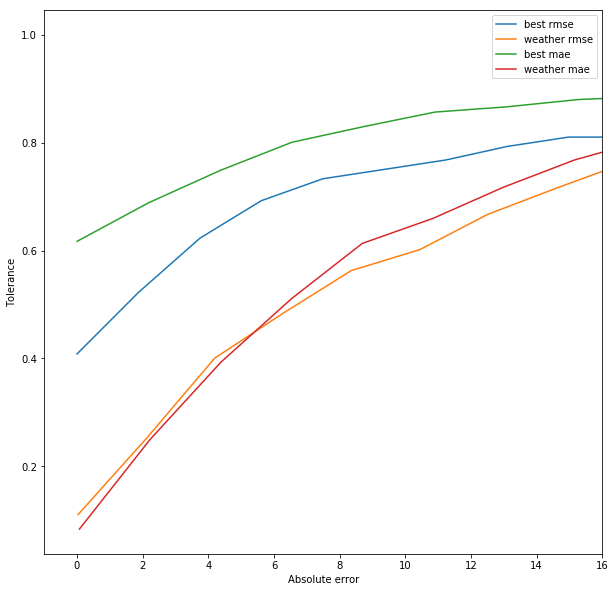

In [39]:

fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(1,1,1)

plt.plot(base_best_rmse[:-1], cumulative_best_rmse, label='best rmse')
plt.plot(base_weather_rmse[:-1], cumulative_weather_rmse, label='weather rmse')
plt.plot(base_best_mae[:-1], cumulative_best_mae, label='best mae')
plt.plot(base_weather_mae[:-1], cumulative_weather_mae, label='weather mae')

ax.set_xlim(-1,16)
ax.set_xlabel('Absolute error')
ax.set_ylabel('Tolerance')
plt.legend(loc='best')

plt.show()

<a id='results'></a>
## Results 
---

The results achieved in this notebook is similar to the one found in [1](#references), in some ways, we achieve a even better result, if we take into consideration the RMSE. But the most impressive is the simplicity of the best model, which can easily measure and used to predict fires in the forest. In contrast, the model of the paper (which already has 10 years) uses 3 different techniques to make this regression.

Also, the plot of the frequency of the errors is very similar to the one found above.

Therefore, we can conclude that, despite the simplicity of the KNN model, its possible to achieve very good results in problems of regression, which is done with a reasonable computation cost.

<a id='pca'></a>
## Feature Selection
---

We did our features selection with a brute force strategy, but depending on the application, this approach can be impractical. Therefore, comes the need to do a systematic analysis to help us choose the right features. Statistical tests can be used to select those features that have the strongest relationship with the output variable. The scikit-learn library provides the SelectKBest class that can be used with a suite of different statistical tests to select a specific number of features. Below, we will use chi-square test for select the four best features.

In [61]:
from sklearn import preprocessing
from sklearn import utils

array = firedb.drop(['month','day'], axis=1).values
X = array[:,0:10]
Y = array[:,10]

lab_enc = preprocessing.LabelEncoder()
encoded = lab_enc.fit_transform(Y)

test = SelectKBest(score_func=chi2, k=4)
fit = test.fit(X, encoded)

# summarize scores
numpy.set_printoptions(precision=3)
print(fit.scores_)


[   299.036     83.273     40.33    8299.994  24665.44     481.685
    521.351   1262.382    221.665   1972.178]


From the code above, we can see that the four best features are: **DMC, DC, RH and rain**.

This combination wasn't found in our brute force test. Therefore, we this this features selection with many possible configurations of the KNN model.


In [14]:
import csv

hyper_params = range(1,20)
features = [ 'DMC', 'DC', 'RH', 'rain'  ]

output = 'area'

num_folds = [3, 5, 7, 9, 10, 11, 15, 19, 23]

#open the file in the 'write' mode
file = open('results_selected_features.csv','w')
writer = csv.writer(file) 

db_row = ['HYPER_PARAM', 'FEATURES', 'K_FOLDS', 'OUTPUT', 
          'AVG_RMSE', 'AVG_RMSE_%_AREA', 'STD_RMSE', 'CV_RMSE',
          'AVG_MAE', 'AVG_MAE_%_AREA', 'STD_MAE', 'CV_MAE']

#write the row mounted
writer.writerow(db_row)

#close the file
file.close()

In [15]:
from time import time

start_time = time()

k = 0
k_total = len(hyper_params) * len(num_folds)

for hp in hyper_params:    
    for fold in num_folds:
        
        k += 1

        kf = KFold(fold, shuffle=True, random_state=1)
        model = KNeighborsRegressor(n_neighbors = hp, algorithm='auto')

        mses = cross_val_score(model, firedb[features],
                               firedb[output], scoring="neg_mean_squared_error", cv=kf)

        rmses = np.sqrt(np.absolute(mses))

        avg_rmse = np.mean(rmses)
        avg_rmse_per_area = avg_rmse / np.mean(firedb[output])

        std_rmse = np.std(rmses)
        cv_rmse = std_rmse / np.mean(firedb[output])

        maes = cross_val_score(model, firedb[features],
                               firedb[output], scoring="neg_mean_absolute_error", cv=kf)

        maes = np.absolute(maes)

        avg_mae = np.mean(maes)
        avg_mae_per_area = avg_mae / np.mean(firedb[output])

        std_mae = np.std(maes)
        cv_mae = std_mae / np.mean(firedb[output])


        db_row = [ hp, ', '.join(features), fold, output, 
                   avg_rmse, avg_rmse_per_area, std_rmse, cv_rmse,
                   avg_mae, avg_mae_per_area, std_mae, cv_mae ]


        #open the file that will act like a database in the 'append' mode
        #which allow us to append a row each time we open it
        file = open('results_selected_features.csv','a')
        writer = csv.writer(file)                        
        #write the row mounted
        writer.writerow(db_row)

        #close the file
        file.close()

end_time = time()
elapsed_time = end_time - start_time
print('Elapsed time: ', elapsed_time)

Elapsed time:  18.022876739501953


In [16]:
results = pd.read_csv('results_selected_features.csv')
results = results[ results['OUTPUT'] == 'area' ]
results.head()

HYPER_PARAM           FEATURES  K_FOLDS OUTPUT   AVG_RMSE  AVG_RMSE_%_AREA  \
0            1  DMC, DC, RH, rain        3   area  92.604748         7.208114   
1            1  DMC, DC, RH, rain        5   area  80.050364         6.230913   
2            1  DMC, DC, RH, rain        7   area  79.053479         6.153318   
3            1  DMC, DC, RH, rain        9   area  79.871494         6.216991   
4            1  DMC, DC, RH, rain       10   area  78.553606         6.114410   

    STD_RMSE   CV_RMSE    AVG_MAE  AVG_MAE_%_AREA    STD_MAE    CV_MAE  
0  11.088316  0.863086  21.516024        1.674752   3.110145  0.242086  
1  42.442920  3.303647  22.243061        1.731342   8.053615  0.626873  
2  51.555996  4.012985  22.931298        1.784913   9.906891  0.771127  
3  43.191970  3.361951  22.428974        1.745813   7.119504  0.554164  
4  52.389181  4.077838  23.198523        1.805713  10.431808  0.811985

In [17]:
mean_weight = 0.5
std_weight = 1-mean_weight

results['SCORE_RMSE'] = mean_weight*results['AVG_RMSE_%_AREA'] + std_weight*results['CV_RMSE']
results['SCORE_MAE'] = mean_weight*results['AVG_MAE_%_AREA'] + std_weight*results['CV_MAE']

results.head()

HYPER_PARAM           FEATURES  K_FOLDS OUTPUT   AVG_RMSE  AVG_RMSE_%_AREA  \
0            1  DMC, DC, RH, rain        3   area  92.604748         7.208114   
1            1  DMC, DC, RH, rain        5   area  80.050364         6.230913   
2            1  DMC, DC, RH, rain        7   area  79.053479         6.153318   
3            1  DMC, DC, RH, rain        9   area  79.871494         6.216991   
4            1  DMC, DC, RH, rain       10   area  78.553606         6.114410   

    STD_RMSE   CV_RMSE    AVG_MAE  AVG_MAE_%_AREA    STD_MAE    CV_MAE  \
0  11.088316  0.863086  21.516024        1.674752   3.110145  0.242086   
1  42.442920  3.303647  22.243061        1.731342   8.053615  0.626873   
2  51.555996  4.012985  22.931298        1.784913   9.906891  0.771127   
3  43.191970  3.361951  22.428974        1.745813   7.119504  0.554164   
4  52.389181  4.077838  23.198523        1.805713  10.431808  0.811985   

   SCORE_RMSE  SCORE_MAE  
0    4.035600   0.958419  
1    4.767280   1.179107  
2    5.083152   1.278020  
3    4.789471   1.149989  
4    5.096124   1.308849

In [13]:
results.sort_values(by='SCORE_RMSE')[:5]

HYPER_PARAM           FEATURES  K_FOLDS OUTPUT   AVG_RMSE  \
108           13  DMC, DC, RH, rain        3   area  55.374900   
117           14  DMC, DC, RH, rain        3   area  55.411278   
126           15  DMC, DC, RH, rain        3   area  55.058511   
135           16  DMC, DC, RH, rain        3   area  54.978874   
144           17  DMC, DC, RH, rain        3   area  54.452058   

     AVG_RMSE_%_AREA   STD_RMSE   CV_RMSE    AVG_MAE  AVG_MAE_%_AREA  \
108         4.310239  31.587890  2.458720  19.455754        1.514386   
117         4.313071  31.753653  2.471622  19.471482        1.515610   
126         4.285612  32.148553  2.502360  19.184796        1.493295   
135         4.279413  32.292899  2.513596  19.114284        1.487806   
144         4.238407  32.870612  2.558563  19.260403        1.499180   

      STD_MAE    CV_MAE  SCORE_RMSE  SCORE_MAE  
108  3.791652  0.295132    3.384479   0.904759  
117  3.820004  0.297339    3.392346   0.906475  
126  4.001723  0.311484    3.393986   0.902389  
135  3.921469  0.305237    3.396505   0.896522  
144  3.820034  0.297342    3.398485   0.898261

In [14]:
results.sort_values(by='SCORE_MAE')[:5]

HYPER_PARAM           FEATURES  K_FOLDS OUTPUT   AVG_RMSE  \
135           16  DMC, DC, RH, rain        3   area  54.978874   
144           17  DMC, DC, RH, rain        3   area  54.452058   
153           18  DMC, DC, RH, rain        3   area  54.325802   
126           15  DMC, DC, RH, rain        3   area  55.058511   
162           19  DMC, DC, RH, rain        3   area  54.343614   

     AVG_RMSE_%_AREA   STD_RMSE   CV_RMSE    AVG_MAE  AVG_MAE_%_AREA  \
135         4.279413  32.292899  2.513596  19.114284        1.487806   
144         4.238407  32.870612  2.558563  19.260403        1.499180   
153         4.228580  33.047614  2.572341  19.165581        1.491799   
126         4.285612  32.148553  2.502360  19.184796        1.493295   
162         4.229966  33.089862  2.575629  19.273527        1.500202   

      STD_MAE    CV_MAE  SCORE_RMSE  SCORE_MAE  
135  3.921469  0.305237    3.396505   0.896522  
144  3.820034  0.297342    3.398485   0.898261  
153  3.948203  0.307318    3.400460   0.899559  
126  4.001723  0.311484    3.393986   0.902389  
162  3.960714  0.308292    3.402798   0.904247

In [18]:
hp = int(results.sort_values(by='SCORE_MAE')[:1]['HYPER_PARAM'])
fold = int(results.sort_values(by='SCORE_MAE')[:1]['K_FOLDS'])
output = results.sort_values(by='SCORE_MAE')[:1]['OUTPUT']

kf = KFold(fold, shuffle=True, random_state=1)
model = KNeighborsRegressor(n_neighbors = hp, algorithm='auto')

predicted = cross_val_predict( model, firedb[features], firedb[output], cv=kf )

abs_error = np.absolute( predicted - firedb[output] )

values, base_four_selected_mae = np.histogram(abs_error, bins=500)
cumulative_four_selected_mae = np.cumsum(values) / len(abs_error)

In [19]:
import csv

hyper_params = range(1,20)
features = [ 'DMC', 'DC' ]

output = 'area'

num_folds = [3, 5, 7, 9, 10, 11, 15, 19, 23]

#open the file in the 'write' mode
file = open('results_selected_features.csv','w')
writer = csv.writer(file) 

db_row = ['HYPER_PARAM', 'FEATURES', 'K_FOLDS', 'OUTPUT', 
          'AVG_RMSE', 'AVG_RMSE_%_AREA', 'STD_RMSE', 'CV_RMSE',
          'AVG_MAE', 'AVG_MAE_%_AREA', 'STD_MAE', 'CV_MAE']

#write the row mounted
writer.writerow(db_row)

#close the file
file.close()

In [20]:
from time import time

start_time = time()

k = 0
k_total = len(hyper_params) * len(num_folds)

for hp in hyper_params:    
    for fold in num_folds:
        
        k += 1

        kf = KFold(fold, shuffle=True, random_state=1)
        model = KNeighborsRegressor(n_neighbors = hp, algorithm='auto')

        mses = cross_val_score(model, firedb[features],
                               firedb[output], scoring="neg_mean_squared_error", cv=kf)

        rmses = np.sqrt(np.absolute(mses))

        avg_rmse = np.mean(rmses)
        avg_rmse_per_area = avg_rmse / np.mean(firedb[output])

        std_rmse = np.std(rmses)
        cv_rmse = std_rmse / np.mean(firedb[output])

        maes = cross_val_score(model, firedb[features],
                               firedb[output], scoring="neg_mean_absolute_error", cv=kf)

        maes = np.absolute(maes)

        avg_mae = np.mean(maes)
        avg_mae_per_area = avg_mae / np.mean(firedb[output])

        std_mae = np.std(maes)
        cv_mae = std_mae / np.mean(firedb[output])


        db_row = [ hp, ', '.join(features), fold, output, 
                   avg_rmse, avg_rmse_per_area, std_rmse, cv_rmse,
                   avg_mae, avg_mae_per_area, std_mae, cv_mae ]


        #open the file that will act like a database in the 'append' mode
        #which allow us to append a row each time we open it
        file = open('results_selected_features.csv','a')
        writer = csv.writer(file)                        
        #write the row mounted
        writer.writerow(db_row)

        #close the file
        file.close()

end_time = time()
elapsed_time = end_time - start_time
print('Elapsed time: ', elapsed_time)

Elapsed time:  15.769096374511719


In [21]:
results = pd.read_csv('results_selected_features.csv')
results = results[ results['OUTPUT'] == 'area' ]
results.head()

HYPER_PARAM FEATURES  K_FOLDS OUTPUT   AVG_RMSE  AVG_RMSE_%_AREA  \
0            1  DMC, DC        3   area  57.345567         4.463631   
1            1  DMC, DC        5   area  55.270504         4.302113   
2            1  DMC, DC        7   area  70.233253         5.466775   
3            1  DMC, DC        9   area  82.446775         6.417444   
4            1  DMC, DC       10   area  77.884809         6.062352   

    STD_RMSE   CV_RMSE    AVG_MAE  AVG_MAE_%_AREA    STD_MAE    CV_MAE  
0  30.024724  2.337047  20.175043        1.570373   7.365895  0.573342  
1  27.920306  2.173244  16.727721        1.302043   4.271207  0.332460  
2  51.941997  4.043031  21.596261        1.680997  12.723022  0.990327  
3  45.154165  3.514683  22.528296        1.753544   8.753561  0.681355  
4  46.146695  3.591939  21.673457        1.687006   8.660448  0.674107

In [23]:
mean_weight = 0.5
std_weight = 1-mean_weight

results['SCORE_RMSE'] = mean_weight*results['AVG_RMSE_%_AREA'] + std_weight*results['CV_RMSE']
results['SCORE_MAE'] = mean_weight*results['AVG_MAE_%_AREA'] + std_weight*results['CV_MAE']

results.head()

HYPER_PARAM FEATURES  K_FOLDS OUTPUT   AVG_RMSE  AVG_RMSE_%_AREA  \
0            1  DMC, DC        3   area  57.345567         4.463631   
1            1  DMC, DC        5   area  55.270504         4.302113   
2            1  DMC, DC        7   area  70.233253         5.466775   
3            1  DMC, DC        9   area  82.446775         6.417444   
4            1  DMC, DC       10   area  77.884809         6.062352   

    STD_RMSE   CV_RMSE    AVG_MAE  AVG_MAE_%_AREA    STD_MAE    CV_MAE  \
0  30.024724  2.337047  20.175043        1.570373   7.365895  0.573342   
1  27.920306  2.173244  16.727721        1.302043   4.271207  0.332460   
2  51.941997  4.043031  21.596261        1.680997  12.723022  0.990327   
3  45.154165  3.514683  22.528296        1.753544   8.753561  0.681355   
4  46.146695  3.591939  21.673457        1.687006   8.660448  0.674107   

   SCORE_RMSE  SCORE_MAE  
0    3.400339   1.071858  
1    3.237679   0.817251  
2    4.754903   1.335662  
3    4.966064   1.217449  
4    4.827146   1.180556

In [12]:
results.sort_values(by='SCORE_RMSE')[:5]

HYPER_PARAM FEATURES  K_FOLDS OUTPUT   AVG_RMSE  AVG_RMSE_%_AREA  \
1             1  DMC, DC        5   area  55.270504         4.302113   
54            7  DMC, DC        3   area  56.632118         4.408098   
5             1  DMC, DC       11   area  49.765413         3.873611   
0             1  DMC, DC        3   area  57.345567         4.463631   
45            6  DMC, DC        3   area  57.489216         4.474812   

     STD_RMSE   CV_RMSE    AVG_MAE  AVG_MAE_%_AREA   STD_MAE    CV_MAE  \
1   27.920306  2.173244  16.727721        1.302043  4.271207  0.332460   
54  30.331184  2.360901  19.311305        1.503142  4.259153  0.331521   
5   37.313698  2.904402  17.044507        1.326700  7.271596  0.566002   
0   30.024724  2.337047  20.175043        1.570373  7.365895  0.573342   
45  29.945631  2.330891  19.179408        1.492876  3.942508  0.306875   

    SCORE_RMSE  SCORE_MAE  
1     3.237679   0.817251  
54    3.384499   0.917332  
5     3.389006   0.946351  
0     3.400339   1.071858  
45    3.402851   0.899875

In [13]:
results.sort_values(by='SCORE_MAE')[:5]

HYPER_PARAM FEATURES  K_FOLDS OUTPUT   AVG_RMSE  AVG_RMSE_%_AREA  \
1             1  DMC, DC        5   area  55.270504         4.302113   
81           10  DMC, DC        3   area  55.581805         4.326344   
36            5  DMC, DC        3   area  59.380678         4.622038   
63            8  DMC, DC        3   area  56.954916         4.433223   
45            6  DMC, DC        3   area  57.489216         4.474812   

     STD_RMSE   CV_RMSE    AVG_MAE  AVG_MAE_%_AREA   STD_MAE    CV_MAE  \
1   27.920306  2.173244  16.727721        1.302043  4.271207  0.332460   
81  32.013777  2.491870  18.986016        1.477822  3.760719  0.292725   
36  28.391214  2.209899  19.255915        1.498831  3.519670  0.273962   
63  30.613529  2.382878  19.114145        1.487796  3.926035  0.305592   
45  29.945631  2.330891  19.179408        1.492876  3.942508  0.306875   

    SCORE_RMSE  SCORE_MAE  
1     3.237679   0.817251  
81    3.409107   0.885274  
36    3.415969   0.886396  
63    3.408051   0.896694  
45    3.402851   0.899875

In [24]:
hp = int(results.sort_values(by='SCORE_MAE')[:1]['HYPER_PARAM'])
fold = int(results.sort_values(by='SCORE_MAE')[:1]['K_FOLDS'])
output = results.sort_values(by='SCORE_MAE')[:1]['OUTPUT']

kf = KFold(fold, shuffle=True, random_state=1)
model = KNeighborsRegressor(n_neighbors = hp, algorithm='auto')

predicted = cross_val_predict( model, firedb[features], firedb[output], cv=kf )

abs_error = np.absolute( predicted - firedb[output] )

values, base_two_selected_mae = np.histogram(abs_error, bins=500)
cumulative_two_selected_mae = np.cumsum(values) / len(abs_error)

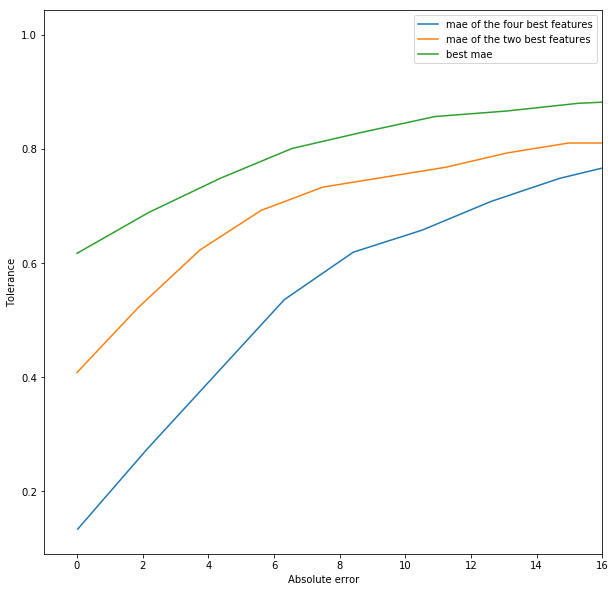

In [40]:
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(1,1,1)

plt.plot(base_four_selected_mae[:-1], cumulative_four_selected_mae, label='mae of the four best features')
plt.plot(base_two_selected_mae[:-1], cumulative_two_selected_mae, label='mae of the two best features')
plt.plot(base_best_mae[:-1], cumulative_best_mae, label='best mae')

ax.set_xlim(-1,16)
ax.set_xlabel('Absolute error')
ax.set_ylabel('Tolerance')
plt.legend(loc='best')

plt.show()

<a id='references'></a>
## References
---

1. P. Cortez and A. Morais. A Data Mining Approach to Predict Forest Fires using Meteorological Data. In J. Neves, M. F. Santos and J. Machado Eds., New Trends in Artificial Intelligence, Proceedings of the 13th EPIA 2007 - Portuguese Conference on Artificial Intelligence, December, Guimaraes, Portugal, pp. 512-523, 2007. APPIA, ISBN-13 978-989-95618-0-9. Available at: http://www.dsi.uminho.pt/~pcortez/fires.pdf
2. http://cwfis.cfs.nrcan.gc.ca/background/summary/fwi

# LIXO

In [57]:
firedb

X  Y month  day  FFMC    DMC     DC   ISI  temp  RH  wind  rain   area
0    7  5   mar  fri  86.2   26.2   94.3   5.1   8.2  51   6.7   0.0   0.00
1    7  4   oct  tue  90.6   35.4  669.1   6.7  18.0  33   0.9   0.0   0.00
2    7  4   oct  sat  90.6   43.7  686.9   6.7  14.6  33   1.3   0.0   0.00
3    8  6   mar  fri  91.7   33.3   77.5   9.0   8.3  97   4.0   0.2   0.00
4    8  6   mar  sun  89.3   51.3  102.2   9.6  11.4  99   1.8   0.0   0.00
5    8  6   aug  sun  92.3   85.3  488.0  14.7  22.2  29   5.4   0.0   0.00
6    8  6   aug  mon  92.3   88.9  495.6   8.5  24.1  27   3.1   0.0   0.00
7    8  6   aug  mon  91.5  145.4  608.2  10.7   8.0  86   2.2   0.0   0.00
8    8  6   sep  tue  91.0  129.5  692.6   7.0  13.1  63   5.4   0.0   0.00
9    7  5   sep  sat  92.5   88.0  698.6   7.1  22.8  40   4.0   0.0   0.00
10   7  5   sep  sat  92.5   88.0  698.6   7.1  17.8  51   7.2   0.0   0.00
11   7  5   sep  sat  92.8   73.2  713.0  22.6  19.3  38   4.0   0.0   0.00
12   6  5   aug  fri  63.5   70.8  665.3   0.8  17.0  72   6.7   0.0   0.00
13   6  5   sep  mon  90.9  126.5  686.5   7.0  21.3  42   2.2   0.0   0.00
14   6  5   sep  wed  92.9  133.3  699.6   9.2  26.4  21   4.5   0.0   0.00
15   6  5   sep  fri  93.3  141.2  713.9  13.9  22.9  44   5.4   0.0   0.00
16   5  5   mar  sat  91.7   35.8   80.8   7.8  15.1  27   5.4   0.0   0.00
17   8  5   oct  mon  84.9   32.8  664.2   3.0  16.7  47   4.9   0.0   0.00
18   6  4   mar  wed  89.2   27.9   70.8   6.3  15.9  35   4.0   0.0   0.00
19   6  4   apr  sat  86.3   27.4   97.1   5.1   9.3  44   4.5   0.0   0.00
20   6  4   sep  tue  91.0  129.5  692.6   7.0  18.3  40   2.7   0.0   0.00
21   5  4   sep  mon  91.8   78.5  724.3   9.2  19.1  38   2.7   0.0   0.00
22   7  4   jun  sun  94.3   96.3  200.0  56.1  21.0  44   4.5   0.0   0.00
23   7  4   aug  sat  90.2  110.9  537.4   6.2  19.5  43   5.8   0.0   0.00
24   7  4   aug  sat  93.5  139.4  594.2  20.3  23.7  32   5.8   0.0   0.00
25   7  4   aug  sun  91.4  142.4  601.4  10.6  16.3  60   5.4   0.0   0.00
26   7  4   sep  fri  92.4  117.9  668.0  12.2  19.0  34   5.8   0.0   0.00
27   7  4   sep  mon  90.9  126.5  686.5   7.0  19.4  48   1.3   0.0   0.00
28   6  3   sep  sat  93.4  145.4  721.4   8.1  30.2  24   2.7   0.0   0.00
29   6  3   sep  sun  93.5  149.3  728.6   8.1  22.8  39   3.6   0.0   0.00
..  .. ..   ...  ...   ...    ...    ...   ...   ...  ..   ...   ...    ...
487  5  4   aug  tue  95.1  141.3  605.8  17.7  26.4  34   3.6   0.0  16.40
488  4  4   aug  tue  95.1  141.3  605.8  17.7  19.4  71   7.6   0.0  46.70
489  4  4   aug  wed  95.1  141.3  605.8  17.7  20.6  58   1.3   0.0   0.00
490  4  4   aug  wed  95.1  141.3  605.8  17.7  28.7  33   4.0   0.0   0.00
491  4  4   aug  thu  95.8  152.0  624.1  13.8  32.4  21   4.5   0.0   0.00
492  1  3   aug  fri  95.9  158.0  633.6  11.3  32.4  27   2.2   0.0   0.00
493  1  3   aug  fri  95.9  158.0  633.6  11.3  27.5  29   4.5   0.0  43.32
494  6  6   aug  sat  96.0  164.0  643.0  14.0  30.8  30   4.9   0.0   8.59
495  6  6   aug  mon  96.2  175.5  661.8  16.8  23.9  42   2.2   0.0   0.00
496  4  5   aug  mon  96.2  175.5  661.8  16.8  32.6  26   3.1   0.0   2.77
497  3  4   aug  tue  96.1  181.1  671.2  14.3  32.3  27   2.2   0.0  14.68
498  6  5   aug  tue  96.1  181.1  671.2  14.3  33.3  26   2.7   0.0  40.54
499  7  5   aug  tue  96.1  181.1  671.2  14.3  27.3  63   4.9   6.4  10.82
500  8  6   aug  tue  96.1  181.1  671.2  14.3  21.6  65   4.9   0.8   0.00
501  7  5   aug  tue  96.1  181.1  671.2  14.3  21.6  65   4.9   0.8   0.00
502  4  4   aug  tue  96.1  181.1  671.2  14.3  20.7  69   4.9   0.4   0.00
503  2  4   aug  wed  94.5  139.4  689.1  20.0  29.2  30   4.9   0.0   1.95
504  4  3   aug  wed  94.5  139.4  689.1  20.0  28.9  29   4.9   0.0  49.59
505  1  2   aug  thu  91.0  163.2  744.4  10.1  26.7  35   1.8   0.0   5.80
506  1  2   aug  fri  91.0  166.9  752.6   7.1  18.5  73   8.5   0.0   0.00
507  2  4   aug  fri  91.0  166.9  752.6   7.1  25.9 

In [58]:
X[0]

array([  7. ,   5. ,  86.2,  26.2,  94.3,   5.1,   8.2,  51. ,   6.7,   0. ])

In [50]:
array = firedb.drop(['month','day'], axis=1).values
X = array[:,0:10]
Y = array[:,10]

from sklearn import preprocessing
from sklearn import utils

lab_enc = preprocessing.LabelEncoder()
encoded = lab_enc.fit_transform(Y)

print(utils.multiclass.type_of_target(Y))

print(utils.multiclass.type_of_target(Y.astype('int')))

print(utils.multiclass.type_of_target(encoded))

continuous
multiclass
multiclass


In [55]:
# feature extraction
model = LogisticRegression()
rfe = RFE(model, 4)
fit = rfe.fit(X, encoded)

print("Num Features: %d" % fit.n_features_)
print("Selected Features: %s" % fit.support_)
print("Feature Ranking: %s" % fit.ranking_)

Num Features: 4
Selected Features: [ True  True False False False  True False False  True False]
Feature Ranking: [1 1 5 6 7 1 2 3 1 4]


In [59]:
test = SelectKBest(score_func=chi2, k=4)
fit = test.fit(X, encoded)

# summarize scores
numpy.set_printoptions(precision=3)
print(fit.scores_)
features = fit.transform(X)
# summarize selected features
print(features[0:5,:])


[   299.036     83.273     40.33    8299.994  24665.44     481.685
    521.351   1262.382    221.665   1972.178]
[[  2.620e+01   9.430e+01   5.100e+01   0.000e+00]
 [  3.540e+01   6.691e+02   3.300e+01   0.000e+00]
 [  4.370e+01   6.869e+02   3.300e+01   0.000e+00]
 [  3.330e+01   7.750e+01   9.700e+01   2.000e-01]
 [  5.130e+01   1.022e+02   9.900e+01   0.000e+00]]


In [60]:
# feature extraction
model = ExtraTreesClassifier()
model.fit(X, encoded)
print(model.feature_importances_)

[ 0.106  0.075  0.103  0.106  0.12   0.097  0.141  0.121  0.124  0.007]


In [45]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
# load data
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/pima-indians-diabetes/pima-indians-diabetes.data"
names = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']
dataframe = read_csv(url, names=names)
array = dataframe.values
X = array[:,0:8]
Y = array[:,8]
# feature extraction
model = LogisticRegression()
rfe = RFE(model, 3)
fit = rfe.fit(X, Y)

print("Num Features: %d" % fit.n_features_)
print("Selected Features: %s" % fit.support_)
print("Feature Ranking: %s" % fit.ranking_)

Num Features: 3
Selected Features: [ True False False False False  True  True False]
Feature Ranking: [1 2 3 5 6 1 1 4]


In [23]:
firedb

X  Y month  day  FFMC    DMC     DC   ISI  temp  RH  wind  rain   area
0    7  5   mar  fri  86.2   26.2   94.3   5.1   8.2  51   6.7   0.0   0.00
1    7  4   oct  tue  90.6   35.4  669.1   6.7  18.0  33   0.9   0.0   0.00
2    7  4   oct  sat  90.6   43.7  686.9   6.7  14.6  33   1.3   0.0   0.00
3    8  6   mar  fri  91.7   33.3   77.5   9.0   8.3  97   4.0   0.2   0.00
4    8  6   mar  sun  89.3   51.3  102.2   9.6  11.4  99   1.8   0.0   0.00
5    8  6   aug  sun  92.3   85.3  488.0  14.7  22.2  29   5.4   0.0   0.00
6    8  6   aug  mon  92.3   88.9  495.6   8.5  24.1  27   3.1   0.0   0.00
7    8  6   aug  mon  91.5  145.4  608.2  10.7   8.0  86   2.2   0.0   0.00
8    8  6   sep  tue  91.0  129.5  692.6   7.0  13.1  63   5.4   0.0   0.00
9    7  5   sep  sat  92.5   88.0  698.6   7.1  22.8  40   4.0   0.0   0.00
10   7  5   sep  sat  92.5   88.0  698.6   7.1  17.8  51   7.2   0.0   0.00
11   7  5   sep  sat  92.8   73.2  713.0  22.6  19.3  38   4.0   0.0   0.00
12   6  5   aug  fri  63.5   70.8  665.3   0.8  17.0  72   6.7   0.0   0.00
13   6  5   sep  mon  90.9  126.5  686.5   7.0  21.3  42   2.2   0.0   0.00
14   6  5   sep  wed  92.9  133.3  699.6   9.2  26.4  21   4.5   0.0   0.00
15   6  5   sep  fri  93.3  141.2  713.9  13.9  22.9  44   5.4   0.0   0.00
16   5  5   mar  sat  91.7   35.8   80.8   7.8  15.1  27   5.4   0.0   0.00
17   8  5   oct  mon  84.9   32.8  664.2   3.0  16.7  47   4.9   0.0   0.00
18   6  4   mar  wed  89.2   27.9   70.8   6.3  15.9  35   4.0   0.0   0.00
19   6  4   apr  sat  86.3   27.4   97.1   5.1   9.3  44   4.5   0.0   0.00
20   6  4   sep  tue  91.0  129.5  692.6   7.0  18.3  40   2.7   0.0   0.00
21   5  4   sep  mon  91.8   78.5  724.3   9.2  19.1  38   2.7   0.0   0.00
22   7  4   jun  sun  94.3   96.3  200.0  56.1  21.0  44   4.5   0.0   0.00
23   7  4   aug  sat  90.2  110.9  537.4   6.2  19.5  43   5.8   0.0   0.00
24   7  4   aug  sat  93.5  139.4  594.2  20.3  23.7  32   5.8   0.0   0.00
25   7  4   aug  sun  91.4  142.4  601.4  10.6  16.3  60   5.4   0.0   0.00
26   7  4   sep  fri  92.4  117.9  668.0  12.2  19.0  34   5.8   0.0   0.00
27   7  4   sep  mon  90.9  126.5  686.5   7.0  19.4  48   1.3   0.0   0.00
28   6  3   sep  sat  93.4  145.4  721.4   8.1  30.2  24   2.7   0.0   0.00
29   6  3   sep  sun  93.5  149.3  728.6   8.1  22.8  39   3.6   0.0   0.00
..  .. ..   ...  ...   ...    ...    ...   ...   ...  ..   ...   ...    ...
487  5  4   aug  tue  95.1  141.3  605.8  17.7  26.4  34   3.6   0.0  16.40
488  4  4   aug  tue  95.1  141.3  605.8  17.7  19.4  71   7.6   0.0  46.70
489  4  4   aug  wed  95.1  141.3  605.8  17.7  20.6  58   1.3   0.0   0.00
490  4  4   aug  wed  95.1  141.3  605.8  17.7  28.7  33   4.0   0.0   0.00
491  4  4   aug  thu  95.8  152.0  624.1  13.8  32.4  21   4.5   0.0   0.00
492  1  3   aug  fri  95.9  158.0  633.6  11.3  32.4  27   2.2   0.0   0.00
493  1  3   aug  fri  95.9  158.0  633.6  11.3  27.5  29   4.5   0.0  43.32
494  6  6   aug  sat  96.0  164.0  643.0  14.0  30.8  30   4.9   0.0   8.59
495  6  6   aug  mon  96.2  175.5  661.8  16.8  23.9  42   2.2   0.0   0.00
496  4  5   aug  mon  96.2  175.5  661.8  16.8  32.6  26   3.1   0.0   2.77
497  3  4   aug  tue  96.1  181.1  671.2  14.3  32.3  27   2.2   0.0  14.68
498  6  5   aug  tue  96.1  181.1  671.2  14.3  33.3  26   2.7   0.0  40.54
499  7  5   aug  tue  96.1  181.1  671.2  14.3  27.3  63   4.9   6.4  10.82
500  8  6   aug  tue  96.1  181.1  671.2  14.3  21.6  65   4.9   0.8   0.00
501  7  5   aug  tue  96.1  181.1  671.2  14.3  21.6  65   4.9   0.8   0.00
502  4  4   aug  tue  96.1  181.1  671.2  14.3  20.7  69   4.9   0.4   0.00
503  2  4   aug  wed  94.5  139.4  689.1  20.0  29.2  30   4.9   0.0   1.95
504  4  3   aug  wed  94.5  139.4  689.1  20.0  28.9  29   4.9   0.0  49.59
505  1  2   aug  thu  91.0  163.2  744.4  10.1  26.7  35   1.8   0.0   5.80
506  1  2   aug  fri  91.0  166.9  752.6   7.1  18.5  73   8.5   0.0   0.00
507  2  4   aug  fri  91.0  166.9  752.6   7.1  25.9 

In [43]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

array = firedb.drop(['month','day'], axis=1).values
X = array[:,0:10]
Y = array[:,10]



test = SelectKBest(score_func=chi2, k=3)
fit = test.fit(X, Y)


# summarize scores
#numpy.set_printoptions(precision=3)
#print(fit.scores_)
#features = fit.transform(X)
# summarize selected features
#print(features[0:5,:])

ValueError: Unknown label type: (array([  0.000e+00,   0.000e+00,   0.000e+00,   0.000e+00,   0.000e+00,
         0.000e+00,   0.000e+00,   0.000e+00,   0.000e+00,   0.000e+00,
         0.000e+00,   0.000e+00,   0.000e+00,   0.000e+00,   0.000e+00,
         0.000e+00,   0.000e+00,   0.000e+00,   0.000e+00,   0.000e+00,
         0.000e+00,   0.000e+00,   0.000e+00,   0.000e+00,   0.000e+00,
         0.000e+00,   0.000e+00,   0.000e+00,   0.000e+00,   0.000e+00,
         0.000e+00,   0.000e+00,   0.000e+00,   0.000e+00,   0.000e+00,
         0.000e+00,   0.000e+00,   0.000e+00,   0.000e+00,   0.000e+00,
         0.000e+00,   0.000e+00,   0.000e+00,   0.000e+00,   0.000e+00,
         0.000e+00,   0.000e+00,   0.000e+00,   0.000e+00,   0.000e+00,
         0.000e+00,   0.000e+00,   0.000e+00,   0.000e+00,   0.000e+00,
         0.000e+00,   0.000e+00,   0.000e+00,   0.000e+00,   0.000e+00,
         0.000e+00,   0.000e+00,   0.000e+00,   0.000e+00,   0.000e+00,
         0.000e+00,   0.000e+00,   0.000e+00,   0.000e+00,   0.000e+00,
         0.000e+00,   0.000e+00,   0.000e+00,   0.000e+00,   0.000e+00,
         0.000e+00,   0.000e+00,   0.000e+00,   0.000e+00,   0.000e+00,
         0.000e+00,   0.000e+00,   0.000e+00,   0.000e+00,   0.000e+00,
         0.000e+00,   0.000e+00,   0.000e+00,   0.000e+00,   0.000e+00,
         0.000e+00,   0.000e+00,   0.000e+00,   0.000e+00,   0.000e+00,
         0.000e+00,   0.000e+00,   0.000e+00,   0.000e+00,   0.000e+00,
         0.000e+00,   0.000e+00,   0.000e+00,   0.000e+00,   0.000e+00,
         0.000e+00,   0.000e+00,   0.000e+00,   0.000e+00,   0.000e+00,
         0.000e+00,   0.000e+00,   0.000e+00,   0.000e+00,   0.000e+00,
         0.000e+00,   0.000e+00,   0.000e+00,   0.000e+00,   0.000e+00,
         0.000e+00,   0.000e+00,   0.000e+00,   0.000e+00,   0.000e+00,
         0.000e+00,   0.000e+00,   0.000e+00,   0.000e+00,   0.000e+00,
         0.000e+00,   0.000e+00,   0.000e+00,   0.000e+00,   0.000e+00,
         0.000e+00,   0.000e+00,   0.000e+00,   3.600e-01,   4.300e-01,
         4.700e-01,   5.500e-01,   6.100e-01,   7.100e-01,   7.700e-01,
         9.000e-01,   9.500e-01,   9.600e-01,   1.070e+00,   1.120e+00,
         1.190e+00,   1.360e+00,   1.430e+00,   1.460e+00,   1.460e+00,
         1.560e+00,   1.610e+00,   1.630e+00,   1.640e+00,   1.690e+00,
         1.750e+00,   1.900e+00,   1.940e+00,   1.950e+00,   2.010e+00,
         2.140e+00,   2.290e+00,   2.510e+00,   2.530e+00,   2.550e+00,
         2.570e+00,   2.690e+00,   2.740e+00,   3.070e+00,   3.500e+00,
         4.530e+00,   4.610e+00,   4.690e+00,   4.880e+00,   5.230e+00,
         5.330e+00,   5.440e+00,   6.380e+00,   6.830e+00,   6.960e+00,
         7.040e+00,   7.190e+00,   7.300e+00,   7.400e+00,   8.240e+00,
         8.310e+00,   8.680e+00,   8.710e+00,   9.410e+00,   1.001e+01,
         1.002e+01,   1.093e+01,   1.106e+01,   1.124e+01,   1.132e+01,
         1.153e+01,   1.210e+01,   1.305e+01,   1.370e+01,   1.399e+01,
         1.457e+01,   1.545e+01,   1.720e+01,   1.923e+01,   2.341e+01,
         2.423e+01,   2.600e+01,   2.613e+01,   2.735e+01,   2.866e+01,
         2.866e+01,   2.948e+01,   3.032e+01,   3.172e+01,   3.186e+01,
         3.207e+01,   3.588e+01,   3.685e+01,   3.702e+01,   3.771e+01,
         4.855e+01,   4.937e+01,   5.830e+01,   6.410e+01,   7.130e+01,
         8.849e+01,   9.518e+01,   1.034e+02,   1.057e+02,   1.549e+02,
         1.965e+02,   2.009e+02,   2.129e+02,   1.091e+03,   0.000e+00,
         0.000e+00,   0.000e+00,   1.013e+01,   0.000e+00,   2.870e+00,
         7.600e-01,   9.000e-02,   7.500e-01,   0.000e+00,   2.470e+00,
         6.800e-01,   2.400e-01,   2.100e-01,   1.520e+00,   1.034e+01,
         0.000e+00,   8.020e+00,   6.800e-01,   0.000e+00,   1.380e+00,
         8.850e+00,   3.300e+00,   4.250e+00,   1.560e+00,   6.540e+00,
         7.900e-01,   1.700e-01,   0.000e+00,   0.000e+00,   4.400e+00,
         5.200e-01,   9.270e+00,   3.090e+00,   8.980e+00,   1.119e+01,
         5.380e+00,   1.785e+01,   1.073e+01,   2.203e+01,   9.770e+00,
         9.270e+00,   2.477e+01,   0.000e+00,   1.100e+00,   2.424e+01,
         0.000e+00,   0.000e+00,   0.000e+00,   0.000e+00,   0.000e+00,
         0.000e+00,   8.000e+00,   2.640e+00,   8.645e+01,   6.570e+00,
         0.000e+00,   9.000e-01,   0.000e+00,   0.000e+00,   0.000e+00,
         0.000e+00,   3.520e+00,   0.000e+00,   0.000e+00,   0.000e+00,
         0.000e+00,   4.100e-01,   5.180e+00,   0.000e+00,   0.000e+00,
         0.000e+00,   1.429e+01,   0.000e+00,   0.000e+00,   1.580e+00,
         0.000e+00,   0.000e+00,   3.780e+00,   0.000e+00,   4.410e+00,
         3.436e+01,   7.210e+00,   1.010e+00,   2.180e+00,   4.420e+00,
         0.000e+00,   0.000e+00,   0.000e+00,   0.000e+00,   3.330e+00,
         6.580e+00,   1.564e+01,   1.122e+01,   2.130e+00,   0.000e+00,
         0.000e+00,   0.000e+00,   5.604e+01,   7.480e+00,   1.470e+00,
         3.930e+00,   0.000e+00,   0.000e+00,   2.180e+00,   6.100e+00,
         5.830e+00,   2.819e+01,   0.000e+00,   0.000e+00,   1.640e+00,
         3.710e+00,   7.310e+00,   2.030e+00,   1.720e+00,   5.970e+00,
         1.306e+01,   1.260e+00,   0.000e+00,   0.000e+00,   8.120e+00,
         1.090e+00,   3.940e+00,   5.200e-01,   2.930e+00,   5.650e+00,
         2.003e+01,   1.750e+00,   0.000e+00,   1.264e+01,   0.000e+00,
         1.106e+01,   0.000e+00,   0.000e+00,   0.000e+00,   1.830e+01,
         3.935e+01,   0.000e+00,   1.746e+02,   0.000e+00,   0.000e+00,
         7.730e+00,   1.633e+01,   5.860e+00,   4.287e+01,   1.218e+01,
         1.600e+01,   2.459e+01,   0.000e+00,   2.874e+01,   0.000e+00,
         9.960e+00,   3.018e+01,   7.076e+01,   0.000e+00,   0.000e+00,
         5.178e+01,   3.640e+00,   3.630e+00,   0.000e+00,   0.000e+00,
         8.160e+00,   4.950e+00,   0.000e+00,   0.000e+00,   6.040e+00,
         0.000e+00,   3.950e+00,   0.000e+00,   7.800e+00,   0.000e+00,
         0.000e+00,   4.620e+00,   1.630e+00,   0.000e+00,   0.000e+00,
         7.463e+02,   7.020e+00,   0.000e+00,   2.440e+00,   3.050e+00,
         1.858e+02,   0.000e+00,   6.300e+00,   7.200e-01,   4.960e+00,
         0.000e+00,   0.000e+00,   2.350e+00,   0.000e+00,   3.200e+00,
         0.000e+00,   6.360e+00,   0.000e+00,   1.534e+01,   0.000e+00,
         0.000e+00,   5.400e-01,   0.000e+00,   6.430e+00,   3.300e-01,
         0.000e+00,   1.230e+00,   3.350e+00,   0.000e+00,   9.960e+00,
         0.000e+00,   0.000e+00,   0.000e+00,   0.000e+00,   0.000e+00,
         6.430e+00,   9.710e+00,   0.000e+00,   0.000e+00,   0.000e+00,
         0.000e+00,   0.000e+00,   8.275e+01,   3.320e+00,   1.940e+00,
         0.000e+00,   0.000e+00,   3.710e+00,   5.390e+00,   2.140e+00,
         6.840e+00,   3.180e+00,   5.550e+00,   6.610e+00,   6.113e+01,
         0.000e+00,   3.848e+01,   1.940e+00,   7.032e+01,   1.008e+01,
         3.190e+00,   1.760e+00,   7.360e+00,   2.210e+00,   2.785e+02,
         2.750e+00,   0.000e+00,   1.290e+00,   0.000e+00,   2.643e+01,
         2.070e+00,   2.000e+00,   1.640e+01,   4.670e+01,   0.000e+00,
         0.000e+00,   0.000e+00,   0.000e+00,   4.332e+01,   8.590e+00,
         0.000e+00,   2.770e+00,   1.468e+01,   4.054e+01,   1.082e+01,
         0.000e+00,   0.000e+00,   0.000e+00,   1.950e+00,   4.959e+01,
         5.800e+00,   0.000e+00,   0.000e+00,   0.000e+00,   2.170e+00,
         4.300e-01,   0.000e+00,   6.440e+00,   5.429e+01,   1.116e+01,
         0.000e+00,   0.000e+00]),)

In [42]:
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/pima-indians-diabetes/pima-indians-diabetes.data"
names = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']
dataframe = pd.read_csv(url, names=names)
array = dataframe.values
X = array[:,0:8]
Y = array[:,8]
Y

array([ 1.,  0.,  1.,  0.,  1.,  0.,  1.,  0.,  1.,  1.,  0.,  1.,  0.,
        1.,  1.,  1.,  1.,  1.,  0.,  1.,  0.,  0.,  1.,  1.,  1.,  1.,
        1.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  1.,  1.,
        1.,  0.,  0.,  0.,  1.,  0.,  1.,  0.,  0.,  1.,  0.,  0.,  0.,
        0.,  1.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  1.,
        0.,  1.,  0.,  0.,  0.,  1.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,
        1.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  1.,  0.,  0.,
        0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  1.,  1.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  1.,  1.,  1.,  0.,  0.,  1.,  1.,  1.,
        0.,  0.,  0.,  1.,  0.,  0.,  0.,  1.,  1.,  0.,  0.,  1.,  1.,
        1.,  1.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  1.,  1.,
        0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  1.,  1.,  0.,  0.,  0.,
        0.,  1.,  1.,  0.,  0.,  0.,  1.,  0.,  1.,  0.,  1.,  0

In [38]:
# feature extraction
test = SelectKBest(score_func=chi2, k=4)
fit = test.fit(X, Y)
# summarize scores
numpy.set_printoptions(precision=3)
print(fit.scores_)
features = fit.transform(X)
# summarize selected features
print(features[0:5,:])

[  111.52   1411.887    17.605    53.108  2175.565   127.669     5.393
   181.304]
[[ 148.     0.    33.6   50. ]
 [  85.     0.    26.6   31. ]
 [ 183.     0.    23.3   32. ]
 [  89.    94.    28.1   21. ]
 [ 137.   168.    43.1   33. ]]


In [9]:
pca = PCA(n_components=3)
fit = pca.fit(firedb[ ['X', 'Y', 'FFMC', 'DMC','DC','ISI', 'temp','RH','wind','rain'] ])

print("Explained Variance: %s" % fit.explained_variance_ratio_)
print(fit.components_)
fit.get_params()

Explained Variance: [ 0.96253861  0.03232349  0.00416487]
[[  7.84161966e-04   4.76391370e-04  -7.39788693e-03  -1.79460941e-01
   -9.83655890e-01  -4.27009270e-03  -1.15707684e-02   2.26100024e-03
    1.43490489e-03  -4.47911510e-05]
 [  9.27379422e-04   2.90688105e-03   2.40648773e-02   9.81553201e-01
   -1.79440679e-01   1.93781450e-02   1.95041695e-02   5.48221278e-02
    2.08301747e-03   4.46240649e-04]
 [  1.08658320e-02   3.13357839e-03  -1.20638390e-01  -4.36605345e-02
    1.37191816e-02  -5.35283391e-02  -2.01160835e-01   9.69459104e-01
    6.32273979e-03   1.46248864e-03]]


{'copy': True,
 'iterated_power': 'auto',
 'n_components': 3,
 'random_state': None,
 'svd_solver': 'auto',
 'tol': 0.0,
 'whiten': False}

In [12]:
dataframe

preg  plas  pres  skin  test  mass   pedi  age  class
0       6   148    72    35     0  33.6  0.627   50      1
1       1    85    66    29     0  26.6  0.351   31      0
2       8   183    64     0     0  23.3  0.672   32      1
3       1    89    66    23    94  28.1  0.167   21      0
4       0   137    40    35   168  43.1  2.288   33      1
5       5   116    74     0     0  25.6  0.201   30      0
6       3    78    50    32    88  31.0  0.248   26      1
7      10   115     0     0     0  35.3  0.134   29      0
8       2   197    70    45   543  30.5  0.158   53      1
9       8   125    96     0     0   0.0  0.232   54      1
10      4   110    92     0     0  37.6  0.191   30      0
11     10   168    74     0     0  38.0  0.537   34      1
12     10   139    80     0     0  27.1  1.441   57      0
13      1   189    60    23   846  30.1  0.398   59      1
14      5   166    72    19   175  25.8  0.587   51      1
15      7   100     0     0     0  30.0  0.484   32      1
16      0   118    84    47   230  45.8  0.551   31      1
17      7   107    74     0     0  29.6  0.254   31      1
18      1   103    30    38    83  43.3  0.183   33      0
19      1   115    70    30    96  34.6  0.529   32      1
20      3   126    88    41   235  39.3  0.704   27      0
21      8    99    84     0     0  35.4  0.388   50      0
22      7   196    90     0     0  39.8  0.451   41      1
23      9   119    80    35     0  29.0  0.263   29      1
24     11   143    94    33   146  36.6  0.254   51      1
25     10   125    70    26   115  31.1  0.205   41      1
26      7   147    76     0     0  39.4  0.257   43      1
27      1    97    66    15   140  23.2  0.487   22      0
28     13   145    82    19   110  22.2  0.245   57      0
29      5   117    92     0     0  34.1  0.337   38      0
..    ...   ...   ...   ...   ...   ...    ...  ...    ...
738     2    99    60    17   160  36.6  0.453   21      0
739     1   102    74     0     0  39.5  0.293   42      1
740    11   120    80    37   150  42.3  0.785   48      1
741     3   102    44    20    94  30.8  0.400   26      0
742     1   109    58    18   116  28.5  0.219   22      0
743     9   140    94     0     0  32.7  0.734   45      1
744    13   153    88    37   140  40.6  1.174   39      0
745    12   100    84    33   105  30.0  0.488   46      0
746     1   147    94    41     0  49.3  0.358   27      1
747     1    81    74    41    57  46.3  1.096   32      0
748     3   187    70    22   200  36.4  0.408   36      1
749     6   162    62     0     0  24.3  0.178   50      1
750     4   136    70     0     0  31.2  1.182   22      1
751     1   121    78    39    74  39.0  0.261   28      0
752     3   108    62    24     0  26.0  0.223   25      0
753     0   181    88    44   510  43.3  0.222   26      1
754     8   154    78    32     0  32.4  0.443   45      1
755     1   128    88    39   110  36.5  1.057   37      1
756     7   137    90    41     0  32.0  0.391   39      0
757     0   123    72     0     0  36.3  0.258   52      1
758     1   106    76     0     0  37.5  0.197   26      0
759     6   190    92     0     0  35.5  0.278   66      1
760     2    88    58    26    16  28.4  0.766   22      0
761     9   170    74    31     0  44.0  0.403   43      1
762     9    89    62     0     0  22.5  0.142   33      0
763    10   101    76    48   180  32.9  0.171   63      0
764     2   122    70    27     0  36.8  0.340   27      0
765     5   121    72    23   112  26.2  0.245   30      0
766     1   126    60     0     0  30.1  0.349   47      1
767     1    93    70    31     0  30.4  0.315   23      0

[768 rows x 9 columns]

In [11]:

X

array([[   6.   ,  148.   ,   72.   , ...,   33.6  ,    0.627,   50.   ],
       [   1.   ,   85.   ,   66.   , ...,   26.6  ,    0.351,   31.   ],
       [   8.   ,  183.   ,   64.   , ...,   23.3  ,    0.672,   32.   ],
       ..., 
       [   5.   ,  121.   ,   72.   , ...,   26.2  ,    0.245,   30.   ],
       [   1.   ,  126.   ,   60.   , ...,   30.1  ,    0.349,   47.   ],
       [   1.   ,   93.   ,   70.   , ...,   30.4  ,    0.315,   23.   ]])

In [13]:
Y

array([ 1.,  0.,  1.,  0.,  1.,  0.,  1.,  0.,  1.,  1.,  0.,  1.,  0.,
        1.,  1.,  1.,  1.,  1.,  0.,  1.,  0.,  0.,  1.,  1.,  1.,  1.,
        1.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  1.,  1.,
        1.,  0.,  0.,  0.,  1.,  0.,  1.,  0.,  0.,  1.,  0.,  0.,  0.,
        0.,  1.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  1.,
        0.,  1.,  0.,  0.,  0.,  1.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,
        1.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  1.,  0.,  0.,
        0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  1.,  1.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  1.,  1.,  1.,  0.,  0.,  1.,  1.,  1.,
        0.,  0.,  0.,  1.,  0.,  0.,  0.,  1.,  1.,  0.,  0.,  1.,  1.,
        1.,  1.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  1.,  1.,
        0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  1.,  1.,  0.,  0.,  0.,
        0.,  1.,  1.,  0.,  0.,  0.,  1.,  0.,  1.,  0.,  1.,  0

In [4]:
# Feature Extraction with PCA
import numpy
from pandas import read_csv
from sklearn.decomposition import PCA
# load data
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/pima-indians-diabetes/pima-indians-diabetes.data"
names = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']
dataframe = read_csv(url, names=names)
array = dataframe.values
X = array[:,0:8]
print(len(X))
Y = array[:,8]
print(Y)
# feature extraction
pca = PCA(n_components=3)
fit = pca.fit(X)
# summarize components
print("Explained Variance: %s" % fit.explained_variance_ratio_)
print(fit.components_)

768
[ 1.  0.  1.  0.  1.  0.  1.  0.  1.  1.  0.  1.  0.  1.  1.  1.  1.  1.
  0.  1.  0.  0.  1.  1.  1.  1.  1.  0.  0.  0.  0.  1.  0.  0.  0.  0.
  0.  1.  1.  1.  0.  0.  0.  1.  0.  1.  0.  0.  1.  0.  0.  0.  0.  1.
  0.  0.  1.  0.  0.  0.  0.  1.  0.  0.  1.  0.  1.  0.  0.  0.  1.  0.
  1.  0.  0.  0.  0.  0.  1.  0.  0.  0.  0.  0.  1.  0.  0.  0.  1.  0.
  0.  0.  0.  1.  0.  0.  0.  0.  0.  1.  1.  0.  0.  0.  0.  0.  0.  0.
  0.  1.  1.  1.  0.  0.  1.  1.  1.  0.  0.  0.  1.  0.  0.  0.  1.  1.
  0.  0.  1.  1.  1.  1.  1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  1.
  0.  0.  0.  0.  0.  0.  0.  0.  1.  0.  1.  1.  0.  0.  0.  1.  0.  0.
  0.  0.  1.  1.  0.  0.  0.  0.  1.  1.  0.  0.  0.  1.  0.  1.  0.  1.
  0.  0.  0.  0.  0.  1.  1.  1.  1.  1.  0.  0.  1.  1.  0.  1.  0.  1.
  1.  1.  0.  0.  0.  0.  0.  0.  1.  1.  0.  1.  0.  0.  0.  1.  1.  1.
  1.  0.  1.  1.  1.  1.  0.  0.  0.  0.  0.  1.  0.  0.  1.  1.  0.  0.
  0.  1.  1.  1.  1.  0.  0.  0.  1.  1.  0.  1

[]

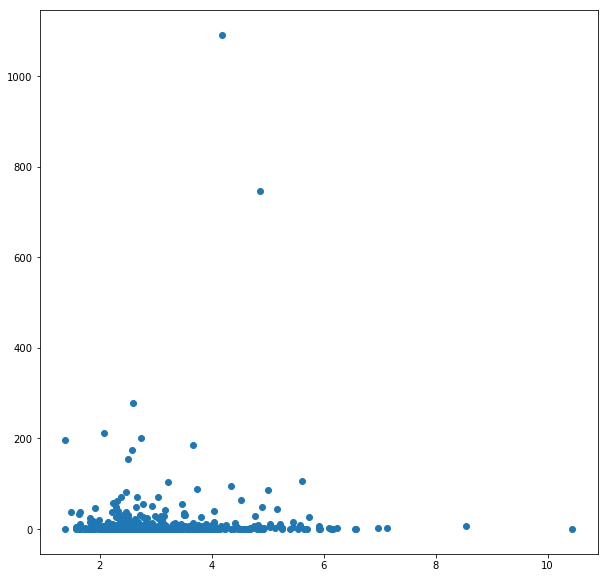

In [191]:
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(1,1,1)
ax.scatter(predicted_corrected,firedb['area'])

plt.plot()

In [180]:
from scipy import stats

ttest = stats.ttest_ind(firedb['area_adjusted'], predicted)
ttest.pvalue

array([ 0.85374151])

In [181]:
from sklearn.metrics import r2_score

r2_score(firedb['area_adjusted'], predicted)


-0.055328114784050531

In [187]:
from math import exp

features = ['temp','RH','wind','rain']
hp = int(results[ results['FEATURES'] == 'temp, RH, wind, rain' ].sort_values(by='SCORE_MAE')[:1]['HYPER_PARAM'])
fold = int(results[ results['FEATURES'] == 'temp, RH, wind, rain' ].sort_values(by='SCORE_MAE')[:1]['K_FOLDS'])
output = results[ results['FEATURES'] == 'temp, RH, wind, rain' ].sort_values(by='SCORE_MAE')[:1]['OUTPUT']

kf = KFold(fold, shuffle=True, random_state=1)
model = KNeighborsRegressor(n_neighbors = hp, algorithm='auto')

predicted = cross_val_predict( model, firedb[features], firedb[output], cv=kf )

predicted_corrected = []
for i in predicted:
    predicted_corrected.append( exp(i) )

abs_error = np.absolute( predicted_corrected - firedb['area'] )

values, base_weather_mae = np.histogram(abs_error, bins=500)
cumulative_weather_mae = np.cumsum(values) / len(abs_error)

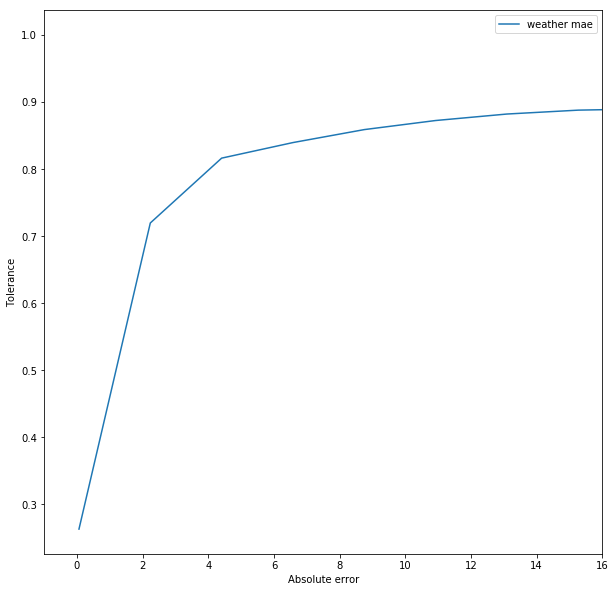

In [188]:
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(1,1,1)

plt.plot(base_weather_mae[:-1], cumulative_weather_mae, label='weather mae')

ax.set_xlim(-1,16)
ax.set_xlabel('Absolute error')
ax.set_ylabel('Tolerance')
plt.legend(loc='best')

plt.show()

In [189]:
from scipy import stats

ttest = stats.ttest_ind(firedb['area'], predicted_corrected)
ttest.pvalue

0.0005603575216852944

In [190]:
from sklearn.metrics import r2_score

r2_score(firedb['area'], predicted_corrected)

-0.021935267046921725

In [185]:
a = [2, 5, 3.45]

b = exp(3)
b

20.085536923187668

In [192]:
predicted_corrected

[2.3129382387255566,
 2.2044154913245615,
 1.8977749988376023,
 2.7488830240407207,
 1.6453737065174923,
 2.887761446897634,
 2.904569365545746,
 2.982485989968785,
 3.6808330920054826,
 3.0360608735327843,
 3.102646365643106,
 3.202471549220044,
 2.931324311053964,
 4.532492437954889,
 3.745784311281408,
 2.134262994745262,
 2.82867090368954,
 3.9476360399380606,
 2.059216734284714,
 1.806993935917807,
 1.8533919757182515,
 3.3237962742520883,
 2.293180619011281,
 3.703579417925683,
 2.0551930986894917,
 3.6739102111032853,
 2.751105971969113,
 4.04680525231221,
 5.6468145598971615,
 3.2348806797281044,
 5.915273558771836,
 1.6602921100514398,
 2.3675004201941747,
 3.3165373794239446,
 4.059066621579915,
 2.8505951623340877,
 3.227199661747401,
 4.475635639082735,
 2.606062802590583,
 2.6606828451403475,
 3.7736146518441203,
 3.9963665874032843,
 2.090402588203638,
 4.809429405416498,
 3.132768420952553,
 3.745784311281409,
 2.70985880902549,
 4.571416219929709,
 1.732216908336183,
 2

In [ ]:
hyper_params = range(1,10)
mse_values = []
mad_values = []
predictions = []
numFolds = 10
# 10-fold cross validation
#kf = KFold(n_splits=10)
le = preprocessing.LabelEncoder()
x = firedb.ix[:, range(1, 10)].values

Y = le.fit_transform(firedb.ix[:, 10].values)
kf = KFold(numFolds, shuffle=True)
conv_X = pd.get_dummies(firedb.ix[:, range(1, 10)])


In [ ]:
kf = KFold(n_splits = 10, shuffle = True)
result = next(kf.split(firedb), None)
print (result)
train = firedb.iloc[result[0]]
test =  firedb.iloc[result[1]]
result = next(kf.split(firedb), None)
print (result)
train = firedb.iloc[result[0]]
test =  firedb.iloc[result[1]]
result = next(kf.split(firedb), None)
print (result)
train = firedb.iloc[result[0]]
test =  firedb.iloc[result[1]]
result = next(kf.split(firedb), None)
print (result)
train = firedb.iloc[result[0]]
test =  firedb.iloc[result[1]]
result = next(kf.split(firedb), None)
print (result)
train = firedb.iloc[result[0]]
test =  firedb.iloc[result[1]]
result = next(kf.split(firedb), None)
print (result)
train = firedb.iloc[result[0]]
test =  firedb.iloc[result[1]]
result = next(kf.split(firedb), None)
print (result)
train = firedb.iloc[result[0]]
test =  firedb.iloc[result[1]]
result = next(kf.split(firedb), None)
print (result)
train = firedb.iloc[result[0]]
test =  firedb.iloc[result[1]]
result = next(kf.split(firedb), None)
print (result)
train = firedb.iloc[result[0]]
test =  firedb.iloc[result[1]]
result = next(kf.split(firedb), None)
print (result)
train = firedb.iloc[result[0]]
test =  firedb.iloc[result[1]]

In [ ]:
    


for train_index, test_index in kf.split(X):
    train_X = conv_X.ix[train_indices, :]
    train_Y = Y[train_indices]
    test_X = conv_X.ix[test_indices, :]
    test_Y = Y[test_indices]
    for knumber in hyper_params:
        # Configuring the classificator
        knn = KNeighborsRegressor(n_neighbors=knumber, algorithm='brute', n_jobs=3)
    
        # Creating model
        knn.fit(train_df[['accommodates','bedrooms','bathrooms','number_of_reviews']], train_df['price'])
    
        # Predicting
        predictions = knn.predict(test_df[['accommodates','bedrooms','bathrooms','number_of_reviews']])
    
        # Checking the mean squared error
        mse_values.append(mean_squared_error(predictions, test_df['price']))
        mad_values.append(mean_absolute_error(predictions, test))

mse_values.plot()
mad_values.plot()

<a id='references'></a>
## References
---

1. P. Cortez and A. Morais. A Data Mining Approach to Predict Forest Fires using Meteorological Data. In J. Neves, M. F. Santos and J. Machado Eds., New Trends in Artificial Intelligence, Proceedings of the 13th EPIA 2007 - Portuguese Conference on Artificial Intelligence, December, Guimaraes, Portugal, pp. 512-523, 2007. APPIA, ISBN-13 978-989-95618-0-9. Available at: http://www.dsi.uminho.pt/~pcortez/fires.pdf
2. http://cwfis.cfs.nrcan.gc.ca/background/summary/fwi